In [ ]:
!pip3 uninstall -y pandas
!pip3 install --upgrade pandas==1.5.3
!pip3 uninstall -y numpy
!pip3 install --upgrade numpy==1.25.2
!pip3 uninstall -y seaborn
!pip3 install --upgrade seaborn==0.13.1
!pip3 uninstall -y scikit-learn
!pip3 install --upgrade scikit-learn==1.4.0

Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not in

Found existing installation: seaborn 0.13.1
Uninstalling seaborn-0.13.1:
  Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 2.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.5 MB/s eta 0:00:00


https://www.kaggle.com/datasets/diegobabativa/depression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
# print("Matplotlib version:", plt.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 1.5.3
NumPy version: 1.23.5
Seaborn version: 0.13.1


Wczytanie zbioru danych i jego przykładowe rekordy:

In [ ]:
df = pd.read_csv("/content/b_depressed.csv")
df.head()

Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  1                  0                     1   
4                  0                  0                     0   

   incoming_agricultural  farm_expenses  labor_primary  lasting_investment  \
0               30028818       31363432              0            28411718   
1               30028818       31363432              0            28411718   
2               30028818       31363432              0            28411718   
3               22288055       18751329              0             7781123   
4               53384566       20731006              1            20100562   

   no_lasting_investmen  depressed  
0            28292707.0          0  
1            28292707.0          1  
2            28292707.0          0  
3            69219765.0          0  
4            43419447.0          0  

[5 rows x 23 columns]

Dane w kolumnach:

*  Survey_id: Identyfikator każdego wpisu w ankiecie.

*  Ville_id: Identyfikator miasta lub lokalizacji związanej z ankietą.

*   sex: Płeć uczestnika badania (1 dla mężczyzn, 0 dla kobiet).

*   Age: Wiek uczestnika badania.

*   Married: Stan cywilny uczestnika (1 dla żonatych/za mężatkę, 0 dla stanu wolnego).

*   Number_children: Liczba dzieci zgłoszona przez uczestnika.

*   education_level: Poziom wykształcenia uczestnika.

*   total_members: Łączna liczba członków w gospodarstwie domowym uczestnika.

*   gained_asset: Wartość zyskanych aktywów.

*   durable_asset: Wartość trwałych aktywów.

*   save_asset: Wartość oszczędności.

*   living_expenses: Wydatki na utrzymanie zgłoszone przez uczestnika.

*   other_expenses: Inne zgłoszone przez uczestnika wydatki.

*   incoming_salary: Dochód z wynagrodzenia.

*   incoming_own_farm: Dochód z własnej farmy uczestnika.

*   incoming_business: Dochód z działalności gospodarczej uczestnika.

*   incoming_no_business: Dochód z innych źródeł niż działalność gospodarcza.

*   incoming_agricultural: Dochód z działalności rolniczej.

*   farm_expenses: Wydatki związane z rolnictwem.

*   labor_primary: Typ podstawowej pracy dla uczestnika (1 dla tak, 0 dla nie).

*   lasting_investment: Informacje dotyczące trwałych inwestycji (1 dla tak, 0 dla nie).

*   no_lasting_investmen: Informacje o braku trwałych inwestycji (1 dla tak, 0 dla nie).

*   depressed: Stan depresji uczestnika (1 dla zdepresowanych, 0 dla nieszczęśliwych).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
print("liczba danych =", len(df)) #
print("wymiar =", df.shape)

liczba danych = 1429
wymiar = (1429, 23)


Dla każdego atrybutu:
*   Liczba niepustych rekordów
*   Średnia arytmetyczna
*   Odchylenie standardowe
*   Minimum
*   Percentyl 50%
*   Maksimum



In [ ]:
df.describe(percentiles=[])

Survey_id     Ville_id          sex          Age      Married  \
count  1429.00000  1429.000000  1429.000000  1429.000000  1429.000000   
mean    715.00000    76.286214     0.918125    34.777467     0.772568   
std     412.66108    66.444012     0.274271    13.986219     0.419320   
min       1.00000     1.000000     0.000000    17.000000     0.000000   
50%     715.00000    57.000000     1.000000    30.000000     1.000000   
max    1429.00000   292.000000     1.000000    91.000000     1.000000   

       Number_children  education_level  total_members  gained_asset  \
count      1429.000000      1429.000000    1429.000000  1.429000e+03   
mean          2.883135         8.687194       4.969209  3.363448e+07   
std           1.874472         2.923532       1.786317  2.003854e+07   
min           0.000000         1.000000       1.000000  3.251120e+05   
50%           3.000000         9.000000       5.000000  2.891220e+07   
max          11.000000        19.000000      12.000000  9.912755e+07   

       durable_asset  ...  incoming_salary  incoming_own_farm  \
count   1.429000e+03  ...      1429.000000        1429.000000   
mean    2.717296e+07  ...         0.179846           0.251924   
std     1.815672e+07  ...         0.384194           0.434270   
min     1.625560e+05  ...         0.000000           0.000000   
50%     2.286194e+07  ...         0.000000           0.000000   
max     9.961560e+07  ...         1.000000           1.000000   

       incoming_business  incoming_no_business  incoming_agricultural  \
count        1429.000000           1429.000000           1.429000e+03   
mean            0.107768              0.260322           3.451039e+07   
std             0.310195              0.438964           2.077846e+07   
min             0.000000              0.000000           3.251120e+05   
50%             0.000000              0.000000           3.002882e+07   
max             1.000000              1.000000           9.978910e+07   

       farm_expenses  labor_primary  lasting_investment  no_lasting_investmen  \
count   1.429000e+03    1429.000000        1.429000e+03          1.409000e+03   
mean    3.549153e+07       0.213436        3.299222e+07          3.360385e+07   
std     2.112372e+07       0.409876        2.121621e+07          2.160228e+07   
min     2.715050e+05       0.000000        7.429200e+04          1.263120e+05   
50%     3.136343e+07       0.000000        2.841172e+07          2.829271e+07   
max     9.965119e+07       1.000000        9.944667e+07          9.965119e+07   

         depressed  
count  1429.000000  
mean      0.166550  
std       0.372704  
min       0.000000  
50%       0.000000  
max       1.000000  

[6 rows x 23 columns]

In [ ]:
data = df[['Age', 'education_level', 'durable_asset',  'total_members', 'depressed']]

In [ ]:
data.head()

Age  education_level  durable_asset  total_members  depressed
0   28               10       22861940              5          0
1   23                8       22861940              5          1
2   22                9       22861940              5          0
3   27               10       19698904              4          0
4   59               10       17352654              6          0


1.  **Analiza związku między płcią (`sex`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla każdej płci.
    
2.  **Analiza związku między stanem cywilnym (`Married`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla każdego stanu cywilnego.
    
3.  **Analiza związku między liczbą dzieci (`Number_children`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych w zależności od liczby dzieci.
    
4.  **Analiza związku między poziomem wykształcenia (`education_level`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla różnych poziomów wykształcenia.
    
5.  **Analiza związku między liczbą członków w gospodarstwie domowym (`total_members`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych w zależności od łącznej liczby członków w gospodarstwie domowym.
    
6.  **Analiza związku między dochodem z innych źródeł niż działalność gospodarcza (`incoming_no_business`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla różnych poziomów tego dochodu.
    
7.  **Analiza związku między dochodem z wynagrodzenia (`incoming_salary`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla różnych poziomów tego dochodu.
    
8.  **Analiza związku między dochodem z własnej farmy (`incoming_own_farm`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla różnych poziomów tego dochodu.
    
9.  **Analiza związku między dochodem z działalności gospodarczej (`incoming_business`) a stanem depresji (`depressed`):** Wykres przedstawia liczbę osób zdepresowanych i nieszczęśliwych dla różnych poziomów tego dochodu.

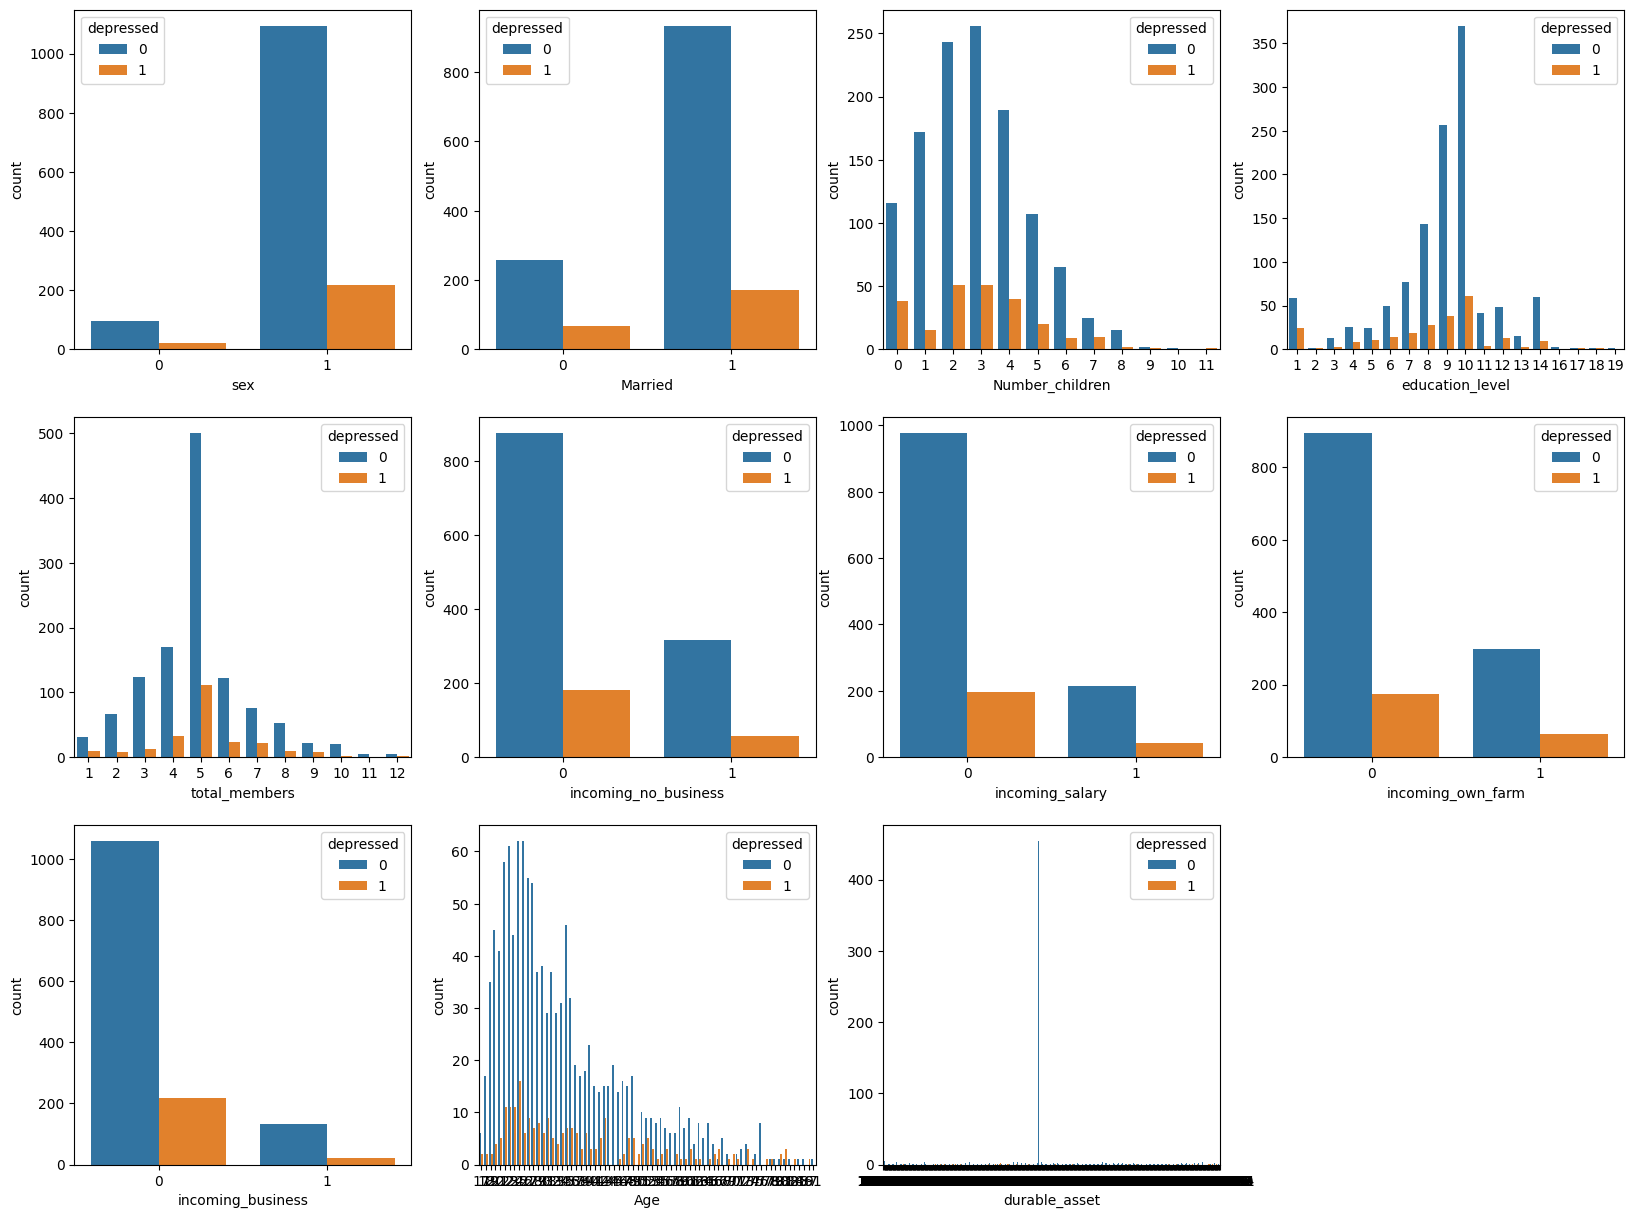

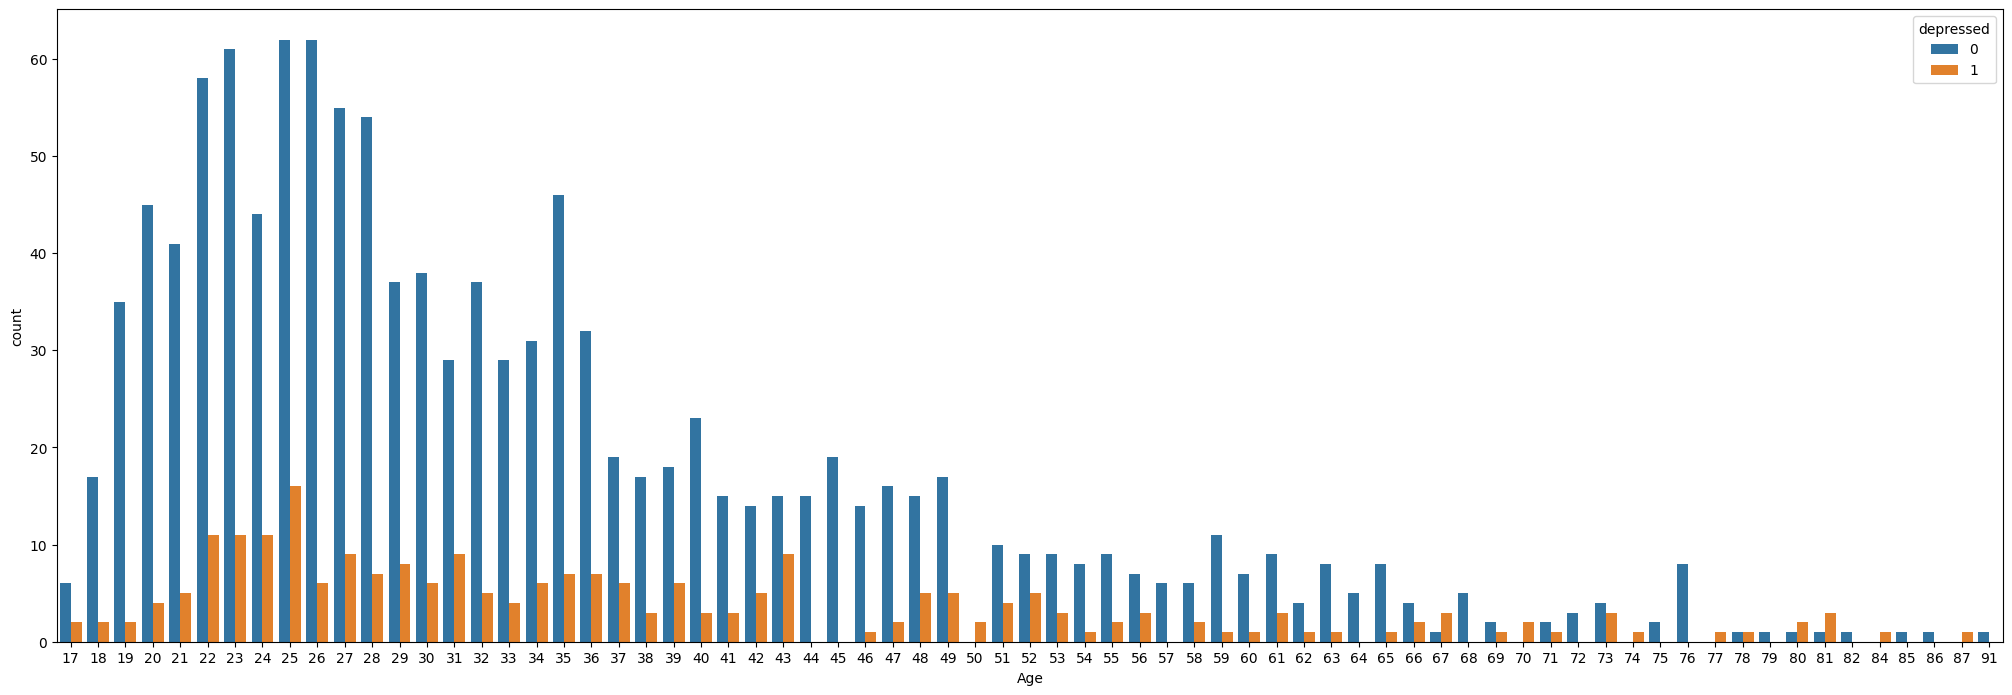

In [ ]:
#L
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
sns.countplot(x='sex', hue='depressed', data=df)
plt.subplot(3,4,2)
sns.countplot(x='Married', hue='depressed', data=df)
plt.subplot(3,4,3)
sns.countplot(x='Number_children', hue='depressed', data=df)

plt.subplot(3,4,4)
sns.countplot(x='education_level', hue='depressed', data=df)
plt.subplot(3,4,5)
sns.countplot(x='total_members', hue='depressed', data=df)
plt.subplot(3,4,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df)

plt.subplot(3,4,7)
sns.countplot(x='incoming_salary', hue='depressed', data=df)
plt.subplot(3,4,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df)
plt.subplot(3,4,9)
sns.countplot(x='incoming_business', hue='depressed', data=df)

plt.subplot(3,4,10)
sns.countplot(x='Age', hue='depressed', data=df)

plt.subplot(3,4,11)
sns.countplot(x='durable_asset', hue='depressed', data=df)

plt.figure(figsize=(80,20))
plt.subplot(3,4,10)
sns.countplot(x='Age', hue='depressed', data=df)

plt.tight_layout()
plt.show()

In [ ]:
print(df.loc[df["sex"] == 1, ["Age", "depressed"]])

      Age  depressed
0      28          0
1      23          1
2      22          0
3      27          0
5      35          0
...   ...        ...
1424   25          0
1425   28          0
1426   66          1
1427   51          0
1428   33          0

[1312 rows x 2 columns]


W powyższym kodzie następuje wyodrębnienie wieku (Age) dla osób płci męskiej (sex == 1), a następnie tworzenie histogramu wieku z podziałem na 200

[28 23 22 ... 66 51 33]


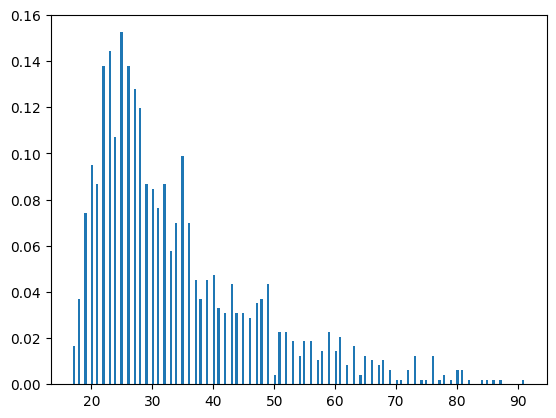

In [ ]:
data = df.loc[df["sex"] == 1]["Age"].to_numpy()
print(data)
cell = 200
count, bins, ignored = plt.hist(data, cell, density=True)
plt.show()

Używa biblioteki seaborn do wygenerowania wykresu gęstości (kernel density estimate) na podstawie danych dotyczących wieku, które zostały wcześniej wyodrębnione (zmienna data).

In [ ]:
import seaborn as sns

<ipython-input-18-fb320177fece>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


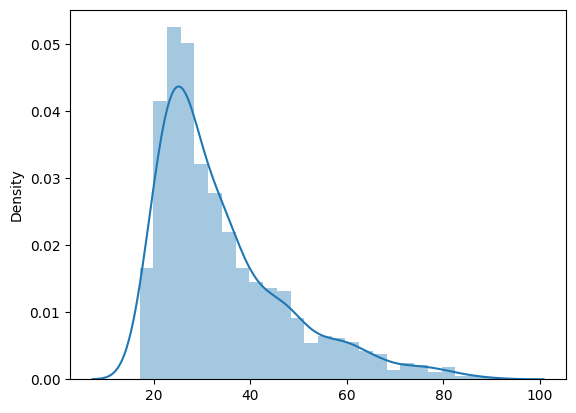

In [ ]:
sns.distplot(data)
plt.show()

znajdowanie elementow nietypowych metoda 3 sigm metoda do identyfikacji wartości odstających na podstawie odchylenia standardowego.

In [ ]:
def find_outliers(data, title=''):
  cell = 75
  plt.title(title + ', rozmiar=' + str(len(data)))
  count, bins, ignored = plt.hist(data, cell, density=True)
  plt.show()
  mean = data.mean()
  std = data.std()
  print('srednia', mean)
  print('odchylenie std', std)
  for sigma in [1, 2, 3]:
    print([mean - sigma * std, mean + sigma * std])
    outliers = np.concatenate((data[np.where(data < (mean - sigma * std))], data[np.where(data > (mean + sigma * std))]))
    print('liczba elementow nietypowych', len(outliers))
    plt.title(f'sigma = {sigma}')
    count, bins, ignored = plt.hist(data, cell, density=True)
    for out in outliers:
      plt.plot(out, 0, color='r', marker='o')
    plt.show()

 Funkcja find_outliers, która służy do identyfikacji i wizualizacji nietypowych wartości (outlierów) dla podanej zmiennej (atrybutu) w danych. Następnie w pętlach wykonuje się analiza outlierów dla różnych kombinacji zmiennych, takich jak płeć (sex), stan cywilny (Married), dochód z wynagrodzenia (incoming_salary) oraz różnych atrybutów, takich jak wiek (Age), liczba dzieci (Number_children), oszczędności (save_asset) i koszty utrzymania (living_expenses). Analiza jest prowadzona dla wszystkich danych, a także podzielonych według wartości płeć, stan cywilny i stan depresji. Dla każdej analizy tworzone są histogramy z identyfikacją punktów nietypowych (outlierów) oraz wypisywane są średnia i odchylenie standardowe dla danej zmiennej.

Oś y - liczba wystąpień danej kategorii w analizie związku z depresją.

Oś x - wiek, liczba dzieci, poziom edukacji itp.

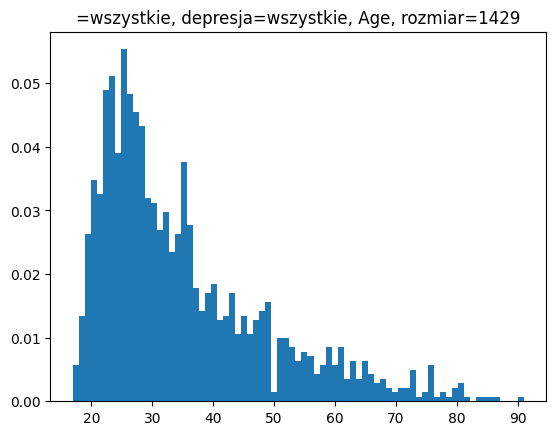

srednia 34.77746675997201
odchylenie std 13.981324002915725
[20.79614275705628, 48.758790762887735]
liczba elementow nietypowych 342


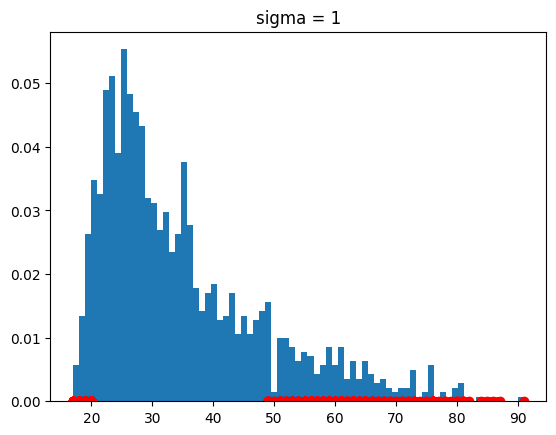

[6.814818754140557, 62.740114765803455]
liczba elementow nietypowych 84


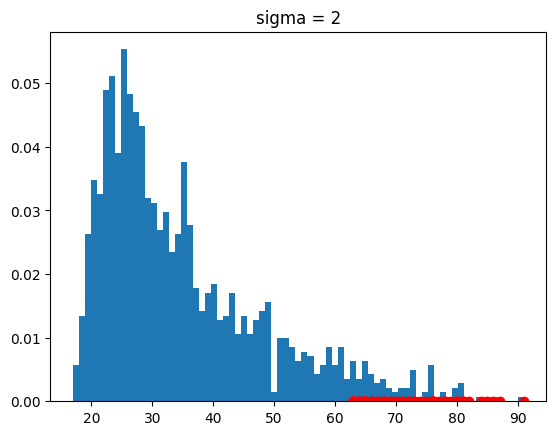

[-7.166505248775167, 76.72143876871918]
liczba elementow nietypowych 17


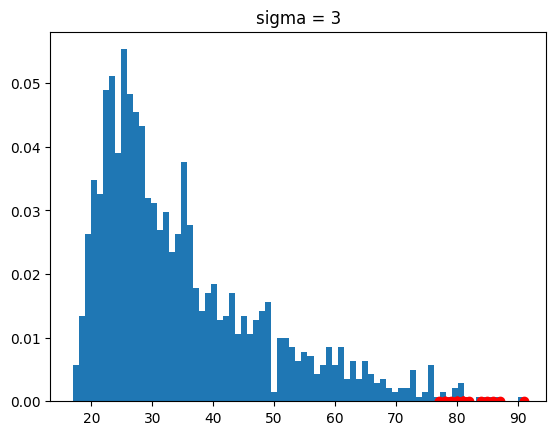

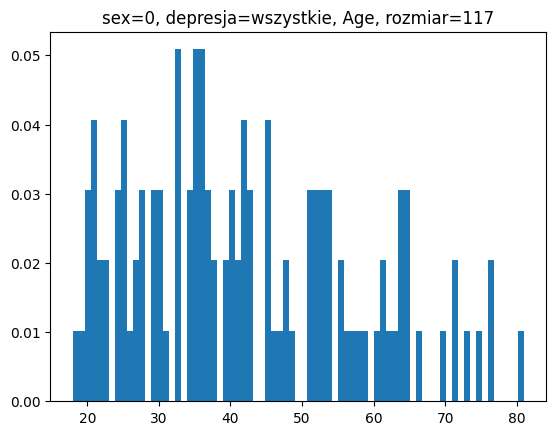

srednia 42.23931623931624
odchylenie std 15.517648938943697
[26.72166730037254, 57.75696517825993]
liczba elementow nietypowych 43


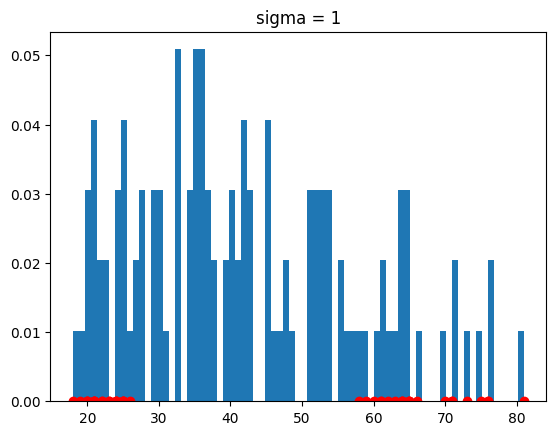

[11.204018361428844, 73.27461411720364]
liczba elementow nietypowych 4


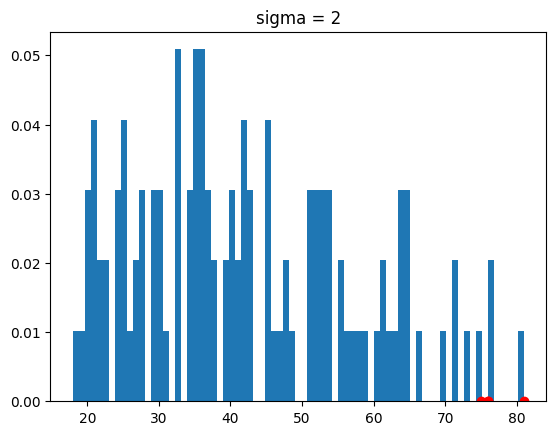

[-4.313630577514857, 88.79226305614733]
liczba elementow nietypowych 0


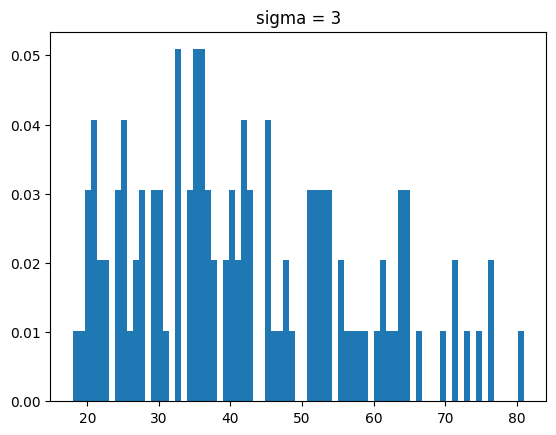

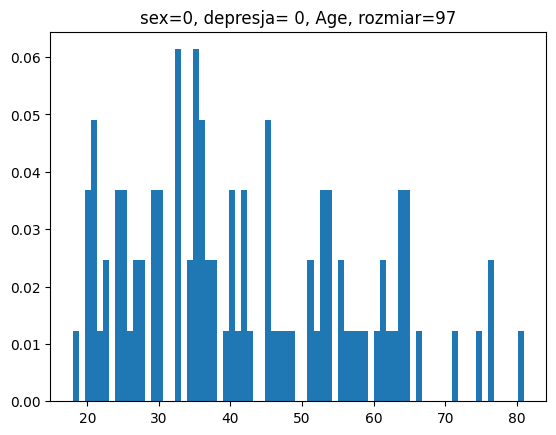

srednia 42.11340206185567
odchylenie std 15.59928381164611
[26.514118250209563, 57.71268587350178]
liczba elementow nietypowych 37


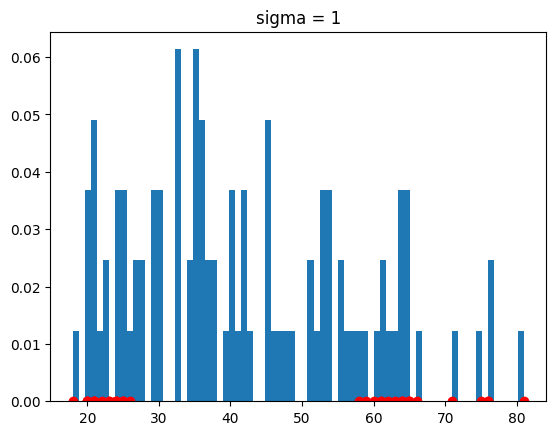

[10.914834438563453, 73.31196968514789]
liczba elementow nietypowych 4


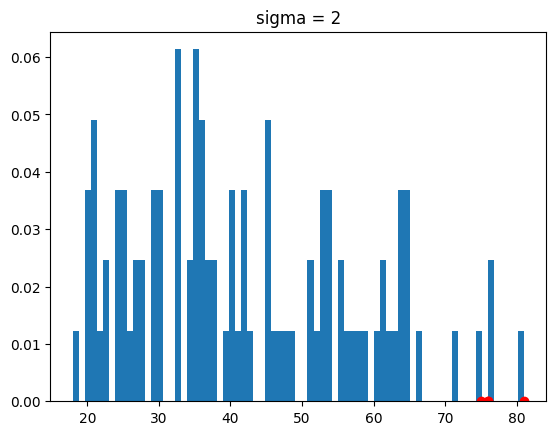

[-4.684449373082657, 88.911253496794]
liczba elementow nietypowych 0


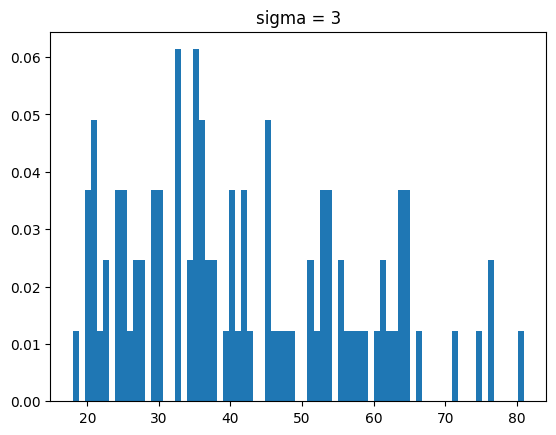

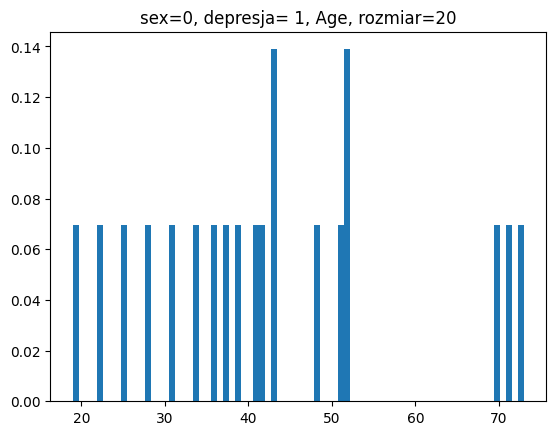

srednia 42.85
odchylenie std 15.10057945908037
[27.74942054091963, 57.95057945908037]
liczba elementow nietypowych 6


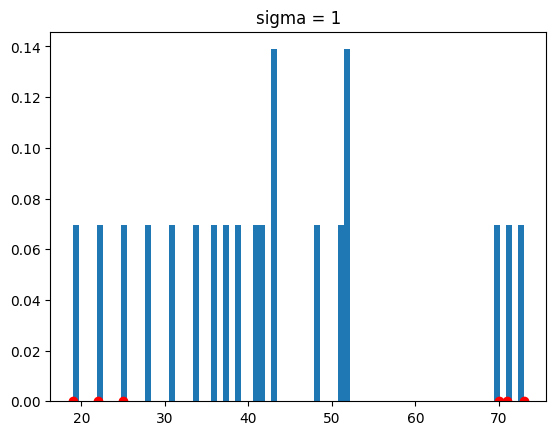

[12.648841081839262, 73.05115891816074]
liczba elementow nietypowych 0


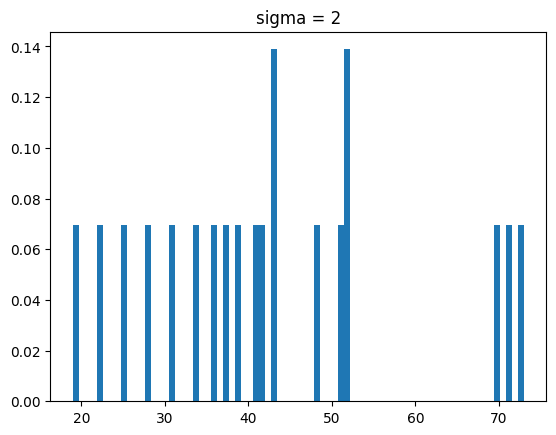

[-2.4517383772411065, 88.15173837724112]
liczba elementow nietypowych 0


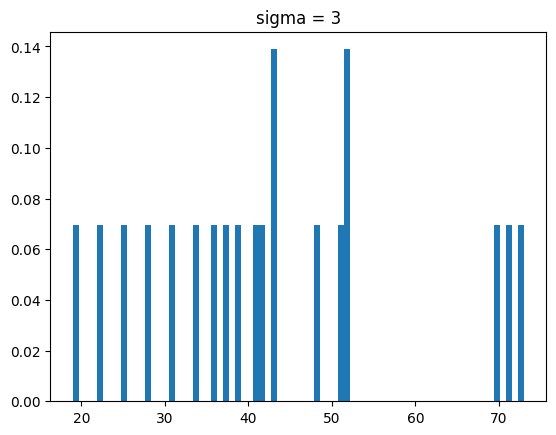

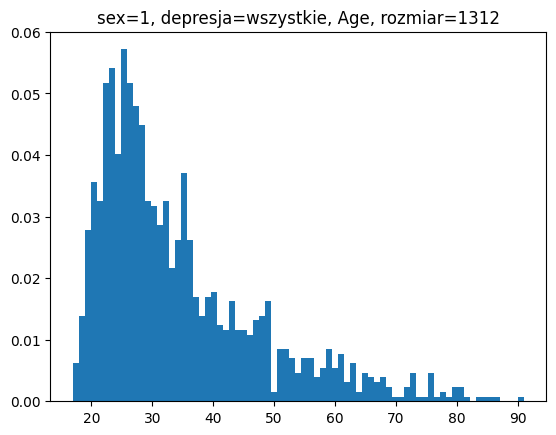

srednia 34.11204268292683
odchylenie std 13.63920242457989
[20.472840258346935, 47.75124510750672]
liczba elementow nietypowych 316


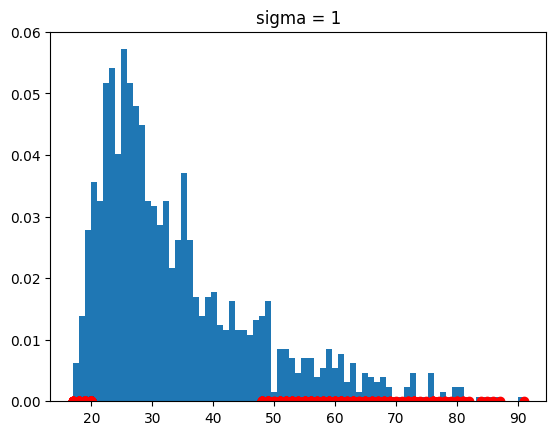

[6.833637833767046, 61.39044753208661]
liczba elementow nietypowych 72


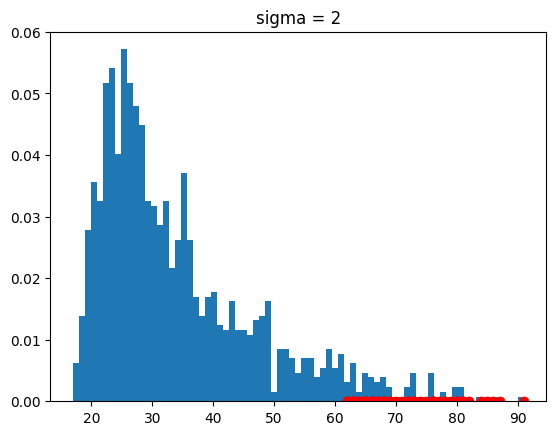

[-6.805564590812843, 75.0296499566665]
liczba elementow nietypowych 22


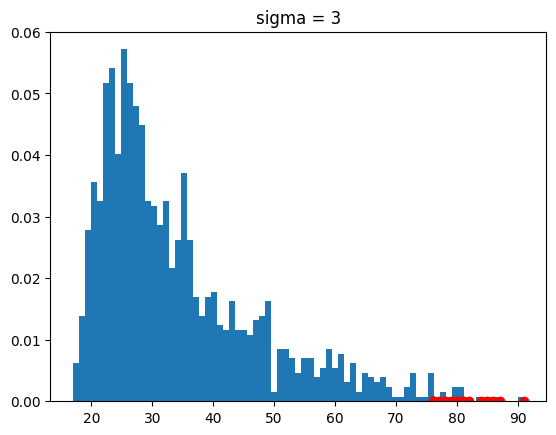

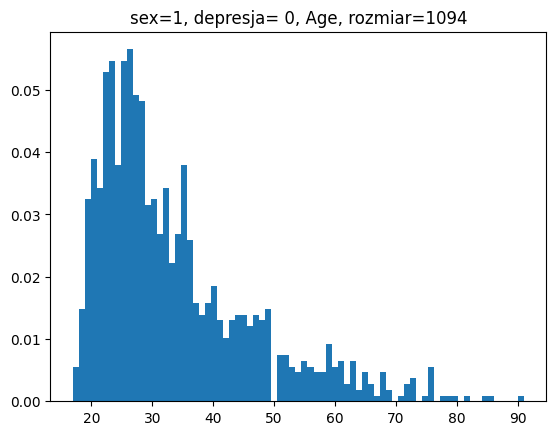

srednia 33.40767824497258
odchylenie std 12.99501294804565
[20.41266529692693, 46.40269119301823]
liczba elementow nietypowych 267


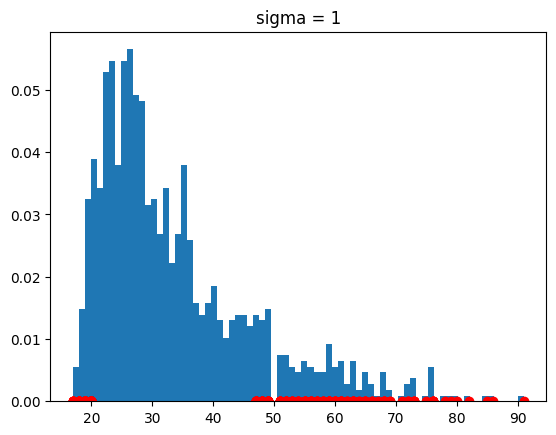

[7.41765234888128, 59.39770414106388]
liczba elementow nietypowych 63


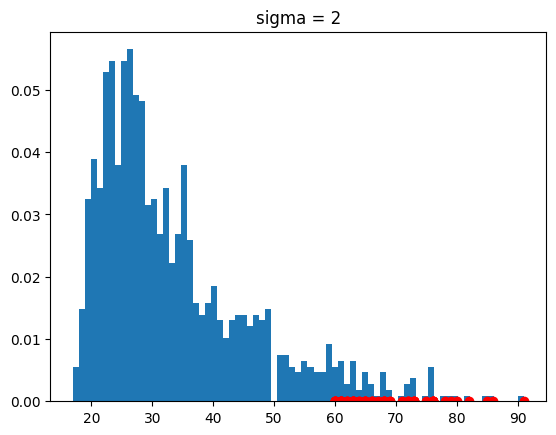

[-5.577360599164372, 72.39271708910954]
liczba elementow nietypowych 18


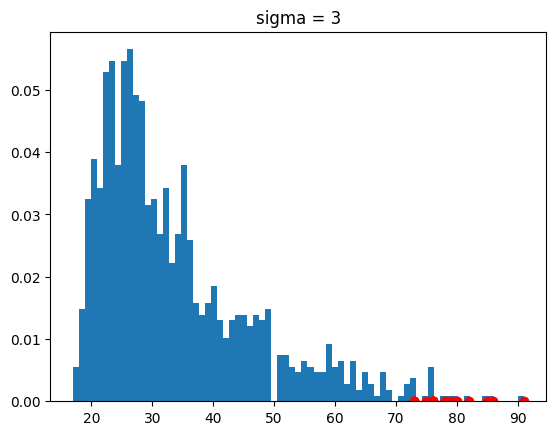

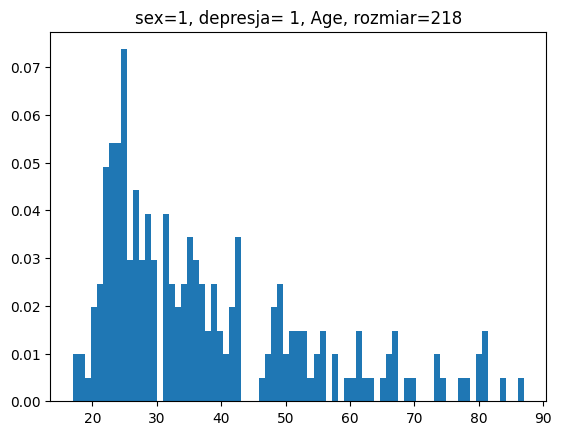

srednia 37.64678899082569
odchylenie std 16.0357688990841
[21.61102009174159, 53.68255788990979]
liczba elementow nietypowych 49


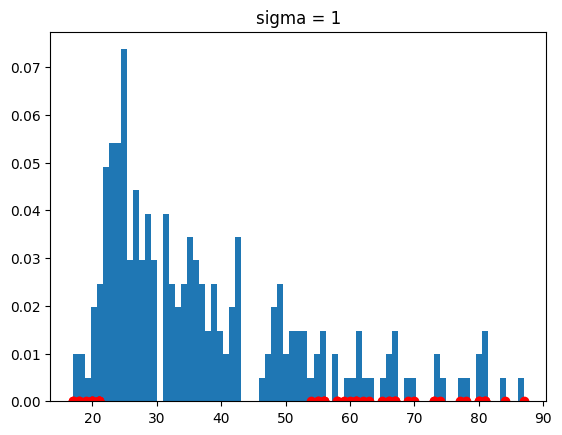

[5.57525119265749, 69.71832678899389]
liczba elementow nietypowych 13


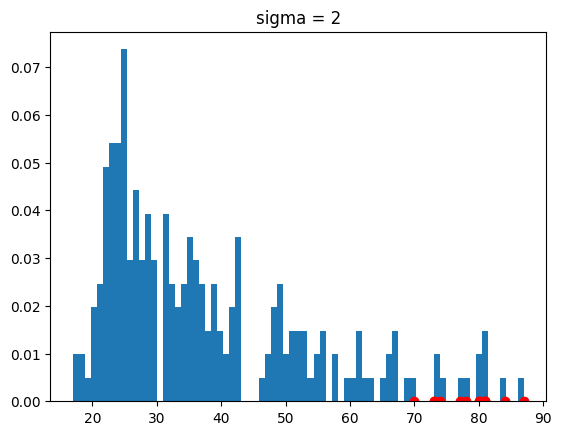

[-10.460517706426607, 85.754095688078]
liczba elementow nietypowych 1


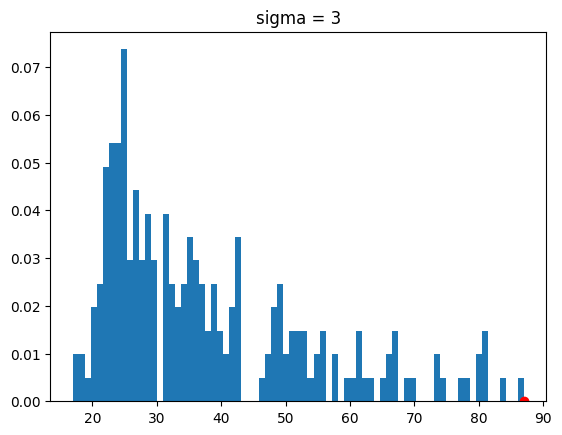

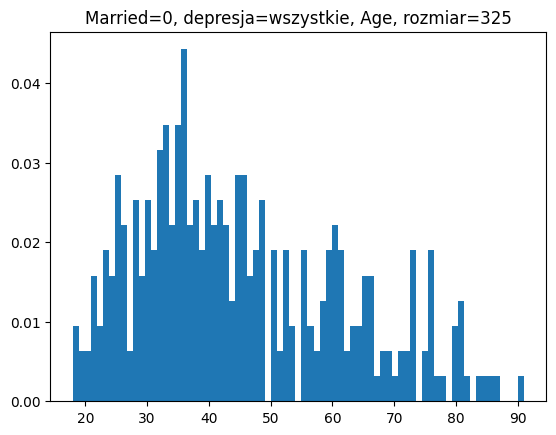

srednia 45.00615384615384
odchylenie std 16.56557948484263
[28.440574361311214, 61.57173333099647]
liczba elementow nietypowych 109


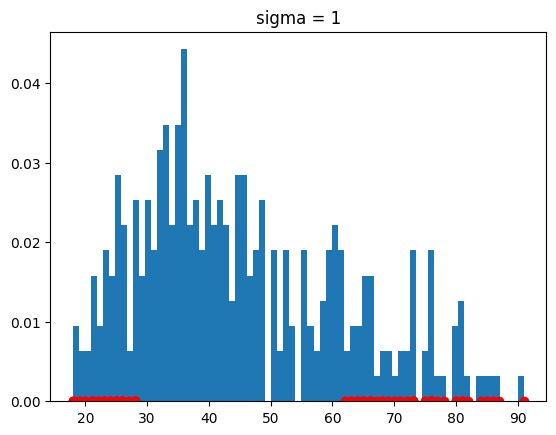

[11.874994876468584, 78.1373128158391]
liczba elementow nietypowych 13


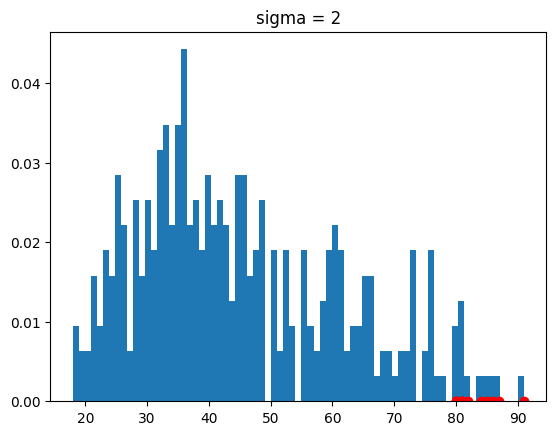

[-4.690584608374046, 94.70289230068173]
liczba elementow nietypowych 0


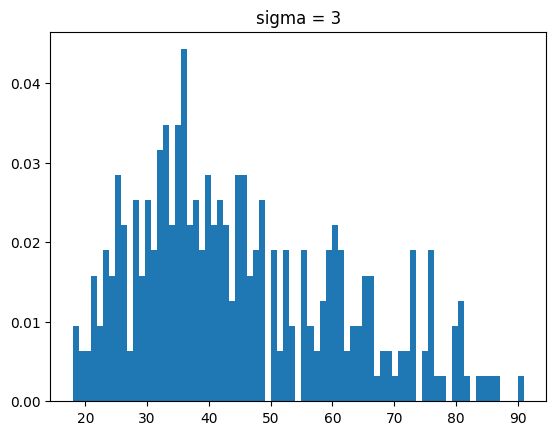

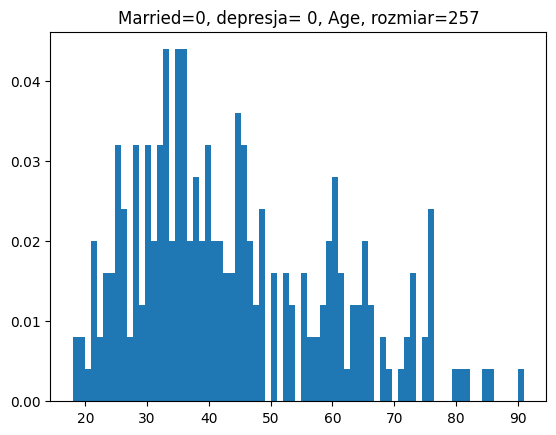

srednia 43.72762645914397
odchylenie std 15.840269552709339
[27.887356906434633, 59.56789601185331]
liczba elementow nietypowych 86


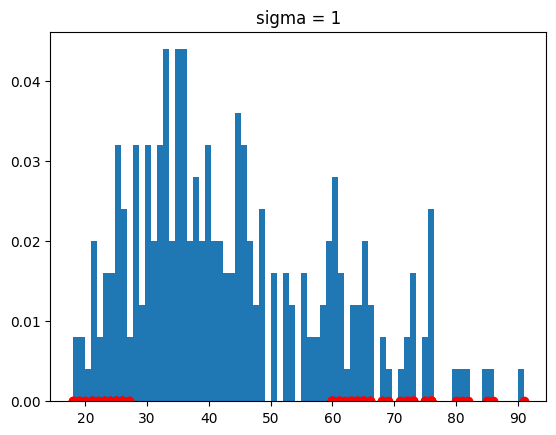

[12.047087353725292, 75.40816556456265]
liczba elementow nietypowych 12


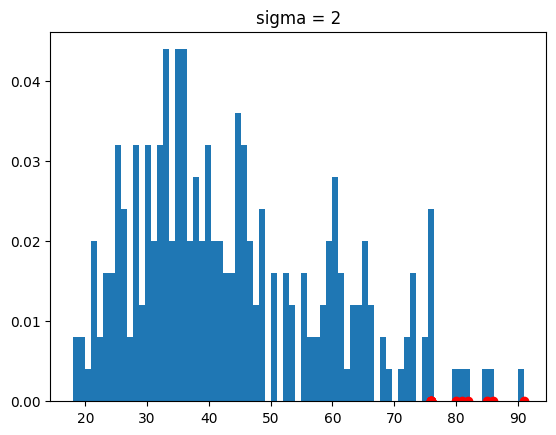

[-3.7931821989840486, 91.24843511727198]
liczba elementow nietypowych 0


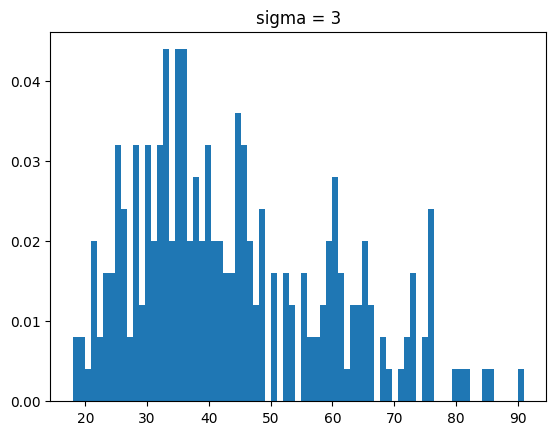

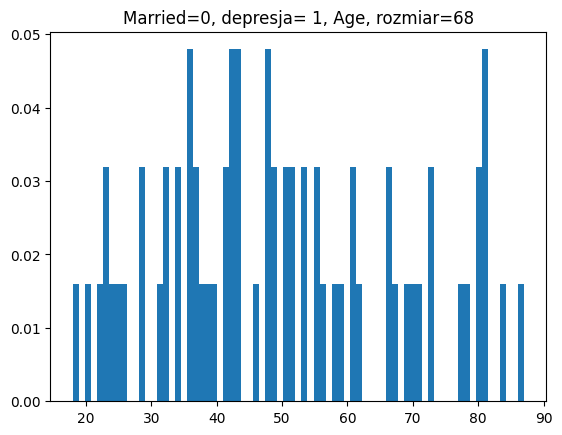

srednia 49.838235294117645
odchylenie std 18.268109704617245
[31.5701255895004, 68.1063449987349]
liczba elementow nietypowych 25


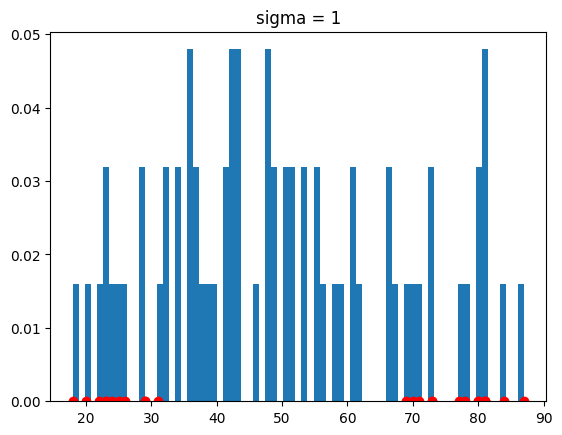

[13.302015884883154, 86.37445470335214]
liczba elementow nietypowych 1


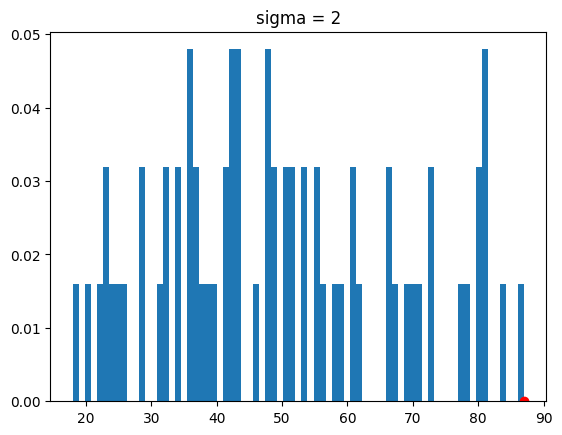

[-4.966093819734091, 104.64256440796939]
liczba elementow nietypowych 0


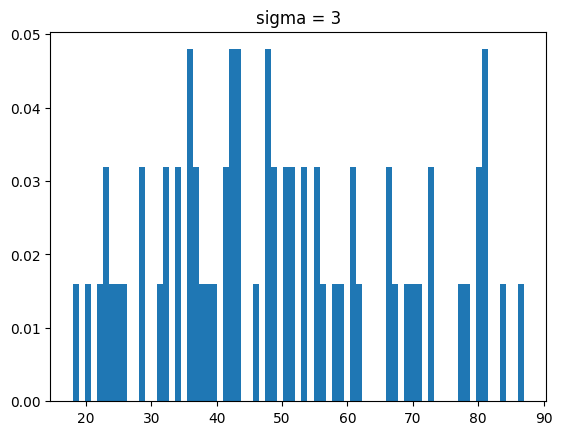

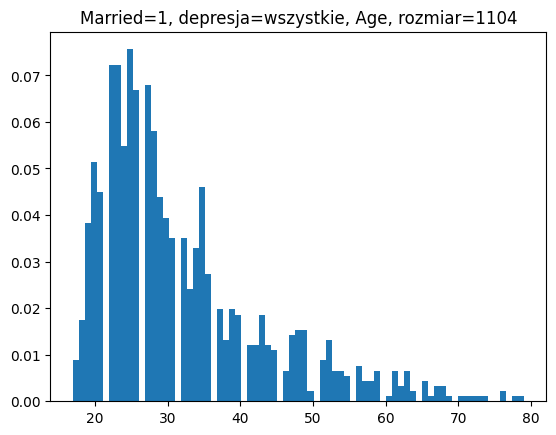

srednia 31.766304347826086
odchylenie std 11.505264489781892
[20.261039858044192, 43.27156883760798]
liczba elementow nietypowych 273


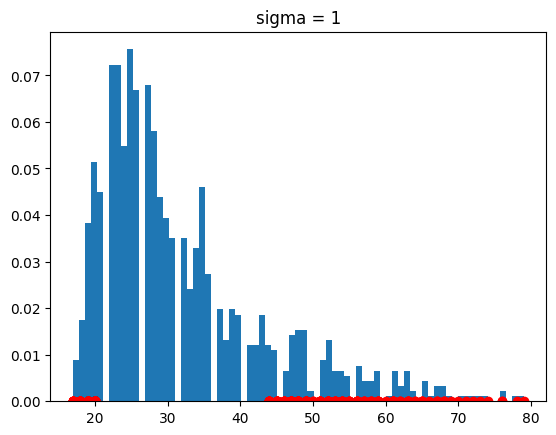

[8.755775368262302, 54.776833327389866]
liczba elementow nietypowych 65


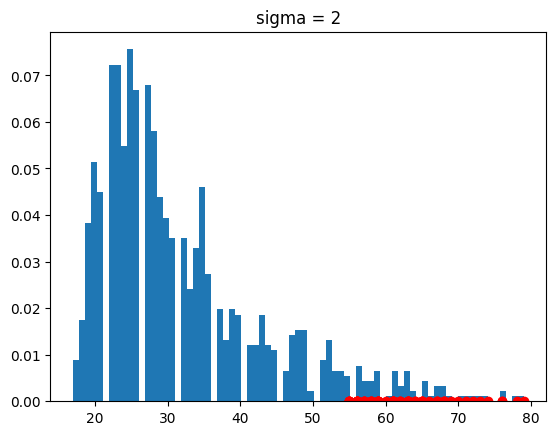

[-2.749489121519588, 66.28209781717176]
liczba elementow nietypowych 16


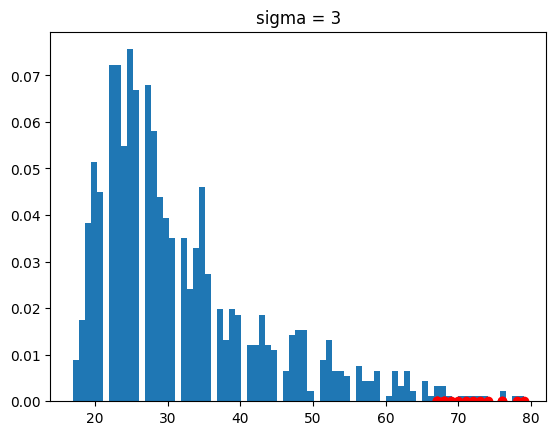

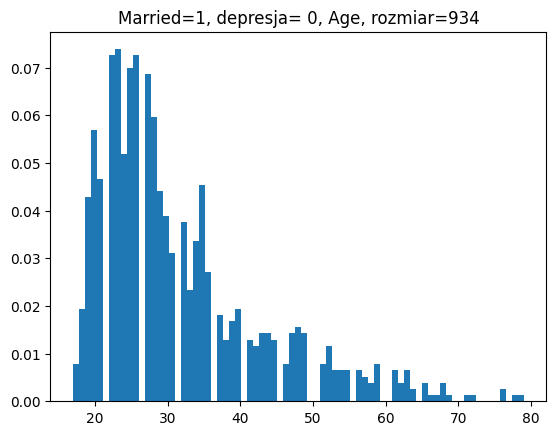

srednia 31.472162740899357
odchylenie std 11.35115839117229
[20.121004349727066, 42.82332113207165]
liczba elementow nietypowych 248


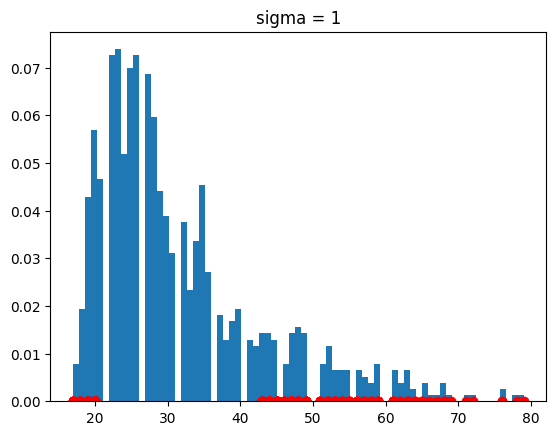

[8.769845958554775, 54.17447952324394]
liczba elementow nietypowych 53


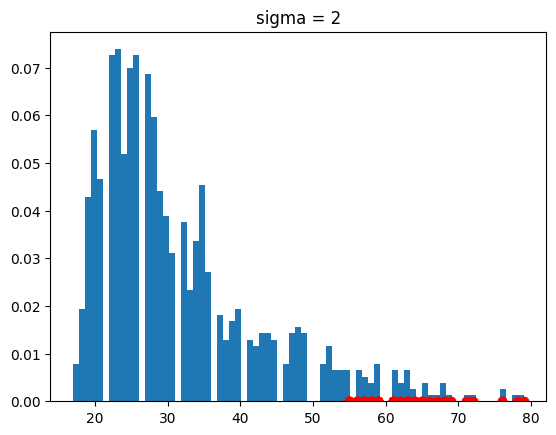

[-2.5813124326175156, 65.52563791441622]
liczba elementow nietypowych 12


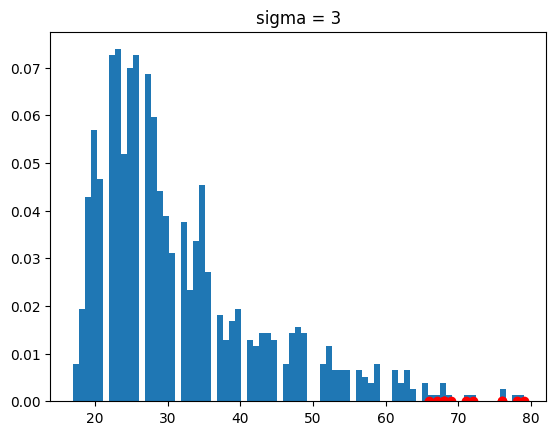

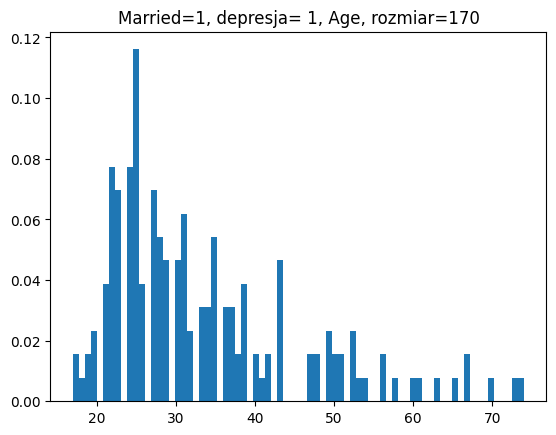

srednia 33.38235294117647
odchylenie std 12.19164300533567
[21.1907099358408, 45.57399594651214]
liczba elementow nietypowych 41


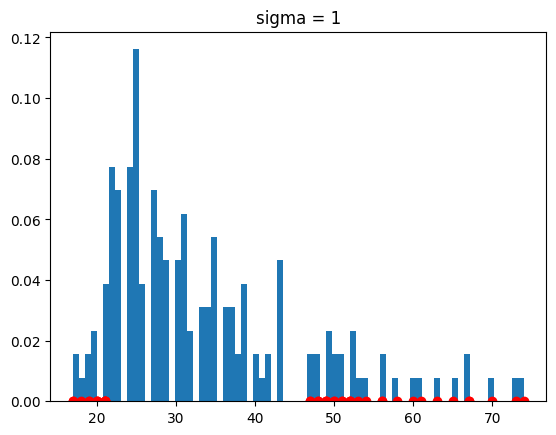

[8.99906693050513, 57.76563895184781]
liczba elementow nietypowych 10


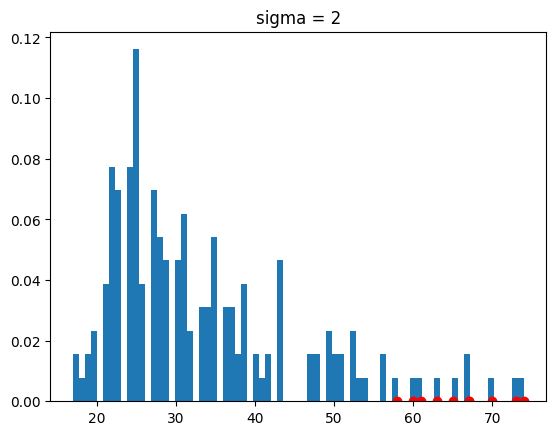

[-3.1925760748305407, 69.95728195718348]
liczba elementow nietypowych 3


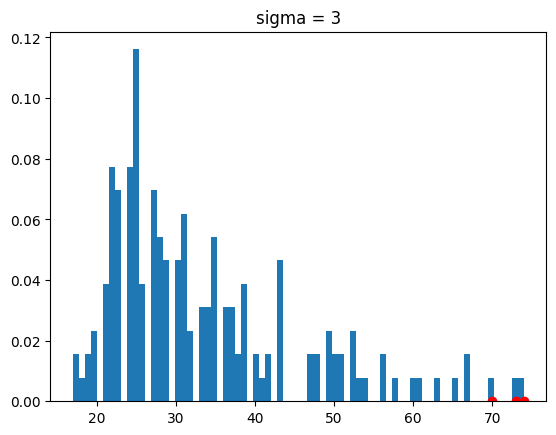

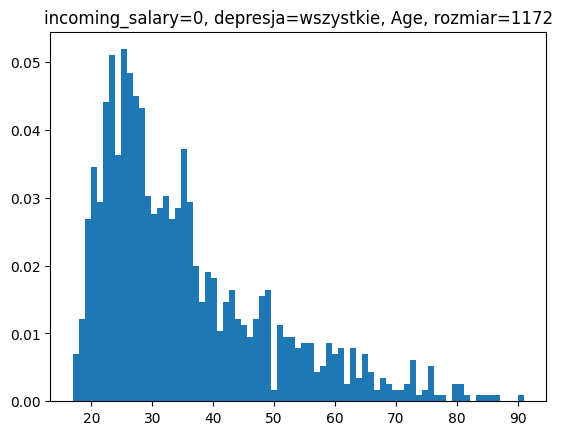

srednia 35.14334470989761
odchylenie std 14.091422550456343
[21.05192215944127, 49.234767260353955]
liczba elementow nietypowych 306


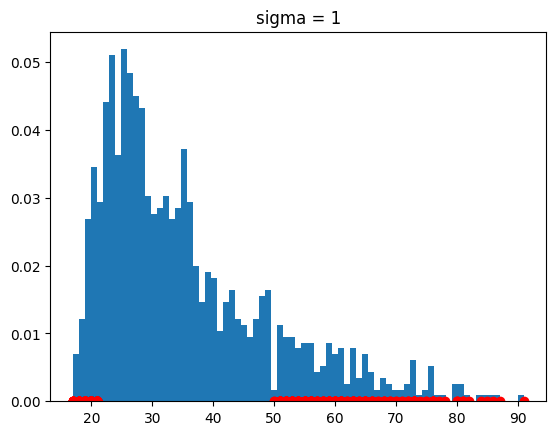

[6.960499608984925, 63.3261898108103]
liczba elementow nietypowych 63


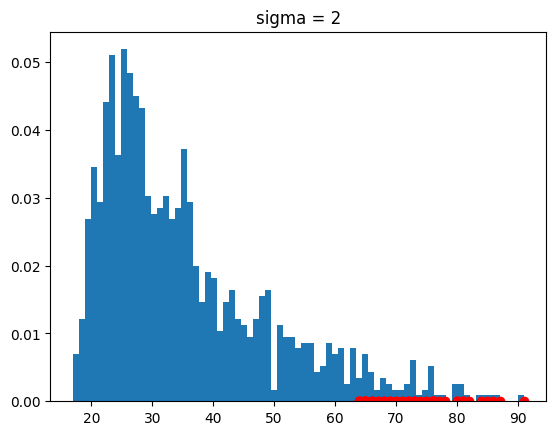

[-7.130922941471418, 77.41761236126663]
liczba elementow nietypowych 13


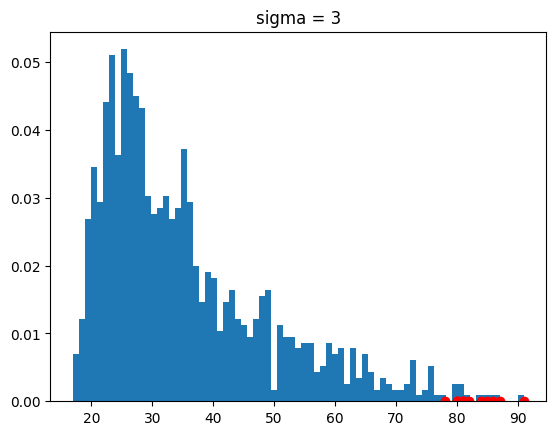

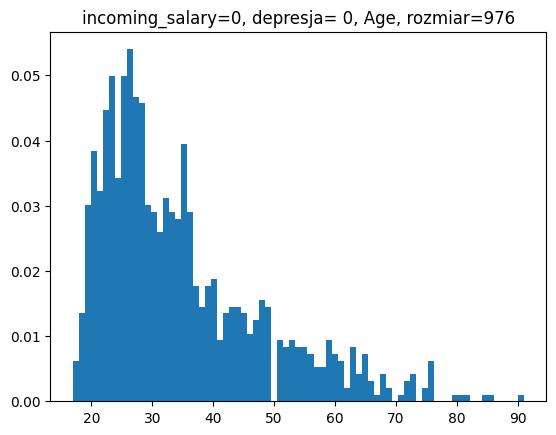

srednia 34.44569672131148
odchylenie std 13.499359499310646
[20.94633722200083, 47.94505622062212]
liczba elementow nietypowych 248


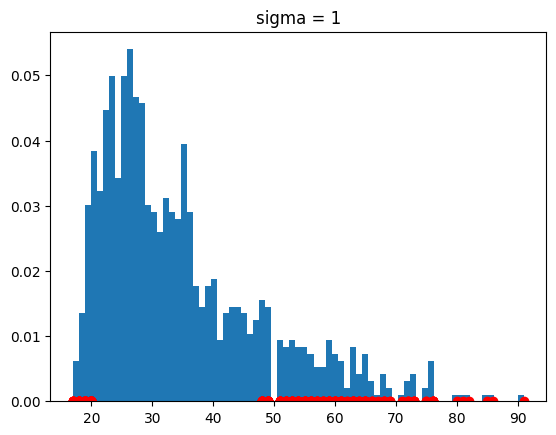

[7.446977722690185, 61.44441571993277]
liczba elementow nietypowych 53


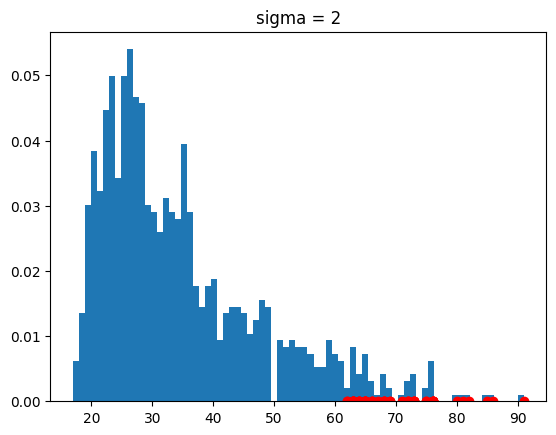

[-6.052381776620464, 74.94377521924342]
liczba elementow nietypowych 14


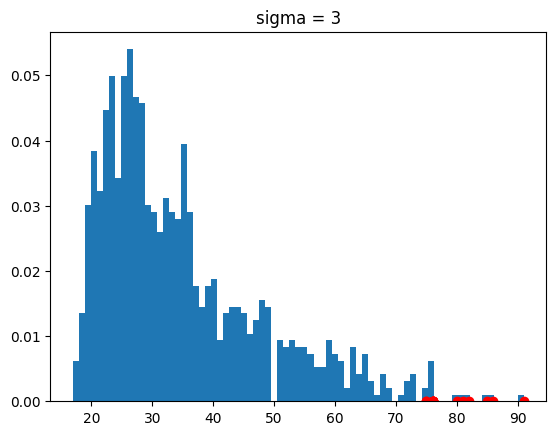

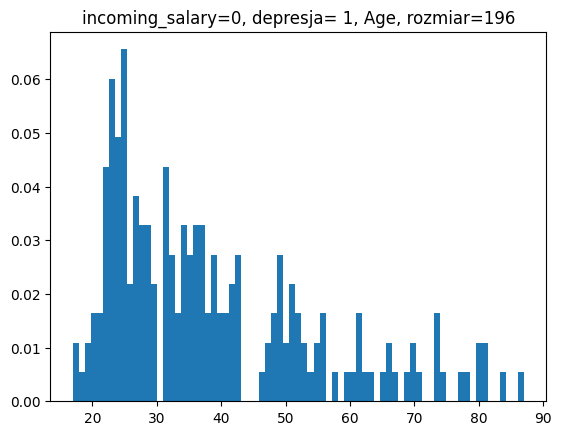

srednia 38.61734693877551
odchylenie std 16.291712714301948
[22.325634224473564, 54.90905965307746]
liczba elementow nietypowych 52


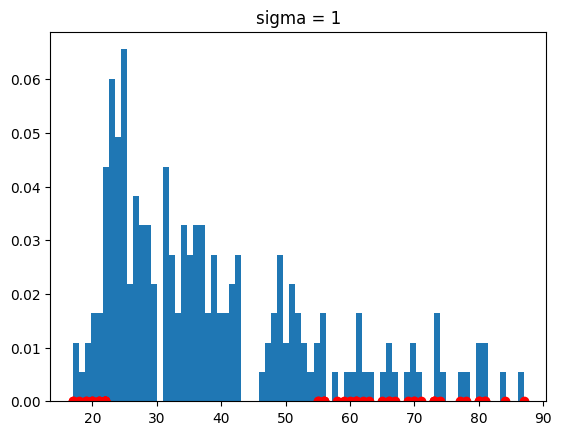

[6.033921510171616, 71.20077236737941]
liczba elementow nietypowych 12


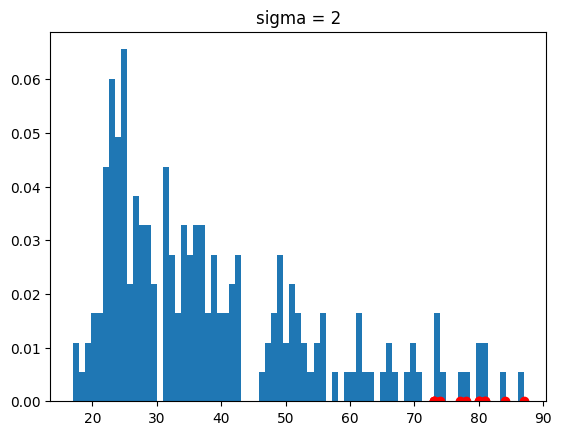

[-10.257791204130328, 87.49248508168135]
liczba elementow nietypowych 0


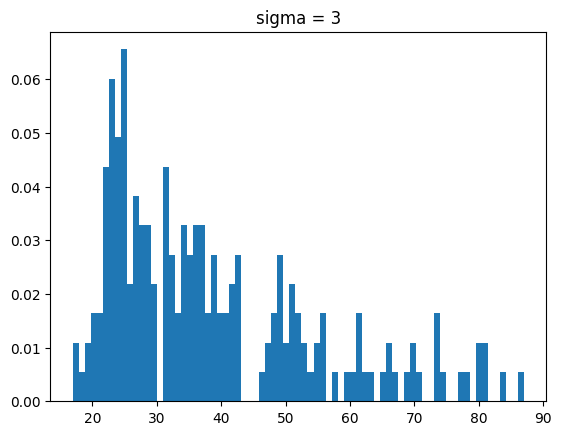

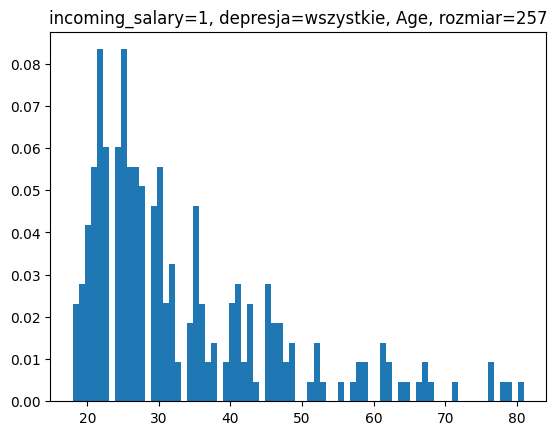

srednia 33.10894941634241
odchylenie std 13.34121921057737
[19.76773020576504, 46.45016862691978]
liczba elementow nietypowych 48


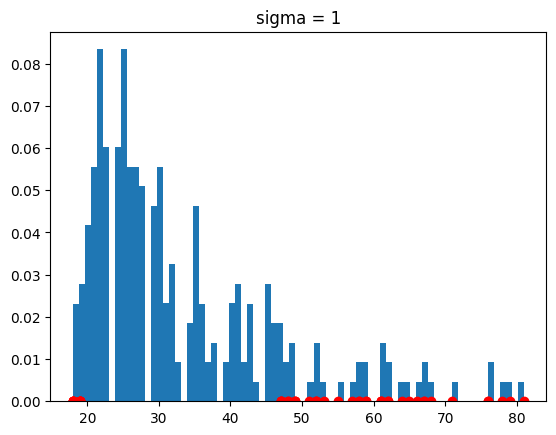

[6.426510995187673, 59.791387837497155]
liczba elementow nietypowych 17


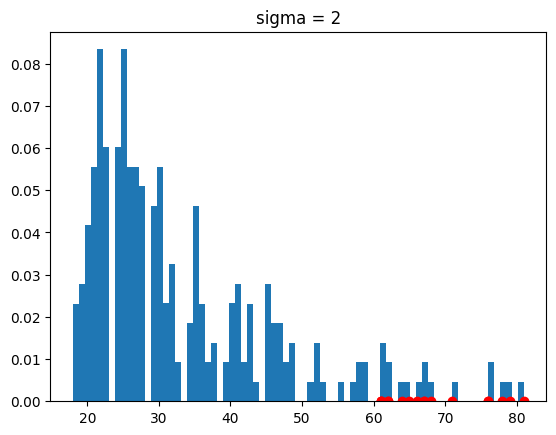

[-6.914708215389695, 73.13260704807452]
liczba elementow nietypowych 5


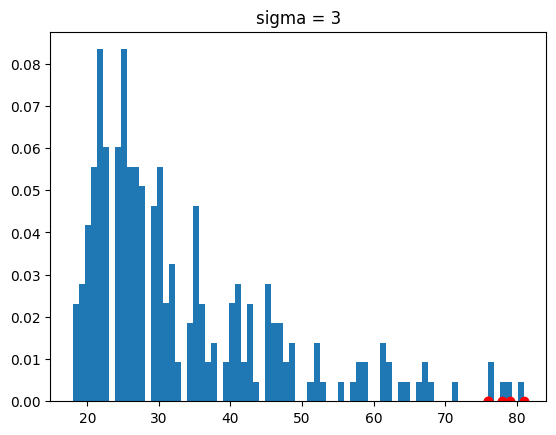

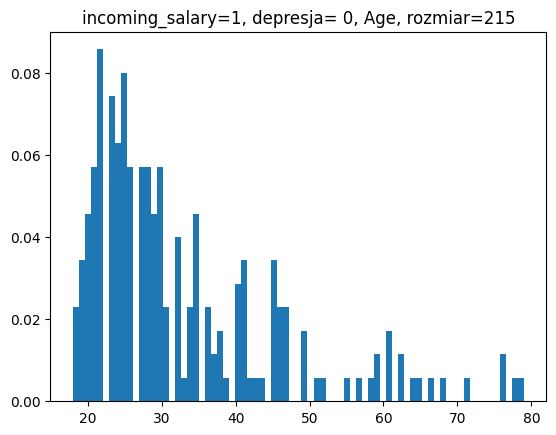

srednia 32.62325581395349
odchylenie std 13.057383854379319
[19.565871959574174, 45.68063966833281]
liczba elementow nietypowych 42


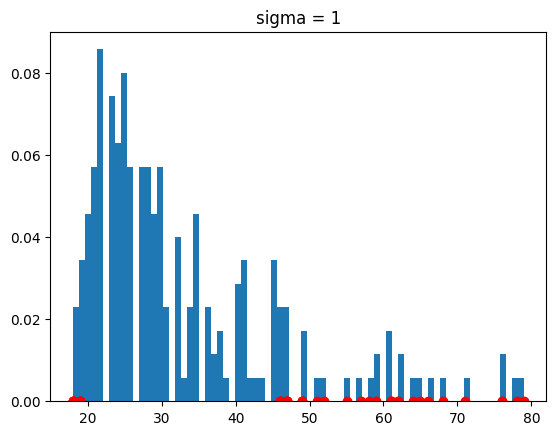

[6.5084881051948535, 58.738023522712126]
liczba elementow nietypowych 16


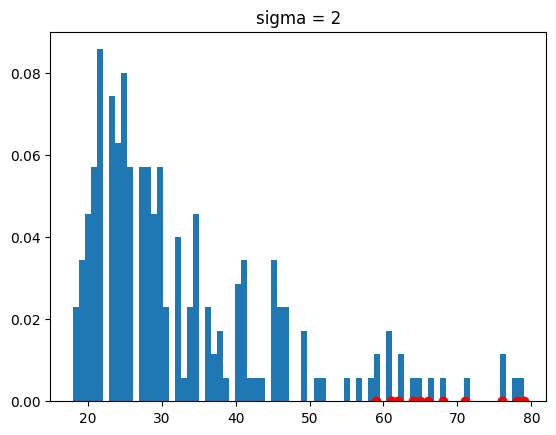

[-6.548895749184467, 71.79540737709145]
liczba elementow nietypowych 4


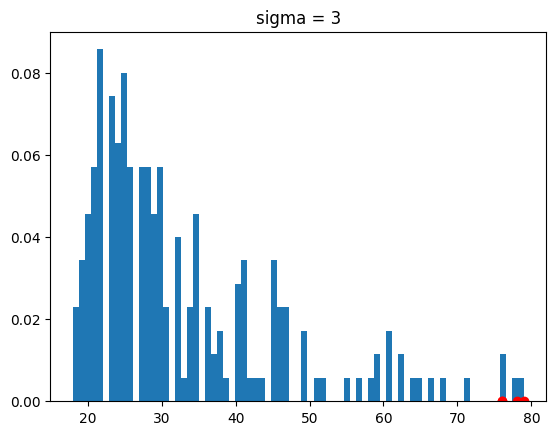

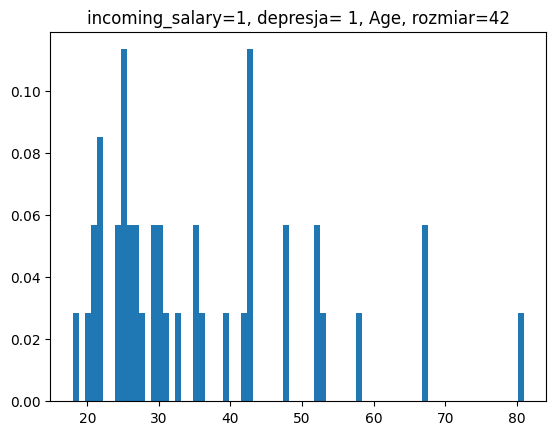

srednia 35.595238095238095
odchylenie std 14.455283304712541
[21.139954790525554, 50.05052139995064]
liczba elementow nietypowych 11


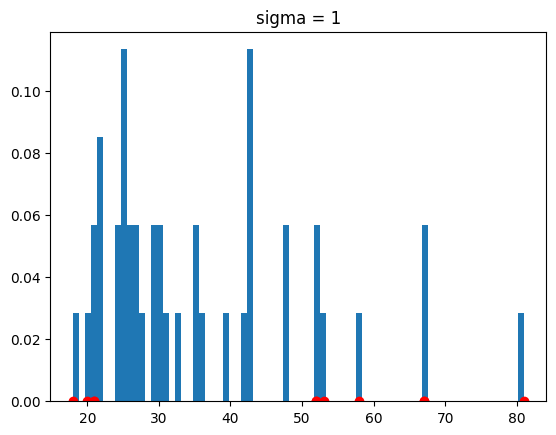

[6.684671485813013, 64.50580470466318]
liczba elementow nietypowych 3


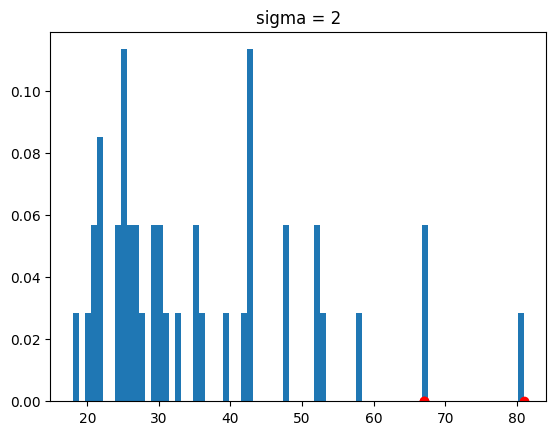

[-7.770611818899532, 78.96108800937571]
liczba elementow nietypowych 1


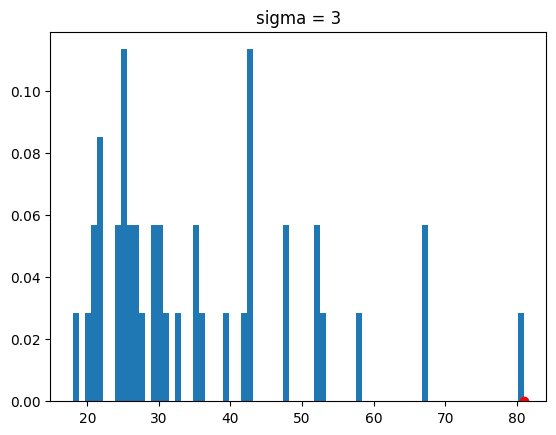

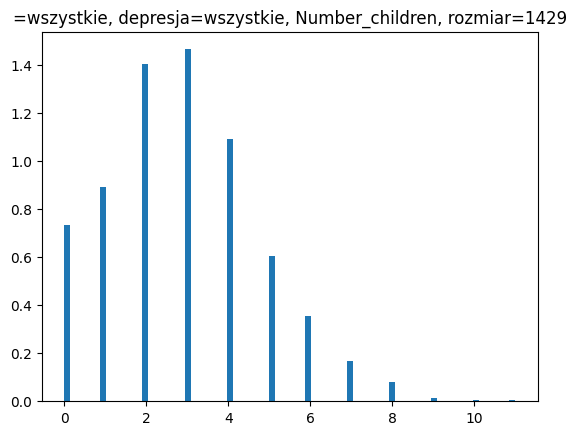

srednia 2.8831350594821554
odchylenie std 1.8738156614015131
[1.0093193980806423, 4.756950720883669]
liczba elementow nietypowych 599


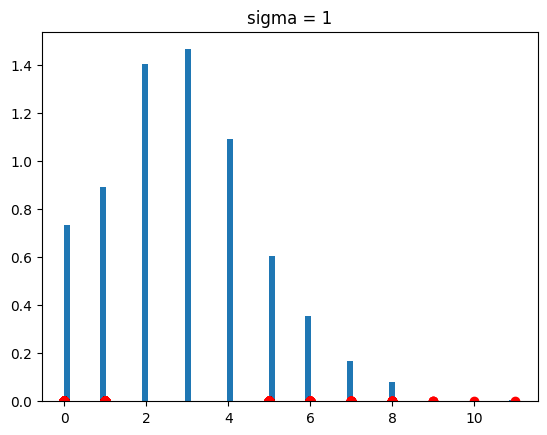

[-0.8644962633208708, 6.630766382285182]
liczba elementow nietypowych 57


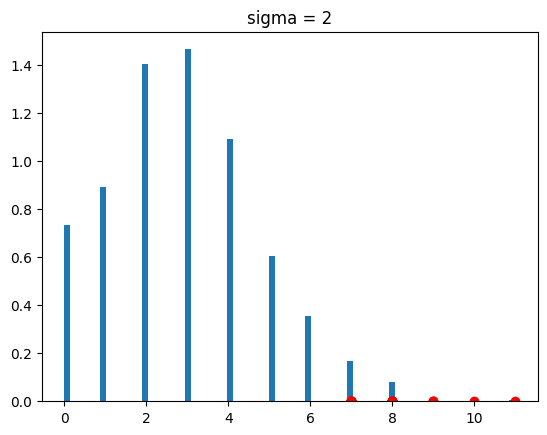

[-2.7383119247223835, 8.504582043686694]
liczba elementow nietypowych 5


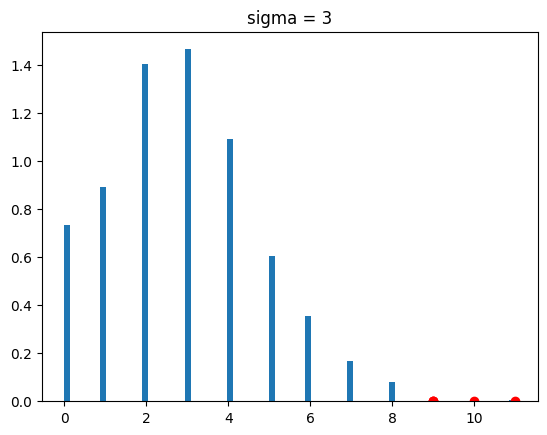

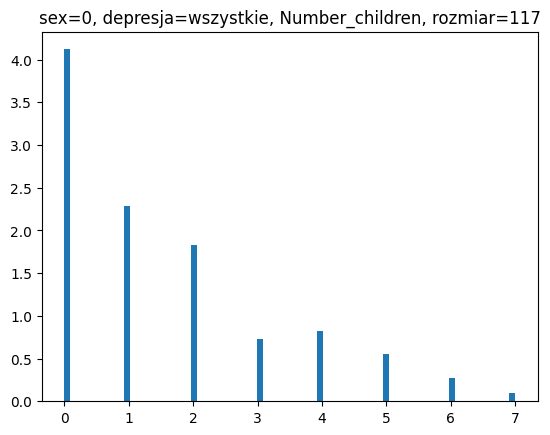

srednia 1.5384615384615385
odchylenie std 1.73224059015944
[-0.19377905169790144, 3.2707021286209788]
liczba elementow nietypowych 19


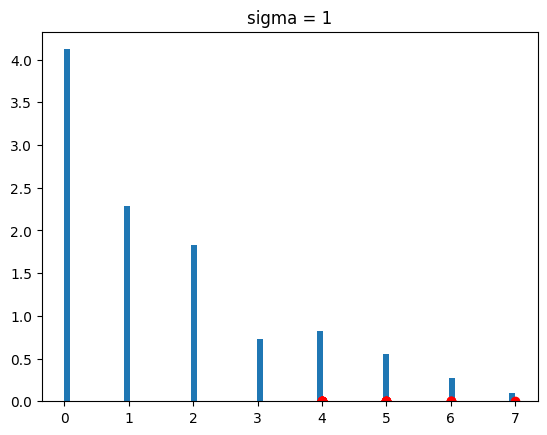

[-1.9260196418573414, 5.002942718780418]
liczba elementow nietypowych 4


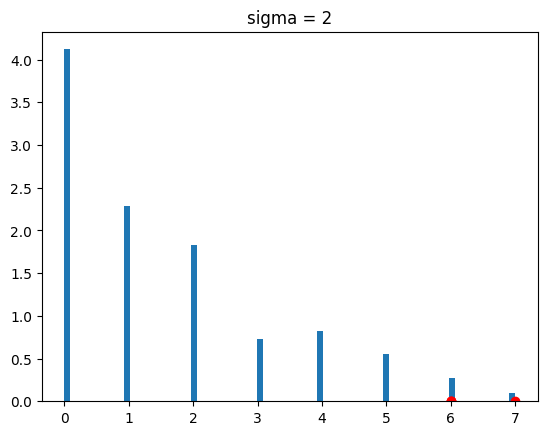

[-3.658260232016781, 6.735183308939858]
liczba elementow nietypowych 1


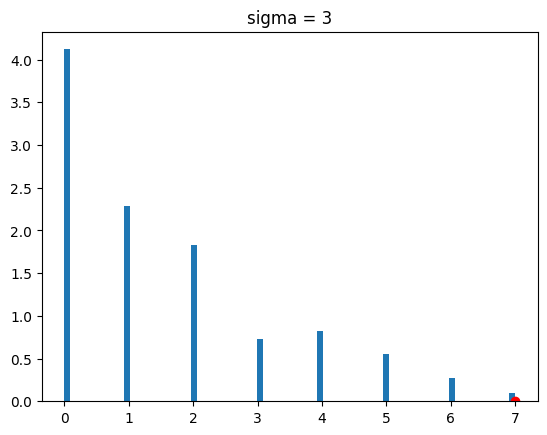

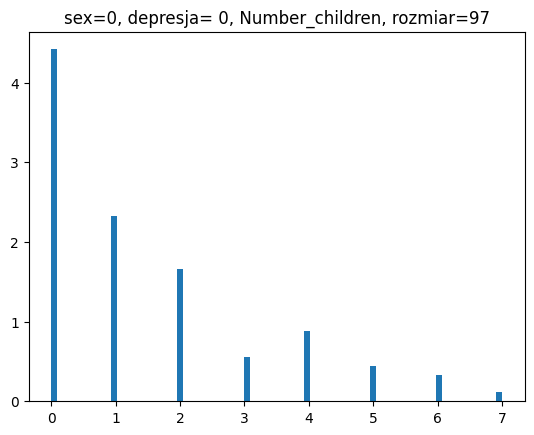

srednia 1.4742268041237114
odchylenie std 1.7591749677381696
[-0.2849481636144582, 3.233401771861881]
liczba elementow nietypowych 16


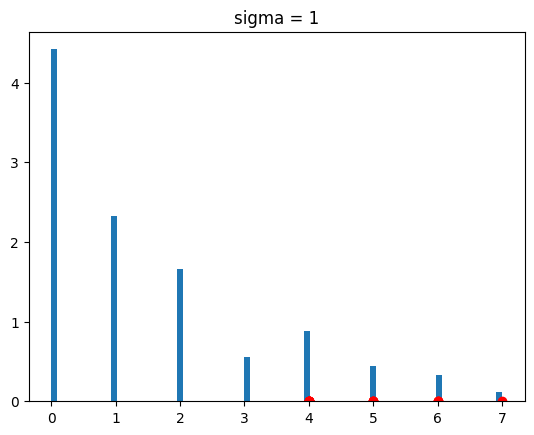

[-2.044123131352628, 4.99257673960005]
liczba elementow nietypowych 8


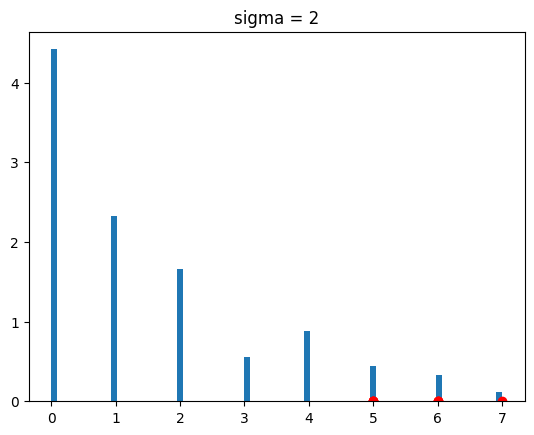

[-3.8032980990907976, 6.7517517073382205]
liczba elementow nietypowych 1


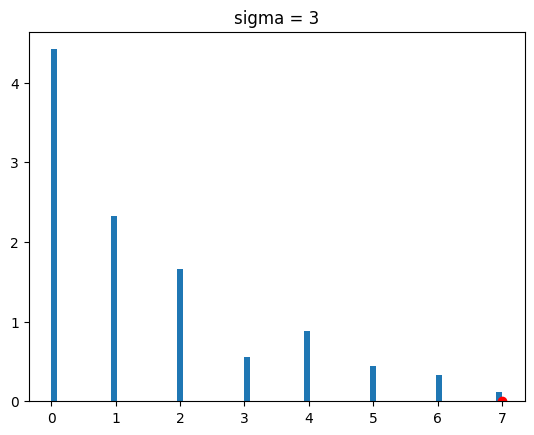

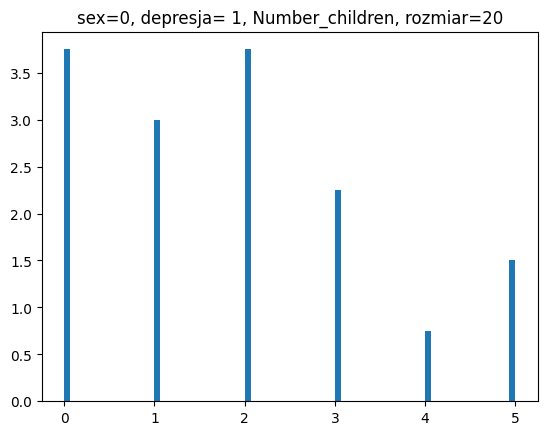

srednia 1.85
odchylenie std 1.5580436450882882
[0.2919563549117119, 3.4080436450882883]
liczba elementow nietypowych 8


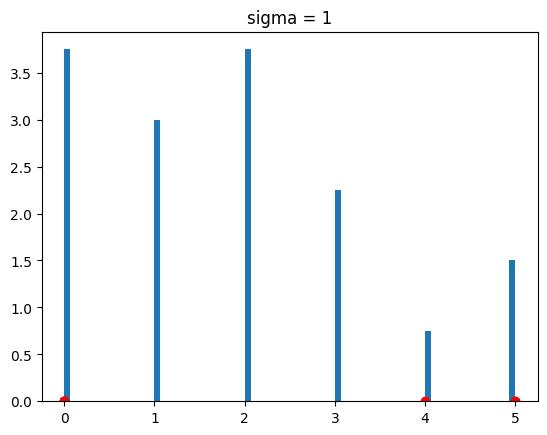

[-1.2660872901765763, 4.966087290176576]
liczba elementow nietypowych 2


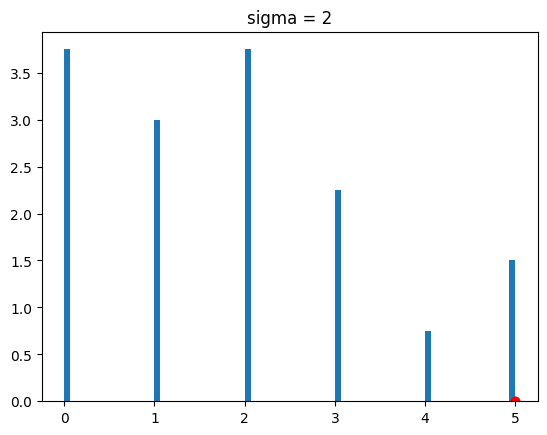

[-2.8241309352648645, 6.524130935264864]
liczba elementow nietypowych 0


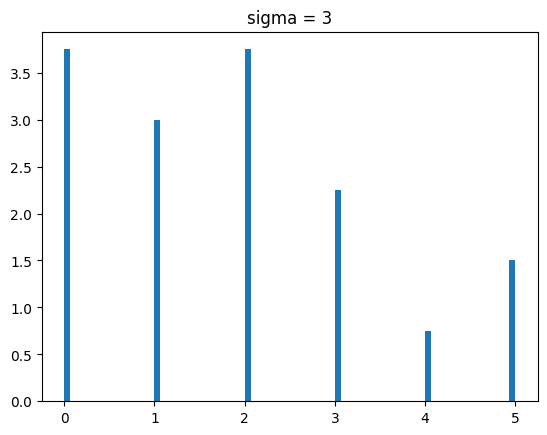

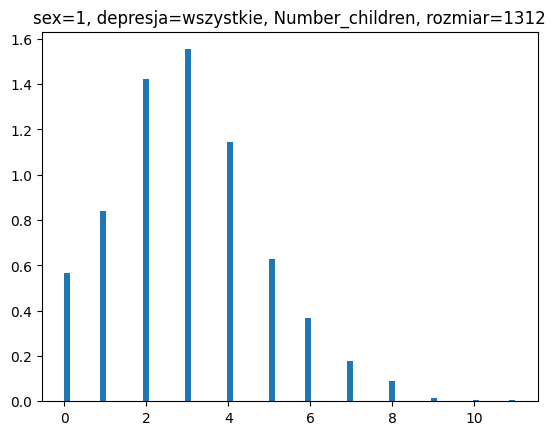

srednia 3.0030487804878048
odchylenie std 1.8387735765757423
[1.1642752039120625, 4.841822357063547]
liczba elementow nietypowych 519


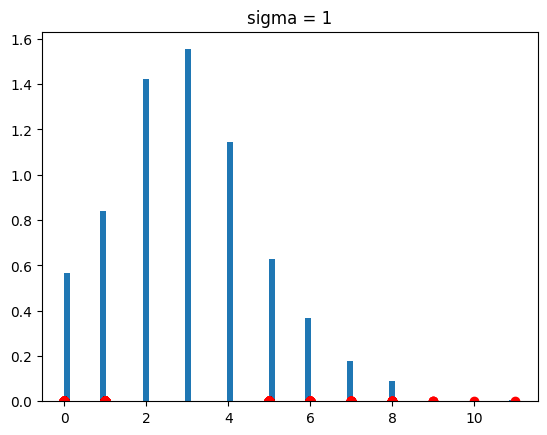

[-0.6744983726636797, 6.680595933639289]
liczba elementow nietypowych 56


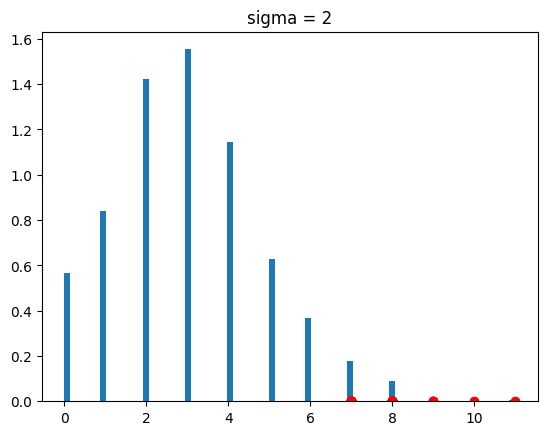

[-2.5132719492394218, 8.519369510215032]
liczba elementow nietypowych 5


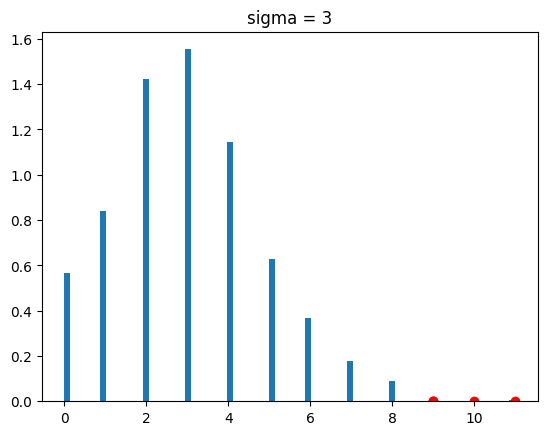

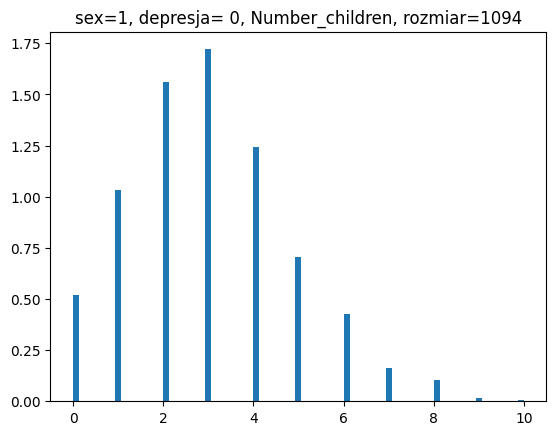

srednia 3.004570383912249
odchylenie std 1.8006136339981633
[1.2039567499140855, 4.805184017910412]
liczba elementow nietypowych 434


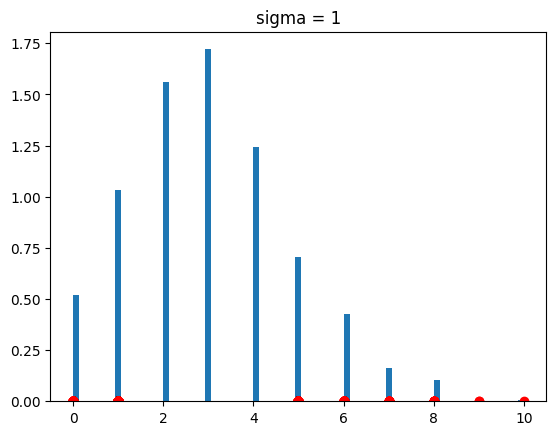

[-0.5966568840840778, 6.605797651908576]
liczba elementow nietypowych 42


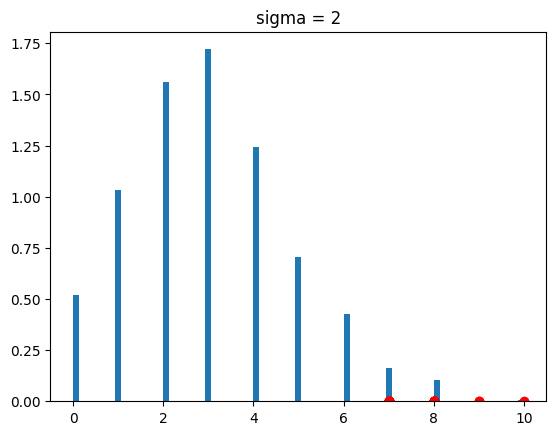

[-2.397270518082241, 8.406411285906739]
liczba elementow nietypowych 3


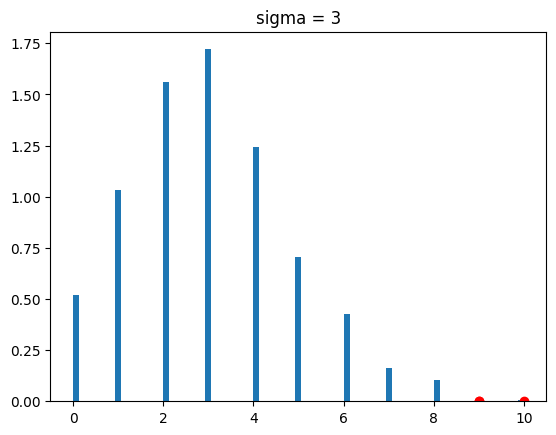

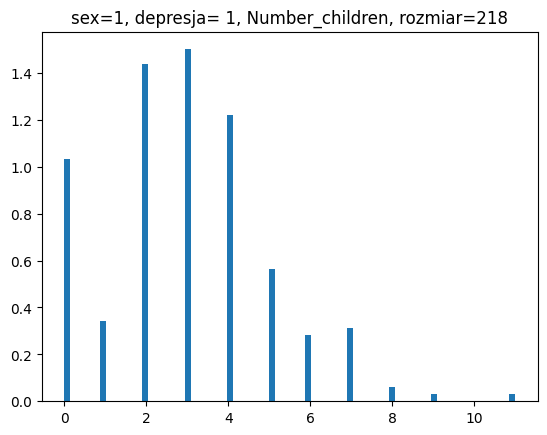

srednia 2.9954128440366974
odchylenie std 2.019396100168641
[0.9760167438680565, 5.014808944205338]
liczba elementow nietypowych 56


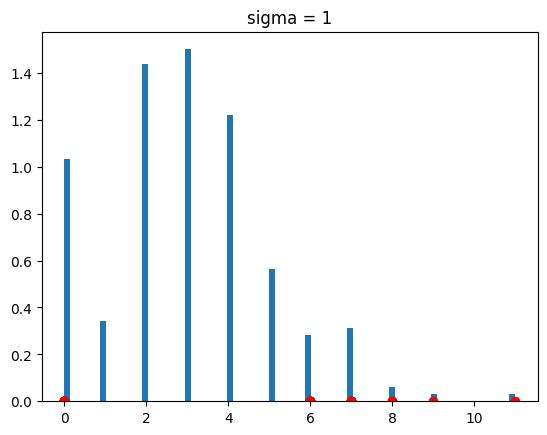

[-1.0433793563005844, 7.034205044373979]
liczba elementow nietypowych 4


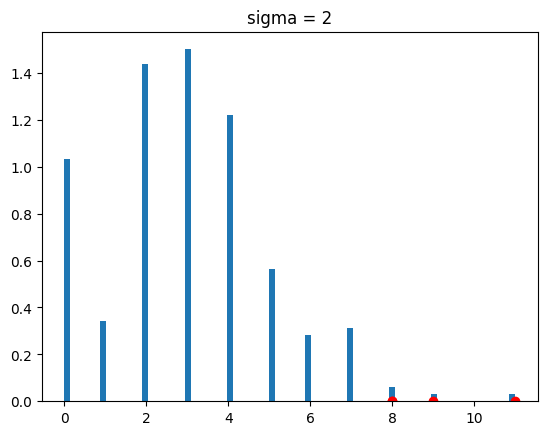

[-3.0627754564692253, 9.05360114454262]
liczba elementow nietypowych 1


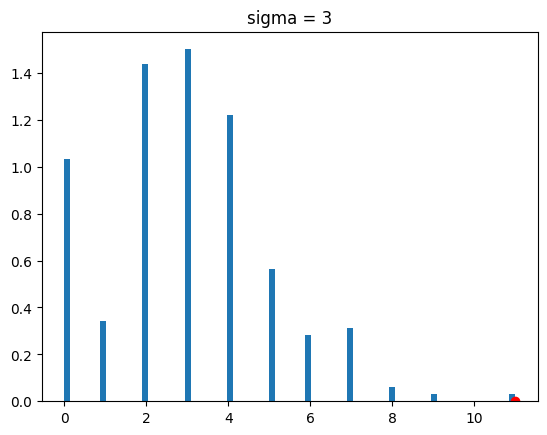

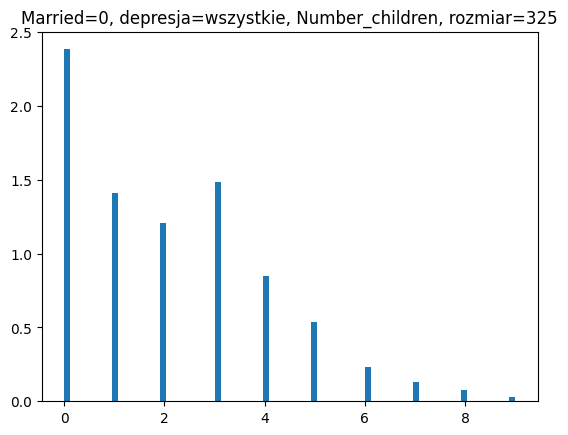

srednia 2.0984615384615384
odchylenie std 1.944498535924627
[0.15396300253691142, 4.042960074386166]
liczba elementow nietypowych 132


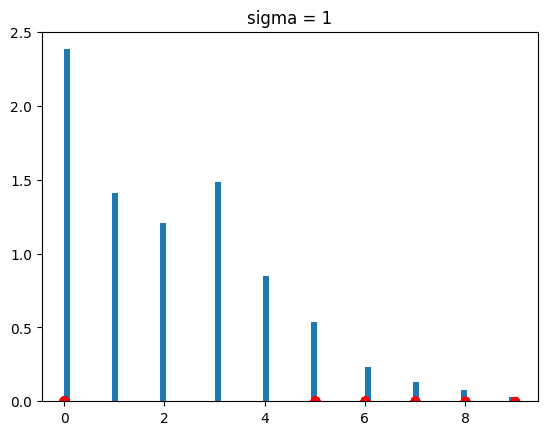

[-1.7905355333877155, 5.987458610310792]
liczba elementow nietypowych 18


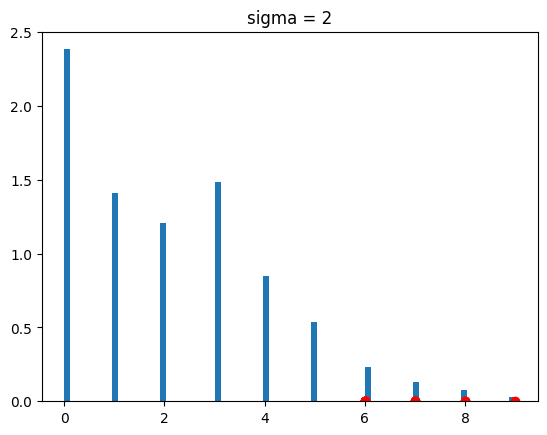

[-3.7350340693123427, 7.931957146235419]
liczba elementow nietypowych 4


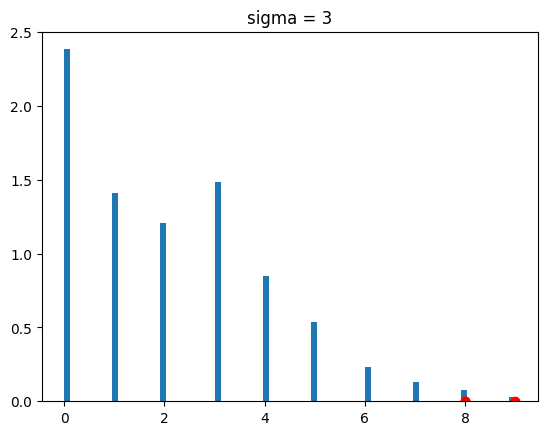

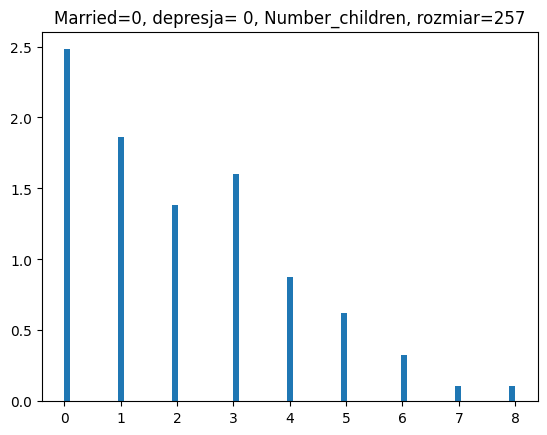

srednia 2.09727626459144
odchylenie std 1.9130598602072653
[0.18421640438417453, 4.010336124798705]
liczba elementow nietypowych 100


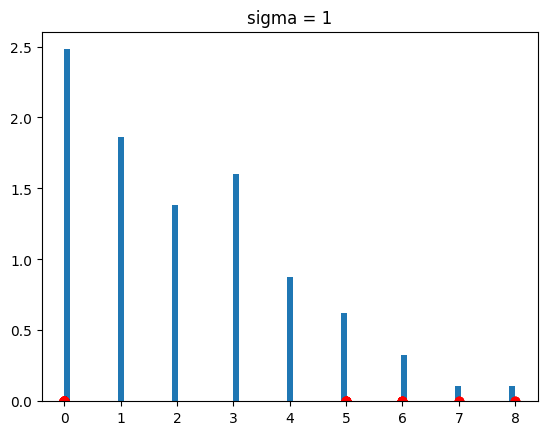

[-1.7288434558230907, 5.92339598500597]
liczba elementow nietypowych 15


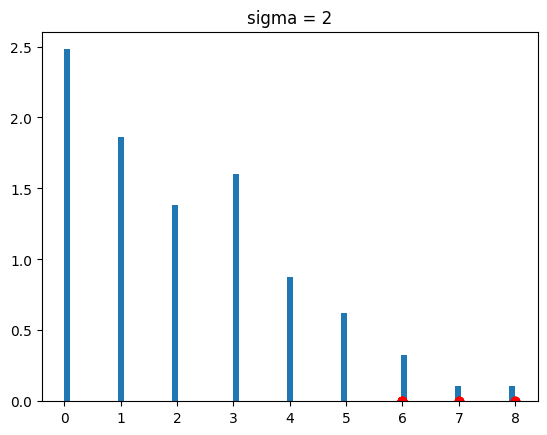

[-3.641903316030356, 7.836455845213235]
liczba elementow nietypowych 3


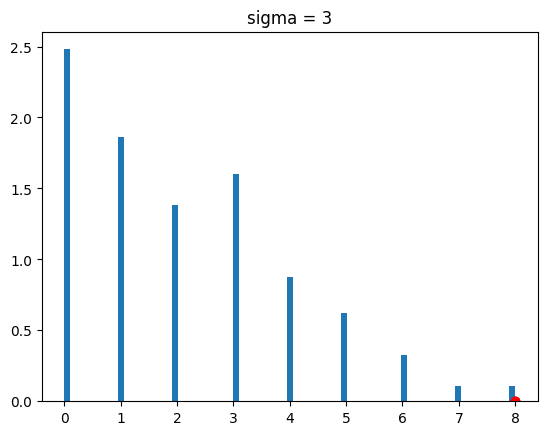

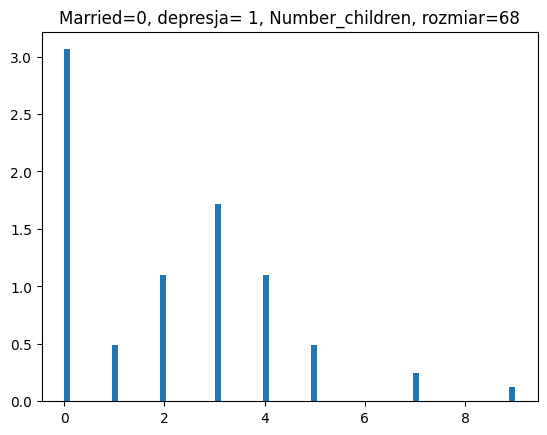

srednia 2.1029411764705883
odchylenie std 2.0589810864082385
[0.0439600900623498, 4.161922262878827]
liczba elementow nietypowych 32


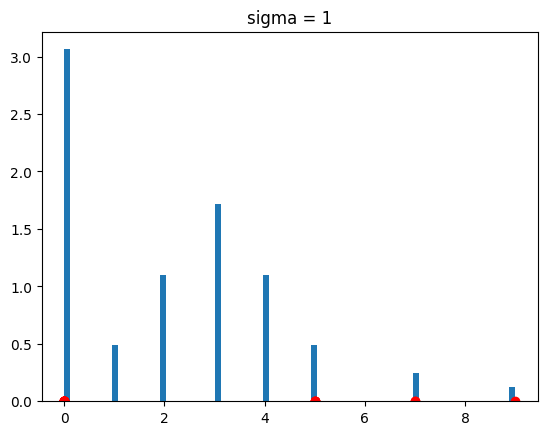

[-2.0150209963458887, 6.220903349287065]
liczba elementow nietypowych 3


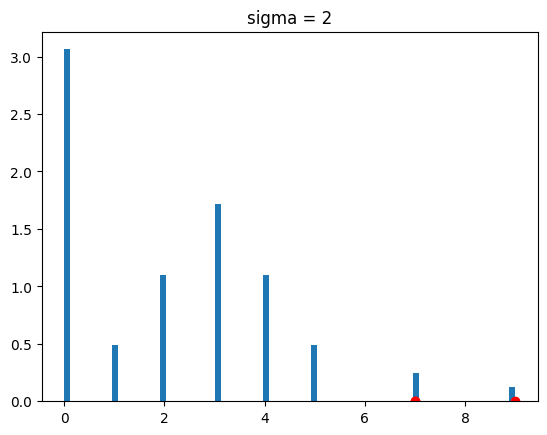

[-4.074002082754127, 8.279884435695305]
liczba elementow nietypowych 1


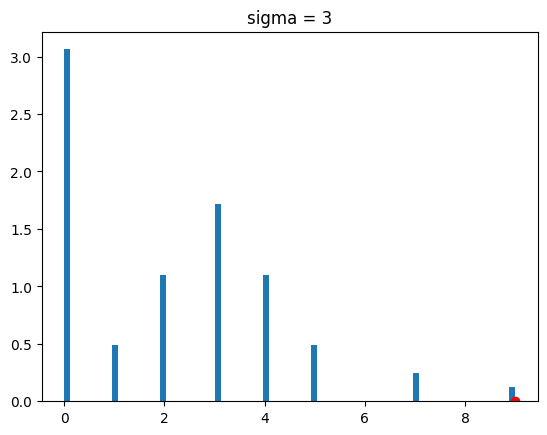

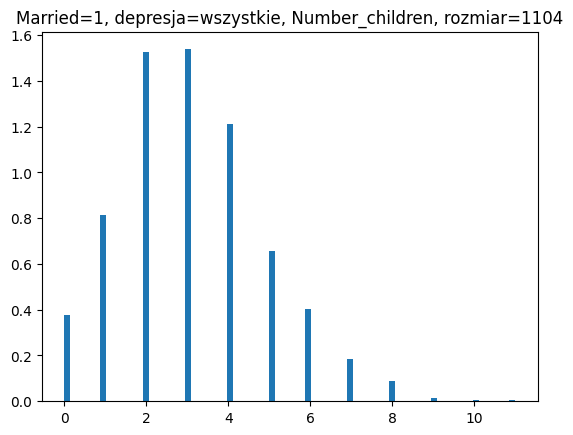

srednia 3.114130434782609
odchylenie std 1.7880489846177494
[1.3260814501648595, 4.902179419400358]
liczba elementow nietypowych 412


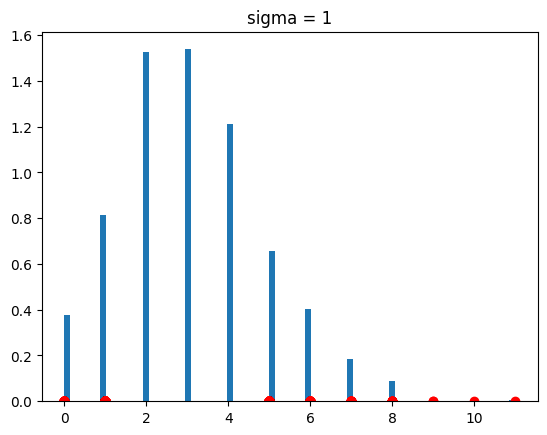

[-0.46196753445288996, 6.690228404018107]
liczba elementow nietypowych 48


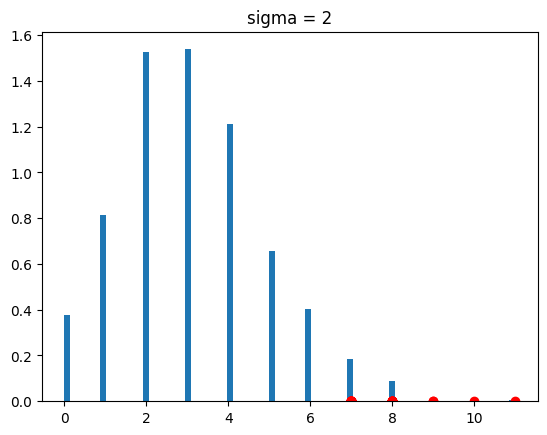

[-2.25001651907064, 8.478277388635858]
liczba elementow nietypowych 4


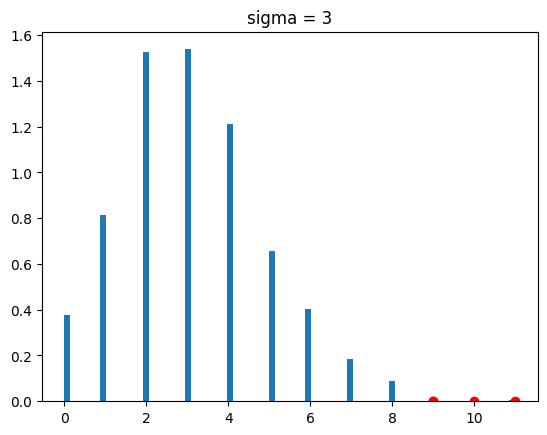

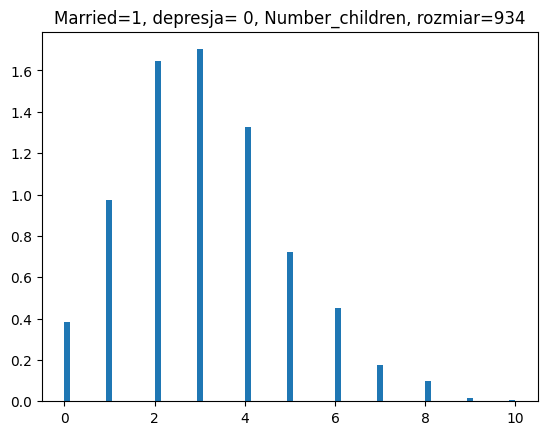

srednia 3.095289079229122
odchylenie std 1.766485299281828
[1.328803779947294, 4.86177437851095]
liczba elementow nietypowych 352


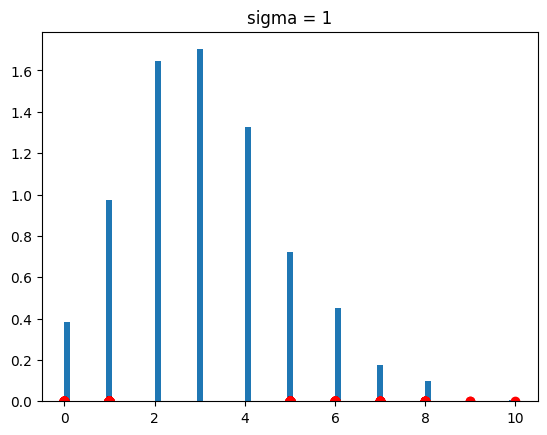

[-0.43768151933453403, 6.628259677792778]
liczba elementow nietypowych 37


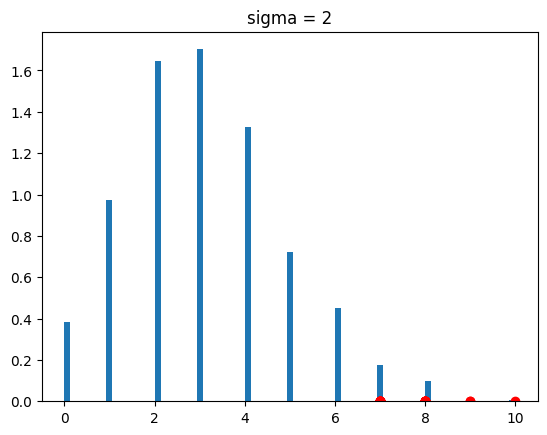

[-2.204166818616362, 8.394744977074605]
liczba elementow nietypowych 3


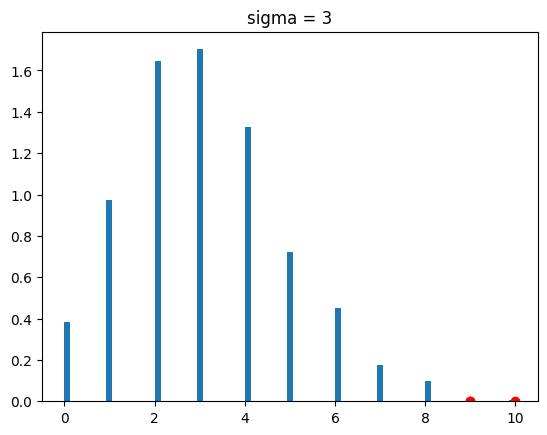

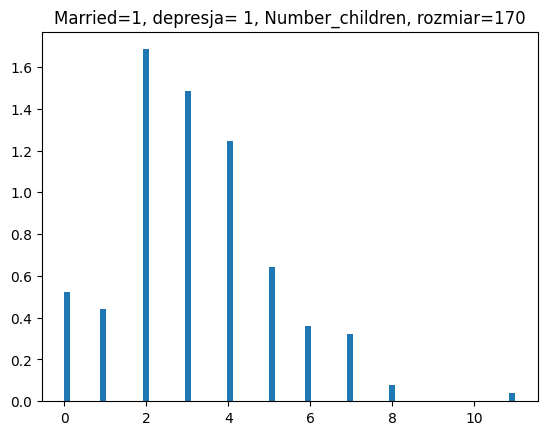

srednia 3.2176470588235295
odchylenie std 1.898834098665825
[1.3188129601577046, 5.116481157489354]
liczba elementow nietypowych 44


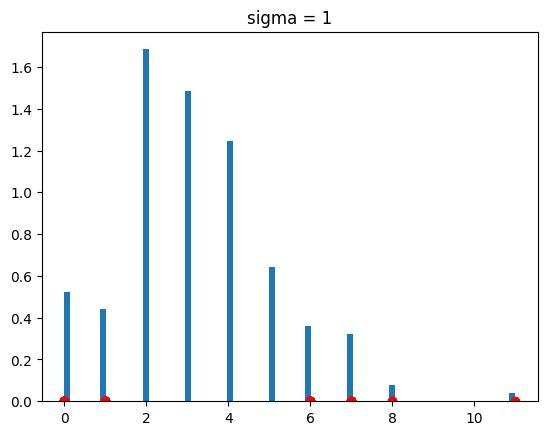

[-0.5800211385081204, 7.01531525615518]
liczba elementow nietypowych 3


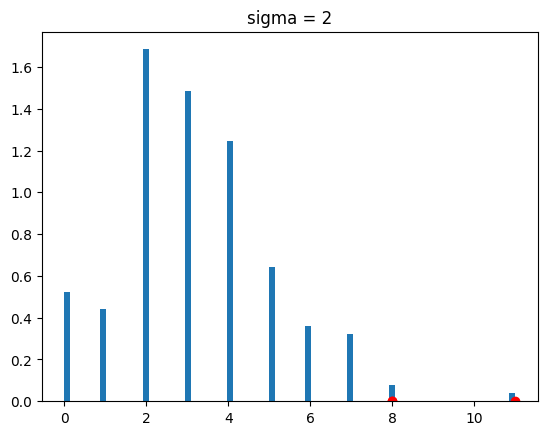

[-2.4788552371739456, 8.914149354821005]
liczba elementow nietypowych 1


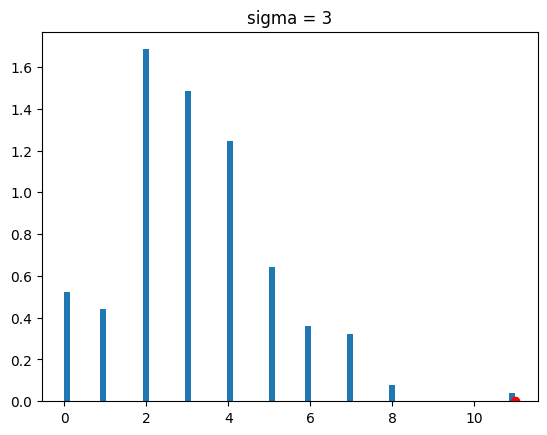

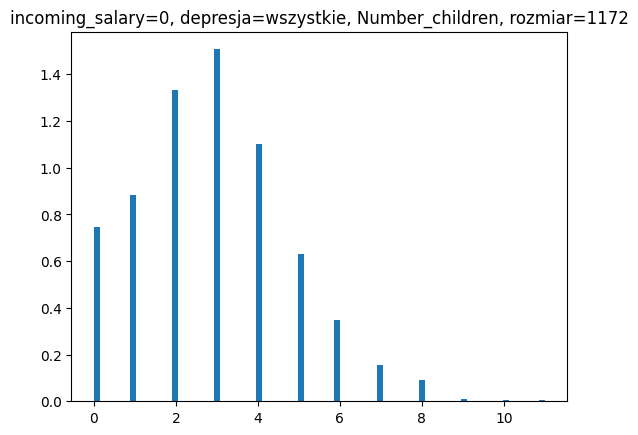

srednia 2.900170648464164
odchylenie std 1.882948446300423
[1.017222202163741, 4.7831190947645865]
liczba elementow nietypowych 495


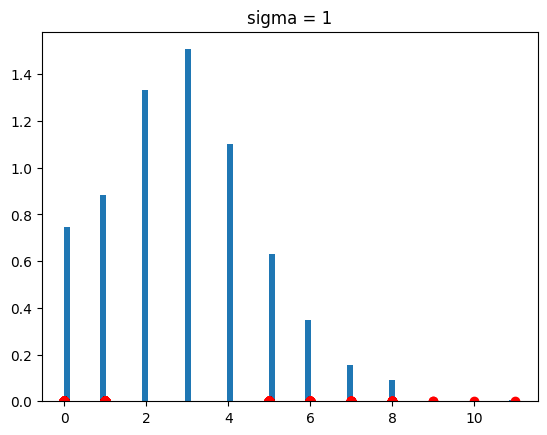

[-0.865726244136682, 6.66606754106501]
liczba elementow nietypowych 47


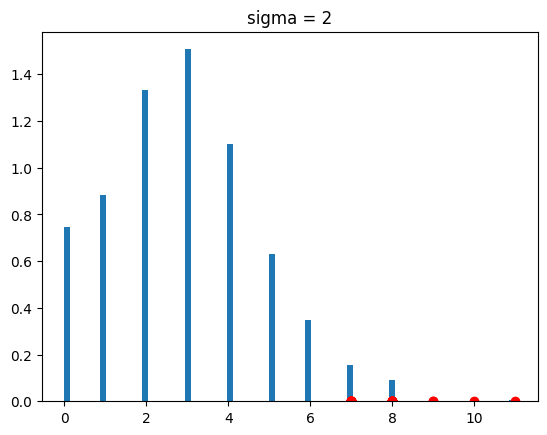

[-2.7486746904371047, 8.549015987365433]
liczba elementow nietypowych 4


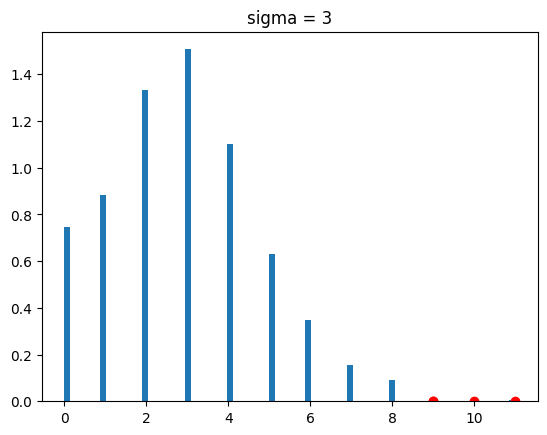

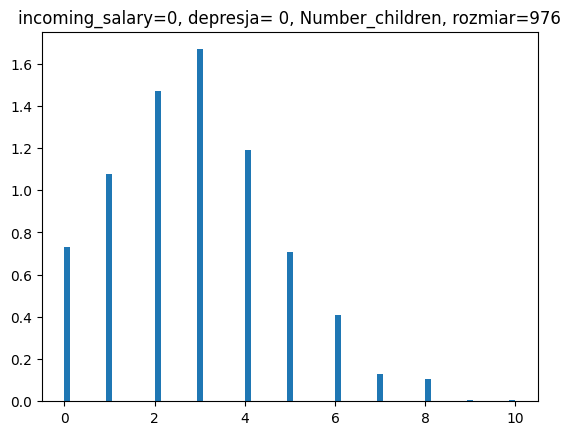

srednia 2.8903688524590163
odchylenie std 1.839143339874193
[1.0512255125848233, 4.7295121923332095]
liczba elementow nietypowych 413


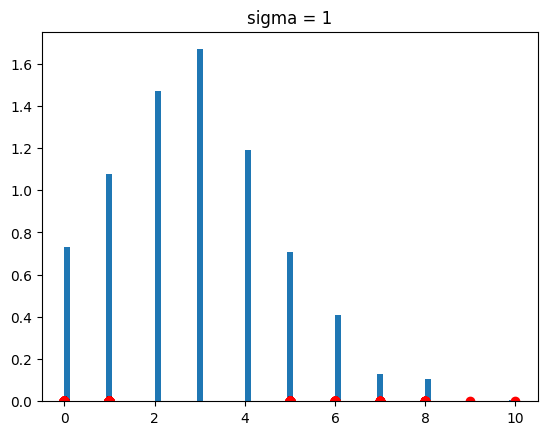

[-0.7879178272893697, 6.568655532207402]
liczba elementow nietypowych 33


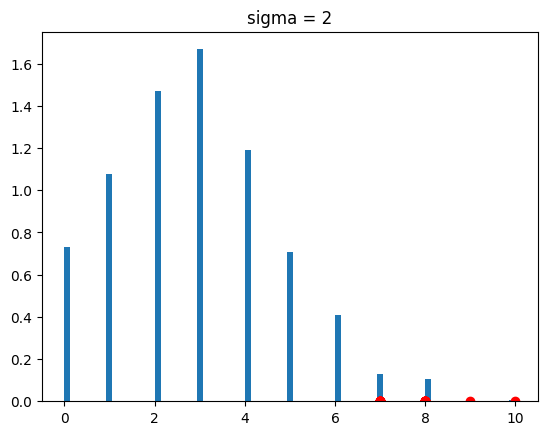

[-2.627061167163563, 8.407798872081596]
liczba elementow nietypowych 2


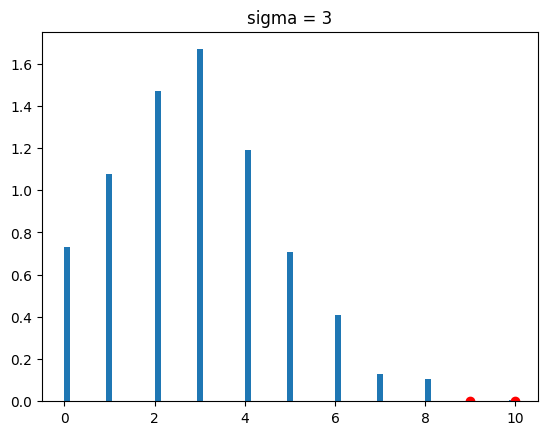

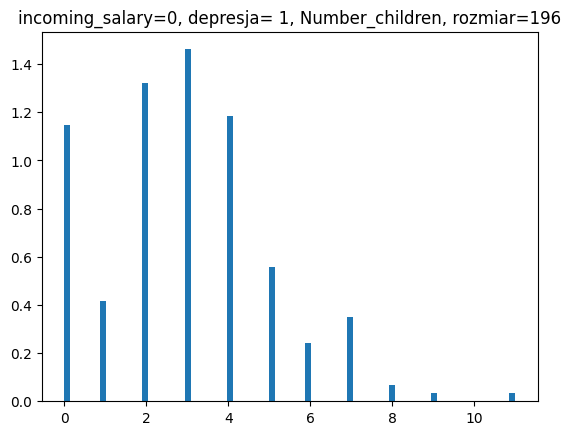

srednia 2.9489795918367347
odchylenie std 2.086753405434794
[0.8622261864019407, 5.035732997271529]
liczba elementow nietypowych 54


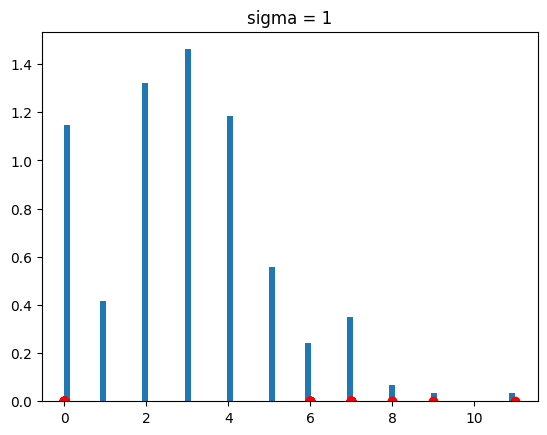

[-1.2245272190328533, 7.122486402706323]
liczba elementow nietypowych 4


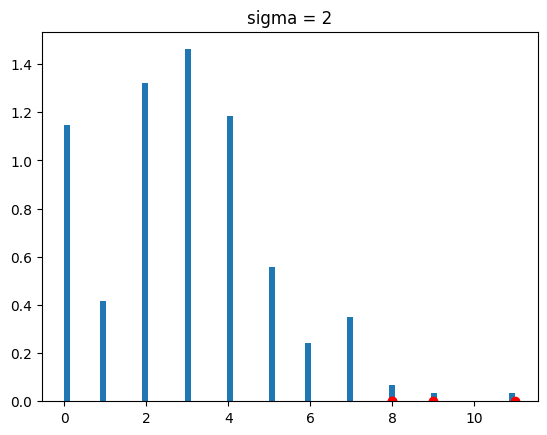

[-3.3112806244676474, 9.209239808141117]
liczba elementow nietypowych 1


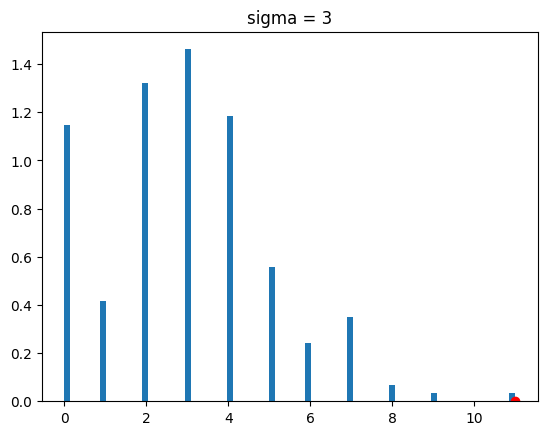

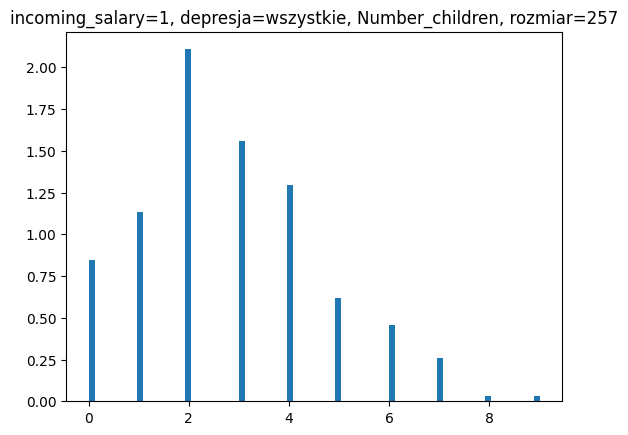

srednia 2.8054474708171204
odchylenie std 1.8295800942212521
[0.9758673765958683, 4.6350275650383725]
liczba elementow nietypowych 69


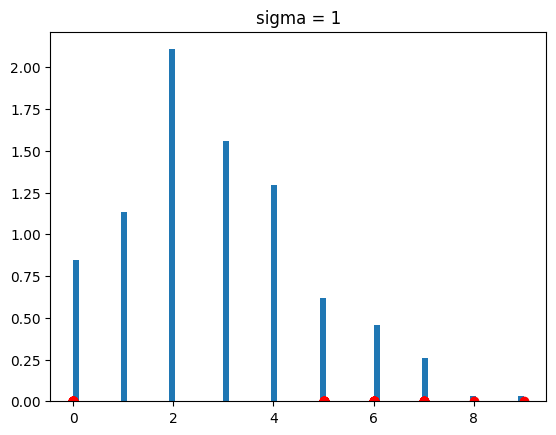

[-0.8537127176253838, 6.464607659259625]
liczba elementow nietypowych 10


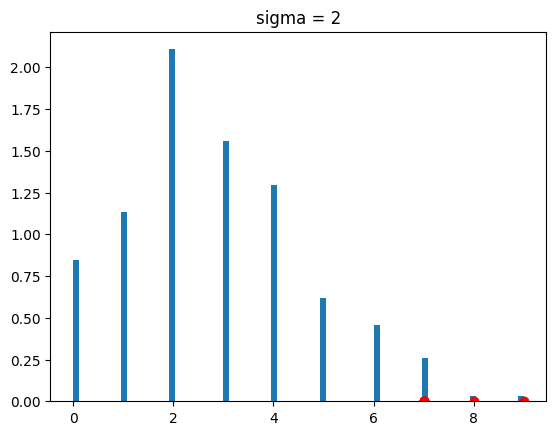

[-2.683292811846636, 8.294187753480877]
liczba elementow nietypowych 1


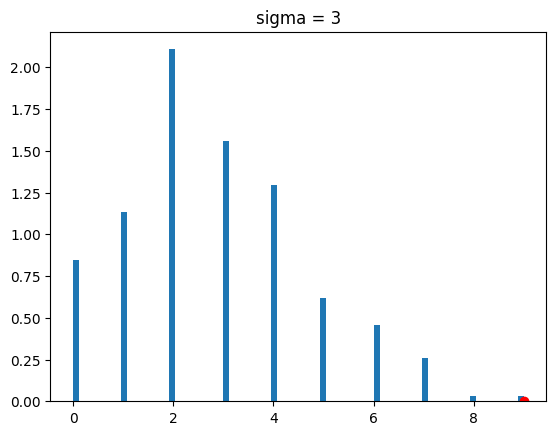

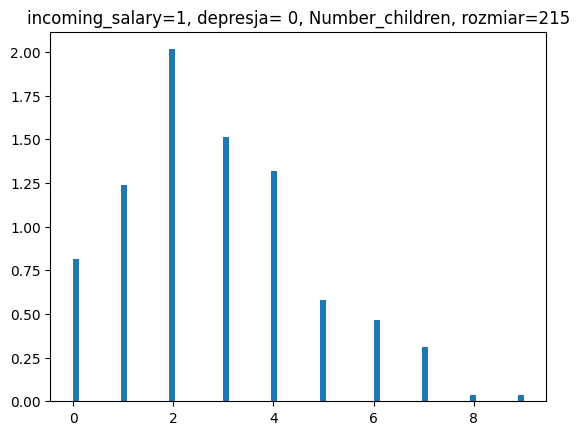

srednia 2.832558139534884
odchylenie std 1.8726577221409717
[0.9599004173939121, 4.705215861675855]
liczba elementow nietypowych 58


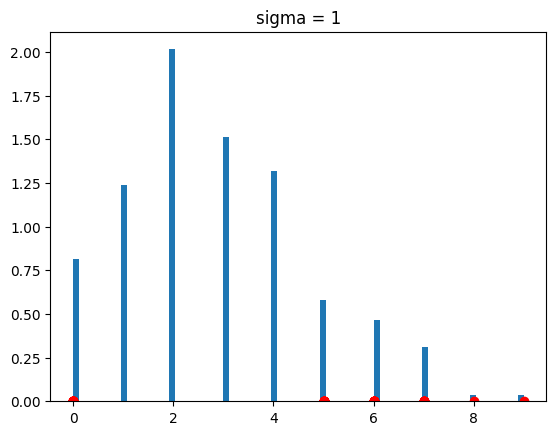

[-0.9127573047470596, 6.577873583816827]
liczba elementow nietypowych 10


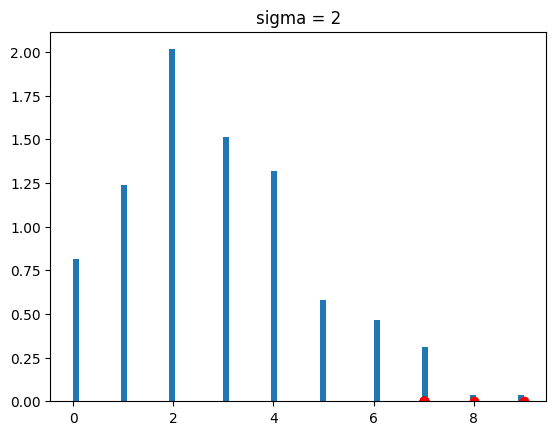

[-2.7854150268880318, 8.4505313059578]
liczba elementow nietypowych 1


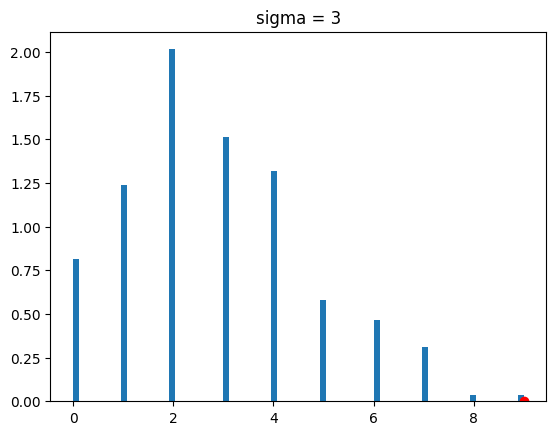

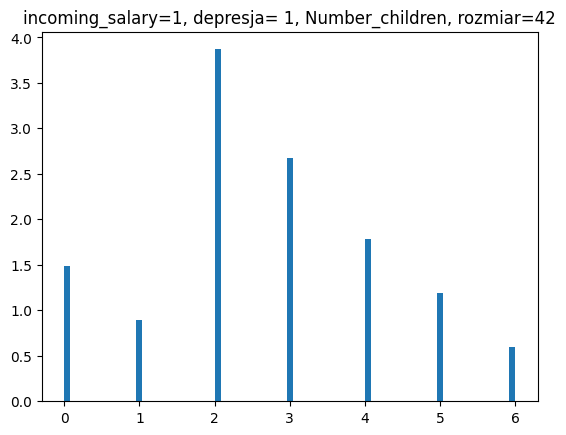

srednia 2.6666666666666665
odchylenie std 1.5836465855538944
[1.0830200811127721, 4.250313252220561]
liczba elementow nietypowych 14


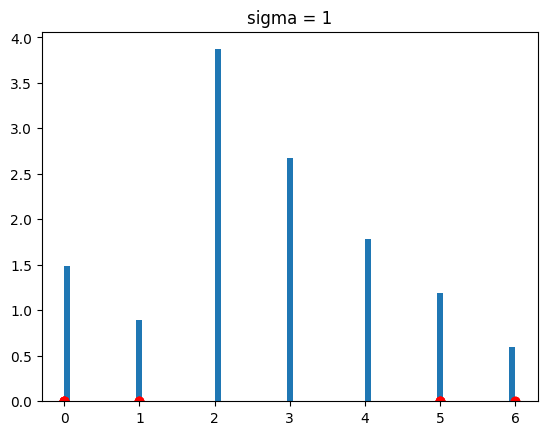

[-0.5006265044411222, 5.833959837774455]
liczba elementow nietypowych 2


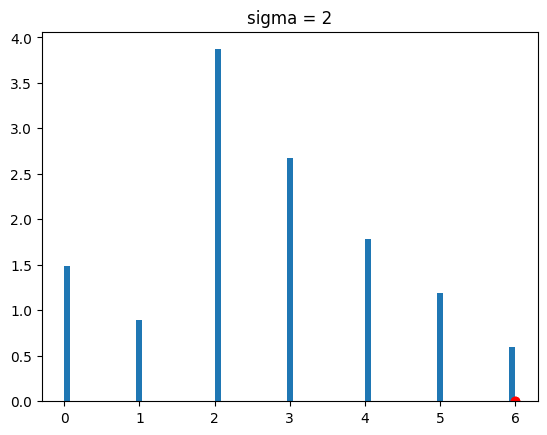

[-2.084273089995017, 7.417606423328349]
liczba elementow nietypowych 0


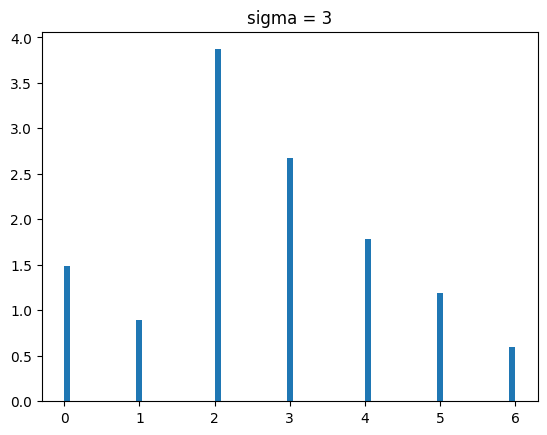

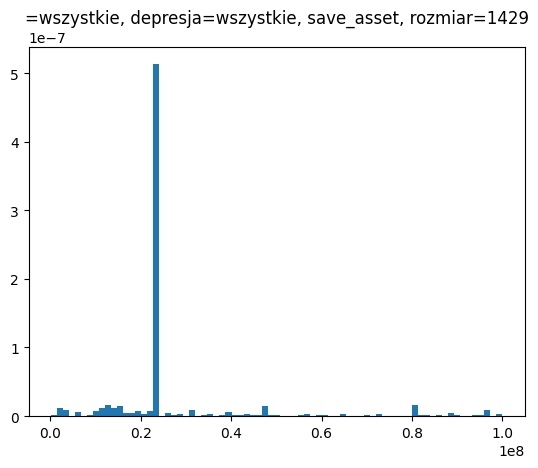

srednia 27424707.838348497
odchylenie std 17745162.08621519
[9679545.752133306, 45169869.92456369]
liczba elementow nietypowych 212


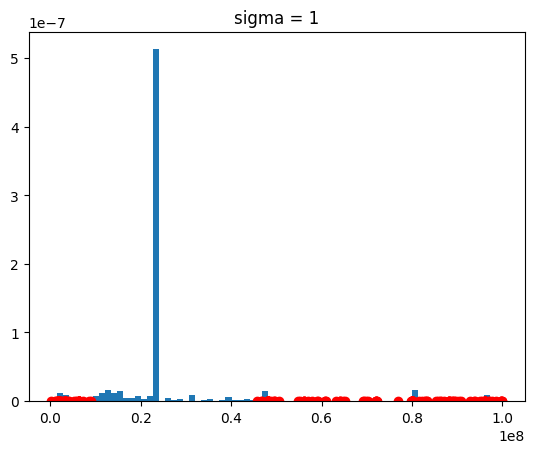

[-8065616.3340818845, 62915032.010778874]
liczba elementow nietypowych 100


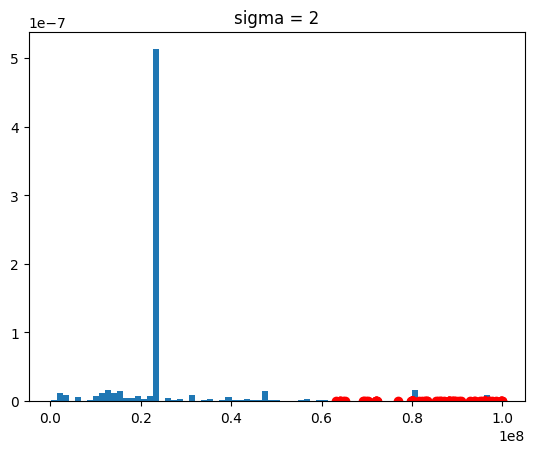

[-25810778.420297075, 80660194.09699407]
liczba elementow nietypowych 52


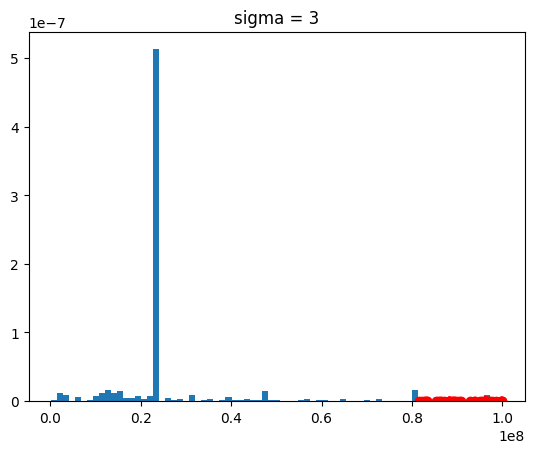

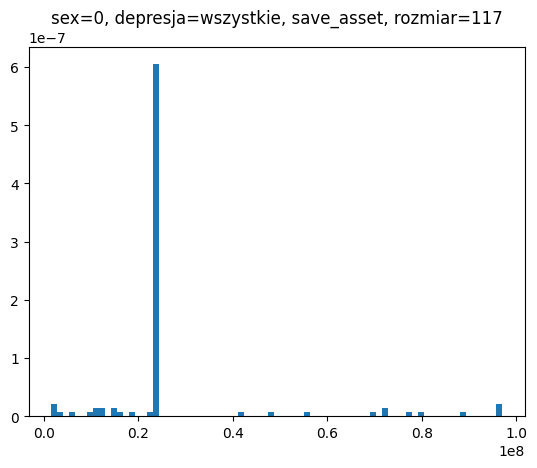

srednia 27030337.572649572
odchylenie std 17708210.190767657
[9322127.381881915, 44738547.76341723]
liczba elementow nietypowych 16


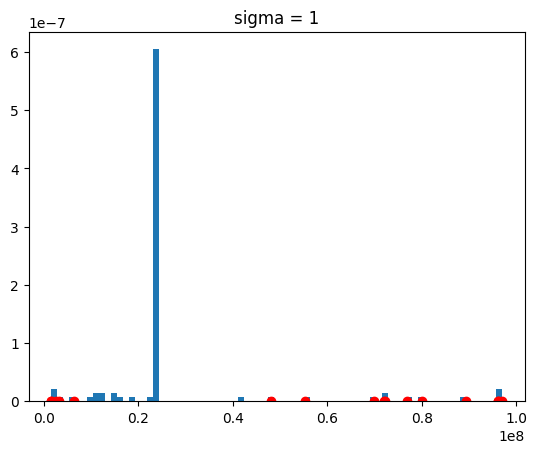

[-8386082.808885742, 62446757.95418489]
liczba elementow nietypowych 9


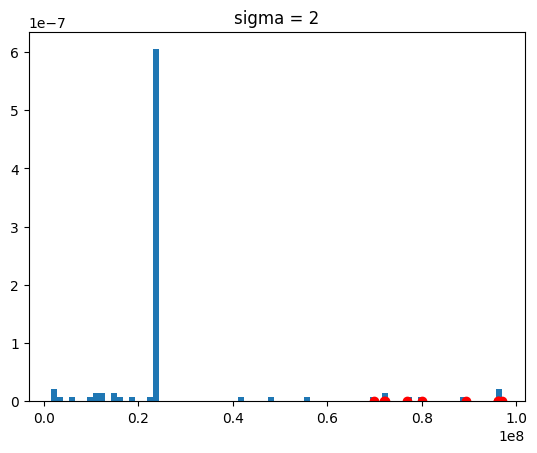

[-26094292.999653395, 80154968.14495254]
liczba elementow nietypowych 4


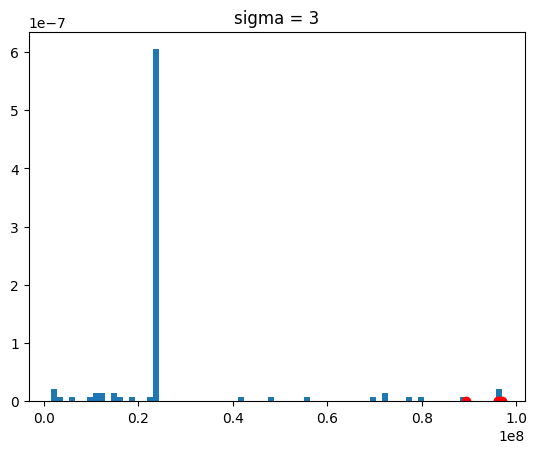

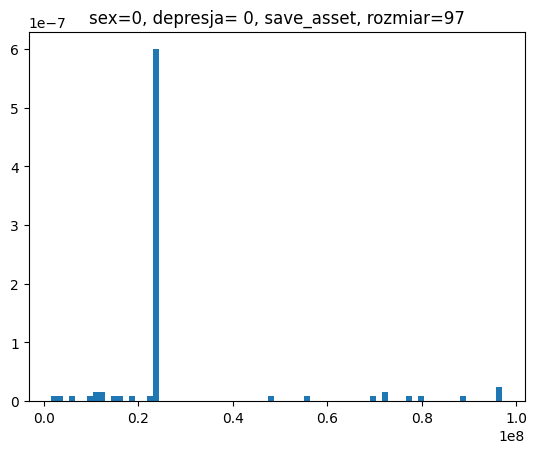

srednia 28125636.721649483
odchylenie std 18932914.66949982
[9192722.052149665, 47058551.3911493]
liczba elementow nietypowych 14


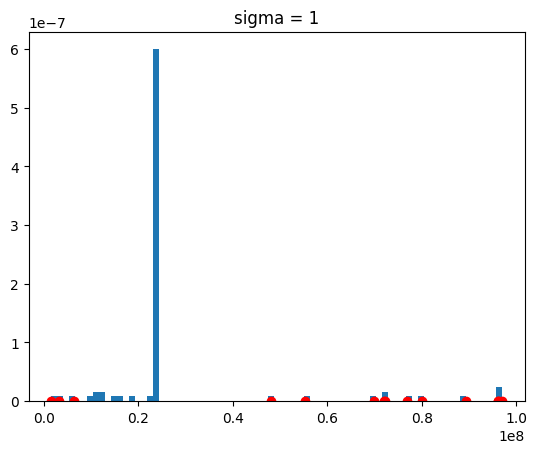

[-9740192.617350154, 65991466.06064912]
liczba elementow nietypowych 9


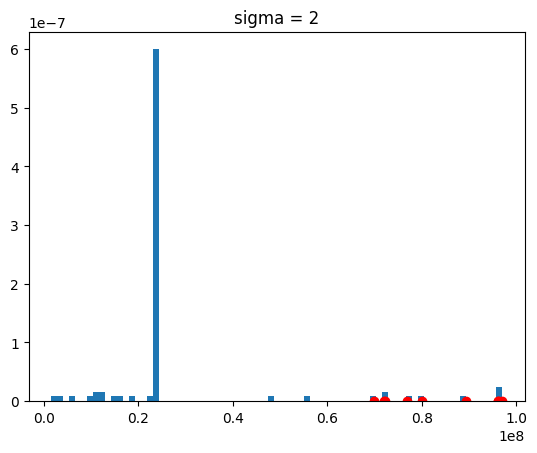

[-28673107.286849976, 84924380.73014894]
liczba elementow nietypowych 4


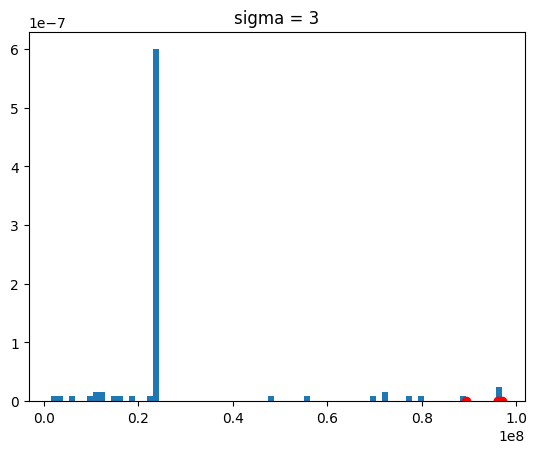

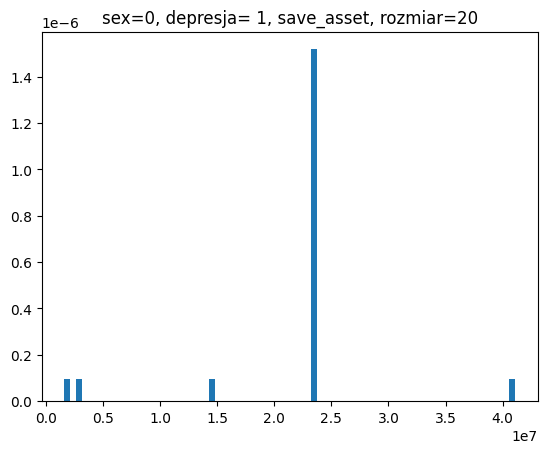

srednia 21718136.7
odchylenie std 7867732.50698403
[13850404.19301597, 29585869.20698403]
liczba elementow nietypowych 3


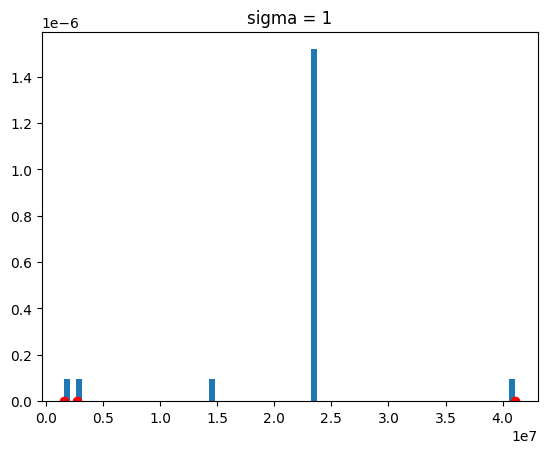

[5982671.686031939, 37453601.71396806]
liczba elementow nietypowych 3


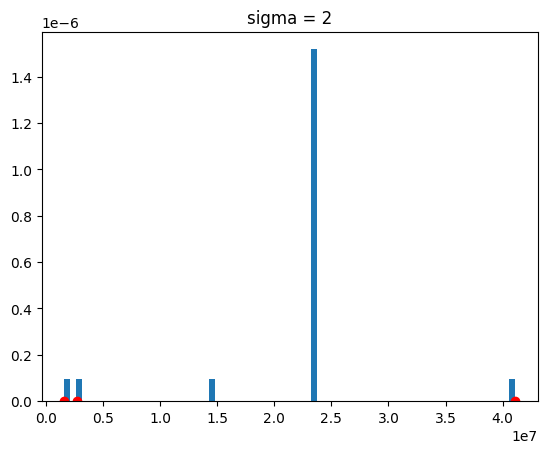

[-1885060.8209520914, 45321334.22095209]
liczba elementow nietypowych 0


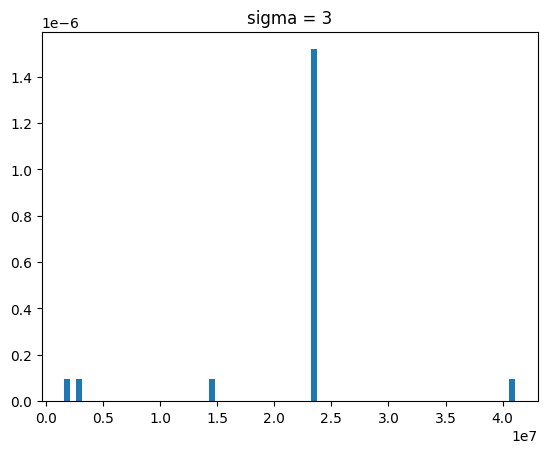

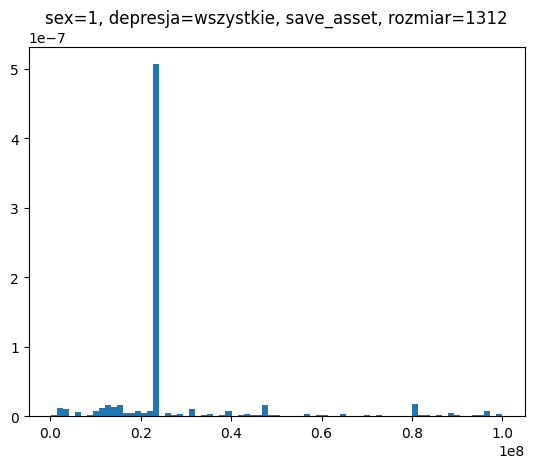

srednia 27459876.52820122
odchylenie std 17748028.030475393
[9711848.497725826, 45207904.558676615]
liczba elementow nietypowych 196


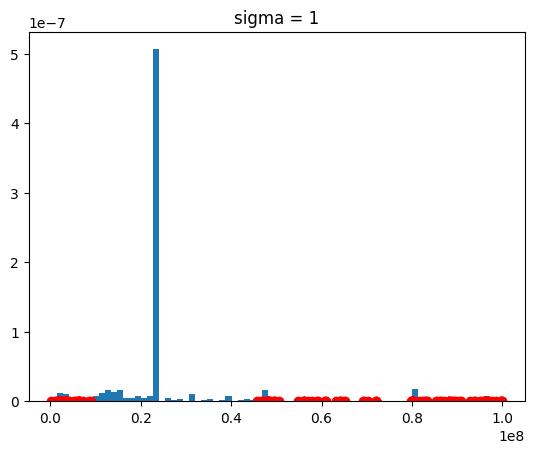

[-8036179.532749567, 62955932.58915201]
liczba elementow nietypowych 91


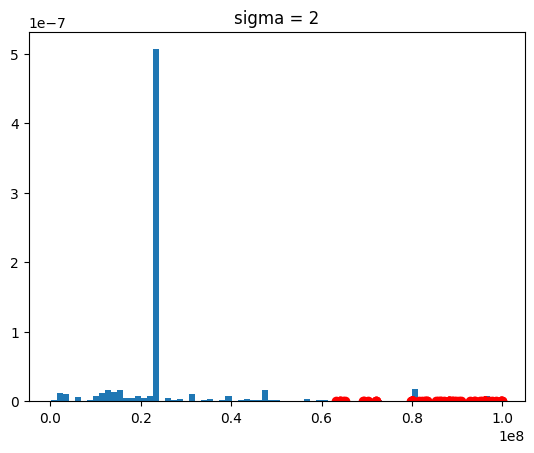

[-25784207.56322496, 80703960.6196274]
liczba elementow nietypowych 48


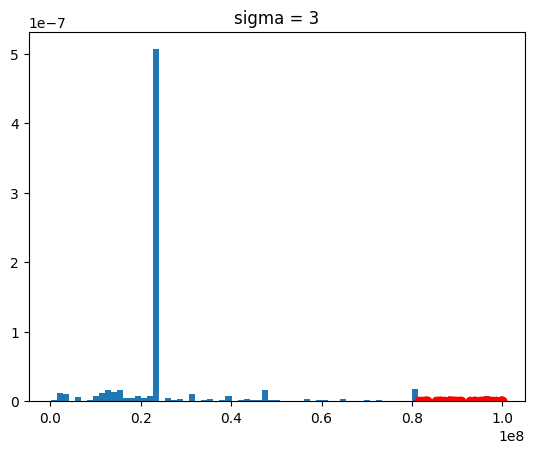

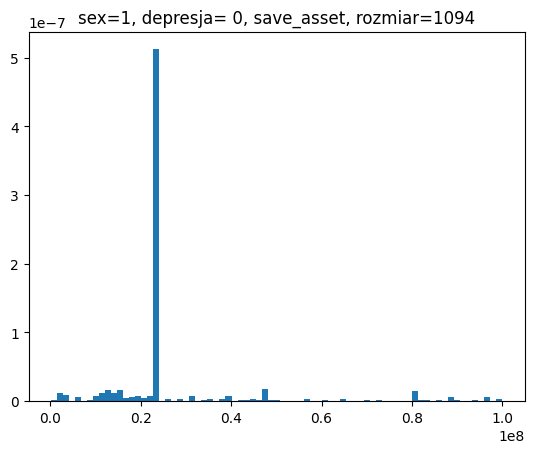

srednia 27284326.066727605
odchylenie std 17327317.791923966
[9957008.274803638, 44611643.85865157]
liczba elementow nietypowych 165


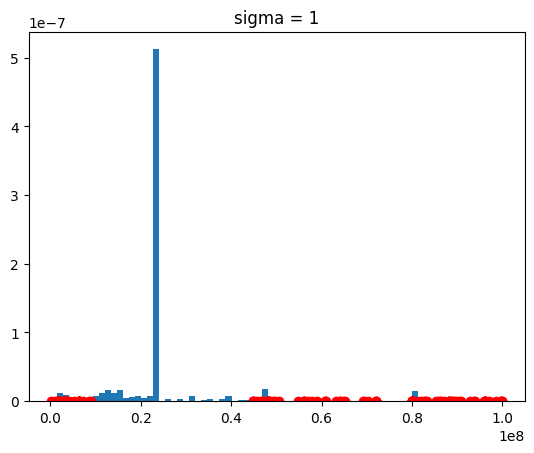

[-7370309.517120328, 61938961.65057553]
liczba elementow nietypowych 72


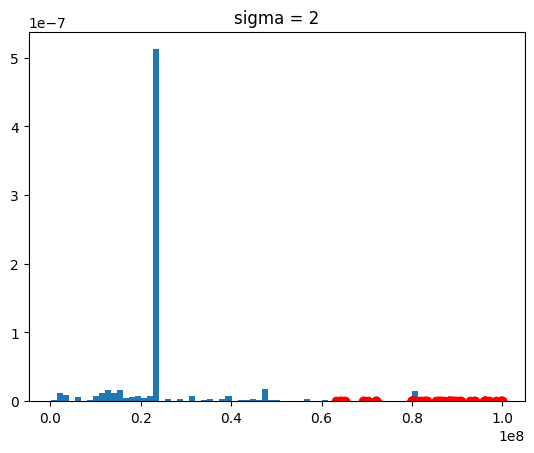

[-24697627.30904429, 79266279.4424995]
liczba elementow nietypowych 61


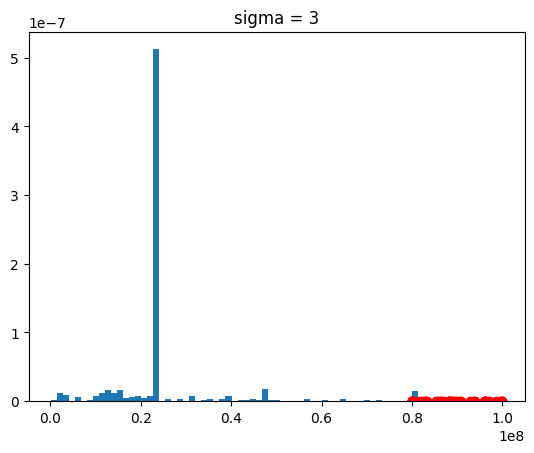

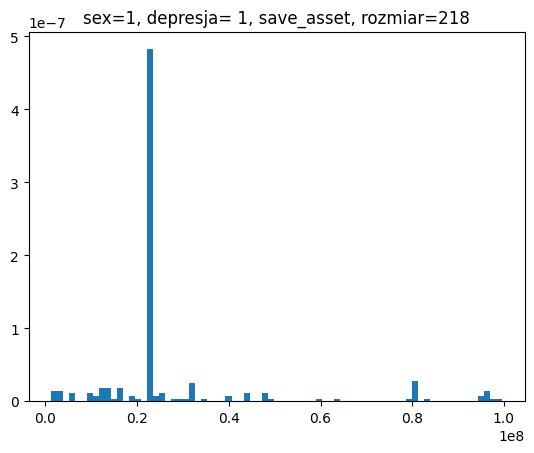

srednia 28340849.944954127
odchylenie std 19700641.552408434
[8640208.392545693, 48041491.49736256]
liczba elementow nietypowych 35


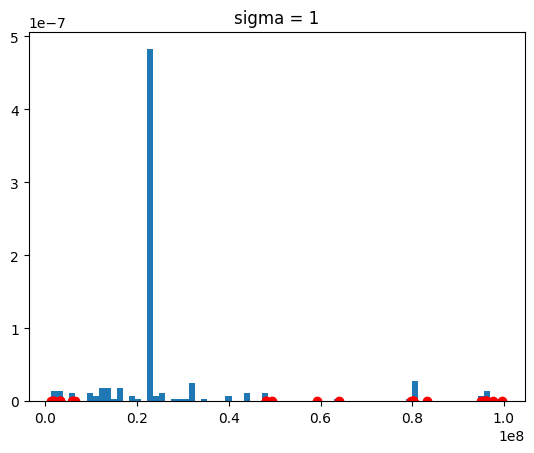

[-11060433.159862742, 67742133.049771]
liczba elementow nietypowych 18


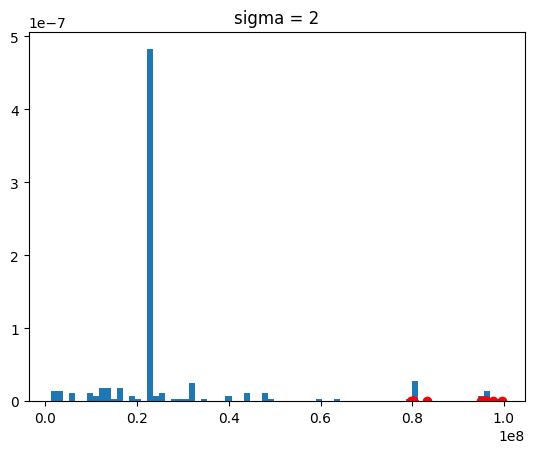

[-30761074.712271176, 87442774.60217944]
liczba elementow nietypowych 8


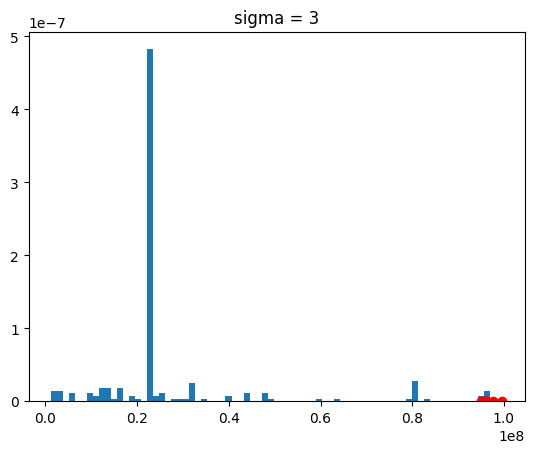

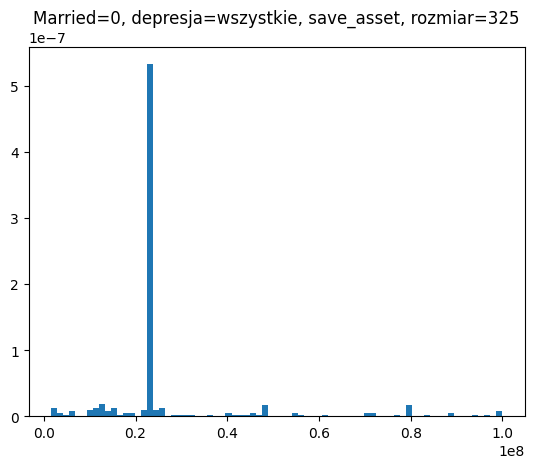

srednia 27124994.63076923
odchylenie std 16592518.144419711
[10532476.48634952, 43717512.77518894]
liczba elementow nietypowych 50


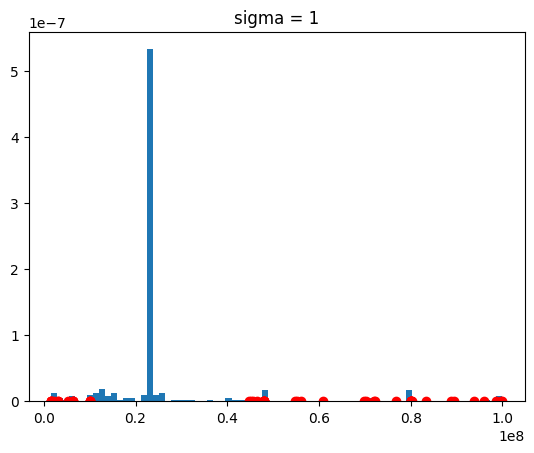

[-6060041.658070192, 60310030.91960865]
liczba elementow nietypowych 21


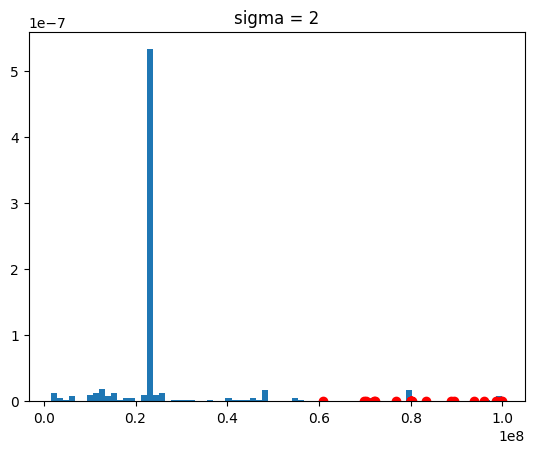

[-22652559.8024899, 76902549.06402835]
liczba elementow nietypowych 15


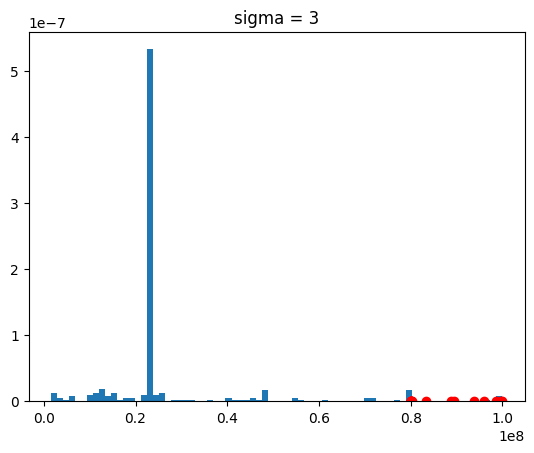

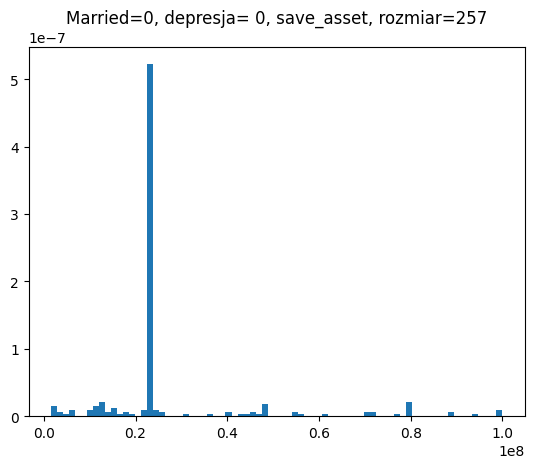

srednia 27500487.307392996
odchylenie std 17564845.602383118
[9935641.705009878, 45065332.909776114]
liczba elementow nietypowych 42


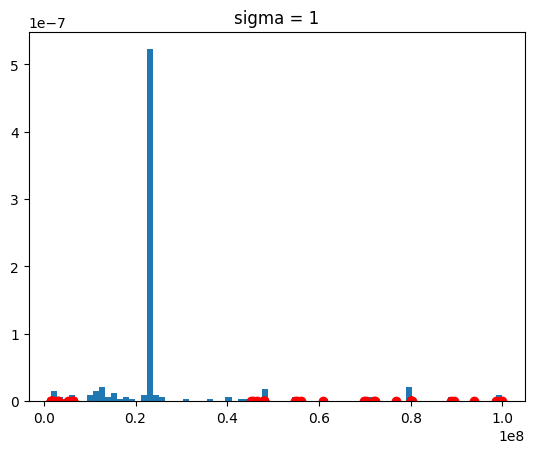

[-7629203.89737324, 62630178.51215923]
liczba elementow nietypowych 18


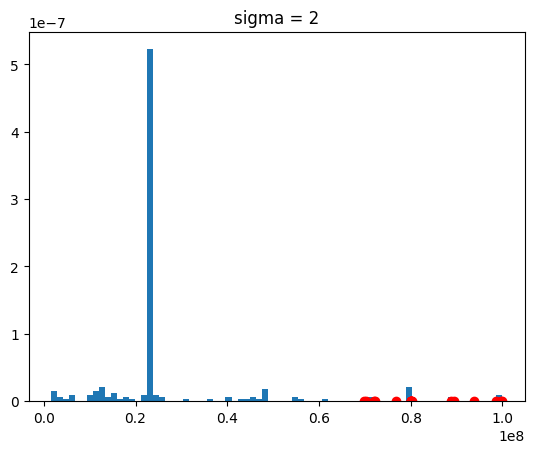

[-25194049.499756355, 80195024.11454235]
liczba elementow nietypowych 7


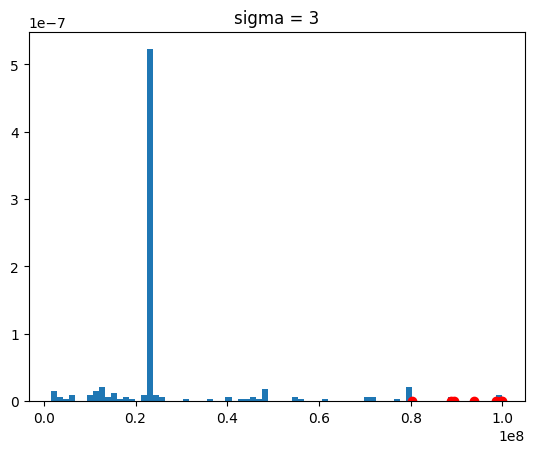

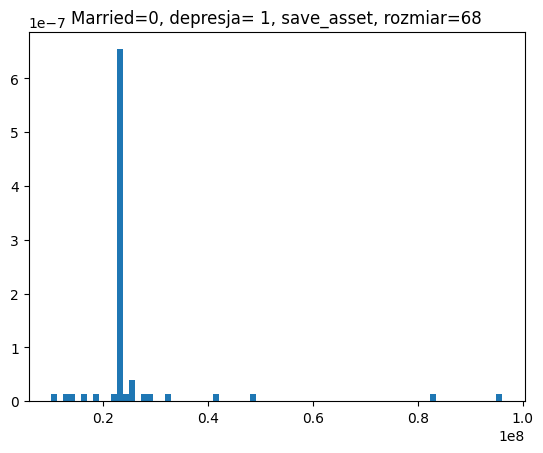

srednia 25705853.19117647
odchylenie std 12134350.25122149
[13571502.939954981, 37840203.44239796]
liczba elementow nietypowych 6


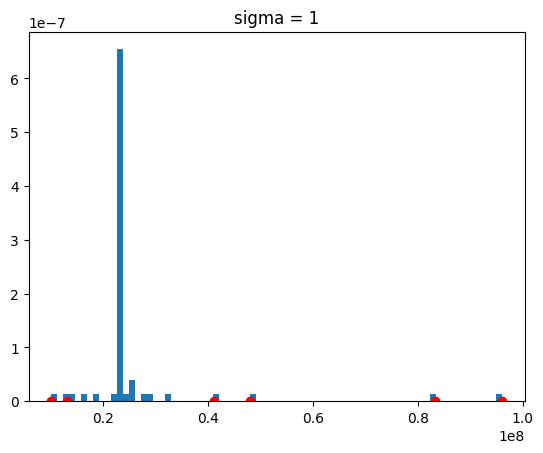

[1437152.688733492, 49974553.693619445]
liczba elementow nietypowych 2


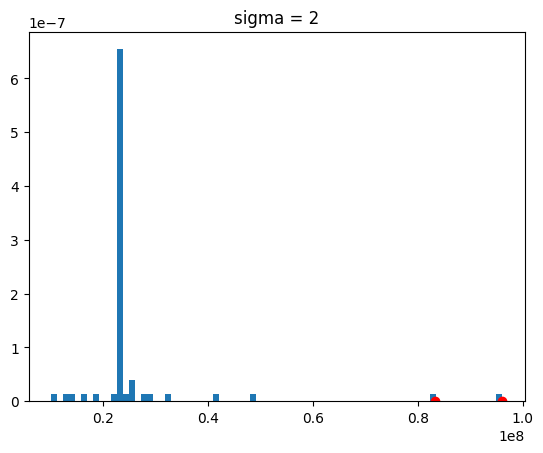

[-10697197.562487993, 62108903.94484094]
liczba elementow nietypowych 2


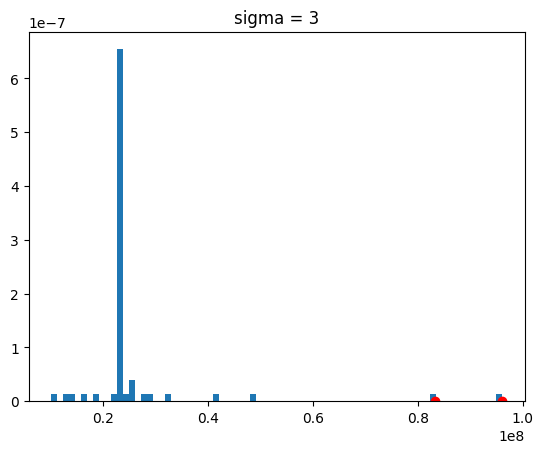

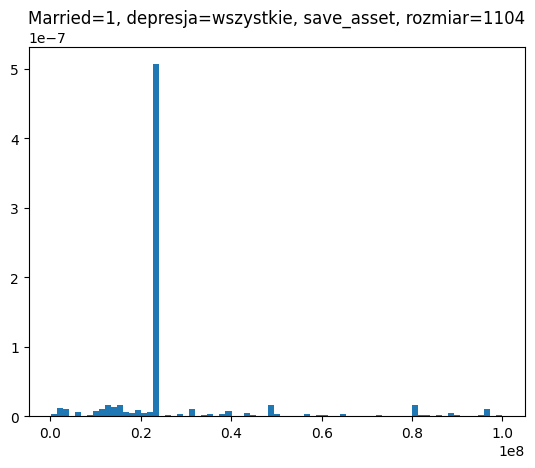

srednia 27512938.628623188
odchylenie std 18069532.659980334
[9443405.968642853, 45582471.28860352]
liczba elementow nietypowych 168


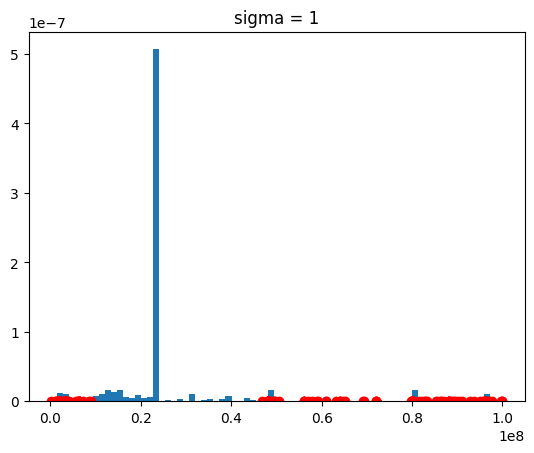

[-8626126.691337481, 63652003.948583856]
liczba elementow nietypowych 79


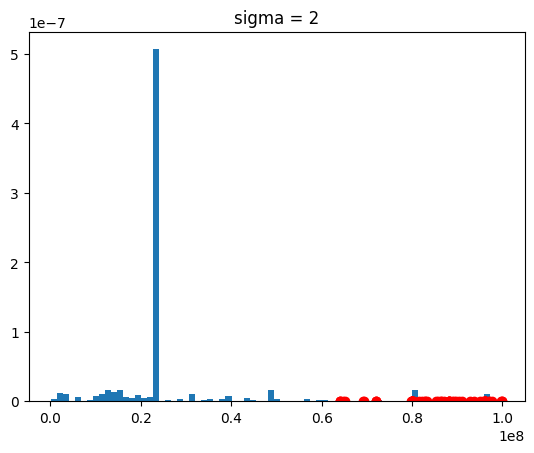

[-26695659.351317815, 81721536.6085642]
liczba elementow nietypowych 43


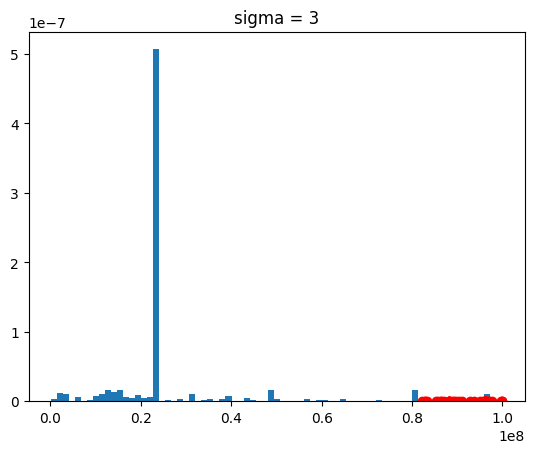

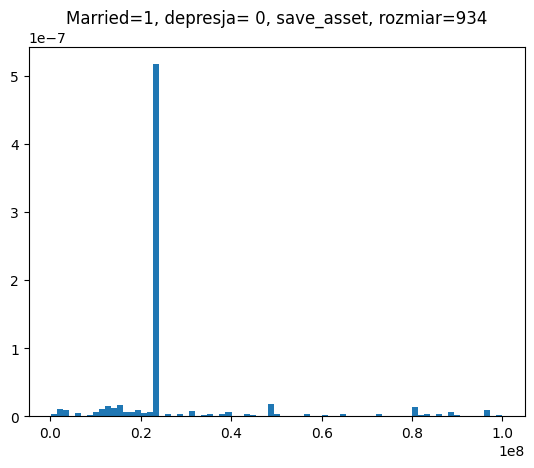

srednia 27312220.81477516
odchylenie std 17437363.74649303
[9874857.068282131, 44749584.561268196]
liczba elementow nietypowych 136


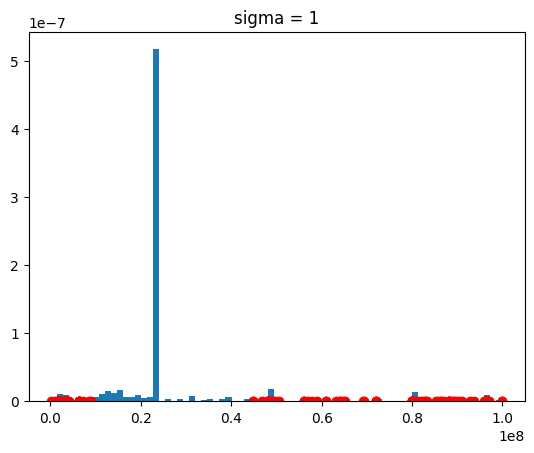

[-7562506.678210899, 62186948.30776122]
liczba elementow nietypowych 63


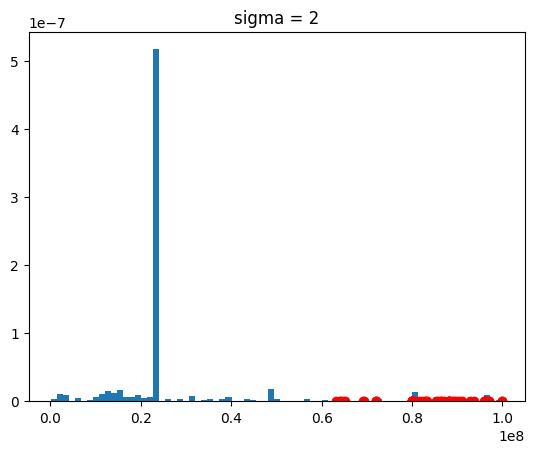

[-24999870.424703933, 79624312.05425426]
liczba elementow nietypowych 53


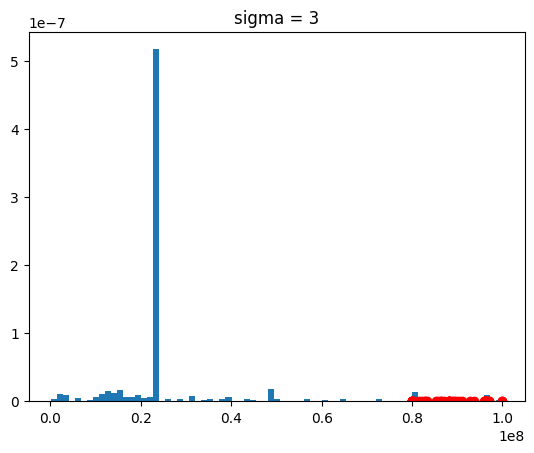

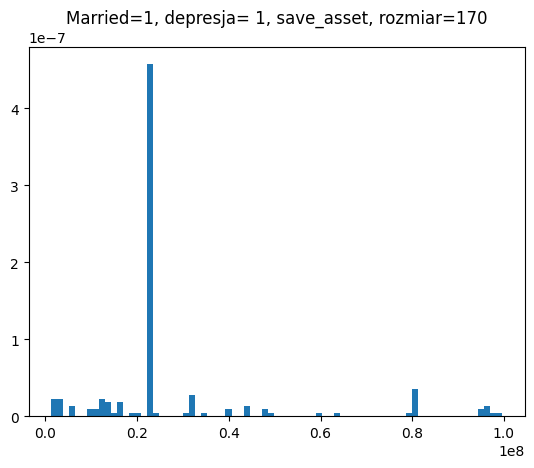

srednia 28615705.911764707
odchylenie std 21175303.8022207
[7440402.109544009, 49791009.713985406]
liczba elementow nietypowych 31


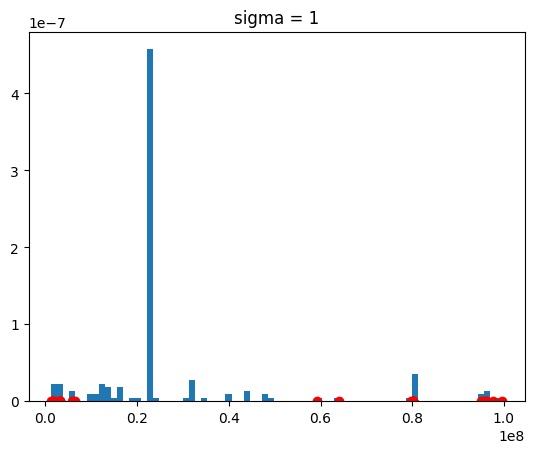

[-13734901.69267669, 70966313.5162061]
liczba elementow nietypowych 16


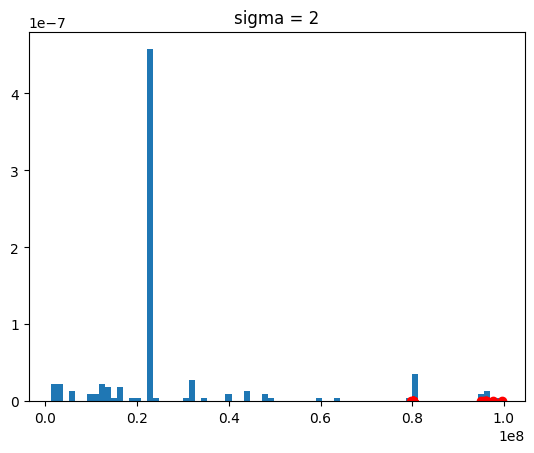

[-34910205.49489738, 92141617.3184268]
liczba elementow nietypowych 7


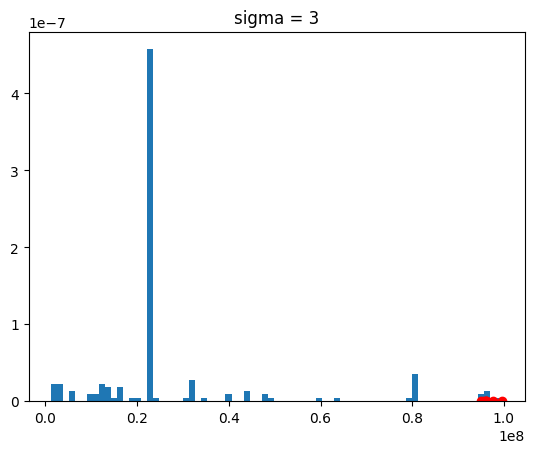

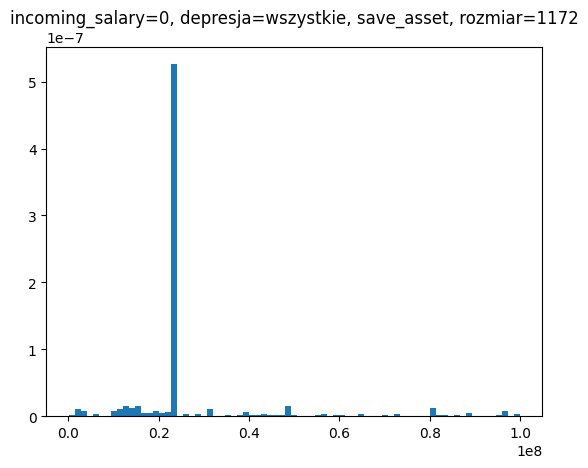

srednia 27097049.76109215
odchylenie std 16806452.40504448
[10290597.356047668, 43903502.16613663]
liczba elementow nietypowych 167


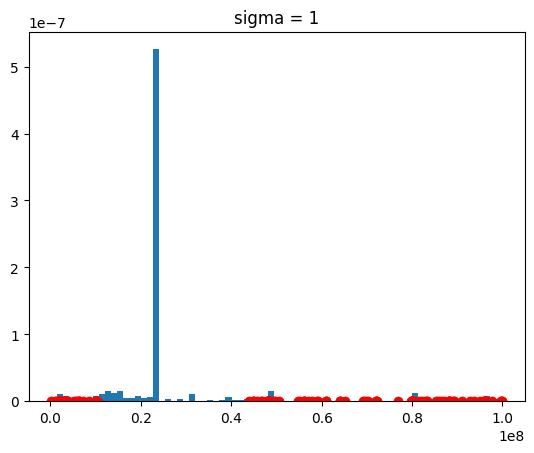

[-6515855.048996814, 60709954.57118111]
liczba elementow nietypowych 75


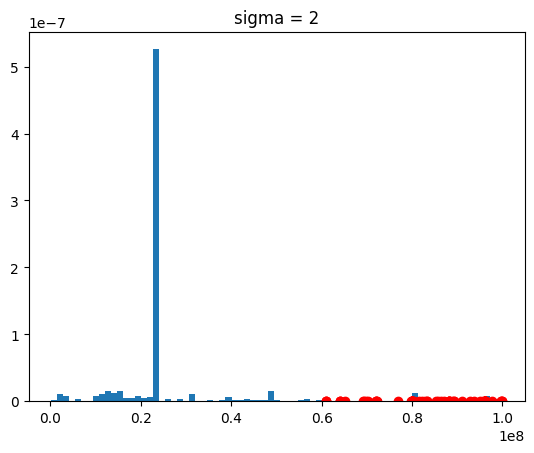

[-23322307.454041295, 77516406.97622558]
liczba elementow nietypowych 59


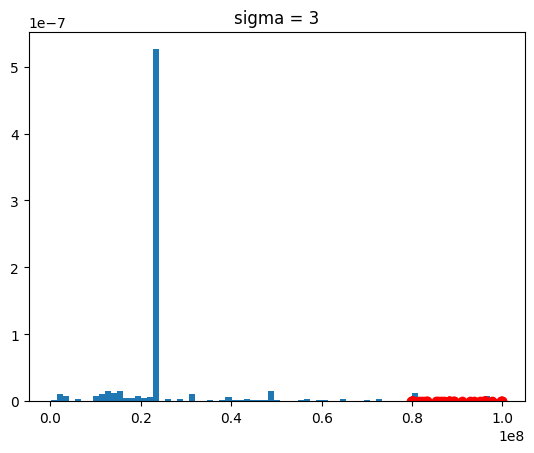

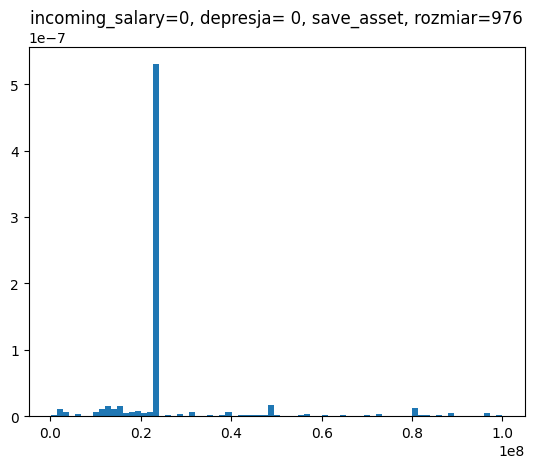

srednia 27075226.467213117
odchylenie std 16401786.409382386
[10673440.05783073, 43477012.876595505]
liczba elementow nietypowych 140


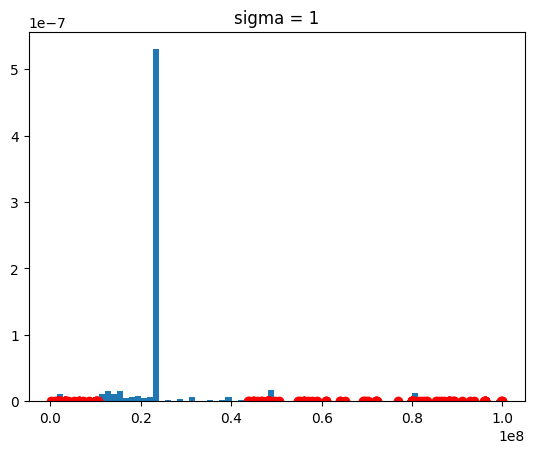

[-5728346.351551656, 59878799.285977885]
liczba elementow nietypowych 61


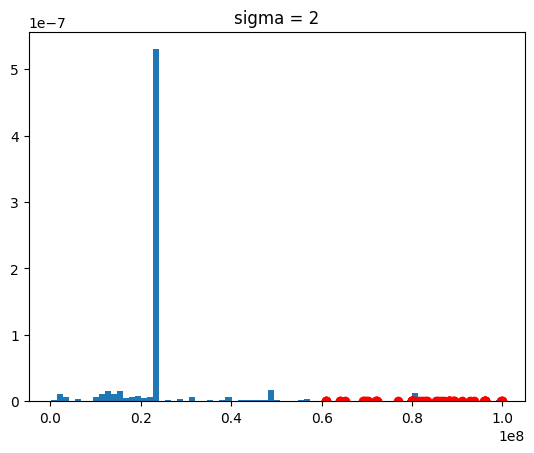

[-22130132.76093404, 76280585.69536027]
liczba elementow nietypowych 47


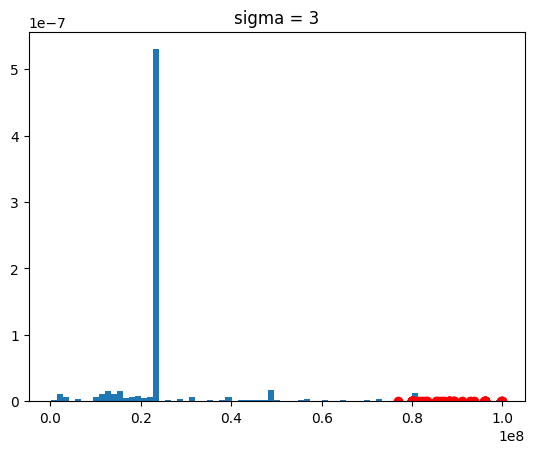

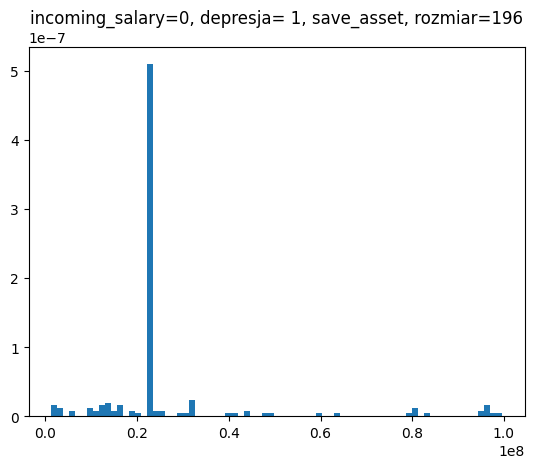

srednia 27205720.85714286
odchylenie std 18691164.669338208
[8514556.18780465, 45896885.52648106]
liczba elementow nietypowych 26


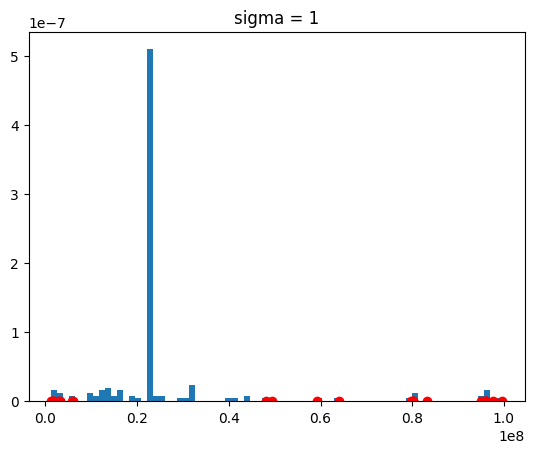

[-10176608.481533557, 64588050.19581927]
liczba elementow nietypowych 13


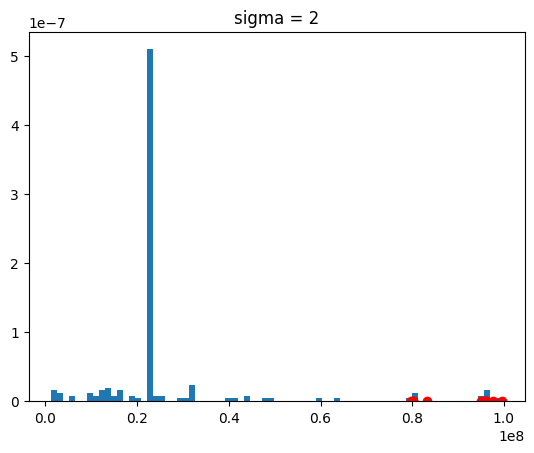

[-28867773.15087176, 83279214.86515749]
liczba elementow nietypowych 9


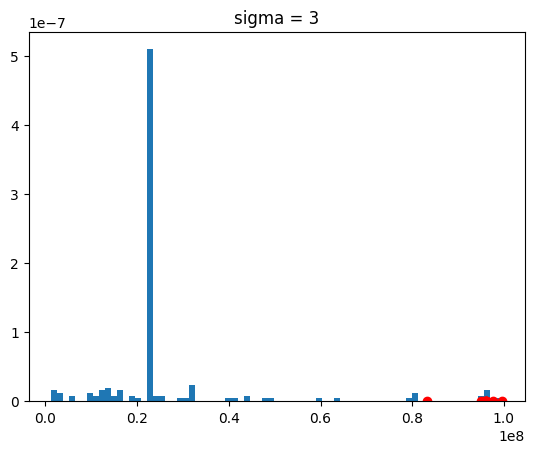

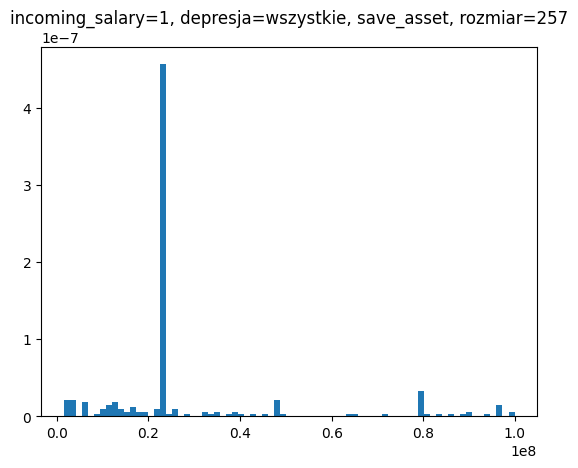

srednia 28918930.66536965
odchylenie std 21449413.075939745
[7469517.589429904, 50368343.74130939]
liczba elementow nietypowych 48


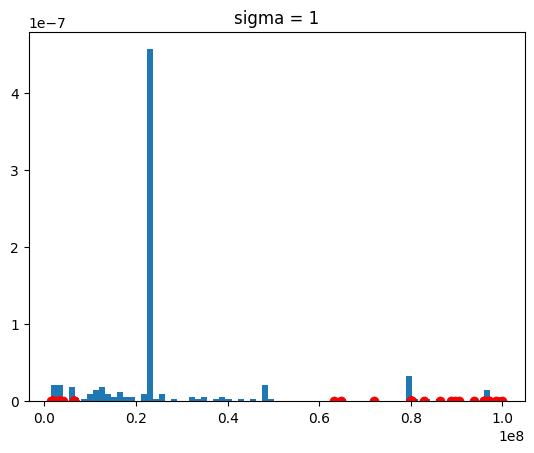

[-13979895.486509841, 71817756.81724913]
liczba elementow nietypowych 26


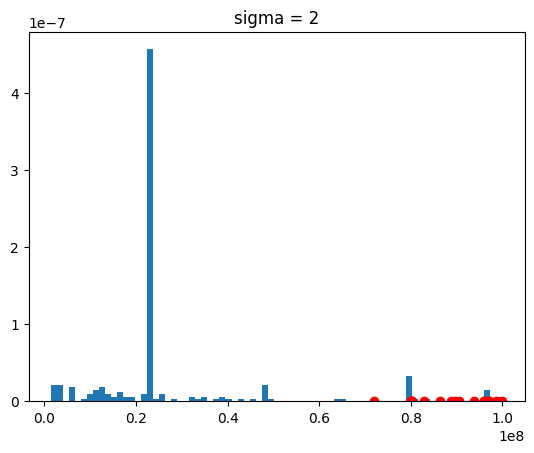

[-35429308.56244959, 93267169.89318888]
liczba elementow nietypowych 8


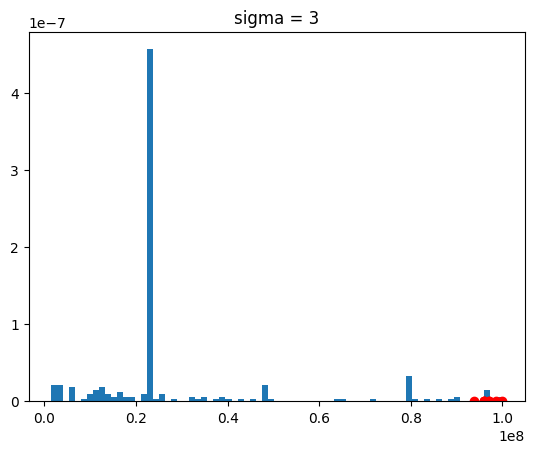

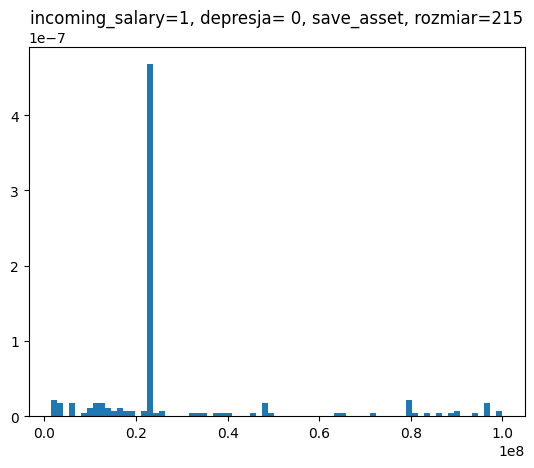

srednia 28613109.055813953
odchylenie std 21600225.577311162
[7012883.478502791, 50213334.63312511]
liczba elementow nietypowych 39


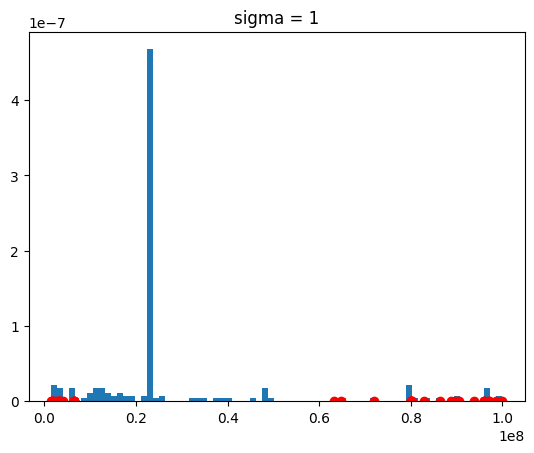

[-14587342.09880837, 71813560.21043628]
liczba elementow nietypowych 21


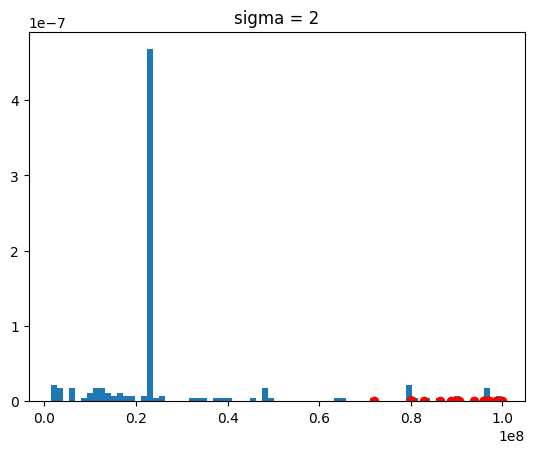

[-36187567.676119536, 93413785.78774744]
liczba elementow nietypowych 8


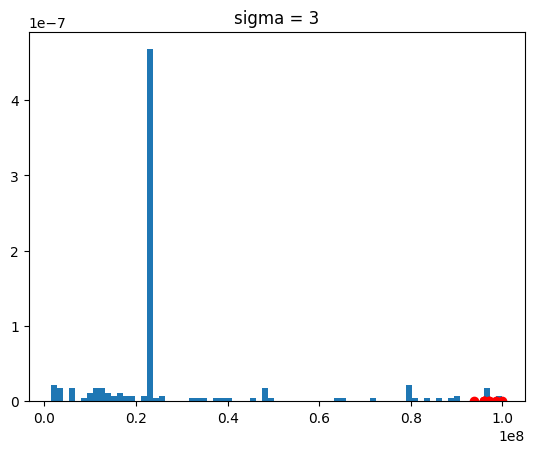

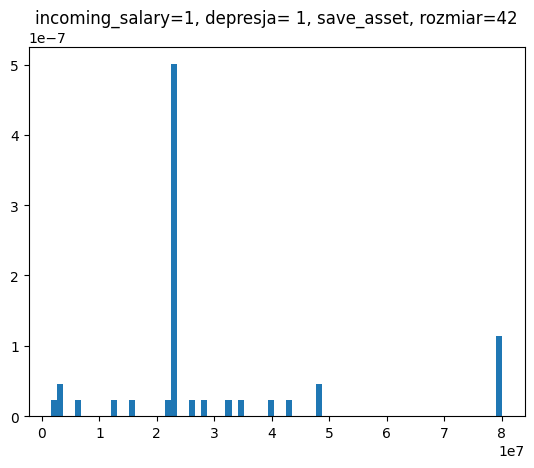

srednia 30484446.04761905
odchylenie std 20589140.060530294
[9895305.987088755, 51073586.10814934]
liczba elementow nietypowych 9


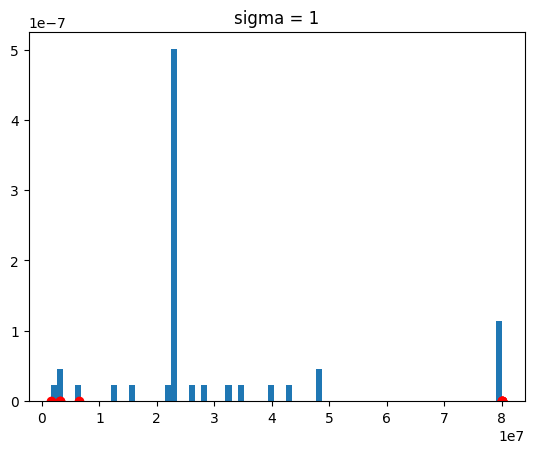

[-10693834.073441539, 71662726.16867964]
liczba elementow nietypowych 5


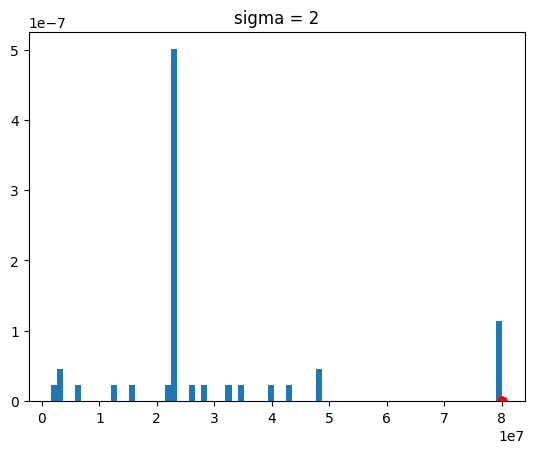

[-31282974.133971836, 92251866.22920993]
liczba elementow nietypowych 0


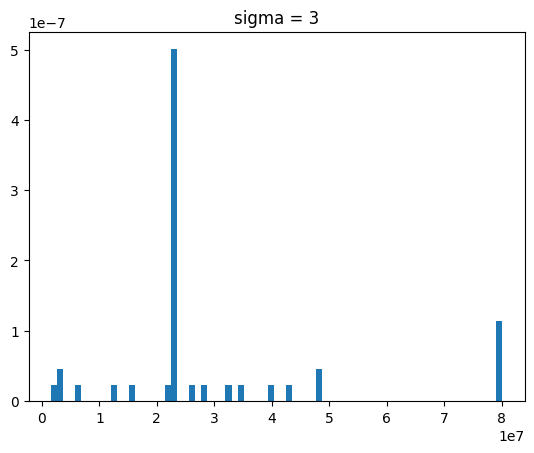

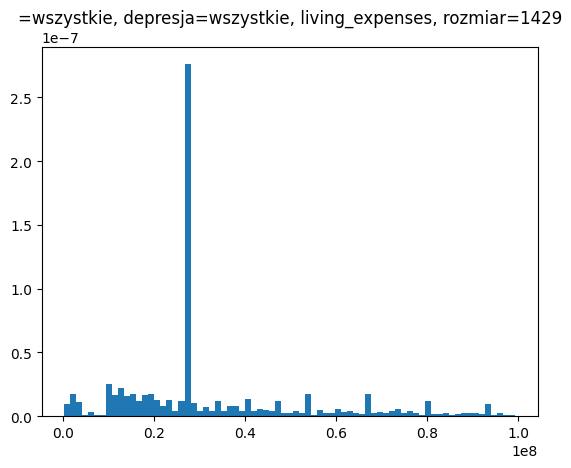

srednia 32482565.522743177
odchylenie std 21007929.759725973
[11474635.763017204, 53490495.28246915]
liczba elementow nietypowych 355


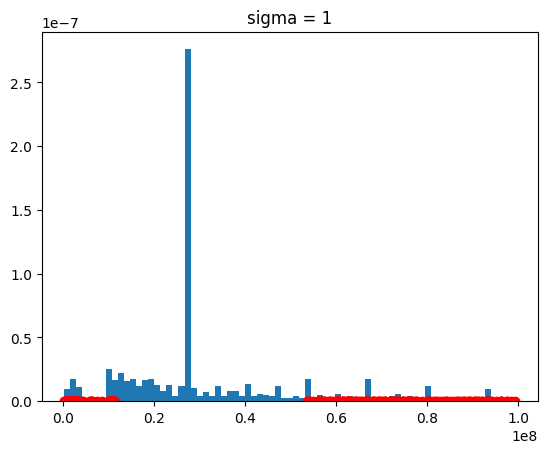

[-9533293.99670877, 74498425.04219513]
liczba elementow nietypowych 98


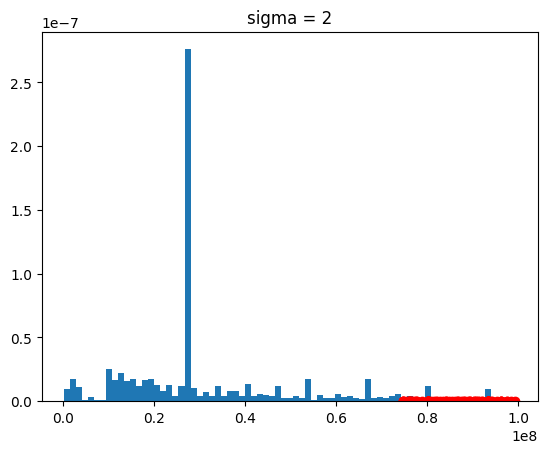

[-30541223.756434742, 95506354.8019211]
liczba elementow nietypowych 8


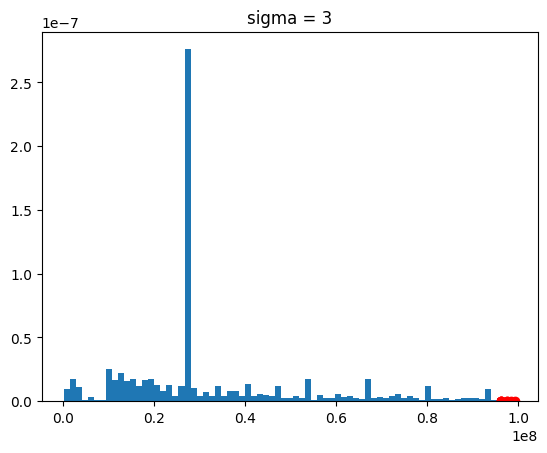

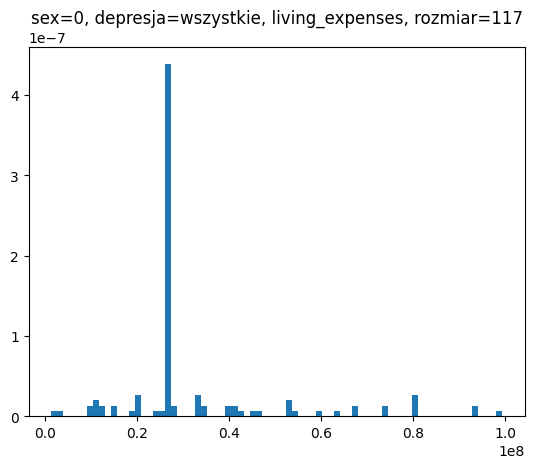

srednia 32728275.188034188
odchylenie std 18473173.648021355
[14255101.540012833, 51201448.83605555]
liczba elementow nietypowych 26


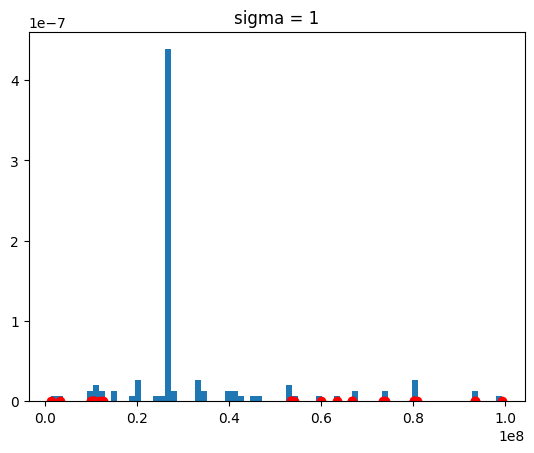

[-4218072.108008523, 69674622.4840769]
liczba elementow nietypowych 9


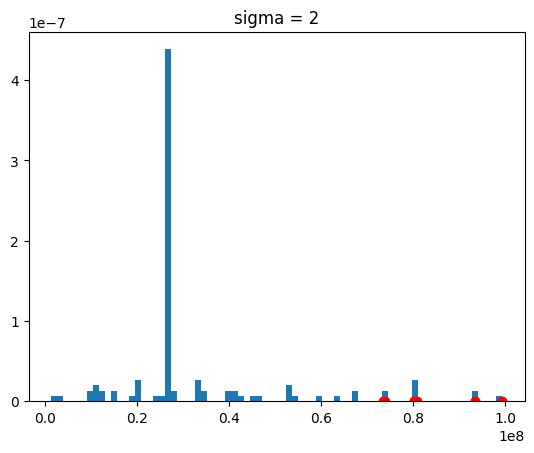

[-22691245.756029878, 88147796.13209826]
liczba elementow nietypowych 3


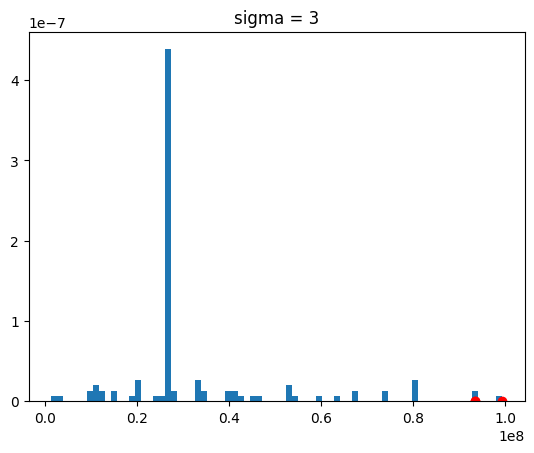

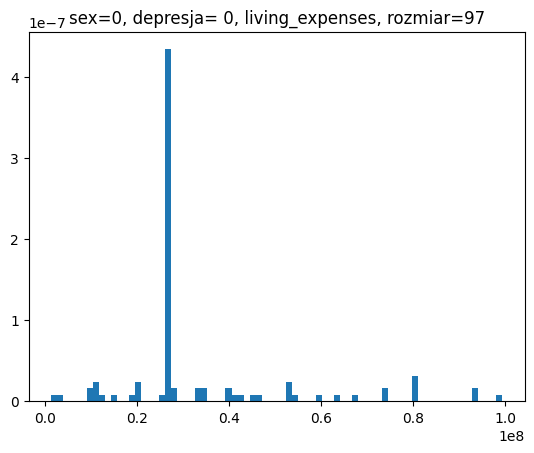

srednia 33641219.84536082
odchylenie std 19579899.637415666
[14061320.207945157, 53221119.48277649]
liczba elementow nietypowych 24


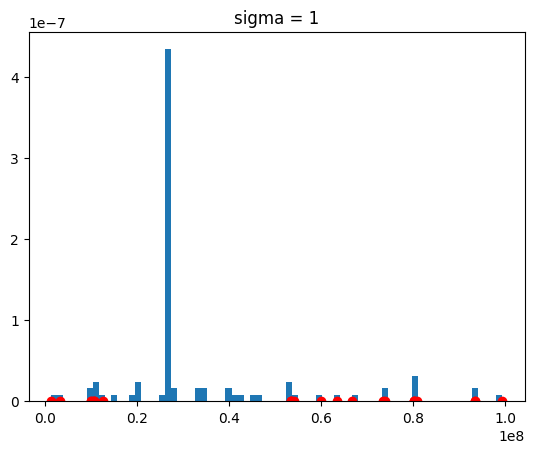

[-5518579.429470509, 72801019.12019216]
liczba elementow nietypowych 9


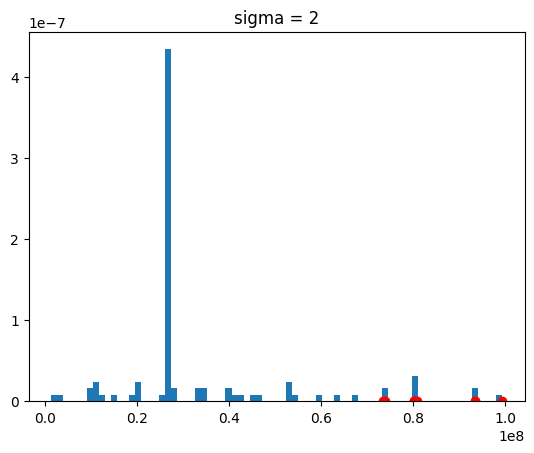

[-25098479.06688618, 92380918.75760782]
liczba elementow nietypowych 3


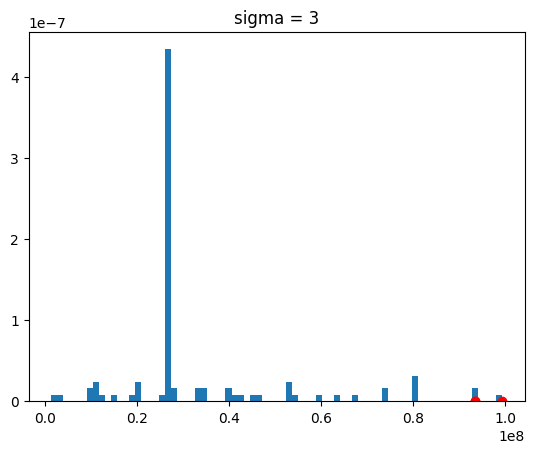

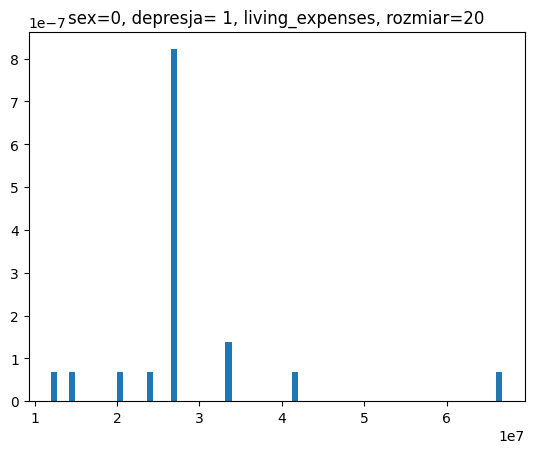

srednia 28300493.6
odchylenie std 10646882.086536463
[17653611.51346354, 38947375.68653646]
liczba elementow nietypowych 4


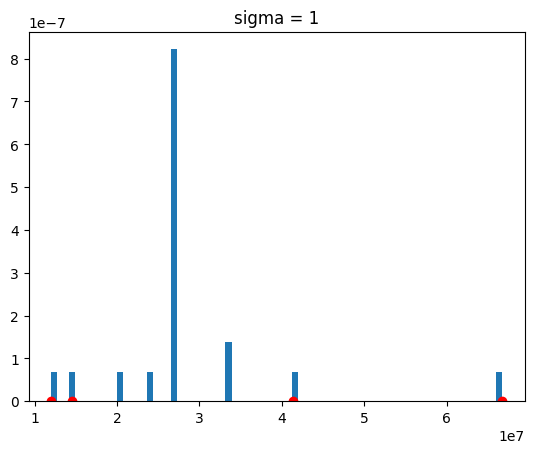

[7006729.426927075, 49594257.77307293]
liczba elementow nietypowych 1


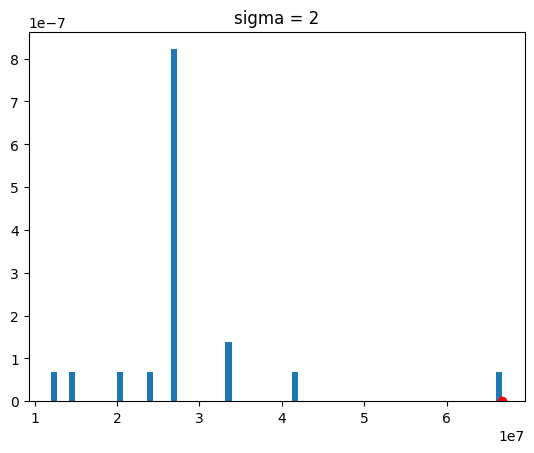

[-3640152.6596093886, 60241139.859609395]
liczba elementow nietypowych 1


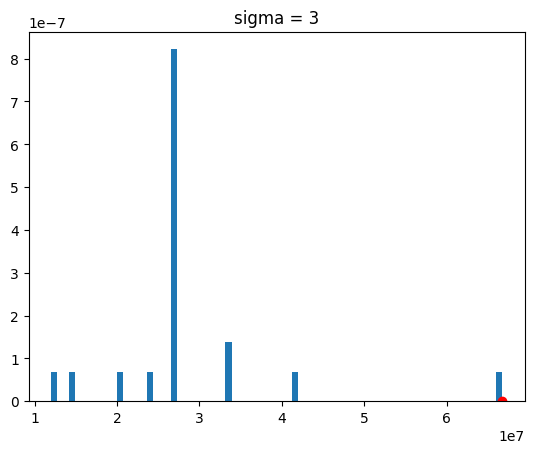

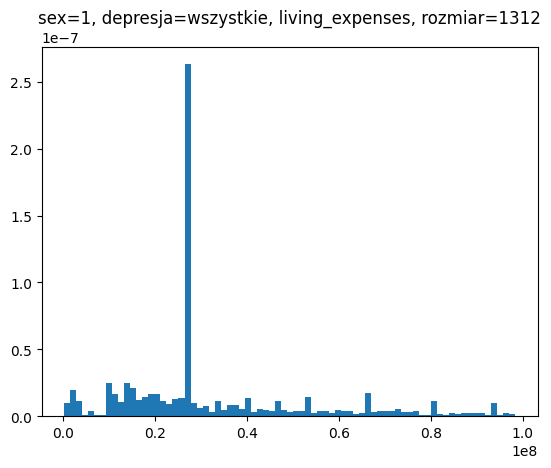

srednia 32460653.91387195
odchylenie std 21219133.279342405
[11241520.634529546, 53679787.19321436]
liczba elementow nietypowych 332


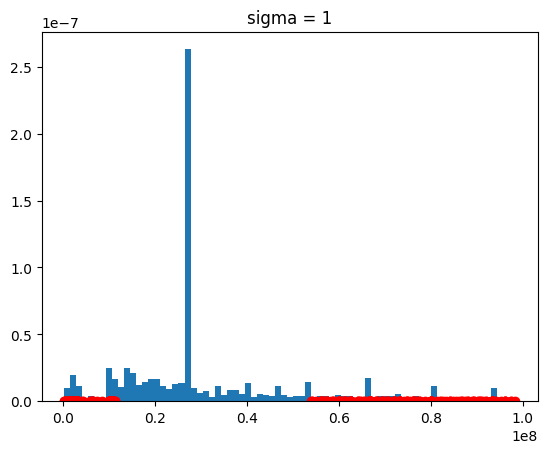

[-9977612.64481286, 74898920.47255677]
liczba elementow nietypowych 87


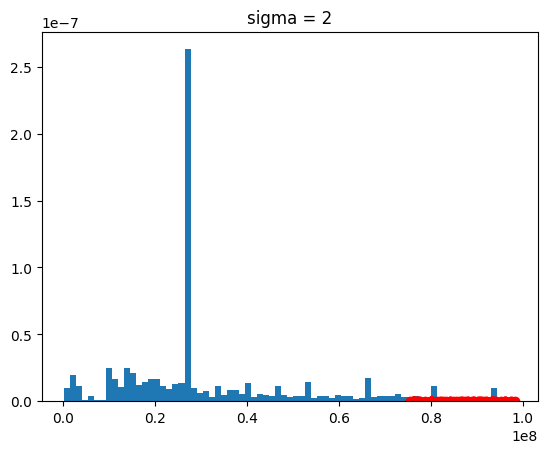

[-31196745.924155265, 96118053.75189917]
liczba elementow nietypowych 3


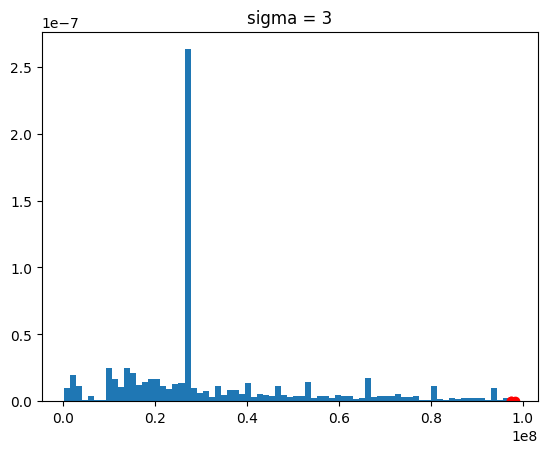

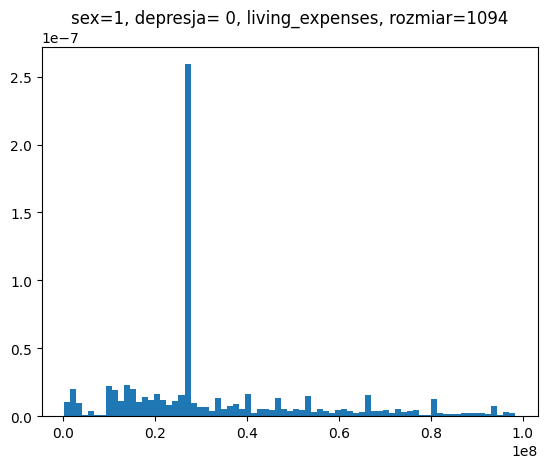

srednia 32668278.530164532
odchylenie std 21064452.878218677
[11603825.651945855, 53732731.408383206]
liczba elementow nietypowych 276


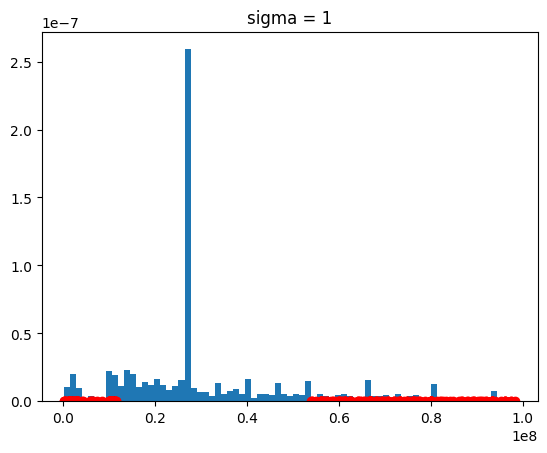

[-9460627.226272821, 74797184.28660189]
liczba elementow nietypowych 73


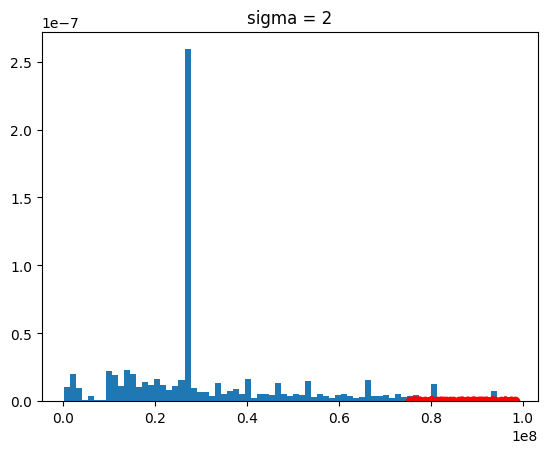

[-30525080.104491495, 95861637.16482055]
liczba elementow nietypowych 7


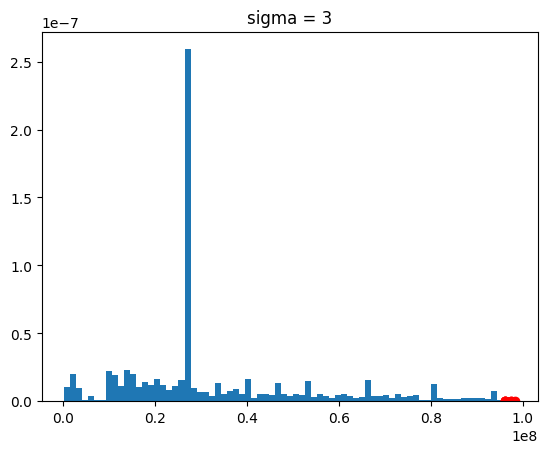

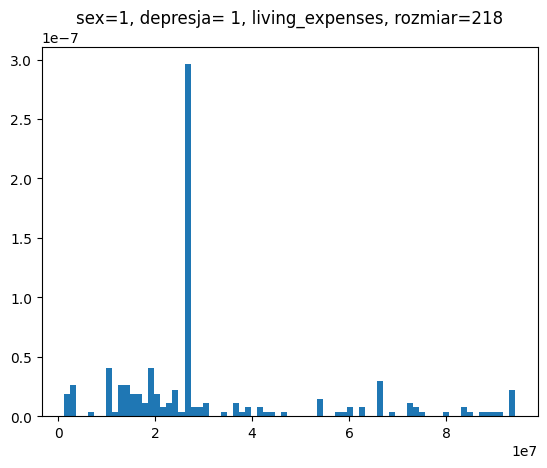

srednia 31418721.20642202
odchylenie std 21949302.515829448
[9469418.690592572, 53368023.72225147]
liczba elementow nietypowych 52


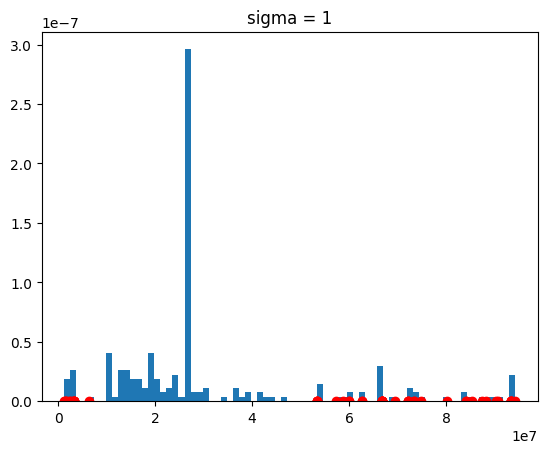

[-12479883.825236876, 75317326.23808092]
liczba elementow nietypowych 14


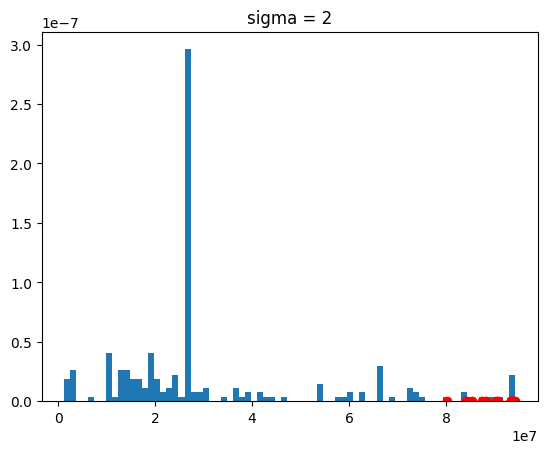

[-34429186.34106633, 97266628.75391036]
liczba elementow nietypowych 0


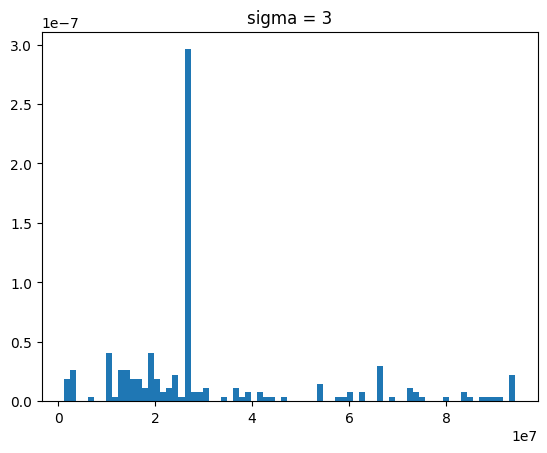

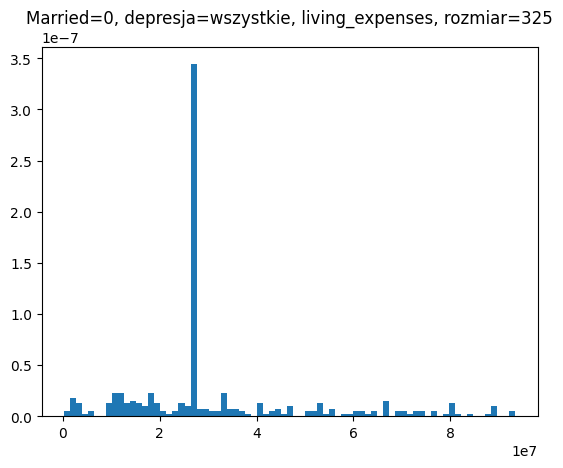

srednia 31533262.584615383
odchylenie std 19360046.681117736
[12173215.903497647, 50893309.26573312]
liczba elementow nietypowych 87


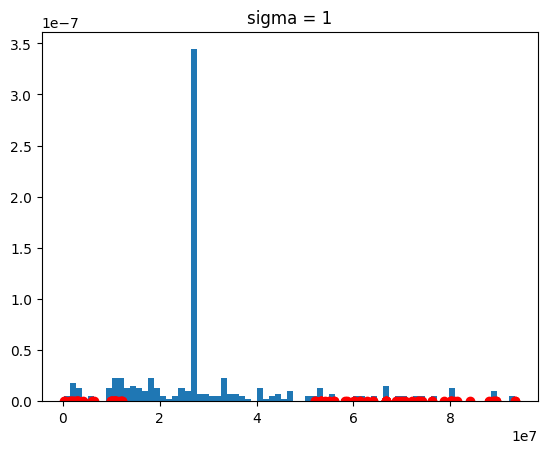

[-7186830.777620088, 70253355.94685085]
liczba elementow nietypowych 23


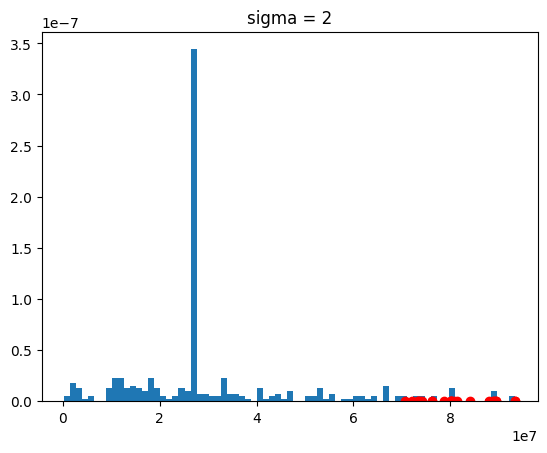

[-26546877.458737824, 89613402.6279686]
liczba elementow nietypowych 2


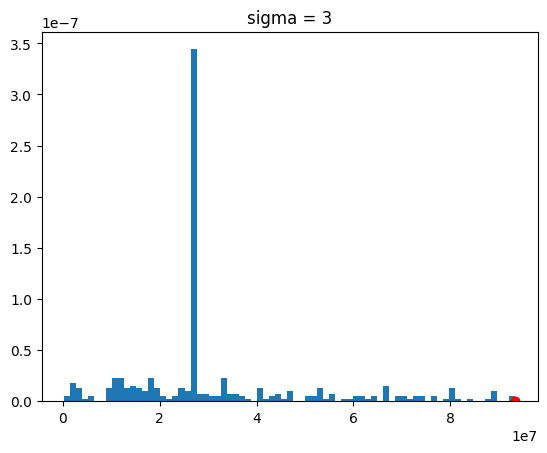

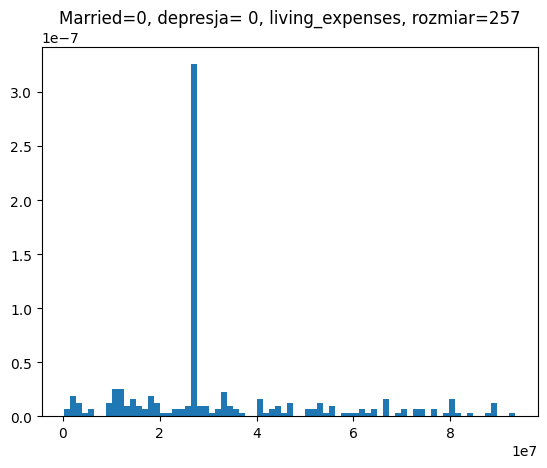

srednia 32488955.447470818
odchylenie std 20259751.641217608
[12229203.80625321, 52748707.088688426]
liczba elementow nietypowych 75


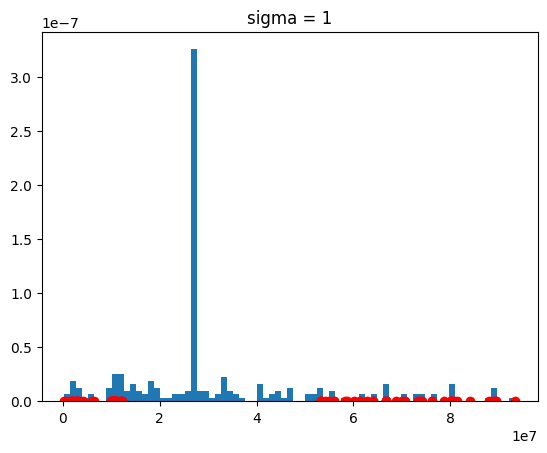

[-8030547.834964398, 73008458.72990604]
liczba elementow nietypowych 20


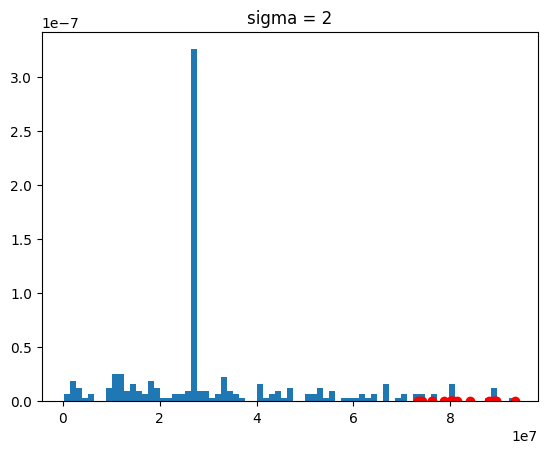

[-28290299.47618201, 93268210.37112364]
liczba elementow nietypowych 1


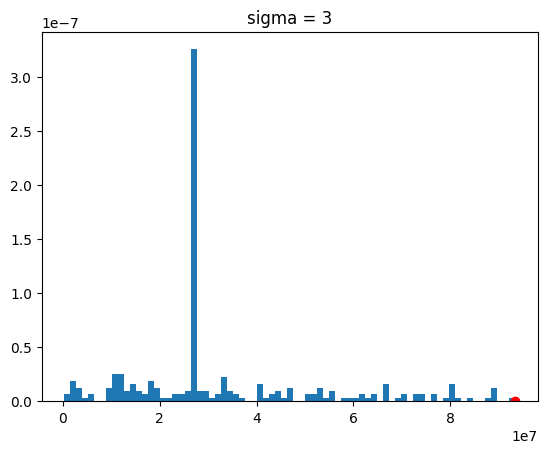

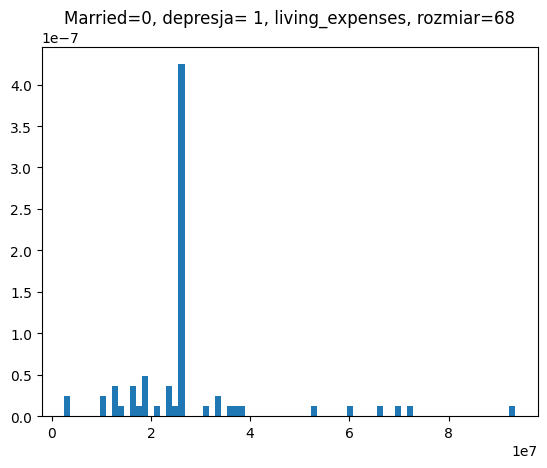

srednia 27921305.73529412
odchylenie std 14952988.138267154
[12968317.597026965, 42874293.87356127]
liczba elementow nietypowych 11


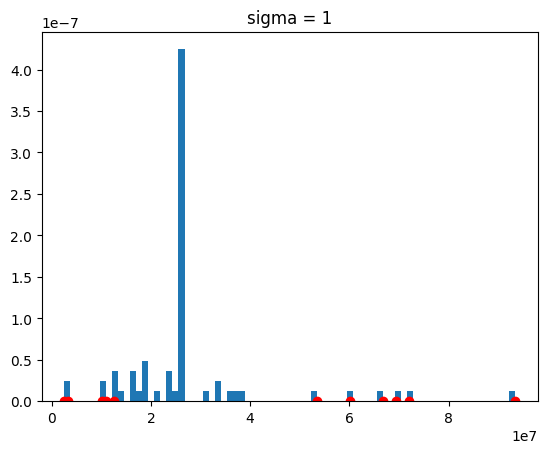

[-1984670.5412401892, 57827282.01182842]
liczba elementow nietypowych 5


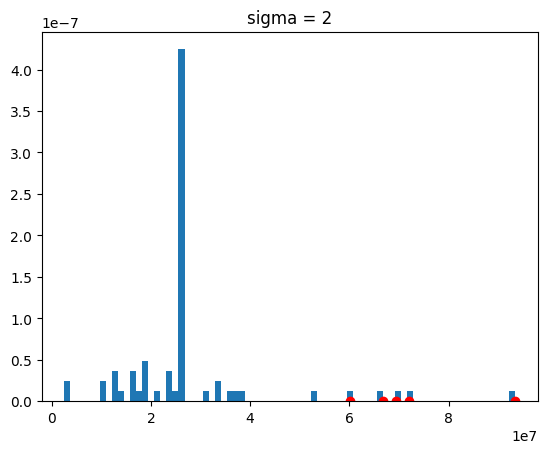

[-16937658.679507345, 72780270.15009558]
liczba elementow nietypowych 1


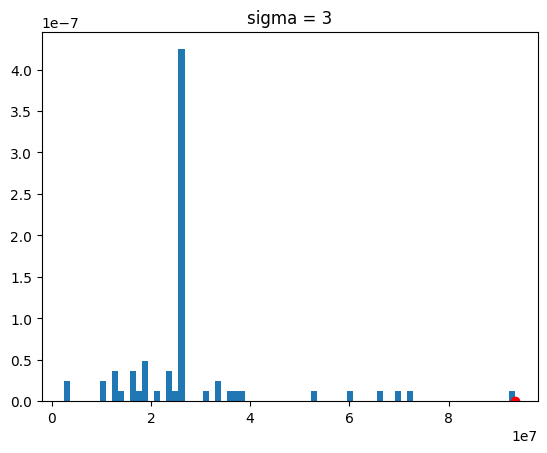

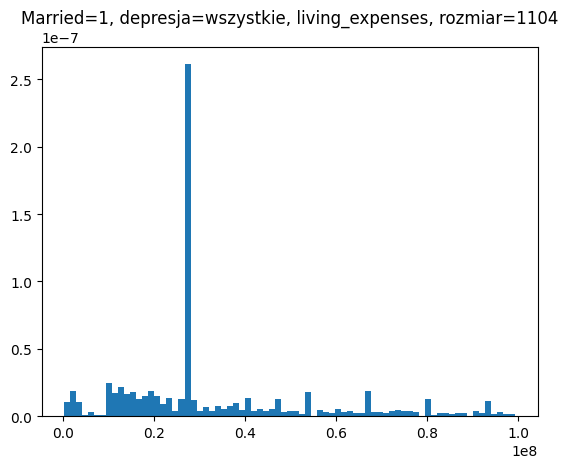

srednia 32762025.173913043
odchylenie std 21460956.473856375
[11301068.700056668, 54222981.64776942]
liczba elementow nietypowych 274


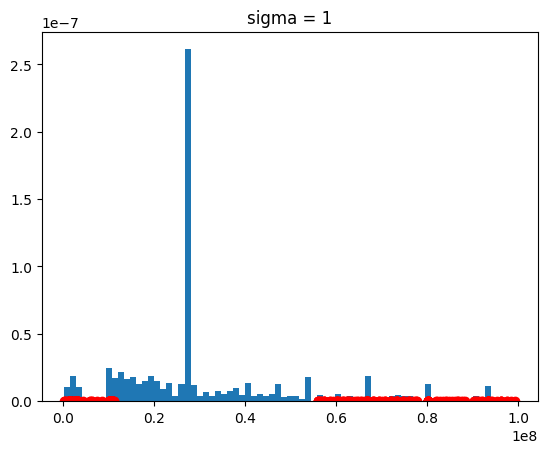

[-10159887.773799706, 75683938.1216258]
liczba elementow nietypowych 76


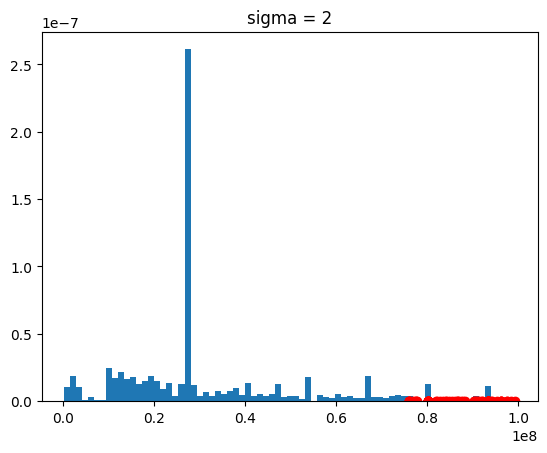

[-31620844.24765608, 97144894.59548217]
liczba elementow nietypowych 4


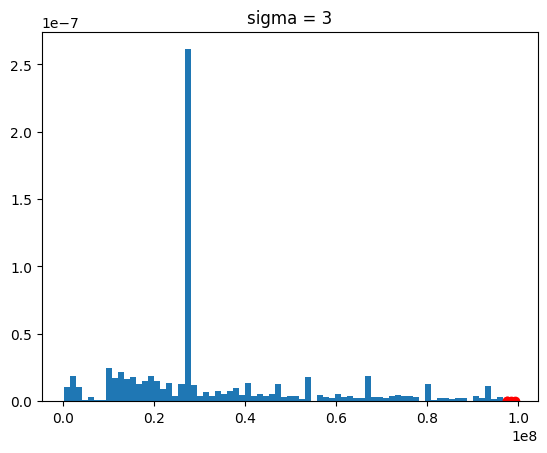

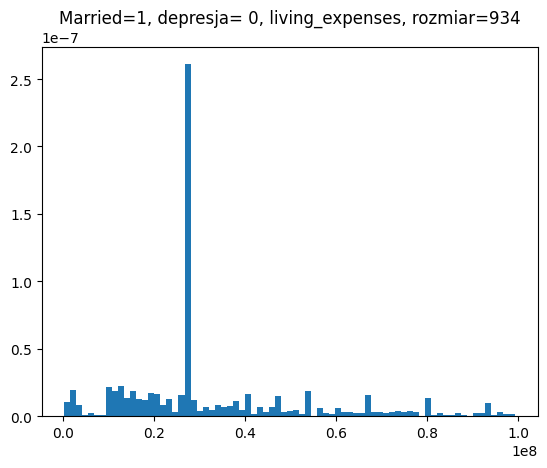

srednia 32818665.403640255
odchylenie std 21134371.82341119
[11684293.580229066, 53953037.227051444]
liczba elementow nietypowych 233


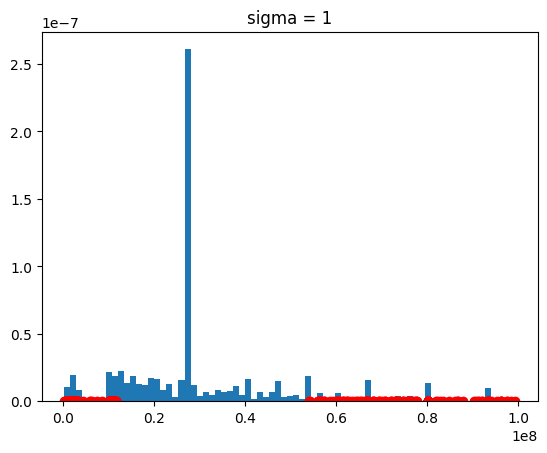

[-9450078.243182123, 75087409.05046263]
liczba elementow nietypowych 64


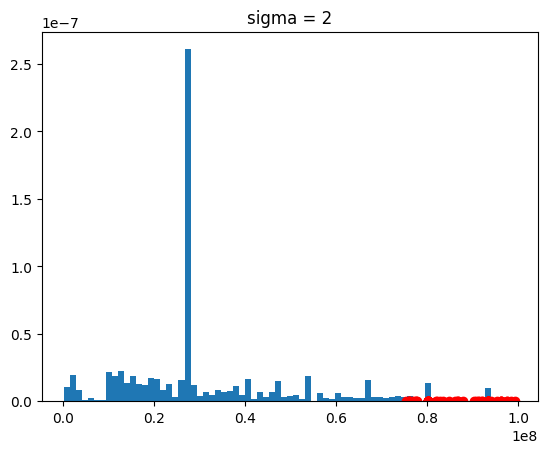

[-30584450.06659331, 96221780.87387383]
liczba elementow nietypowych 4


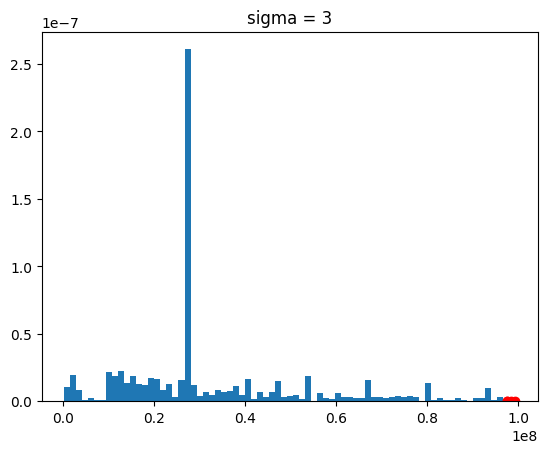

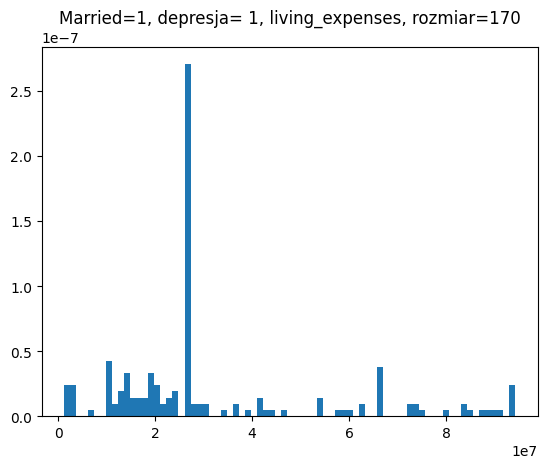

srednia 32450837.088235293
odchylenie std 23170816.81557707
[9280020.272658221, 55621653.903812364]
liczba elementow nietypowych 42


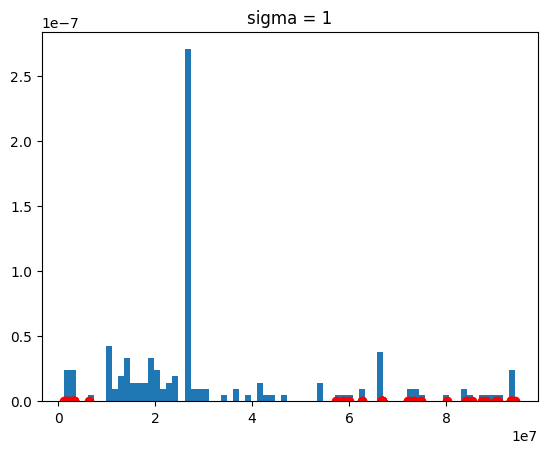

[-13890796.54291885, 78792470.71938944]
liczba elementow nietypowych 13


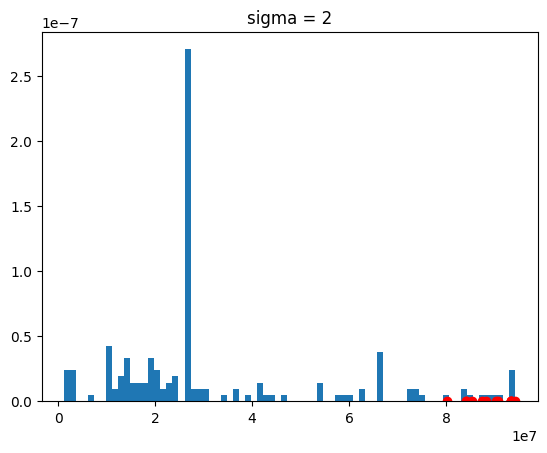

[-37061613.35849592, 101963287.5349665]
liczba elementow nietypowych 0


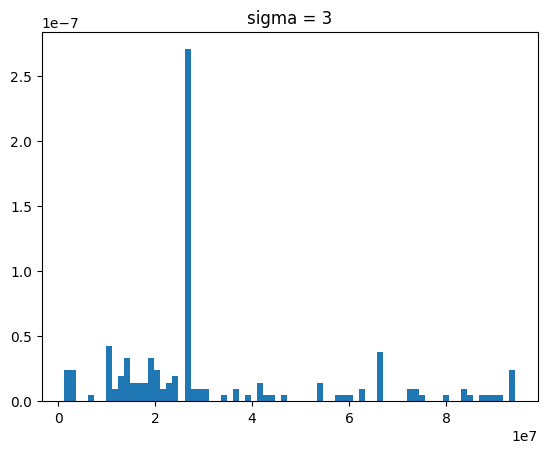

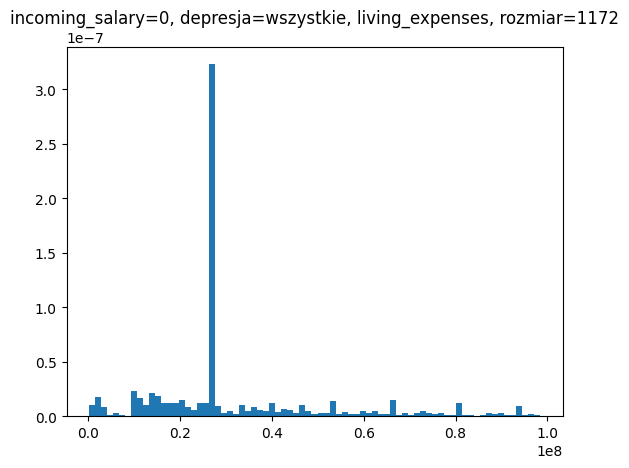

srednia 31599462.95989761
odchylenie std 19967913.088946763
[11631549.870950848, 51567376.048844375]
liczba elementow nietypowych 291


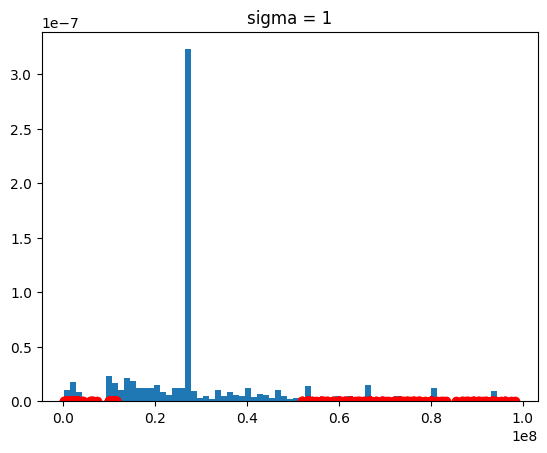

[-8336363.217995916, 71535289.13779114]
liczba elementow nietypowych 85


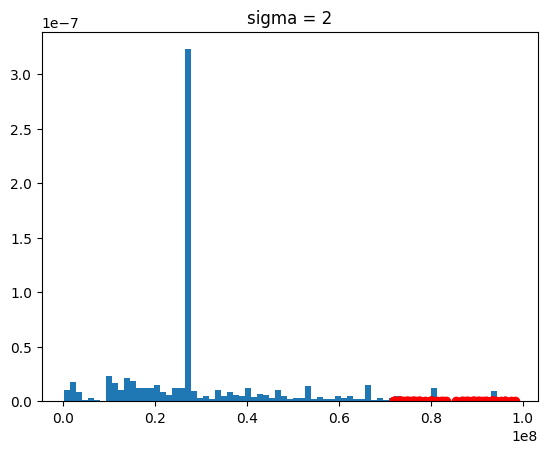

[-28304276.306942683, 91503202.2267379]
liczba elementow nietypowych 22


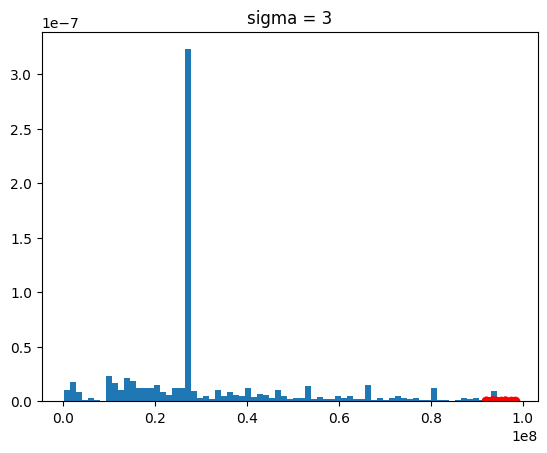

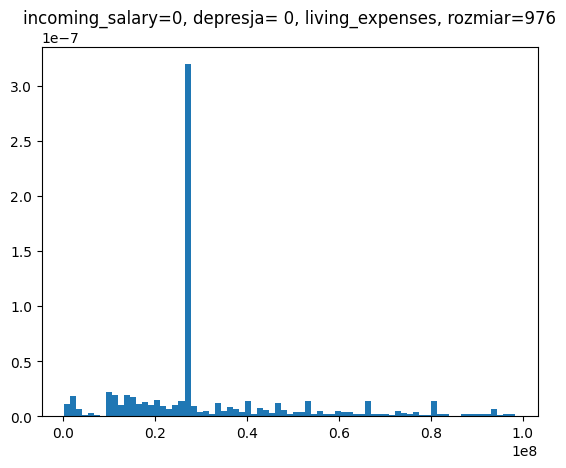

srednia 31732677.084016394
odchylenie std 19748218.283584267
[11984458.800432127, 51480895.367600664]
liczba elementow nietypowych 244


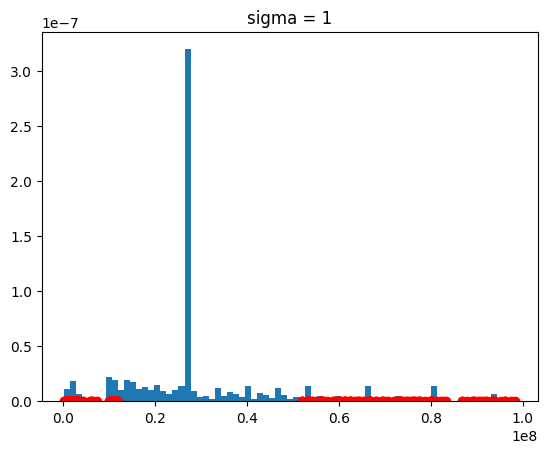

[-7763759.48315214, 71229113.65118493]
liczba elementow nietypowych 69


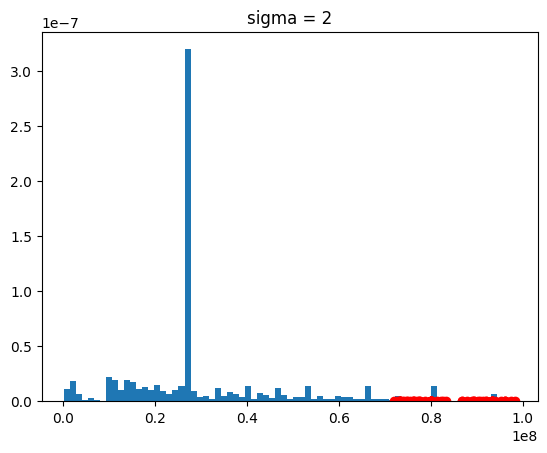

[-27511977.766736407, 90977331.9347692]
liczba elementow nietypowych 17


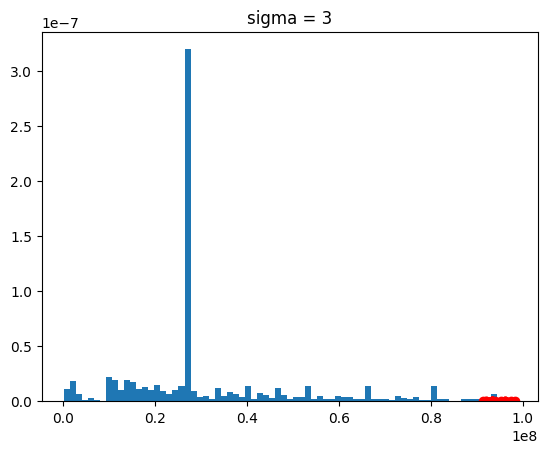

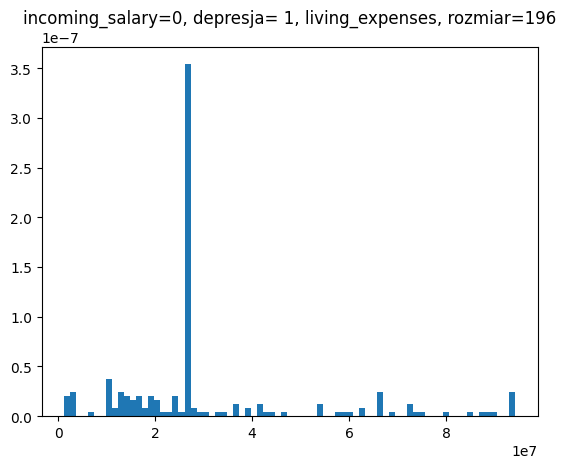

srednia 30936110.994897958
odchylenie std 21015190.17880506
[9920920.816092897, 51951301.173703015]
liczba elementow nietypowych 43


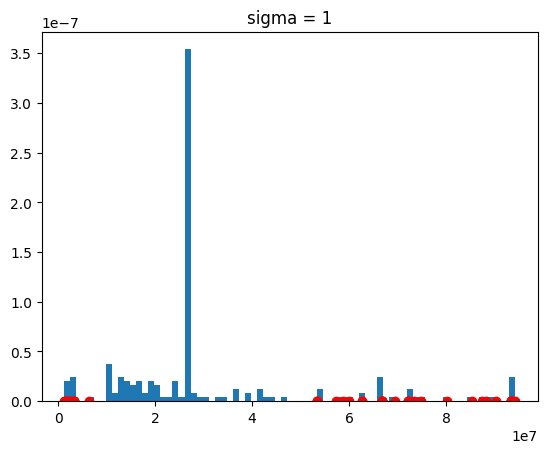

[-11094269.362712163, 72966491.35250808]
liczba elementow nietypowych 13


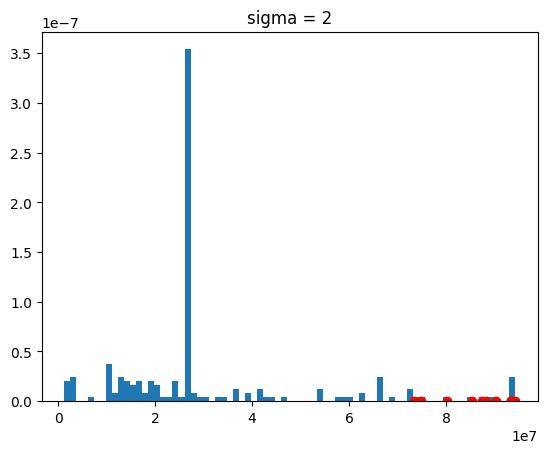

[-32109459.541517224, 93981681.53131314]
liczba elementow nietypowych 1


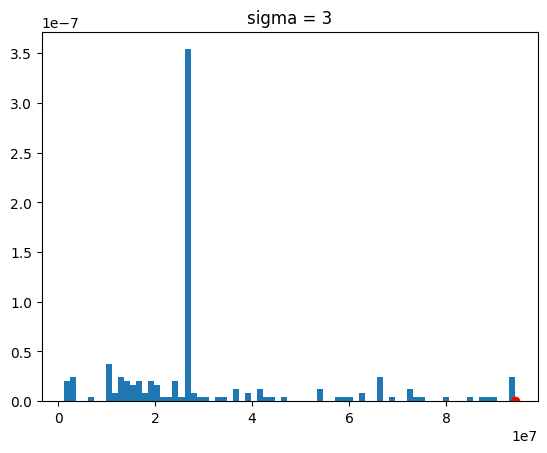

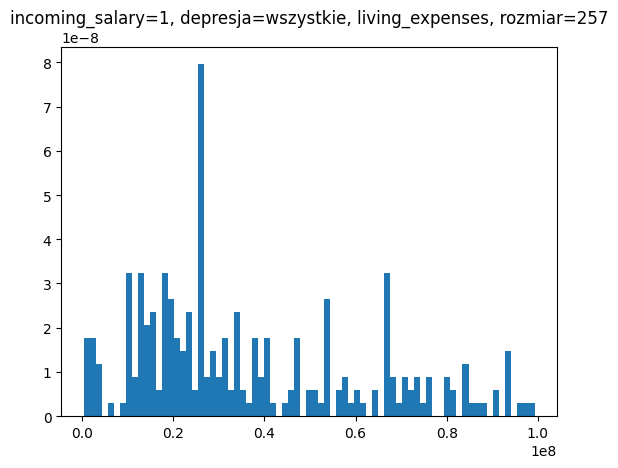

srednia 36509788.105058365
odchylenie std 24817299.572684627
[11692488.532373738, 61327087.67774299]
liczba elementow nietypowych 83


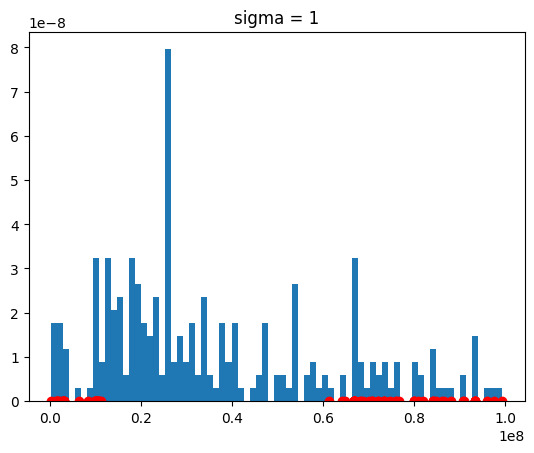

[-13124811.04031089, 86144387.25042762]
liczba elementow nietypowych 12


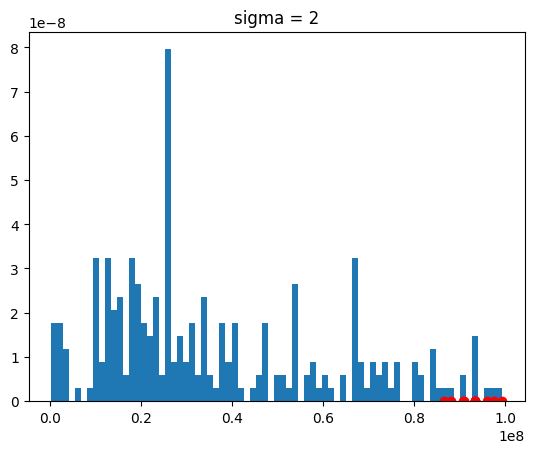

[-37942110.61299551, 110961686.82311225]
liczba elementow nietypowych 0


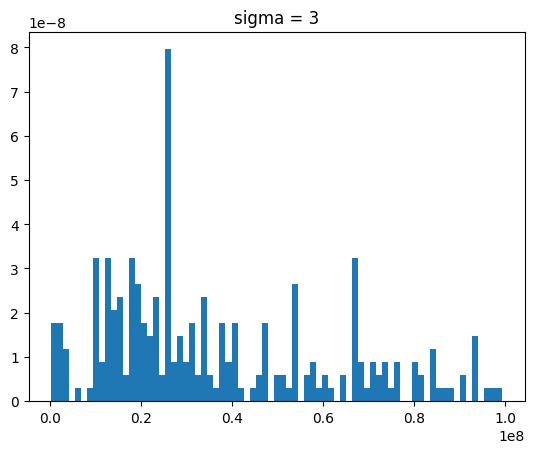

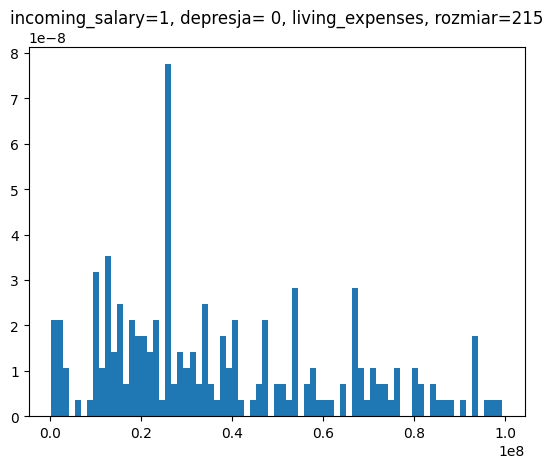

srednia 37354428.85116279
odchylenie std 25196060.93721056
[12158367.913952231, 62550489.78837335]
liczba elementow nietypowych 73


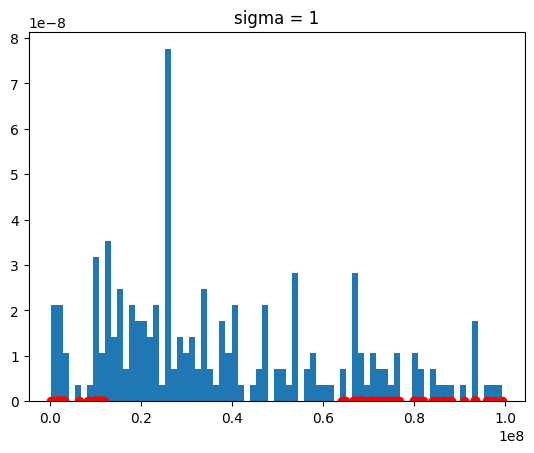

[-13037693.023258328, 87746550.72558391]
liczba elementow nietypowych 10


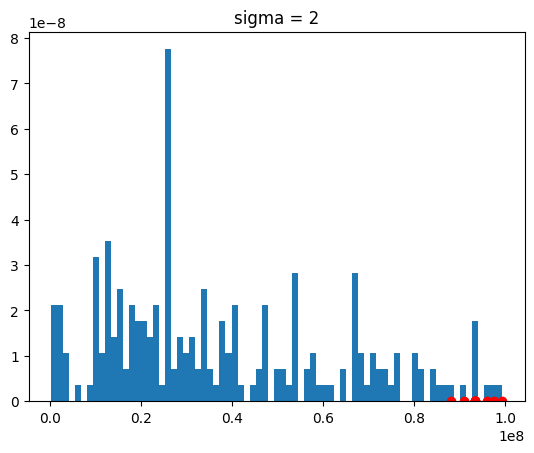

[-38233753.96046889, 112942611.66279447]
liczba elementow nietypowych 0


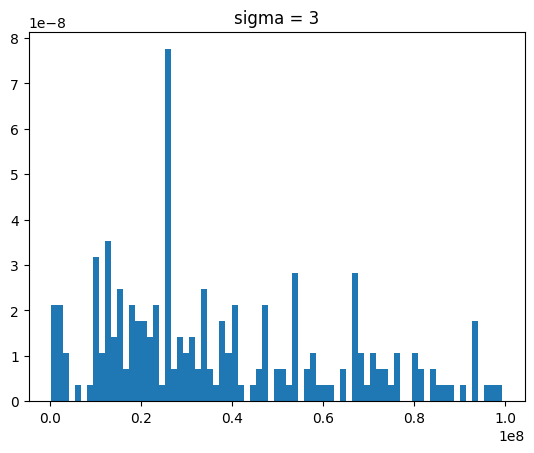

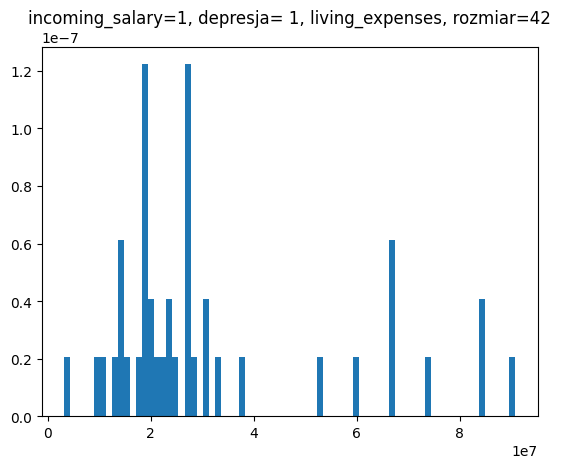

srednia 32186031.904761903
odchylenie std 22284090.55842028
[9901941.346341621, 54470122.46318218]
liczba elementow nietypowych 9


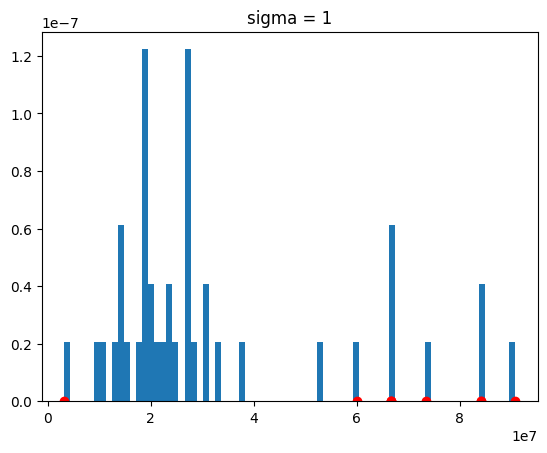

[-12382149.21207866, 76754213.02160247]
liczba elementow nietypowych 3


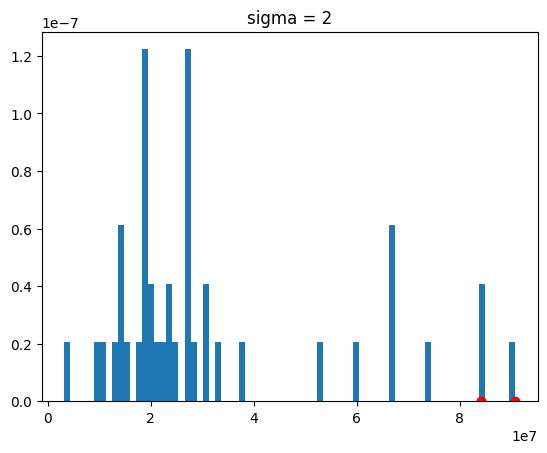

[-34666239.77049894, 99038303.58002275]
liczba elementow nietypowych 0


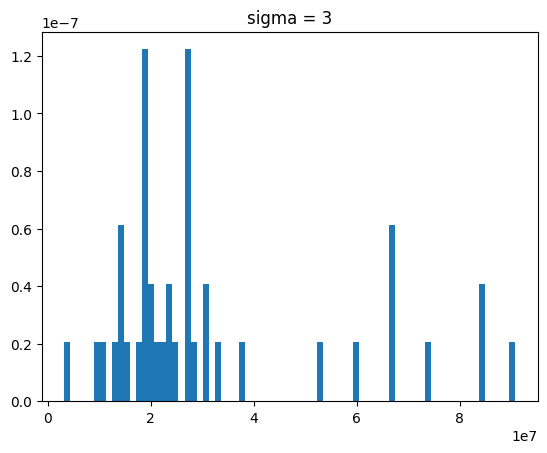

In [ ]:
classes = ['sex', 'Married', 'incoming_salary']
attributes = ['Age', 'Number_children', 'save_asset', 'living_expenses']

for att in attributes:
  title = "=wszystkie" + ", depresja=wszystkie" + ", " + att
  data = df[att].to_numpy()
  find_outliers(data, title)
  for cla in classes:
    for i in [0, 1]:
      title = cla + "=" + str(i) + ", depresja=wszystkie" + ", " + att
      data = df.loc[df[cla] == i][att].to_numpy()
      find_outliers(data, title)
      for depr in [0, 1]:
        title = cla + "=" + str(i) + ", depresja= " + str(depr) + ", " + att
        data = df.loc[df["depressed"] == depr]
        data = data.loc[data[cla] == i][att].to_numpy()
        find_outliers(data, title)

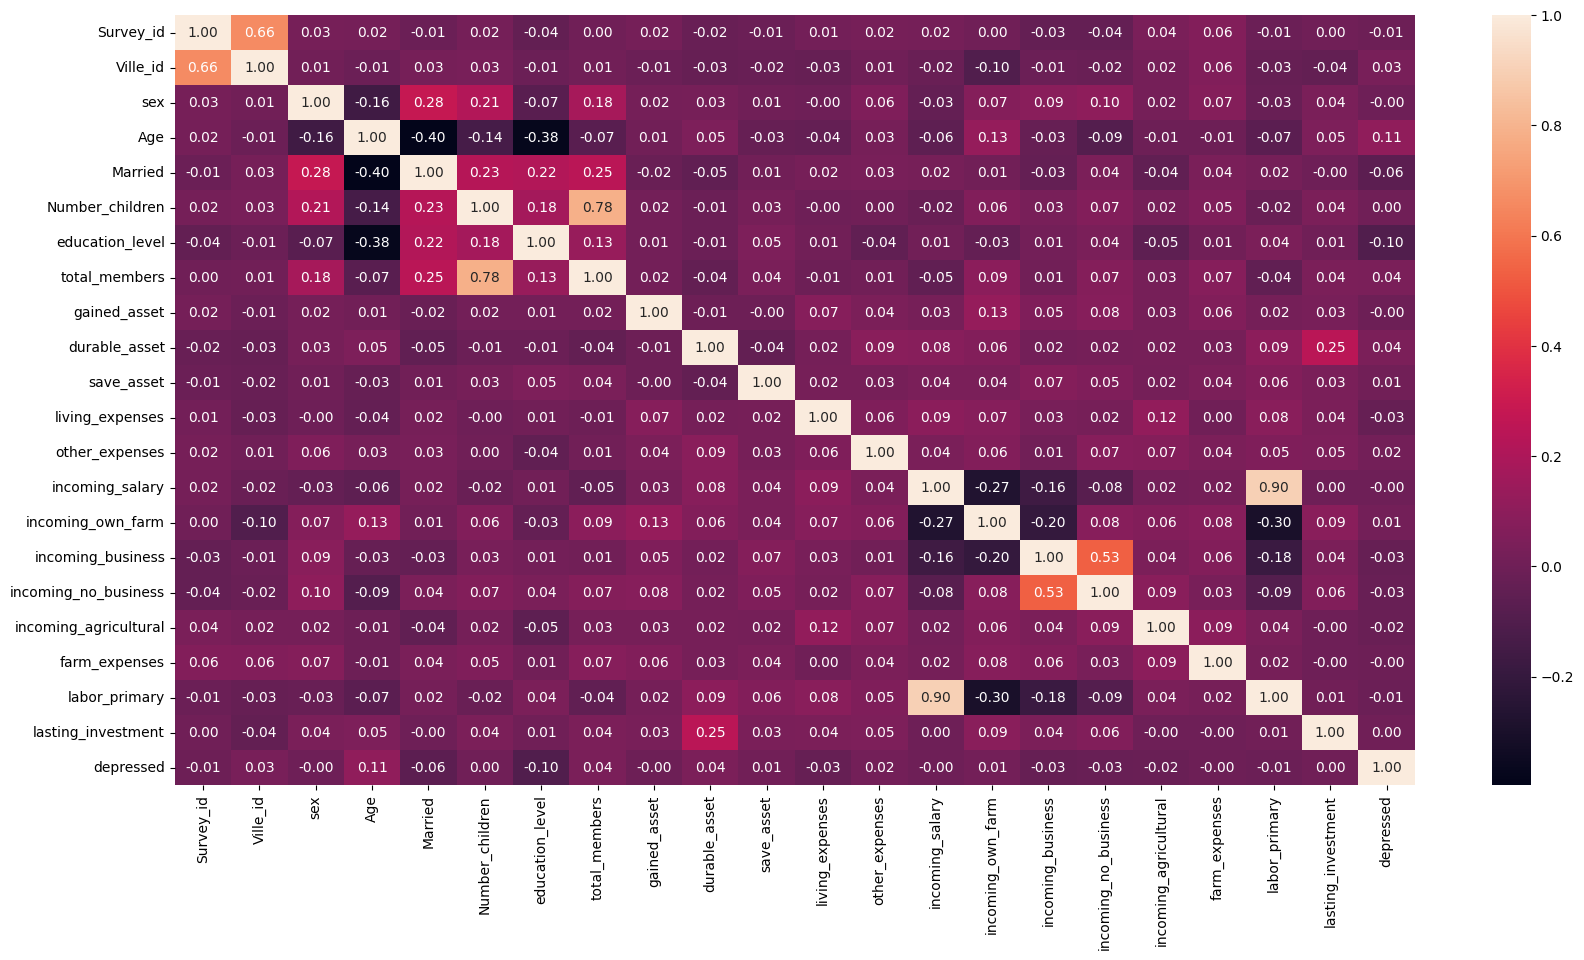

In [ ]:
dfCorr = df.drop(['no_lasting_investmen'], axis=1)
plt.subplots(figsize=(20,10))
sns.heatmap(dfCorr.corr(), annot = True, fmt = ".2f")
plt.show()

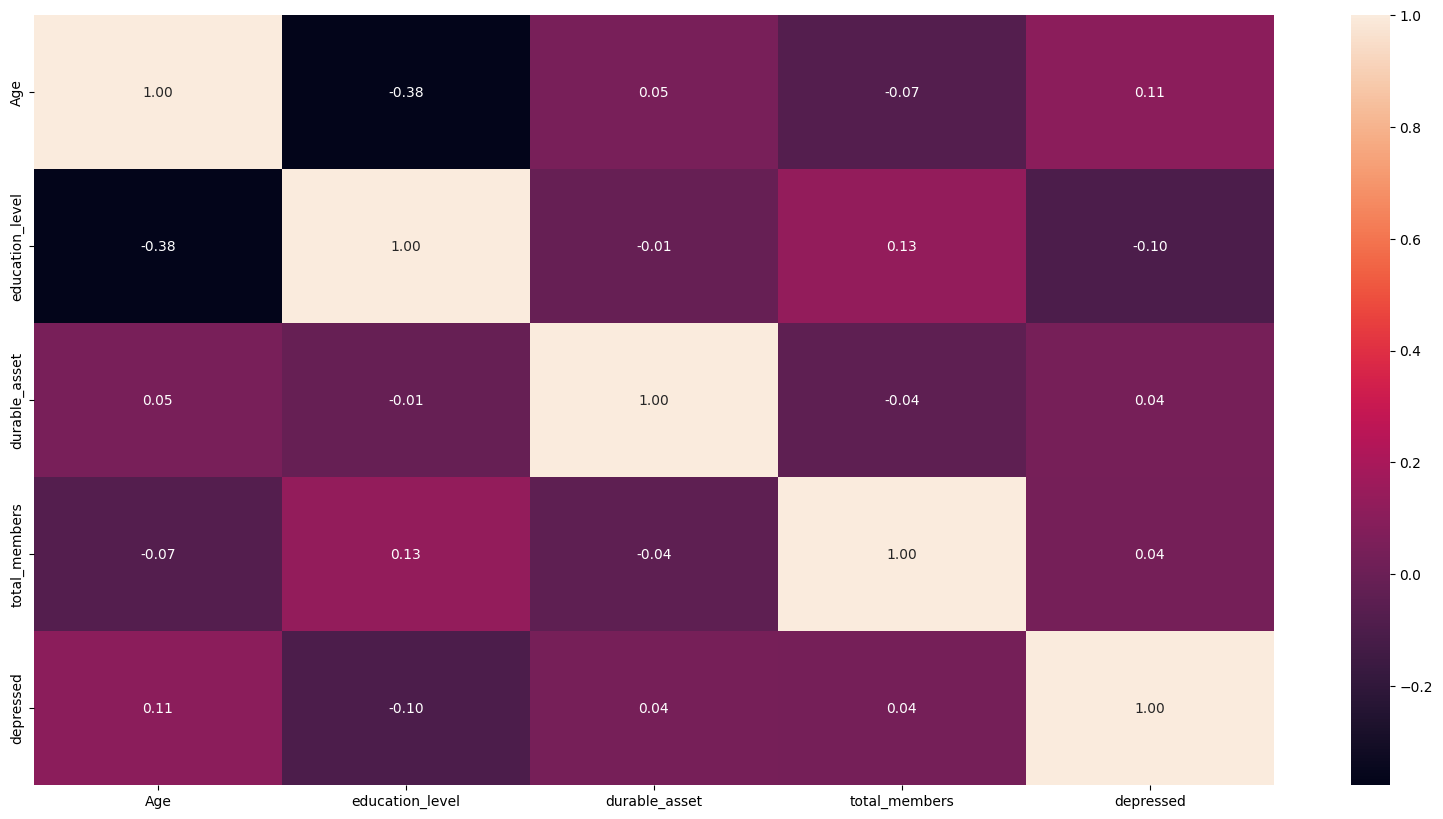

In [ ]:
data = df[['Age', 'education_level', 'durable_asset',  'total_members', 'depressed']]
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot = True, fmt = ".2f")
plt.show()

Wykres relacji par atrybutów wykazuje brak wyraźnych skupisk osób chorych na depresję.
Dane chorych są w większości równomiernie rozłożone.

Wykres punktowy dla wszystkich par zmiennych w data, gdzie dane są kolorowane w zależności od stanu depresji ('depressed'). Parametr plot_kws={'alpha':0.2} dodaje lekką przezroczystość punktom na wykresie, co ułatwia zobaczenie obszarów o większym zagęszczeniu punktów.

<Figure size 2500x600 with 0 Axes>

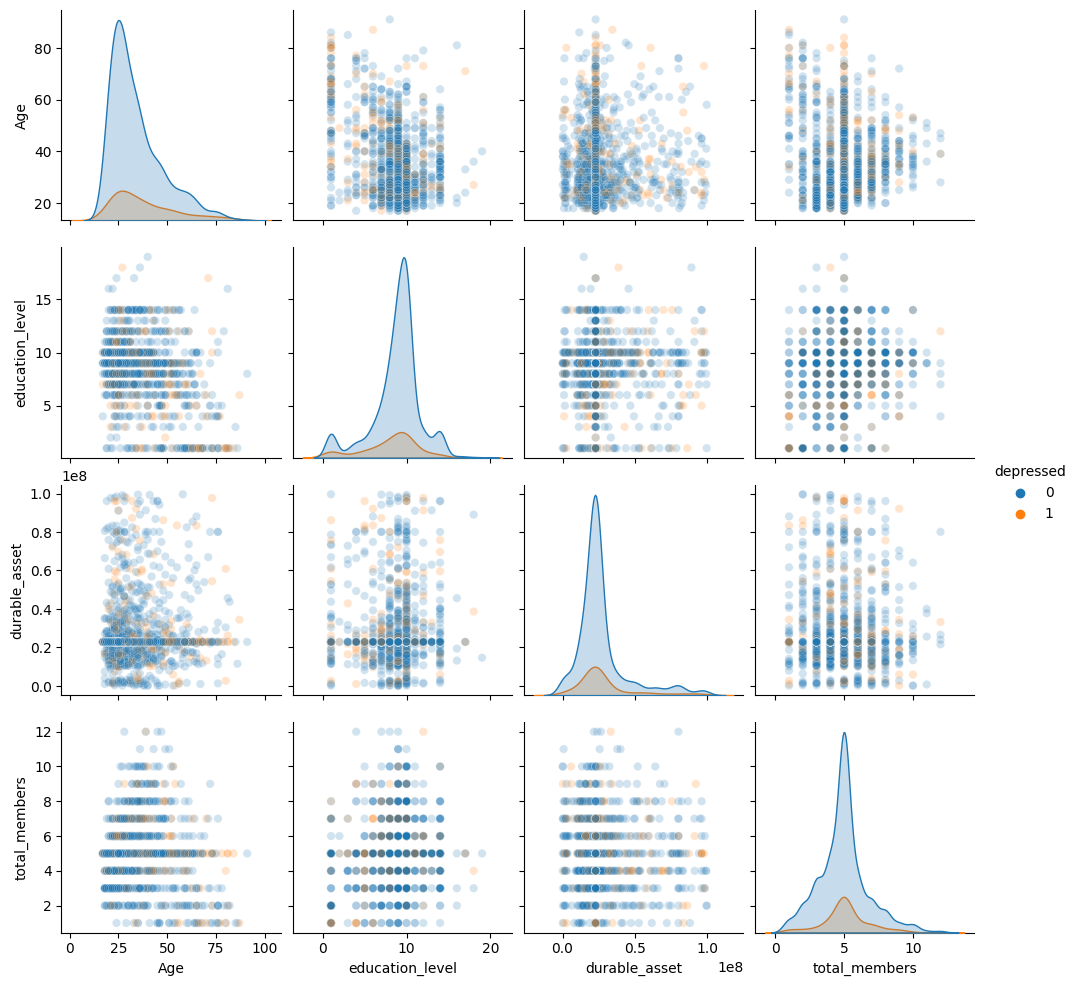

In [ ]:
plt.figure(figsize=(25,6))
sns.pairplot(data=data,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

## Elementy nietypowe 1D

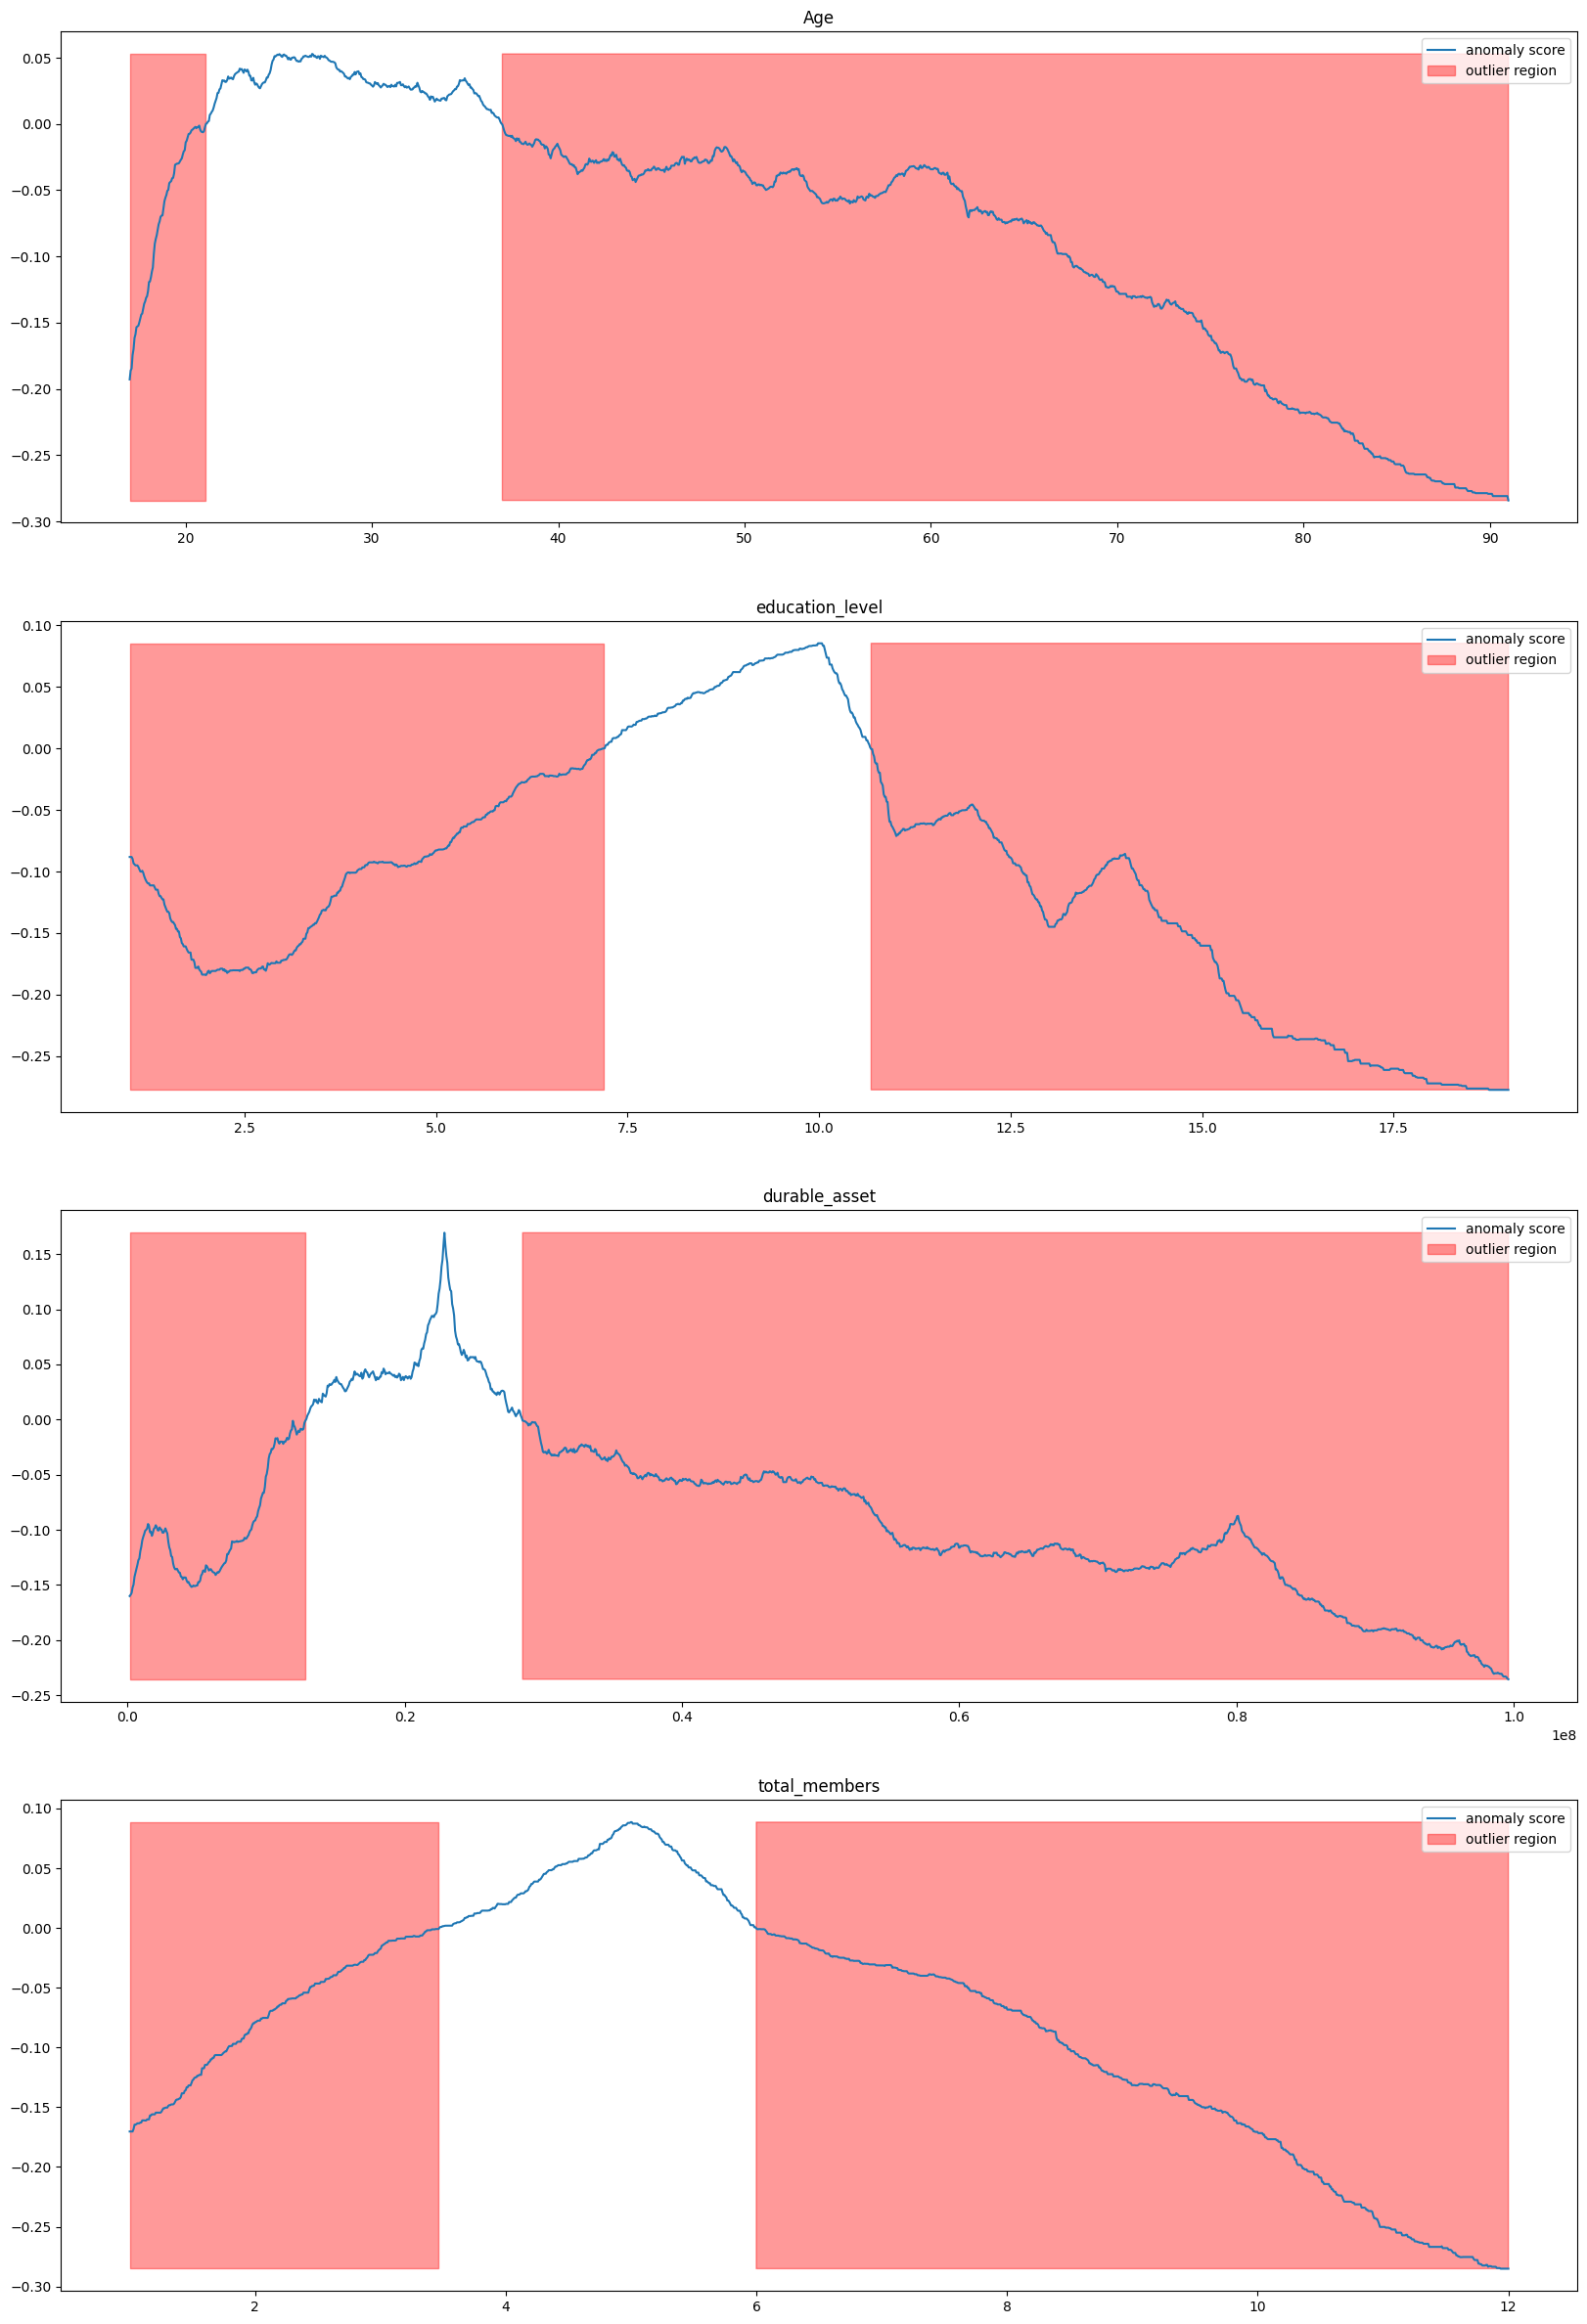

In [ ]:
from sklearn.ensemble import IsolationForest

fig, axs = plt.subplots(4, 1, figsize=(20, 30), facecolor='w', edgecolor='k')
axs = axs.ravel()

cols = ['Age', 'education_level', 'durable_asset', 'total_members']
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(data[column].values.reshape(-1,1))

    xx = np.linspace(data[column].min(), data[column].max(), len(data)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                     where=outlier==-1, color='r',
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

nietypowe 1d chorzy

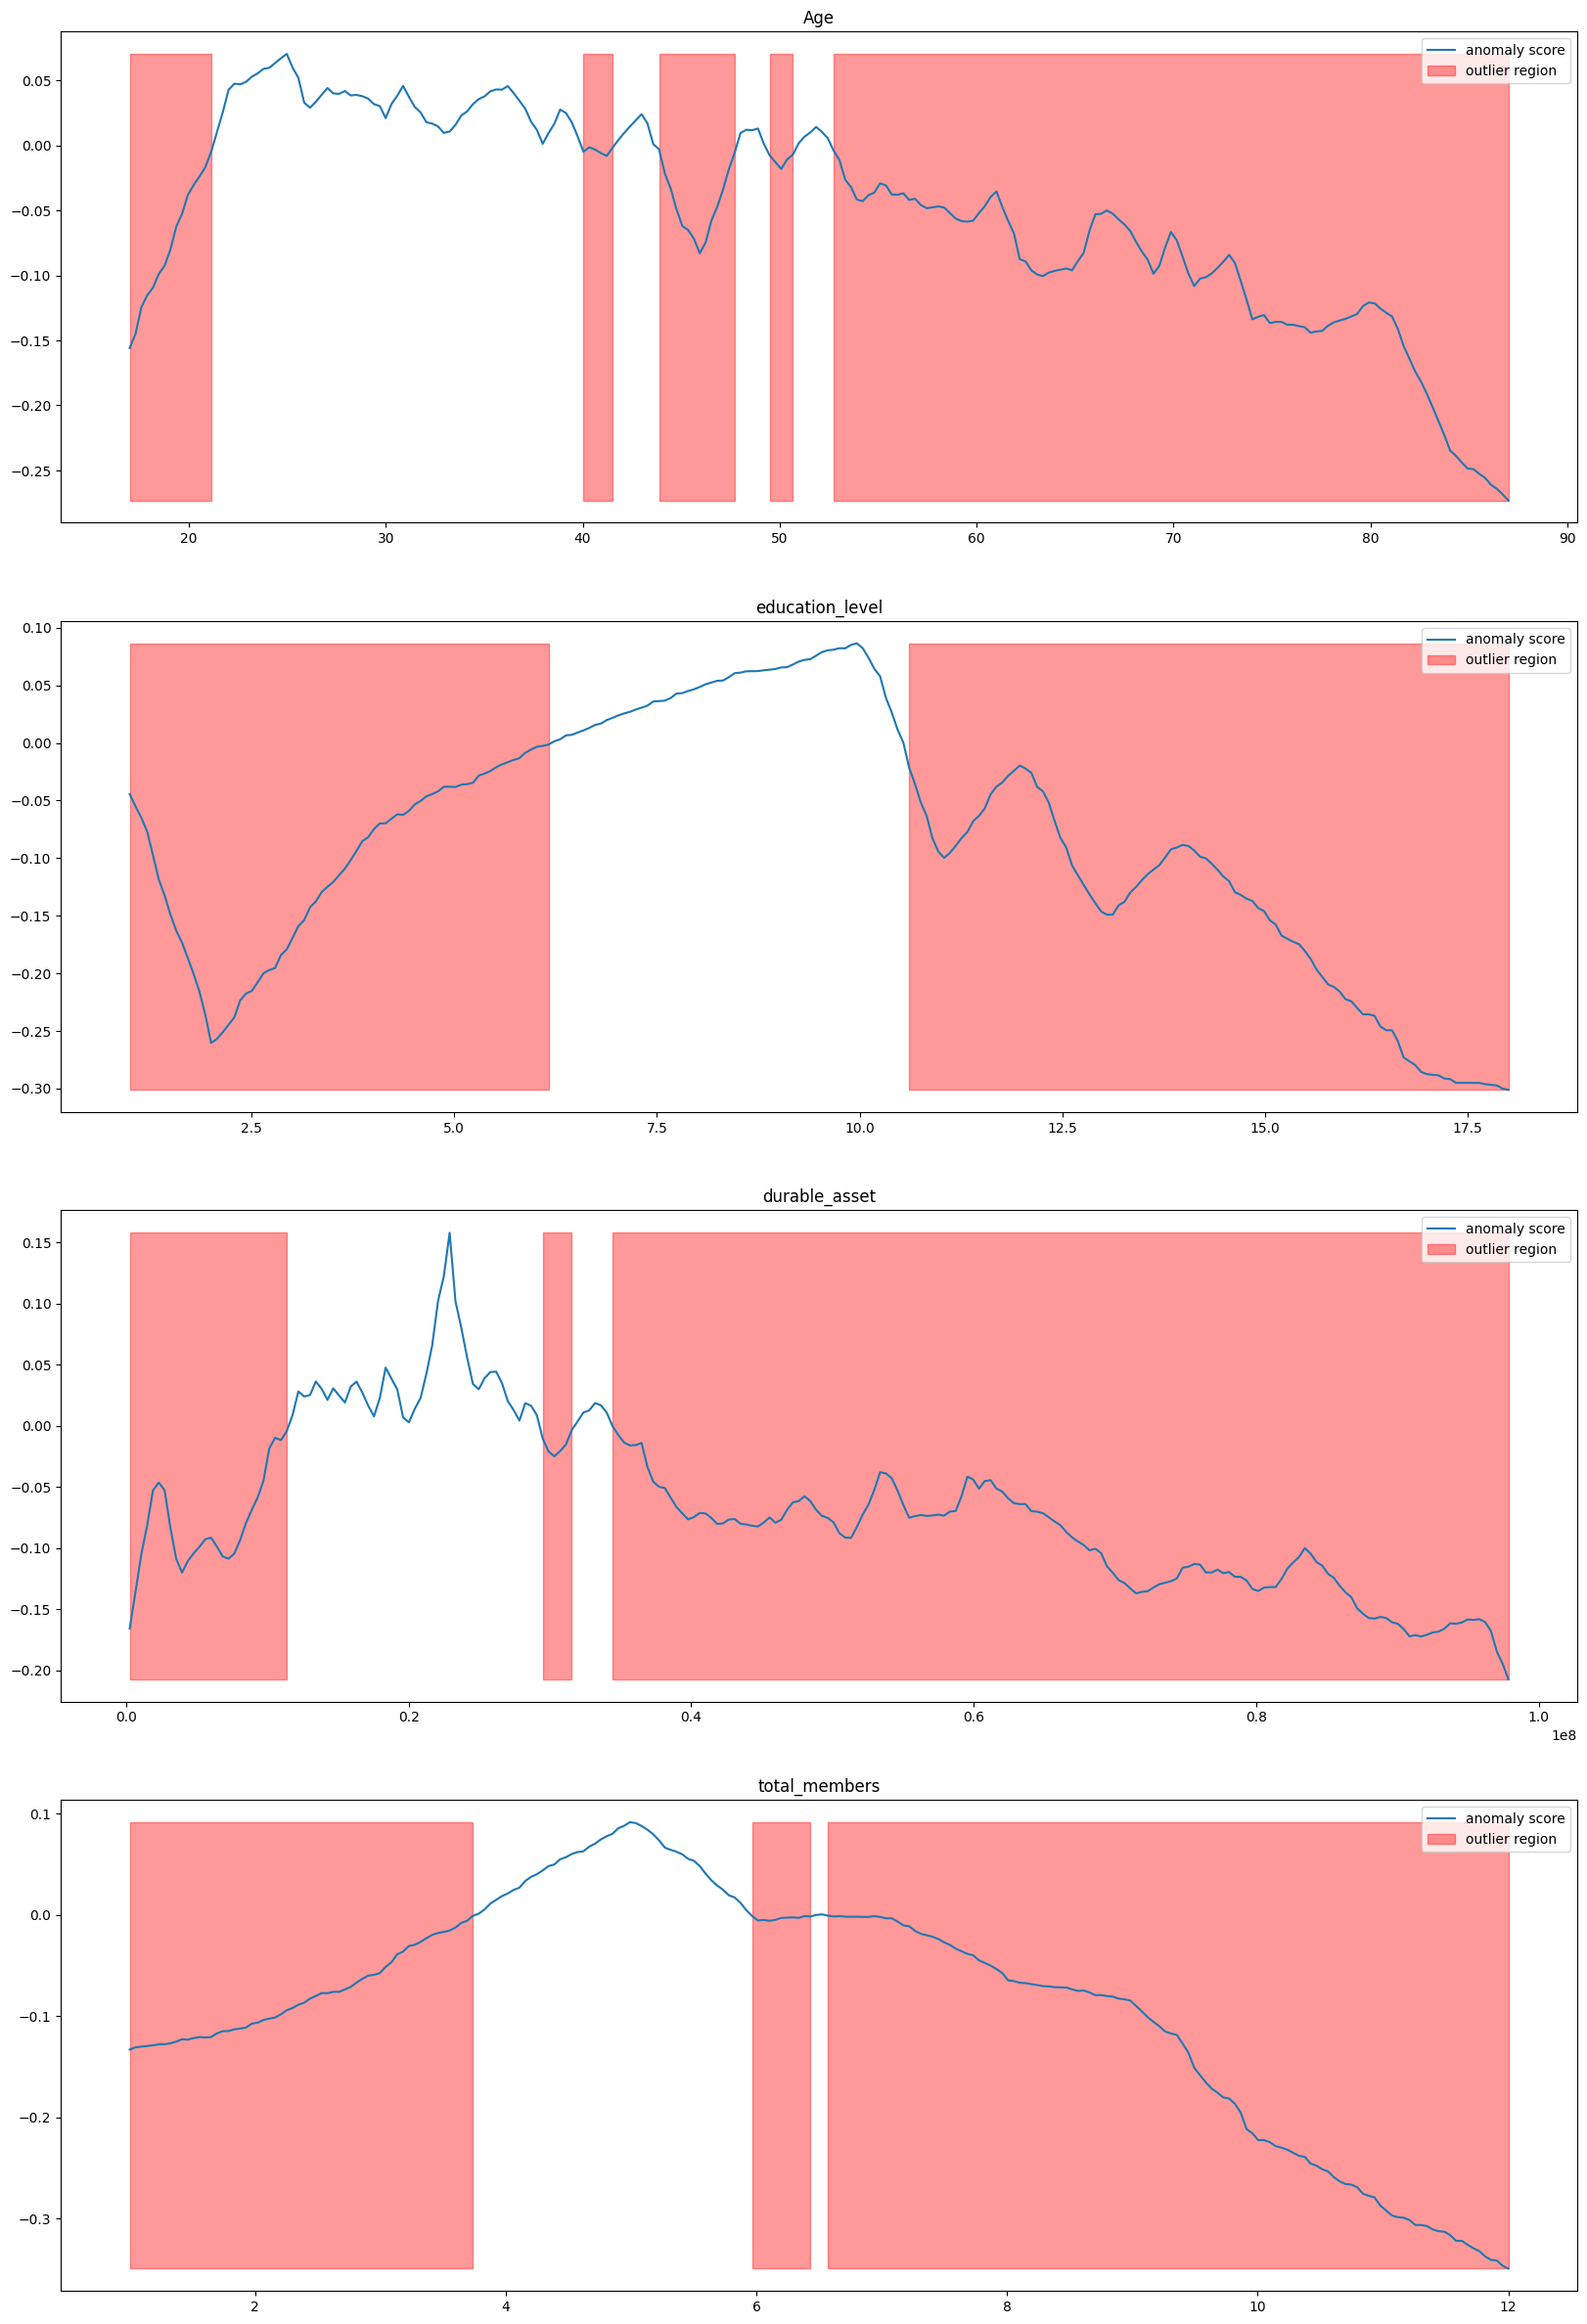

In [ ]:
from sklearn.ensemble import IsolationForest

fig, axs = plt.subplots(4, 1, figsize=(20, 30), facecolor='w', edgecolor='k')
axs = axs.ravel()
data2 = data.loc[data['depressed'] == 1]

cols = ['Age', 'education_level', 'durable_asset', 'total_members']
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(data2[column].values.reshape(-1,1))

    xx = np.linspace(data2[column].min(), data2[column].max(), len(data2)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                     where=outlier==-1, color='r',
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

nietypowe 2d dbscan

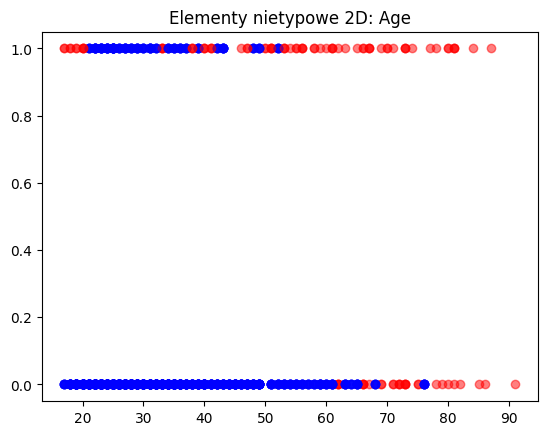

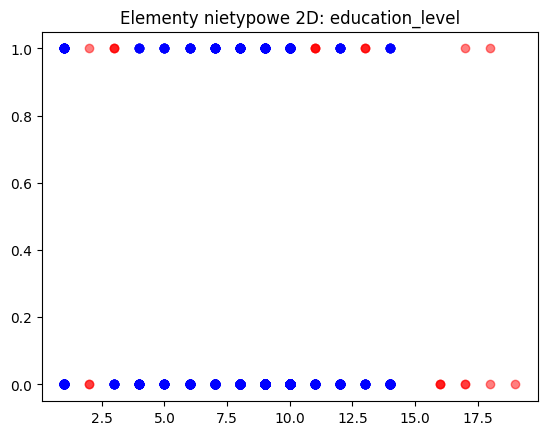

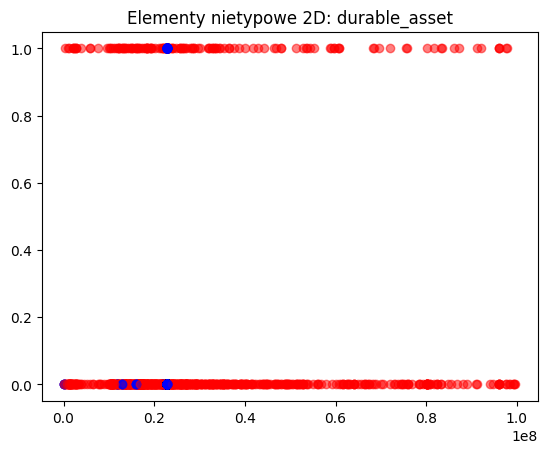

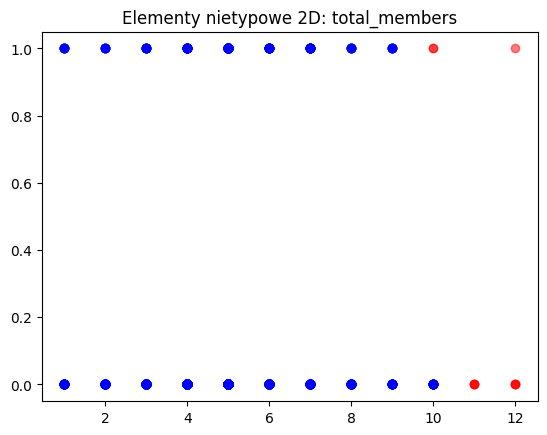

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

cols = ['Age', 'education_level', 'durable_asset', 'total_members']

for c in cols:
  cell = 75
  data = df[[c, 'depressed']].to_numpy()
  clusters = DBSCAN().fit(data)

  res = clusters.labels_
  typowe=[]
  nietypowe=[]
  for i, d in enumerate(data):
    if res[i] == -1:
      plt.scatter(d[0], d[1], c='r', alpha=0.5)
      nietypowe.append(d)
    else:
      plt.scatter(d[0], d[1], c='b', alpha=0.5)
      typowe.append(d)
  plt.title(f'Elementy nietypowe 2D: {c}')
  plt.show()

nietypowe wszyscy

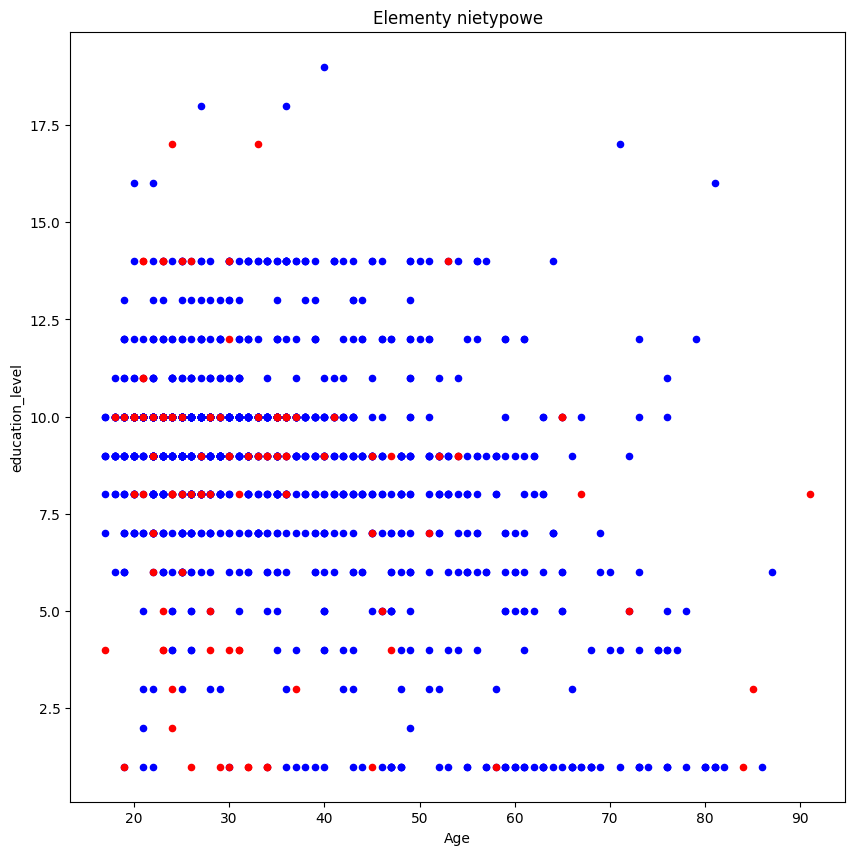

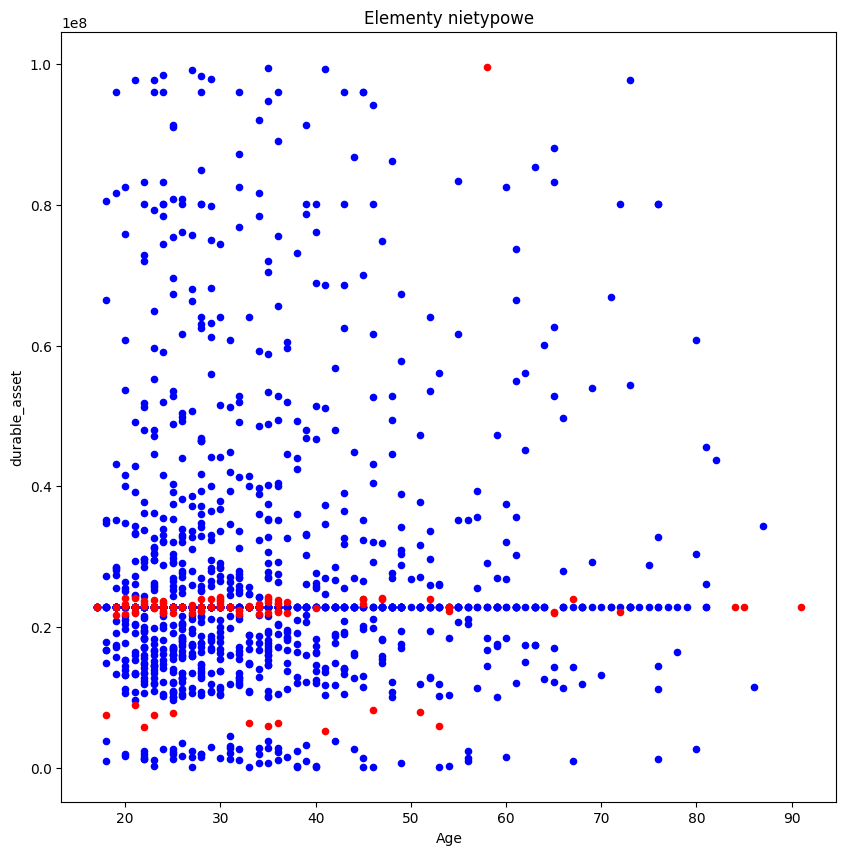

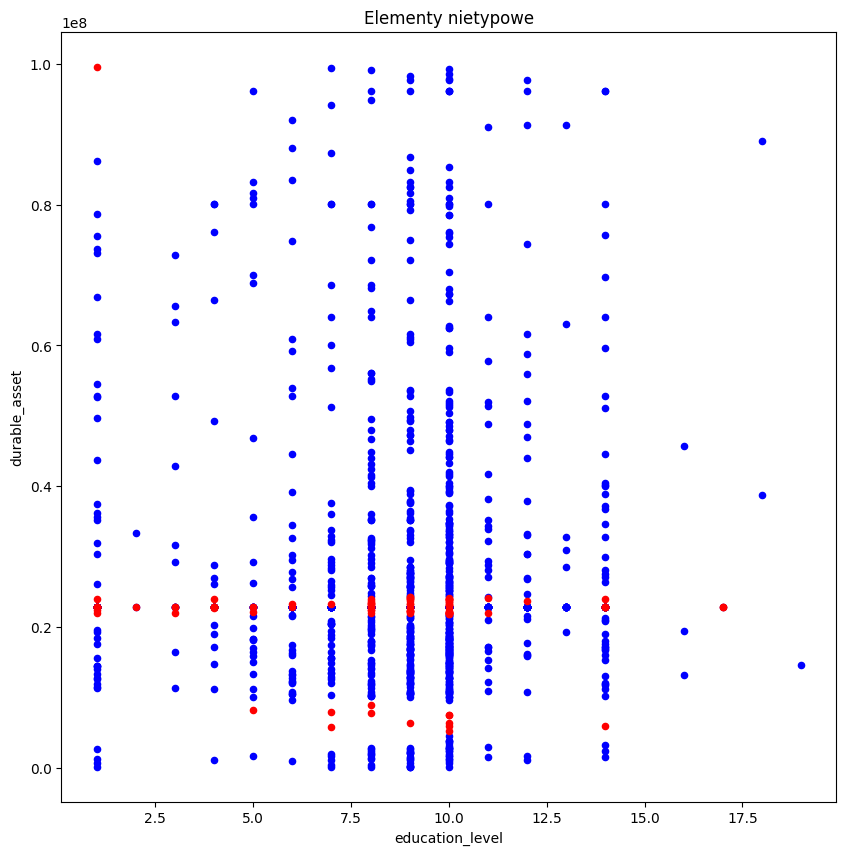

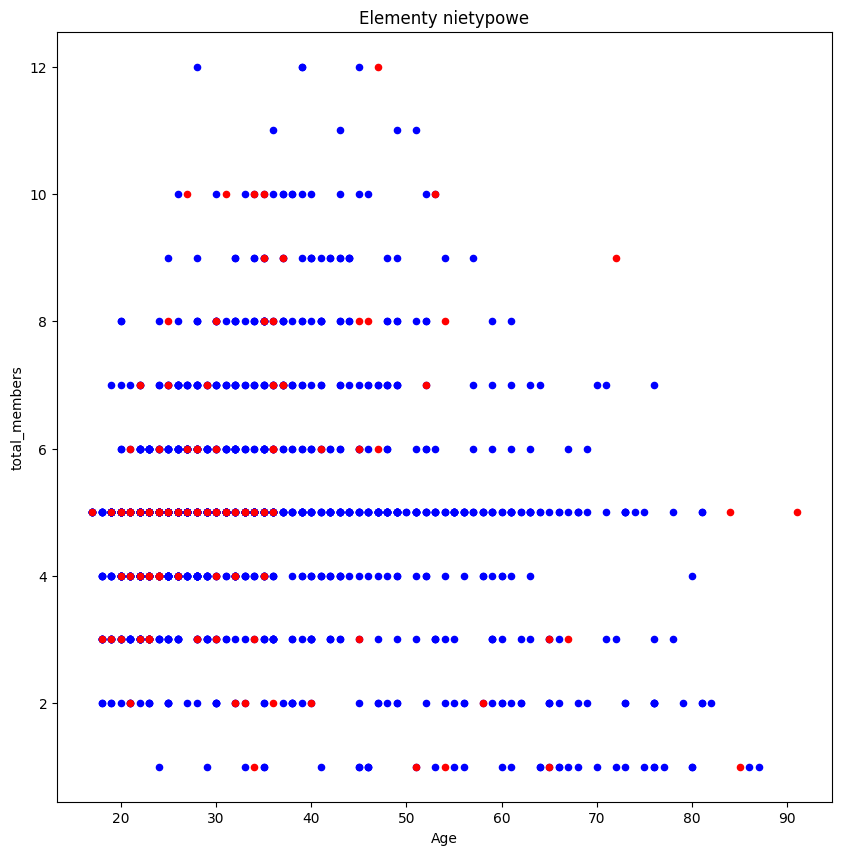

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
data = df[['Age', 'education_level', 'durable_asset',  'total_members', 'depressed']]
data2 = data.to_numpy()
contamination = 0.01
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(data2[:,:4])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age')
plt.ylabel('education_level')
plt.title('Elementy nietypowe')
plt.show()

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 2], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 2], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age')
plt.ylabel('durable_asset')
plt.title('Elementy nietypowe')
plt.show()

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 1], data2[in_mask, 2], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 1], data2[out_mask, 2], c='red', s=20)
plt.axis('tight')
plt.xlabel('education_level')
plt.ylabel('durable_asset')
plt.title('Elementy nietypowe')
plt.show()

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 3], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 3], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age')
plt.ylabel('total_members')
plt.title('Elementy nietypowe')
plt.show()

nietypowe 3d

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import plotly.express as px

data2 = df[['Age', 'education_level', 'durable_asset', 'depressed']].to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(data2[:,:3])

data3 = np.c_[data2, y_pred]
dataset = pd.DataFrame({'Age': data3[:, 0], 'education_level': data3[:, 1], 'durable_asset': data3[:, 2], 'depressed': data3[:, 3], 'outlier': data3[:, 4]})

print(dataset)

def scatter_clusters_3d(pcadf, attr1 = "attribute1", attr2 = "attribute2", attr3 = "attribute3", stitle = ''):
  df = pcadf.copy()
  fig = px.scatter_3d(df, x=attr1, y=attr2, z=attr3, color='outlier', symbol='depressed')
  fig.show()

scatter_clusters_3d(dataset, 'Age', 'education_level', 'durable_asset')

      Age  education_level  durable_asset  depressed  outlier
0      28               10       22861940          0        1
1      23                8       22861940          1        1
2      22                9       22861940          0        1
3      27               10       19698904          0        1
4      59               10       17352654          0        1
...   ...              ...            ...        ...      ...
1424   25                7       22861940          0        1
1425   28               10       24023054          0       -1
1426   66                1       22861940          1        1
1427   51               12       22861940          0        1
1428   33                8       22861940          0        1

[1429 rows x 5 columns]


## Elementy nietypowe: Sami chorzy

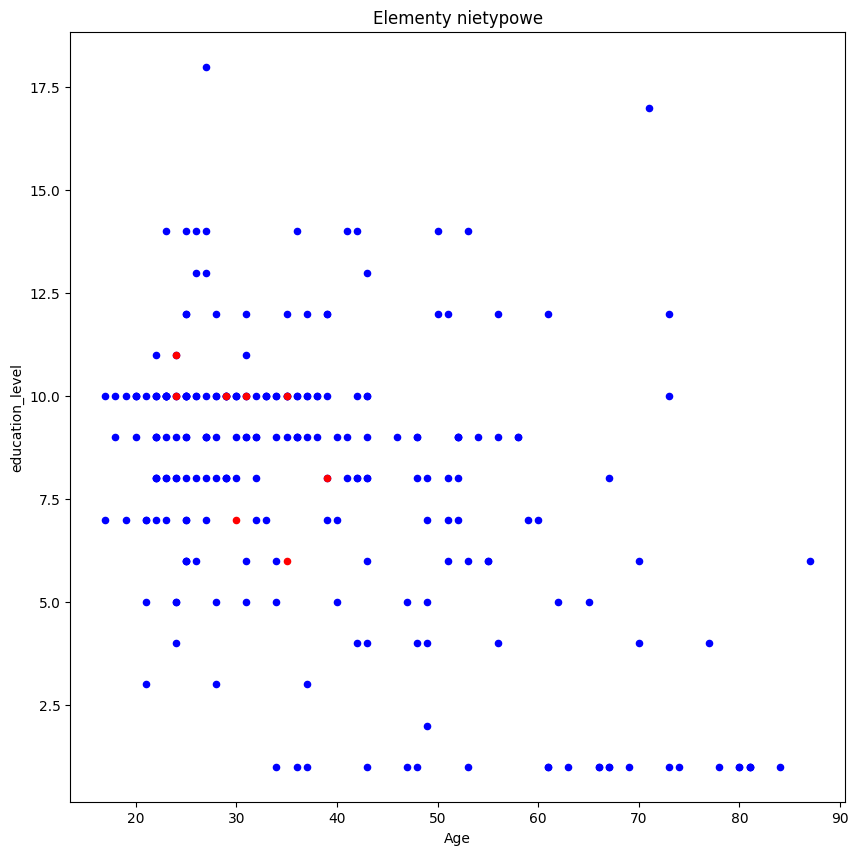

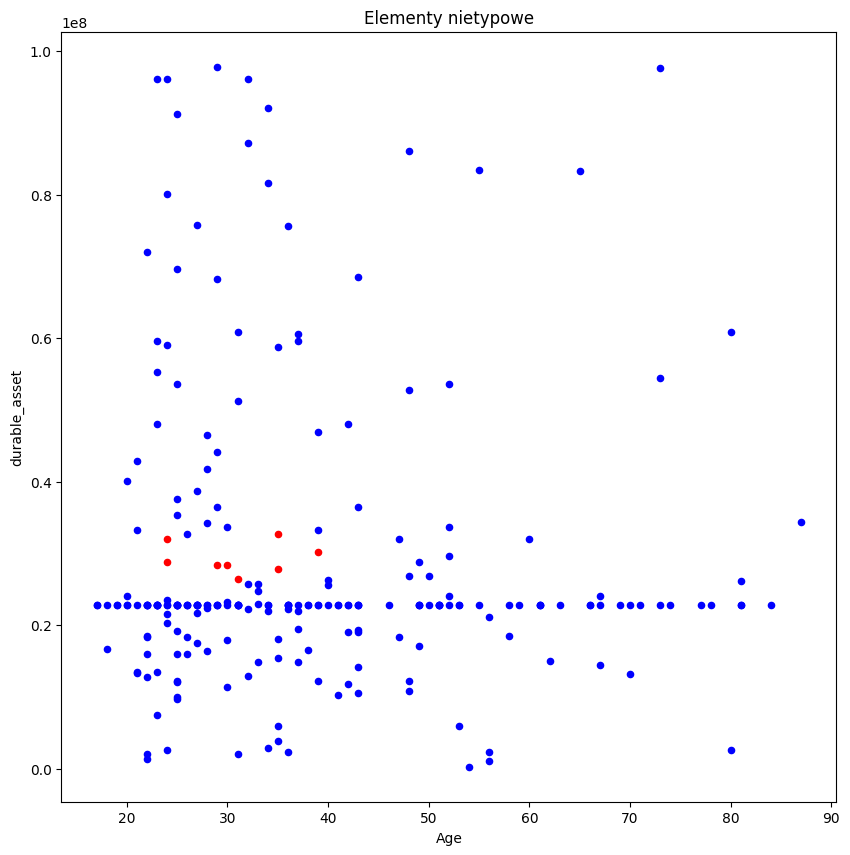

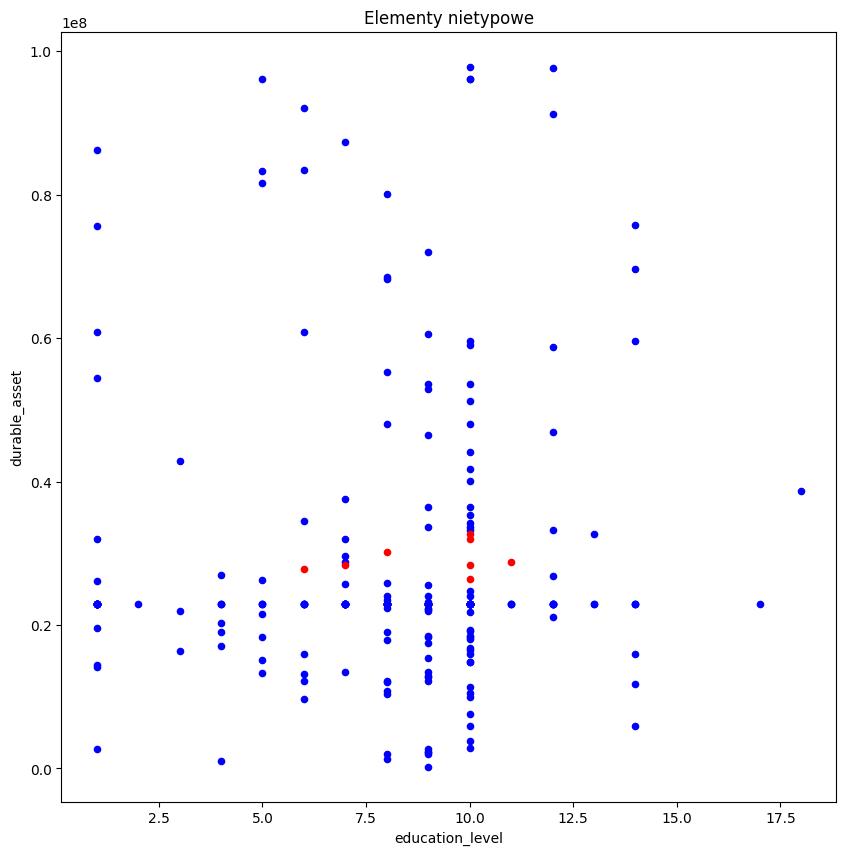

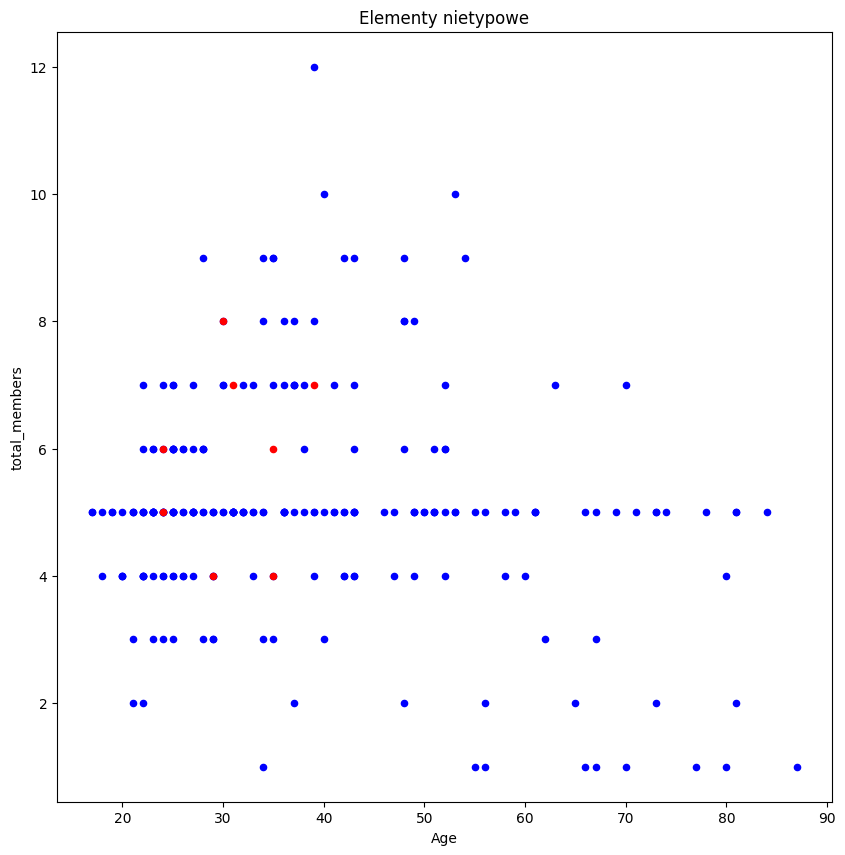

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

data2 = data.loc[data['depressed'] == 1]
data2 = data2.to_numpy()
contamination = 0.03
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
y_pred = clf.fit_predict(data2[:,:4])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age')
plt.ylabel('education_level')
plt.title('Elementy nietypowe')
plt.show()

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 2], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 2], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age')
plt.ylabel('durable_asset')
plt.title('Elementy nietypowe')
plt.show()

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 1], data2[in_mask, 2], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 1], data2[out_mask, 2], c='red', s=20)
plt.axis('tight')
plt.xlabel('education_level')
plt.ylabel('durable_asset')
plt.title('Elementy nietypowe')
plt.show()

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 3], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 3], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age')
plt.ylabel('total_members')
plt.title('Elementy nietypowe')
plt.show()

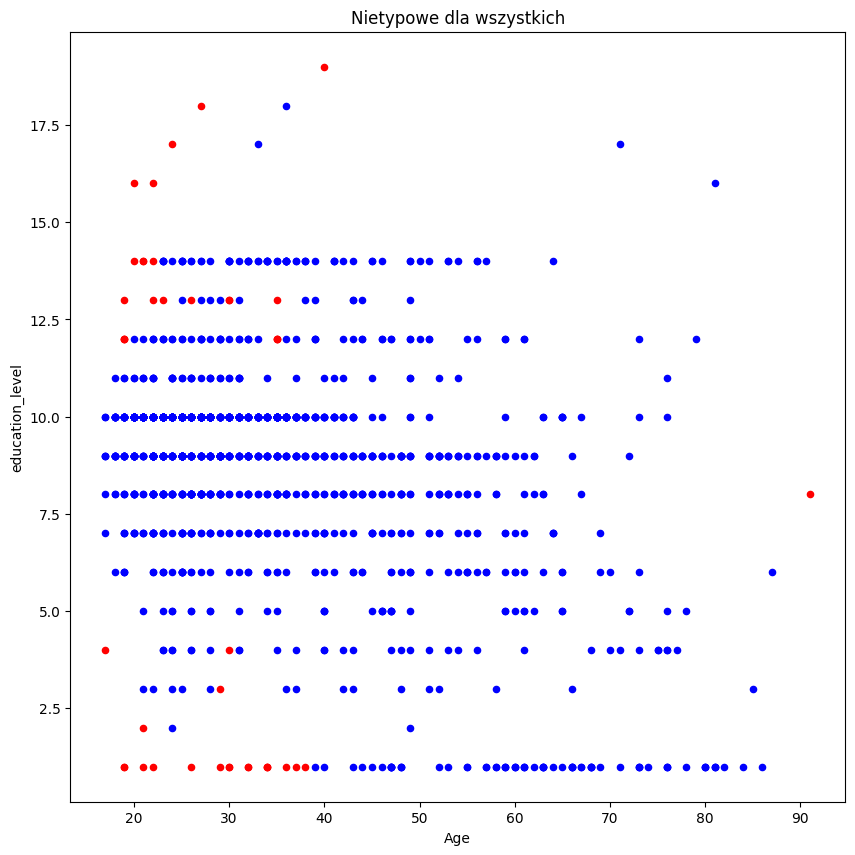

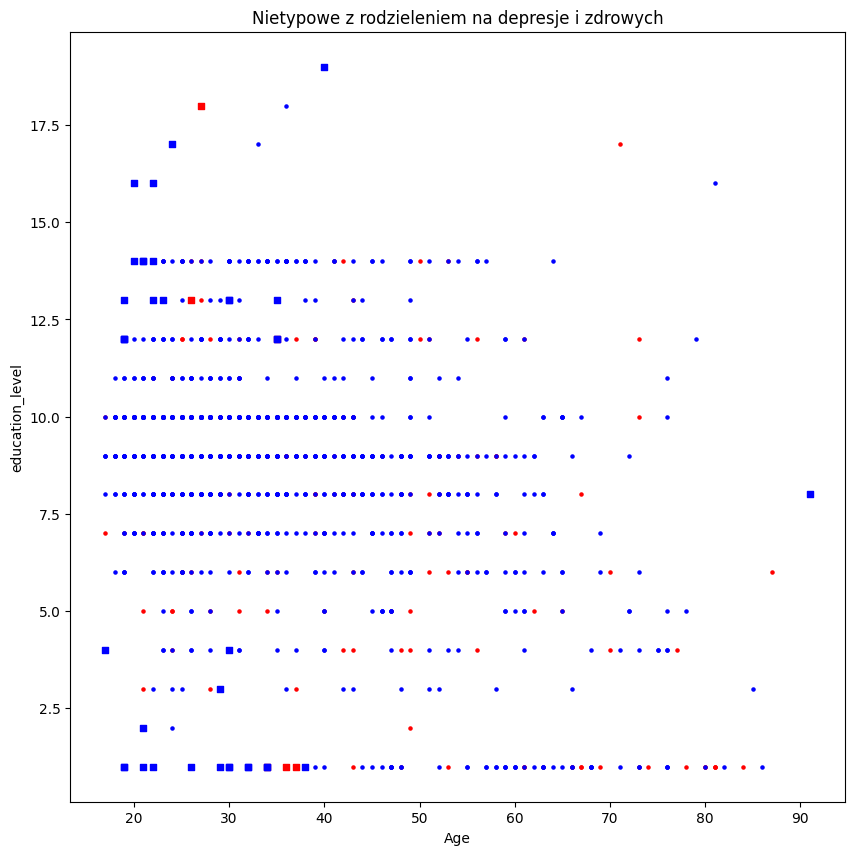

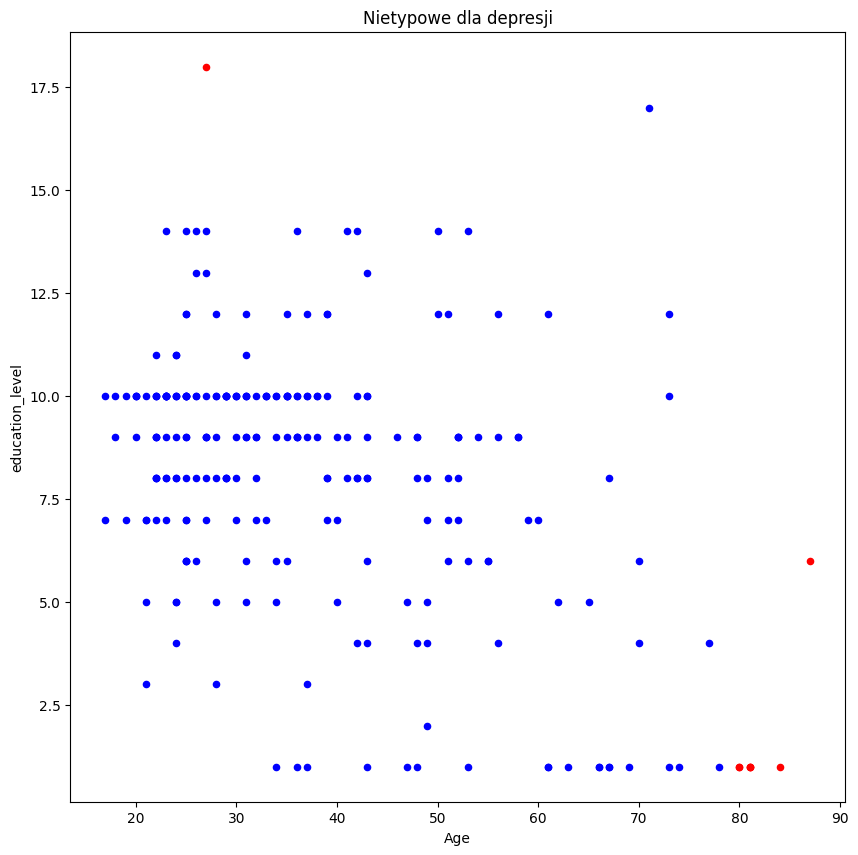

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

contamination = 0.03

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
y_pred = clf.fit_predict([[d[0], d[1]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe dla wszystkich')
plt.show()

inliers = data2[in_mask]
depressed_inliers = inliers[np.where(inliers[:,-1] == 1)]
healthy_inliers = inliers[np.where(inliers[:,-1] == 0)]
outliers = data2[out_mask]
depressed_outliers = outliers[np.where(outliers[:,-1] == 1)]
healthy_outliers = outliers[np.where(outliers[:,-1] == 0)]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(depressed_inliers[:,0], depressed_inliers[:,1], c='red', s=20, marker='.')
b = plt.scatter(healthy_inliers[:,0], healthy_inliers[:,1], c='blue', s=20, marker='.')
# outliers
c = plt.scatter(depressed_outliers[:,0], depressed_outliers[:,1], c='red', s=20, marker=',')
d = plt.scatter(healthy_outliers[:,0], healthy_outliers[:,1], c='blue', s=20, marker=',')
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe z rodzieleniem na depresje i zdrowych')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
data2 = data2[np.where(data2[:,-1] == 1)]
y_pred = clf.fit_predict([[d[0], d[1]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe dla depresji')
plt.show()

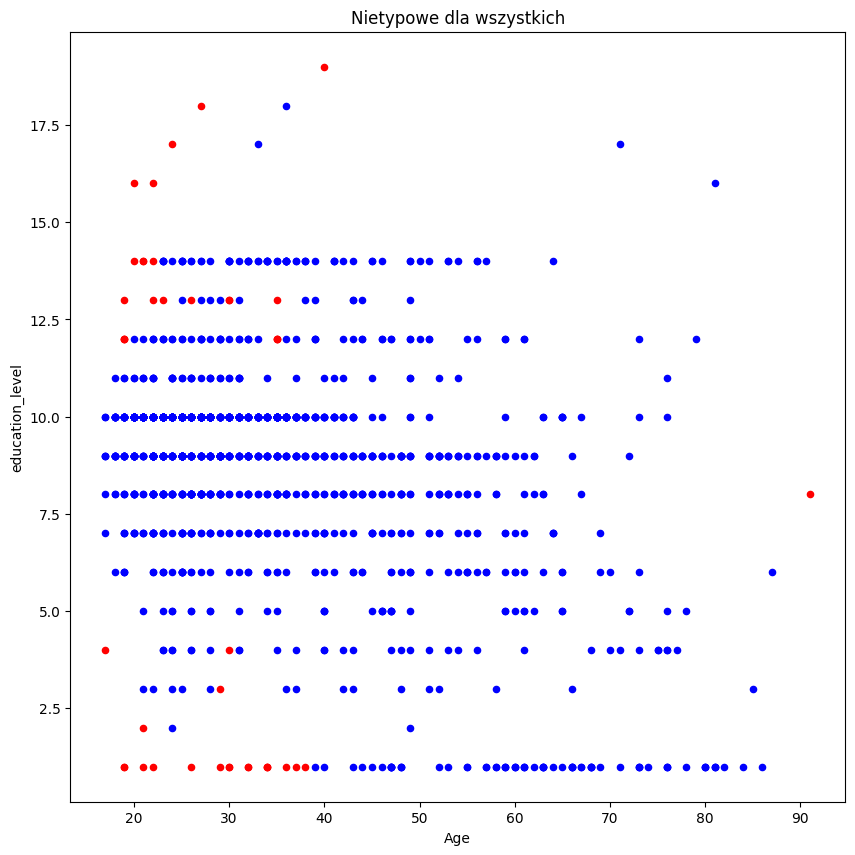

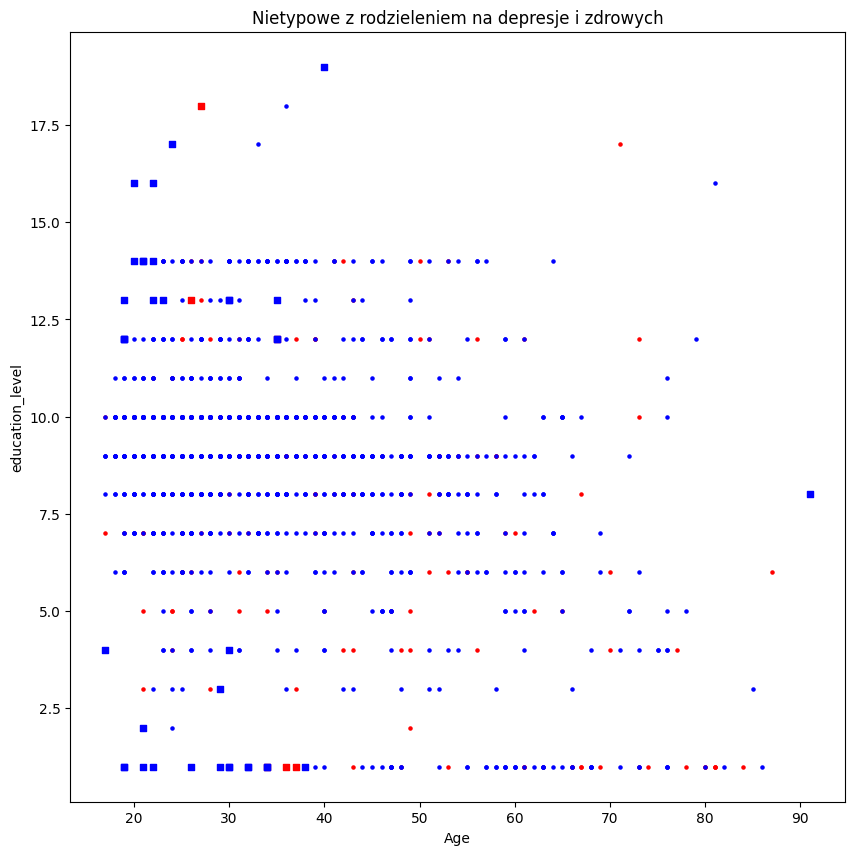

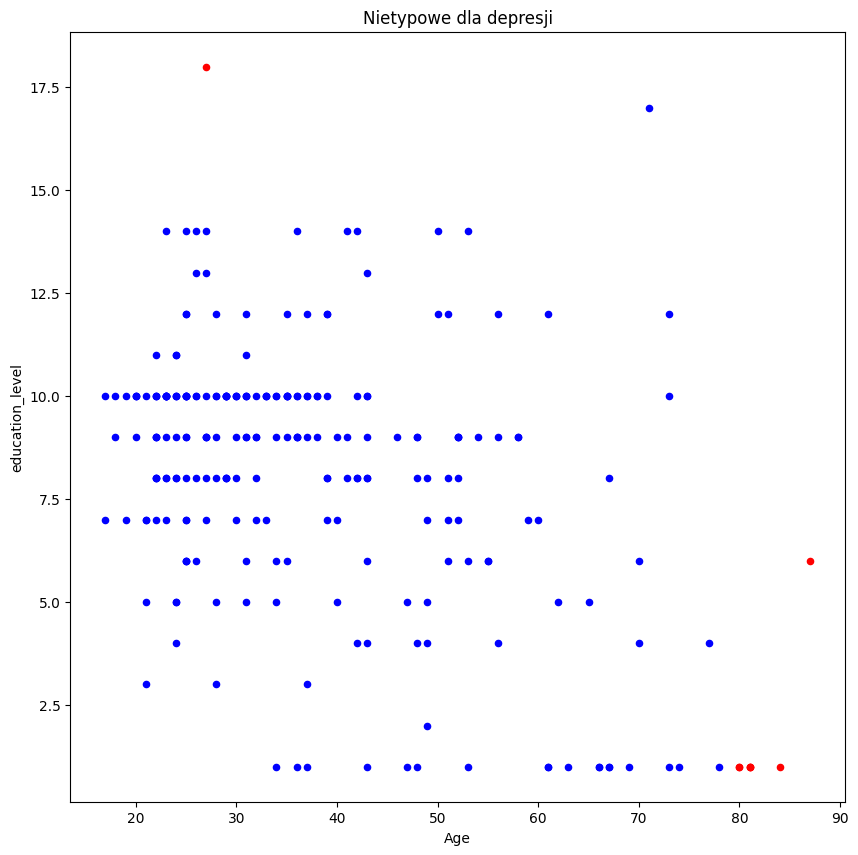

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

contamination = 0.03

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
y_pred = clf.fit_predict([[d[0], d[1]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe dla wszystkich')
plt.show()

inliers = data2[in_mask]
depressed_inliers = inliers[np.where(inliers[:,-1] == 1)]
healthy_inliers = inliers[np.where(inliers[:,-1] == 0)]
outliers = data2[out_mask]
depressed_outliers = outliers[np.where(outliers[:,-1] == 1)]
healthy_outliers = outliers[np.where(outliers[:,-1] == 0)]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(depressed_inliers[:,0], depressed_inliers[:,1], c='red', s=20, marker='.')
b = plt.scatter(healthy_inliers[:,0], healthy_inliers[:,1], c='blue', s=20, marker='.')
# outliers
c = plt.scatter(depressed_outliers[:,0], depressed_outliers[:,1], c='red', s=20, marker=',')
d = plt.scatter(healthy_outliers[:,0], healthy_outliers[:,1], c='blue', s=20, marker=',')
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe z rodzieleniem na depresje i zdrowych')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
data2 = data2[np.where(data2[:,-1] == 1)]
y_pred = clf.fit_predict([[d[0], d[1]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe dla depresji')
plt.show()

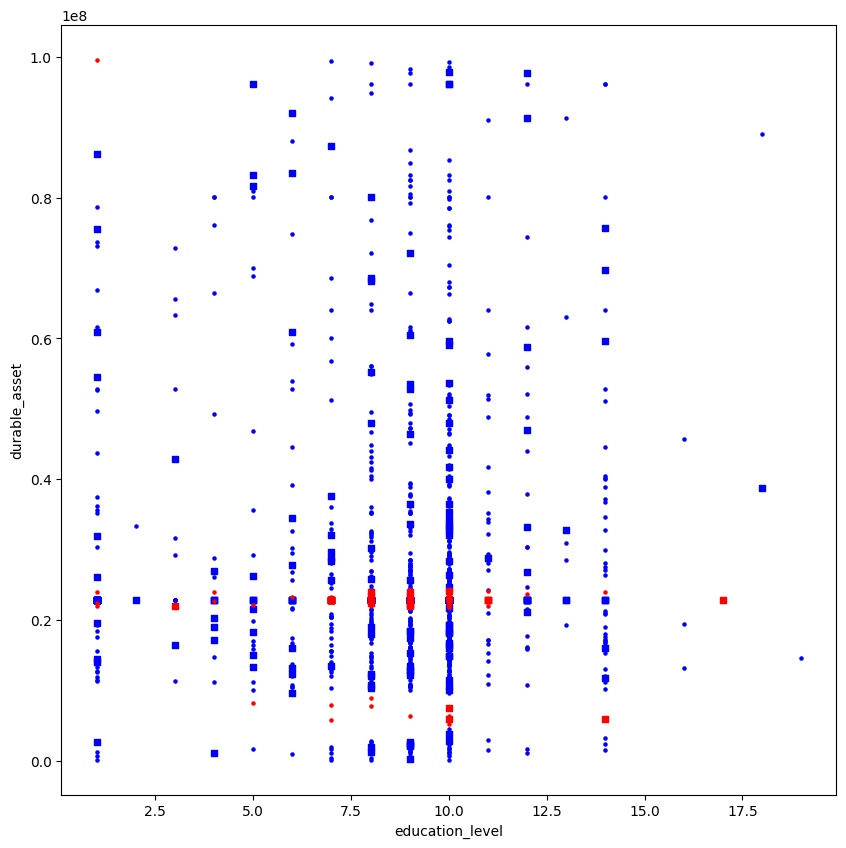

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict([[d[1], d[2]] for d in data2])

plt.figure(figsize=(10,10))

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

inliers = data2[in_mask]
depressed_inliers = inliers[np.where(inliers[:,-1] == 1)]
healthy_inliers = inliers[np.where(inliers[:,-1] == 0)]
outliers = data2[out_mask]
depressed_outliers = outliers[np.where(outliers[:,-1] == 1)]
healthy_outliers = outliers[np.where(outliers[:,-1] == 0)]

# inliers
a = plt.scatter(depressed_inliers[:,1], depressed_inliers[:,2], c='blue', s=20, marker=',')
b = plt.scatter(healthy_inliers[:,1], healthy_inliers[:,2], c='blue', s=20, marker='.')
# outliers
c = plt.scatter(depressed_outliers[:,1], depressed_outliers[:,2], c='red', s=20, marker=',')
d = plt.scatter(healthy_outliers[:,1], healthy_outliers[:,2], c='red', s=20, marker='.')

plt.axis('tight')
plt.xlabel('education_level');
plt.ylabel('durable_asset');
plt.show()

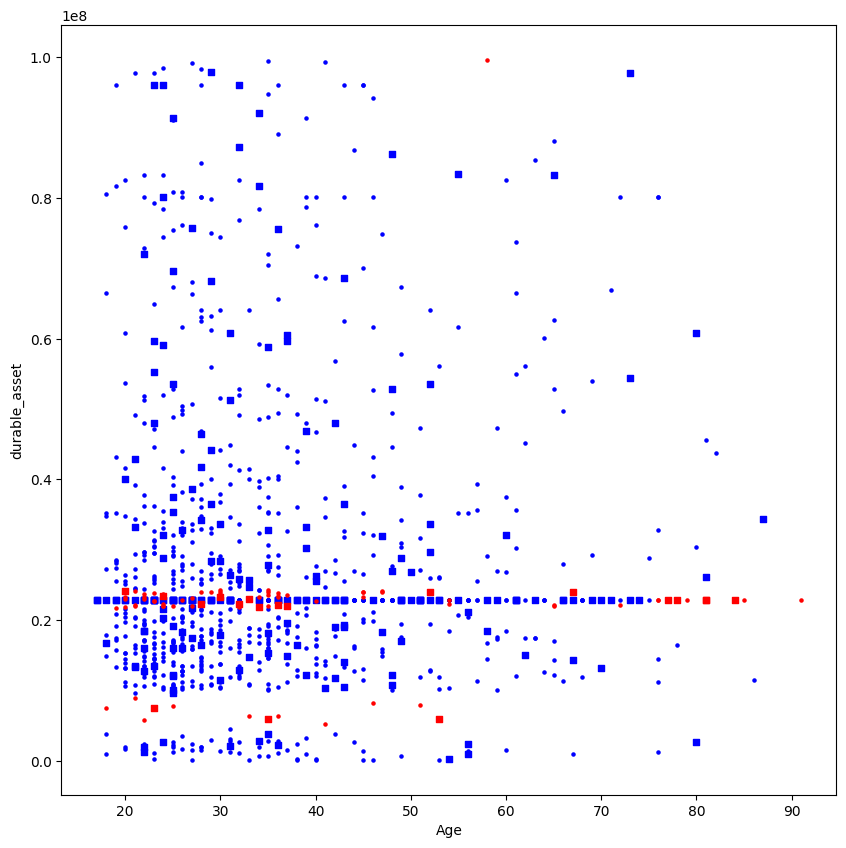

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

contamination = 0.03

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict([[d[0], d[2]] for d in data2])

plt.figure(figsize=(10,10))
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-3, 14, num=200), np.linspace(-3, 18, num=200))

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

inliers = data2[in_mask]
depressed_inliers = inliers[np.where(inliers[:,-1] == 1)]
healthy_inliers = inliers[np.where(inliers[:,-1] == 0)]
outliers = data2[out_mask]
depressed_outliers = outliers[np.where(outliers[:,-1] == 1)]
healthy_outliers = outliers[np.where(outliers[:,-1] == 0)]

# inliers
a = plt.scatter(depressed_inliers[:,0], depressed_inliers[:,2], c='blue', s=20, marker=',')
b = plt.scatter(healthy_inliers[:,0], healthy_inliers[:,2], c='blue', s=20, marker='.')
# outliers
c = plt.scatter(depressed_outliers[:,0], depressed_outliers[:,2], c='red', s=20, marker=',')
d = plt.scatter(healthy_outliers[:,0], healthy_outliers[:,2], c='red', s=20, marker='.')

plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('durable_asset');
plt.show()

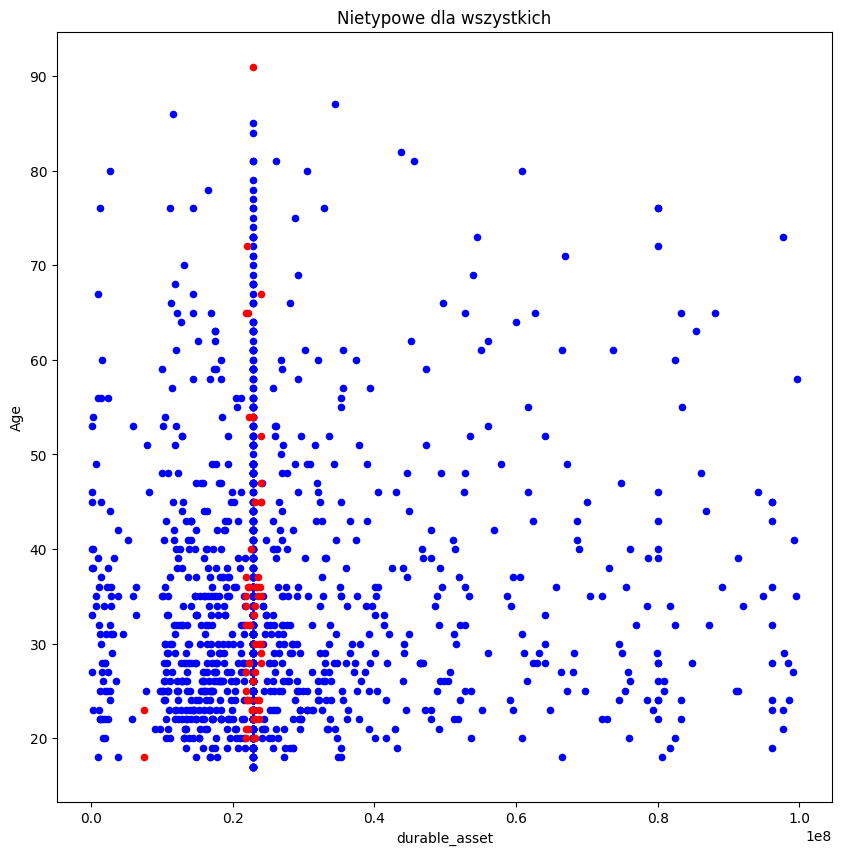

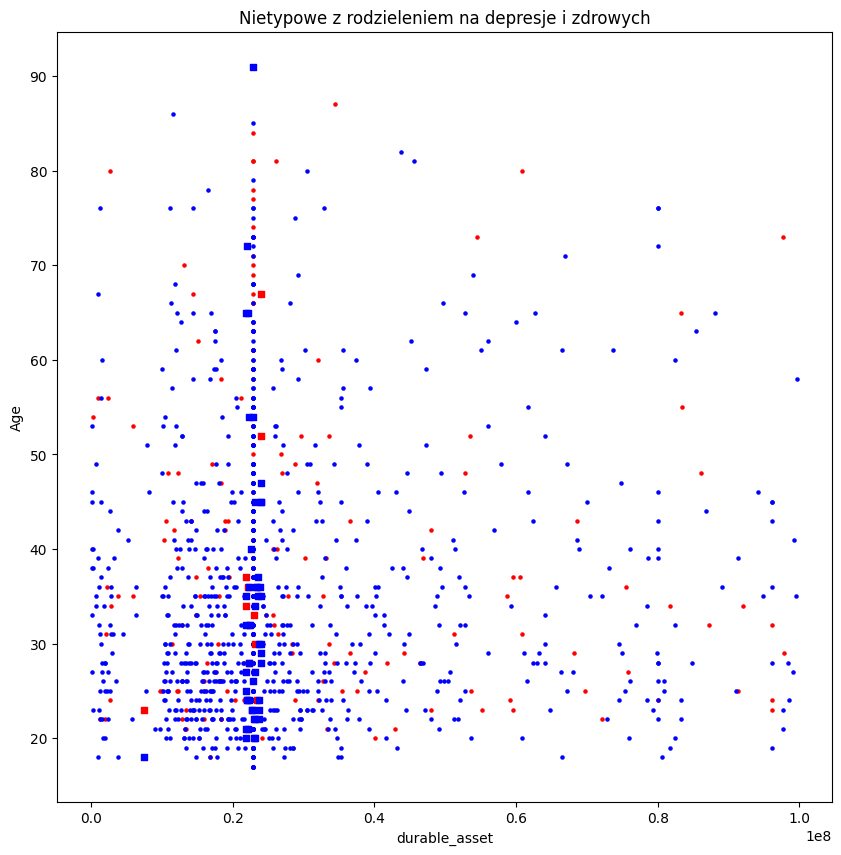

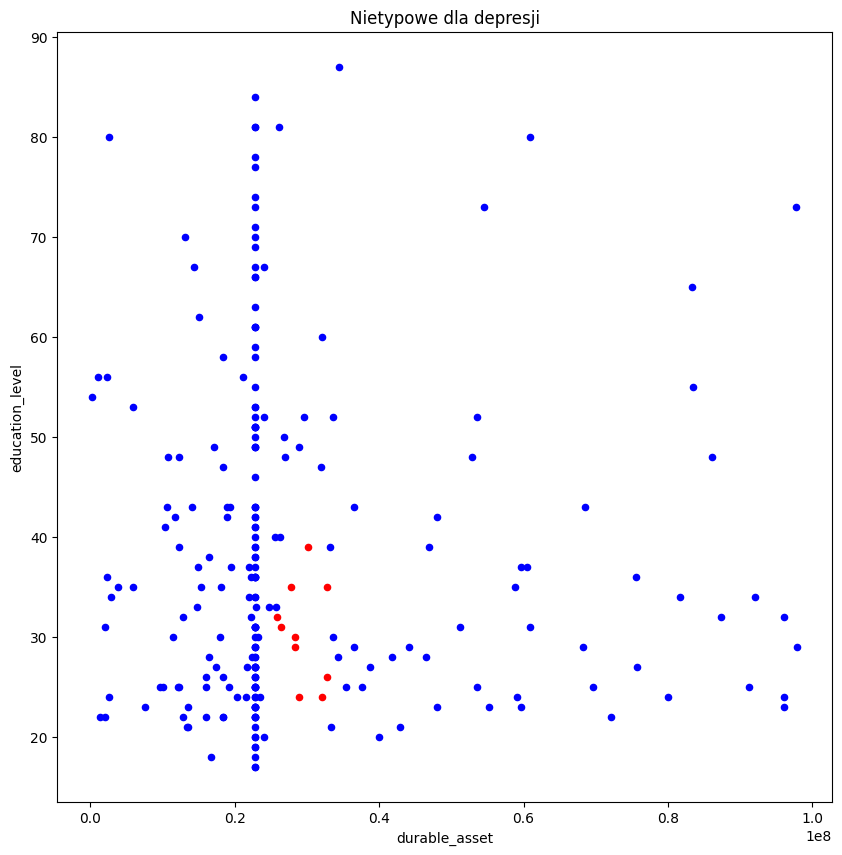

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

contamination = 0.04

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
y_pred = clf.fit_predict([[d[2], d[0]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 2], data2[in_mask, 0], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 2], data2[out_mask, 0], c='red', s=20)
plt.axis('tight')
plt.xlabel('durable_asset');
plt.ylabel('Age');
plt.title('Nietypowe dla wszystkich')
plt.show()

inliers = data2[in_mask]
depressed_inliers = inliers[np.where(inliers[:,-1] == 1)]
healthy_inliers = inliers[np.where(inliers[:,-1] == 0)]
outliers = data2[out_mask]
depressed_outliers = outliers[np.where(outliers[:,-1] == 1)]
healthy_outliers = outliers[np.where(outliers[:,-1] == 0)]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(depressed_inliers[:,2], depressed_inliers[:,0], c='red', s=20, marker='.')
b = plt.scatter(healthy_inliers[:,2], healthy_inliers[:,0], c='blue', s=20, marker='.')
# outliers
c = plt.scatter(depressed_outliers[:,2], depressed_outliers[:,0], c='red', s=20, marker=',')
d = plt.scatter(healthy_outliers[:,2], healthy_outliers[:,0], c='blue', s=20, marker=',')
plt.axis('tight')
plt.xlabel('durable_asset');
plt.ylabel('Age');
plt.title('Nietypowe z rodzieleniem na depresje i zdrowych')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination=contamination)
data2 = data2[np.where(data2[:,-1] == 1)]
y_pred = clf.fit_predict([[d[2], d[0]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 2], data2[in_mask, 0], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 2], data2[out_mask, 0], c='red', s=20)
plt.axis('tight')
plt.xlabel('durable_asset');
plt.ylabel('education_level');
plt.title('Nietypowe dla depresji')
plt.show()

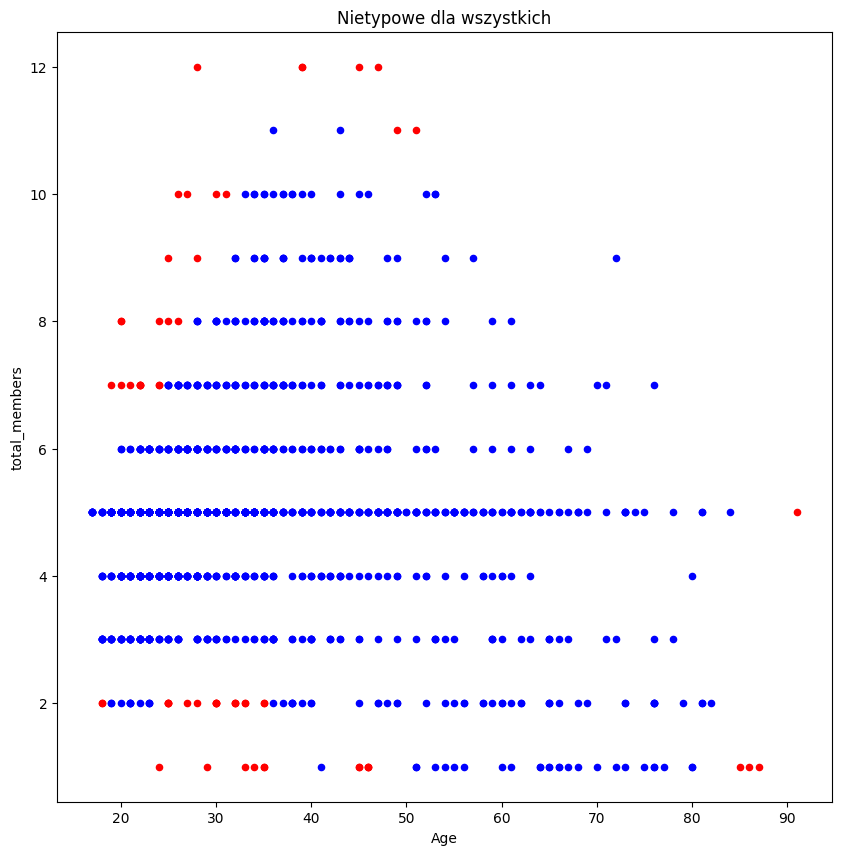

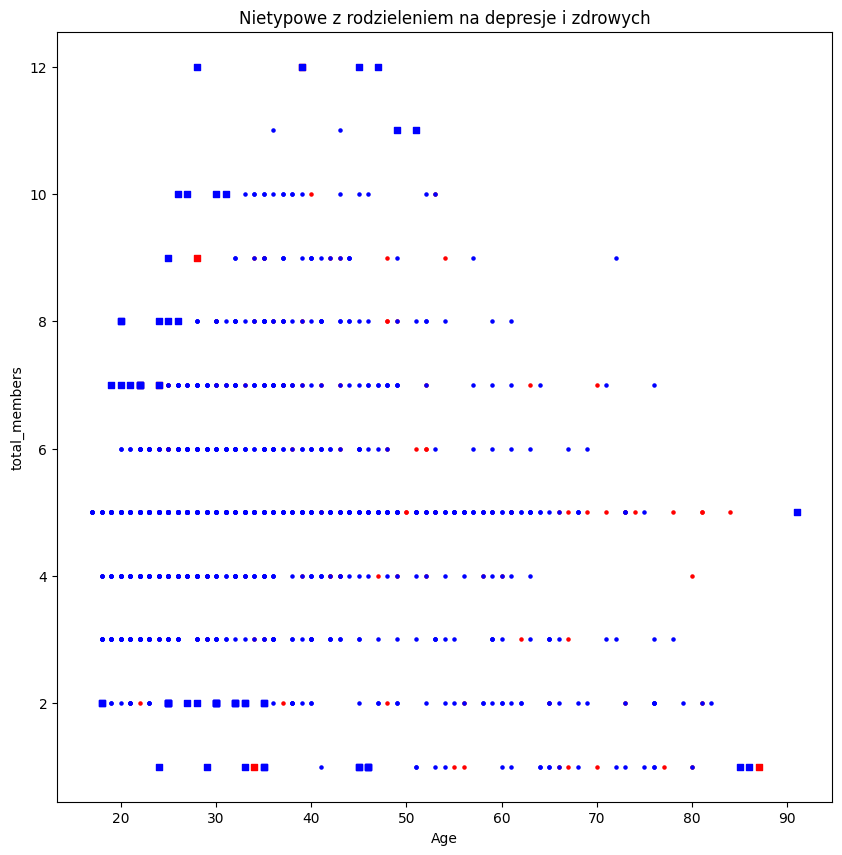

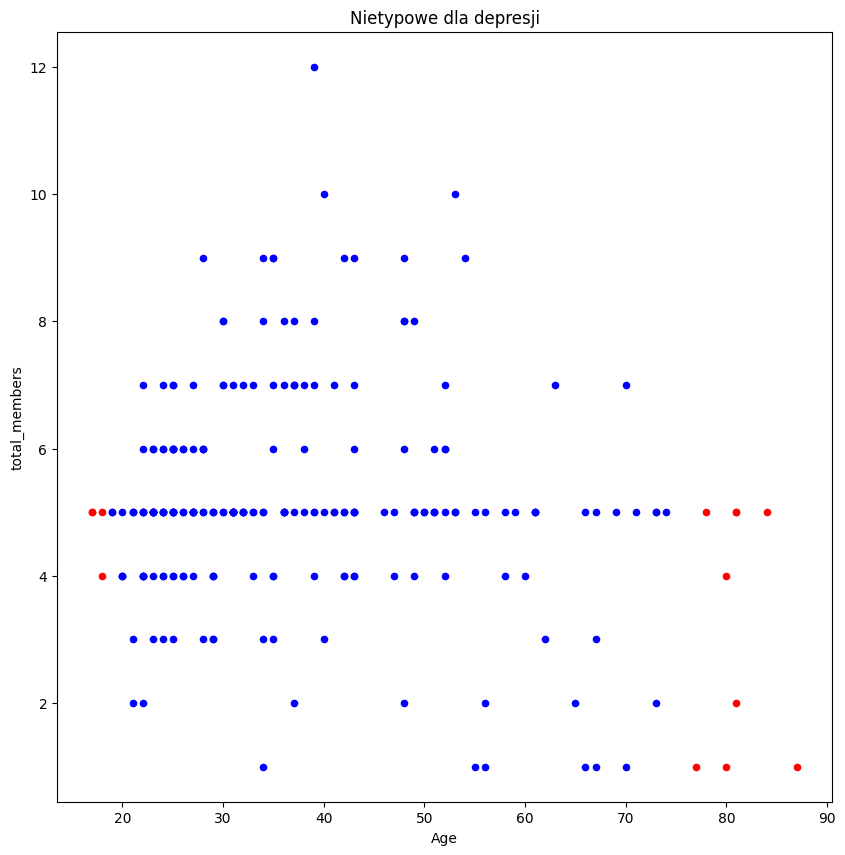

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict([[d[0], d[3]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 3], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 3], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('total_members');
plt.title('Nietypowe dla wszystkich')
plt.show()

inliers = data2[in_mask]
depressed_inliers = inliers[np.where(inliers[:,-1] == 1)]
healthy_inliers = inliers[np.where(inliers[:,-1] == 0)]
outliers = data2[out_mask]
depressed_outliers = outliers[np.where(outliers[:,-1] == 1)]
healthy_outliers = outliers[np.where(outliers[:,-1] == 0)]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(depressed_inliers[:,0], depressed_inliers[:,3], c='red', s=20, marker='.')
b = plt.scatter(healthy_inliers[:,0], healthy_inliers[:,3], c='blue', s=20, marker='.')
# outliers
c = plt.scatter(depressed_outliers[:,0], depressed_outliers[:,3], c='red', s=20, marker=',')
d = plt.scatter(healthy_outliers[:,0], healthy_outliers[:,3], c='blue', s=20, marker=',')
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('total_members');
plt.title('Nietypowe z rodzieleniem na depresje i zdrowych')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
data2 = data2[np.where(data2[:,-1] == 1)]
y_pred = clf.fit_predict([[d[0], d[3]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 3], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 3], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('total_members');
plt.title('Nietypowe dla depresji')
plt.show()

## najciekawsze

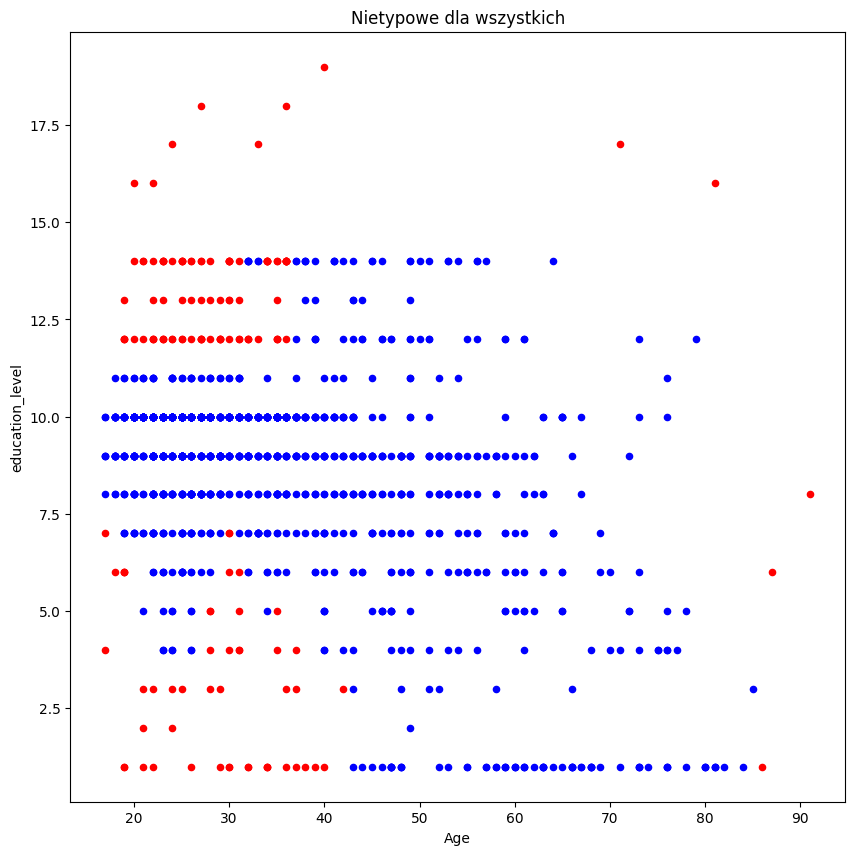

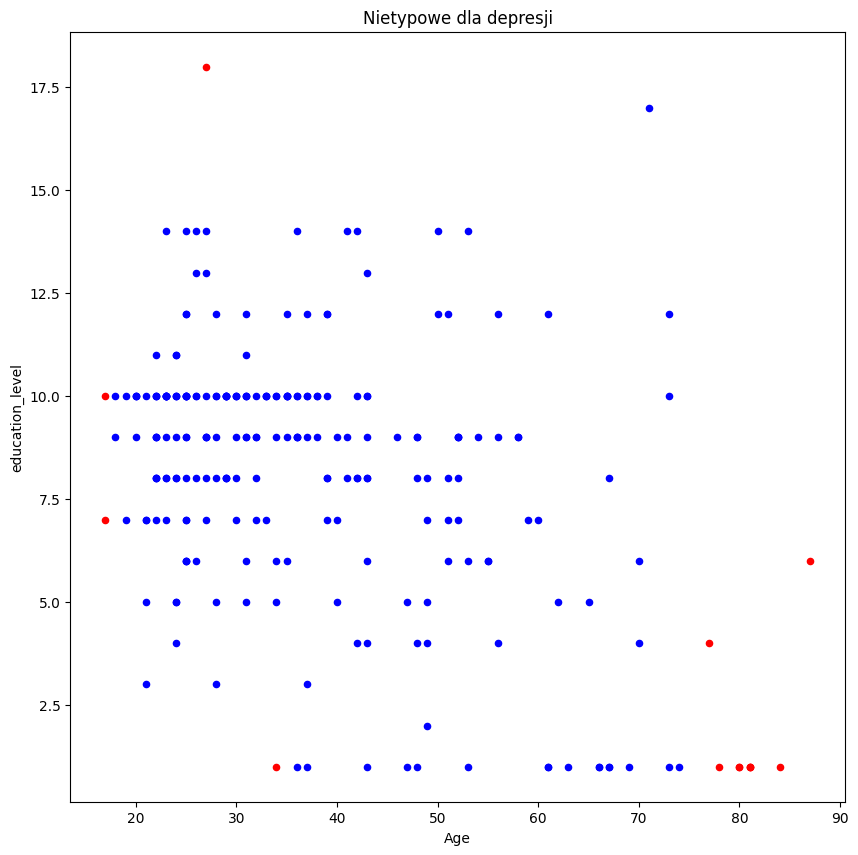

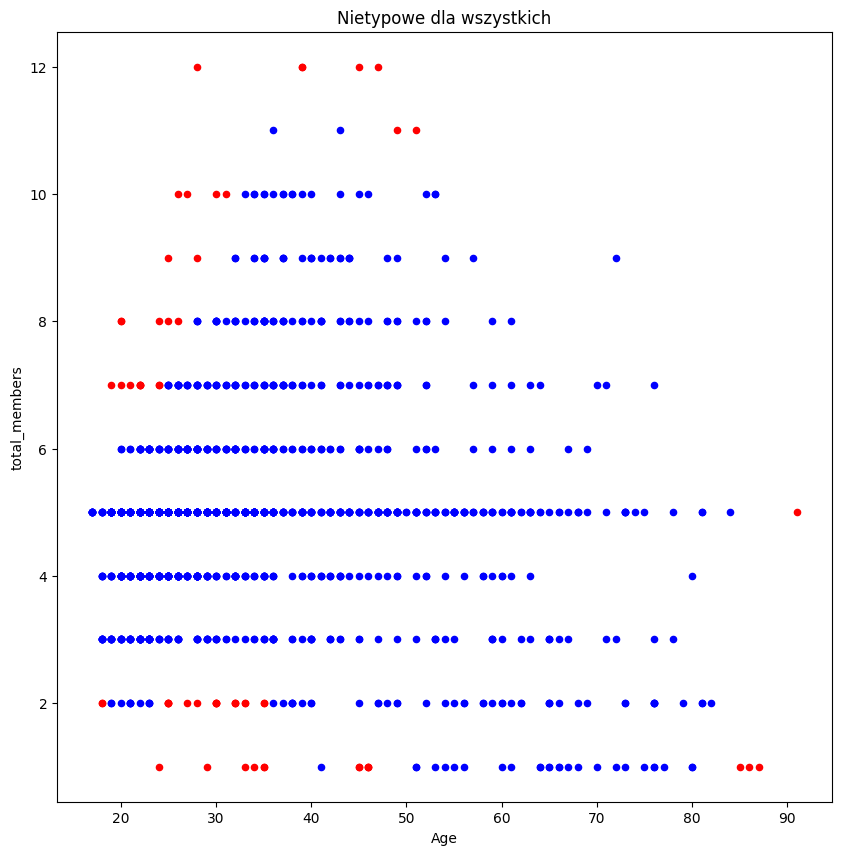

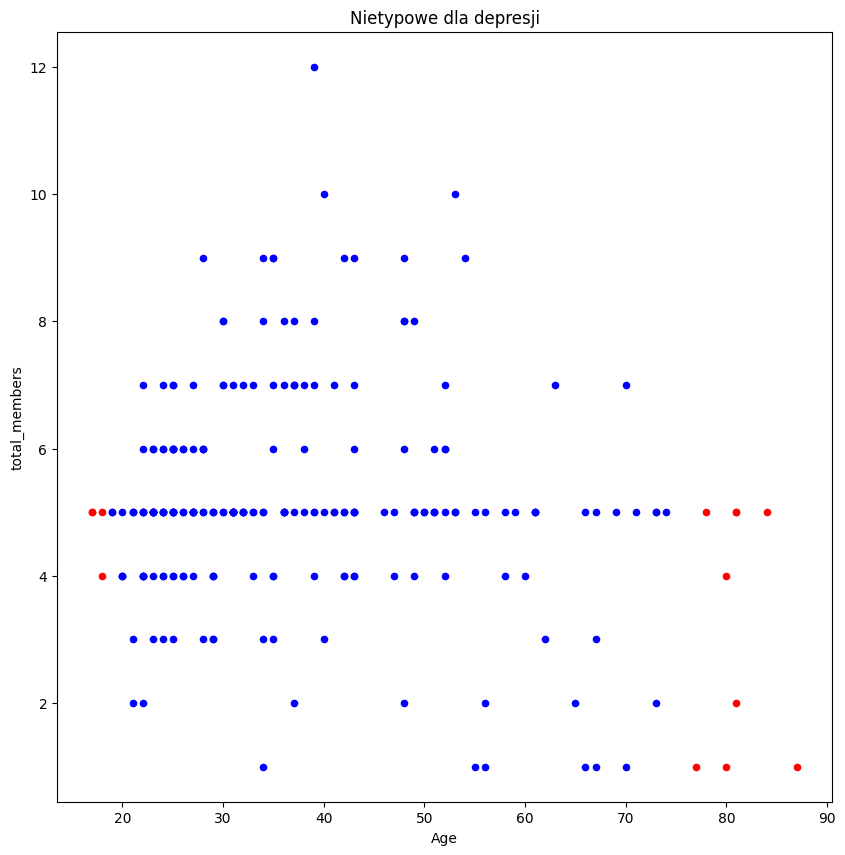

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict([[d[0], d[1]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe dla wszystkich')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
data2 = data2[np.where(data2[:,-1] == 1)]
y_pred = clf.fit_predict([[d[0], d[1]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 1], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 1], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('education_level');
plt.title('Nietypowe dla depresji')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict([[d[0], d[3]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 3], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 3], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('total_members');
plt.title('Nietypowe dla wszystkich')
plt.show()

data2 = data.to_numpy()
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
data2 = data2[np.where(data2[:,-1] == 1)]
y_pred = clf.fit_predict([[d[0], d[3]] for d in data2])

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,10))
# inliers
a = plt.scatter(data2[in_mask, 0], data2[in_mask, 3], c='blue', s=20)
# outliers
b = plt.scatter(data2[out_mask, 0], data2[out_mask, 3], c='red', s=20)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('total_members');
plt.title('Nietypowe dla depresji')
plt.show()

klasteryzacja


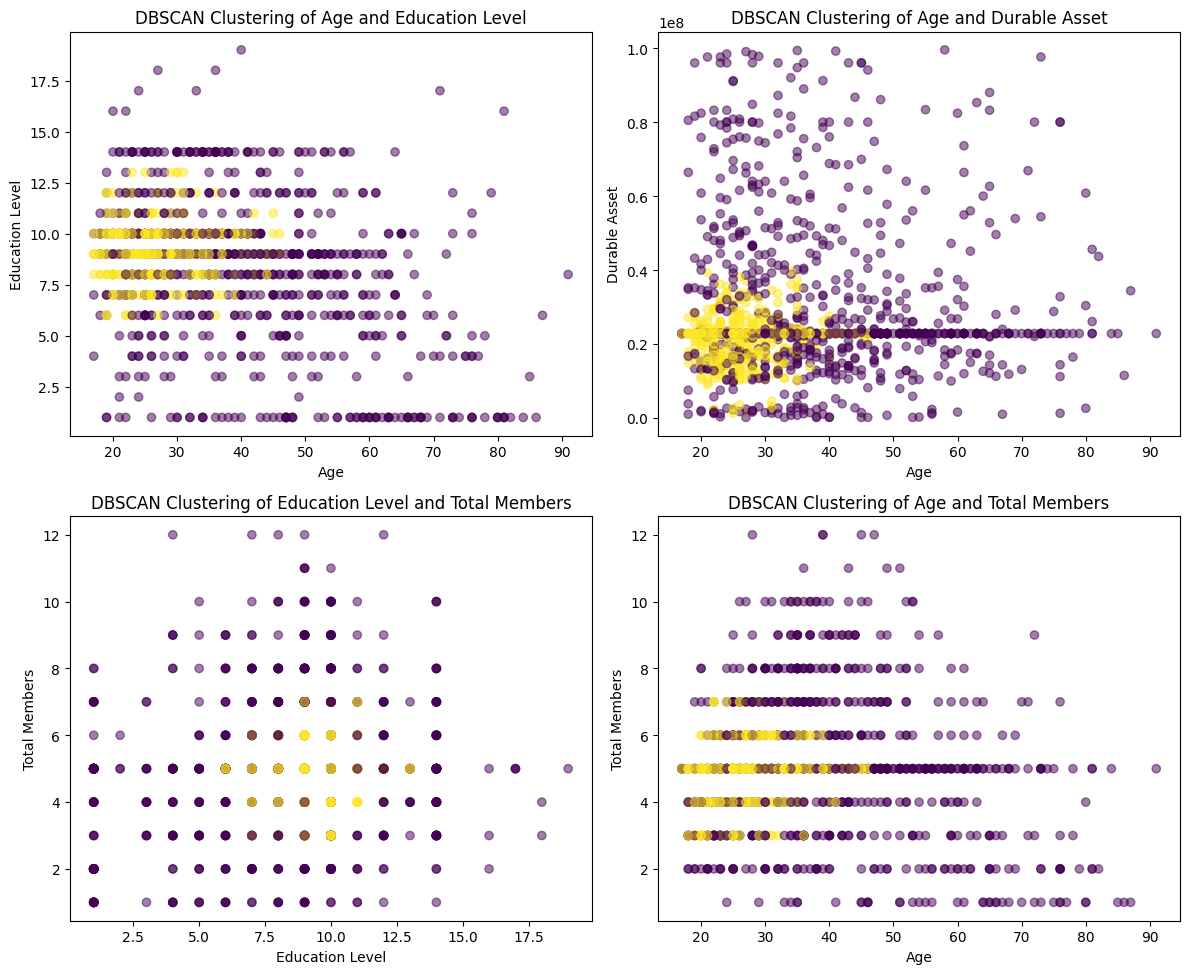

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform clustering using DBSCAN
clusters = DBSCAN(eps=0.7, min_samples=90).fit(scaled_data)
df['cluster'] = clusters.labels_

# Visualize the clusters
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Age vs education_level
axs[0, 0].scatter(df['Age'], df['education_level'], c=df['cluster'], cmap='viridis', alpha=0.5)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Education Level')
axs[0, 0].set_title('DBSCAN Clustering of Age and Education Level')

# Plot Age vs durable_asset
axs[0, 1].scatter(df['Age'], df['durable_asset'], c=df['cluster'], cmap='viridis', alpha=0.5)
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Durable Asset')
axs[0, 1].set_title('DBSCAN Clustering of Age and Durable Asset')

# Plot education_level vs total_members
axs[1, 0].scatter(df['education_level'], df['total_members'], c=df['cluster'], cmap='viridis', alpha=0.5)
axs[1, 0].set_xlabel('Education Level')
axs[1, 0].set_ylabel('Total Members')
axs[1, 0].set_title('DBSCAN Clustering of Education Level and Total Members')

# Plot Age vs total_members
axs[1, 1].scatter(df['Age'], df['total_members'], c=df['cluster'], cmap='viridis', alpha=0.5)
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Total Members')
axs[1, 1].set_title('DBSCAN Clustering of Age and Total Members')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


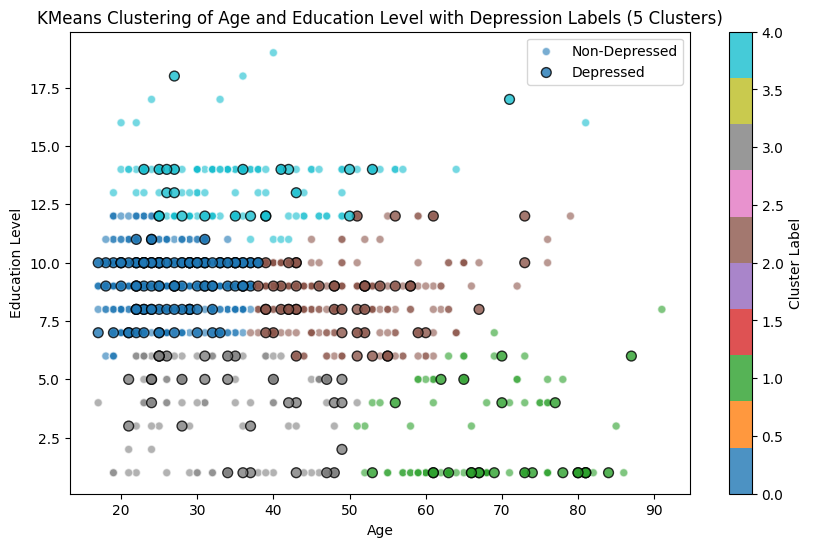

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'education_level']])

# Perform clustering using KMeans with 5 clusters (adjusted number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot points colored by predicted cluster
plt.scatter(df[df['depressed'] == 0]['Age'], df[df['depressed'] == 0]['education_level'], c=df[df['depressed'] == 0]['cluster'], cmap='tab10', alpha=0.6, label='Non-Depressed', edgecolors='white')

# Plot depressed points with filled markers
depressed_points = df[df['depressed'] == 1]
plt.scatter(depressed_points['Age'], depressed_points['education_level'], c=depressed_points['cluster'], cmap='tab10', marker='o', label='Depressed', edgecolors='black', alpha=0.8, s=50)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('KMeans Clustering of Age and Education Level with Depression Labels (5 Clusters)')


# Show the legend
plt.legend()

# Show the colorbar to indicate cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster Label')

plt.show()



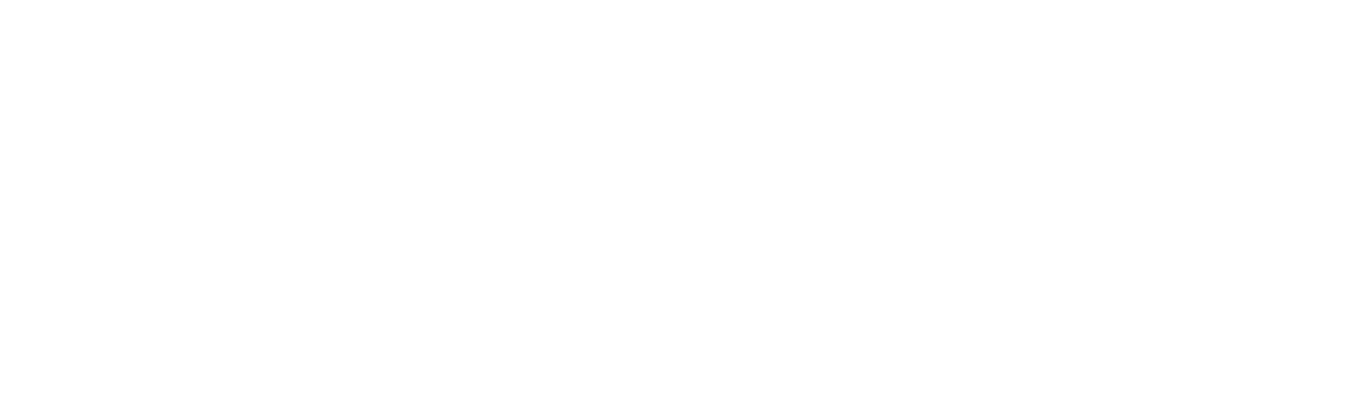

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


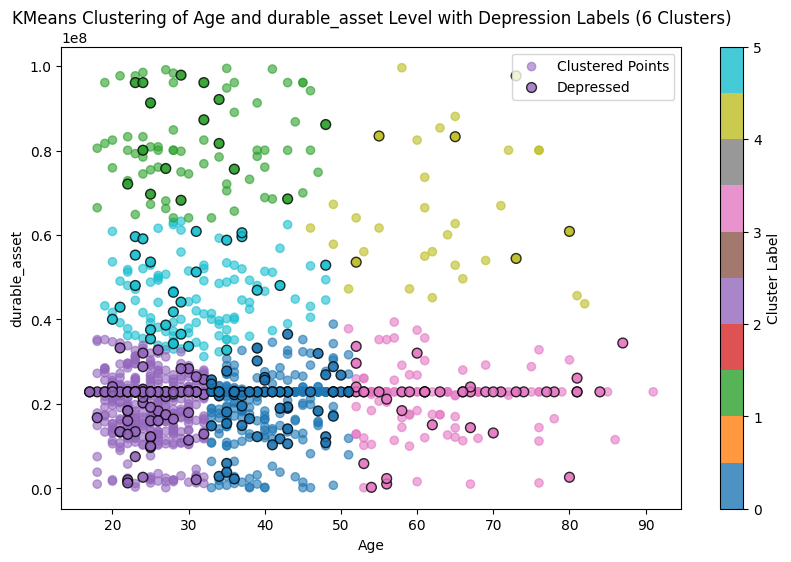

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'durable_asset']])

# Perform clustering using KMeans with 6 clusters (adjusted number of clusters)
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot points colored by predicted cluster
plt.scatter(df['Age'], df['durable_asset'], c=df['cluster'], cmap='tab10', alpha=0.6, label='Clustered Points')

# Plot depressed points with the same colors as their respective clusters
depressed_points = df[df['depressed'] == 1]
plt.scatter(depressed_points['Age'], depressed_points['durable_asset'], c=depressed_points['cluster'], cmap='tab10', marker='o', label='Depressed', edgecolors='black', alpha=0.8, s=50)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('durable_asset')
plt.title('KMeans Clustering of Age and durable_asset Level with Depression Labels (6 Clusters)')

# Show the legend
plt.legend()

# Show the colorbar to indicate cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster Label')

plt.show()


TODO: klasteryzacja opis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'total_members']])

# Perform clustering using KMeans with 4 clusters (adjusted number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot points colored by predicted cluster
cluster_scatter = plt.scatter(df['Age'], df['total_members'], c=df['cluster'], cmap='tab10', alpha=0.6, label='Clustered Points')

# Plot depressed points with the same colors as their respective clusters
depressed_points = df[df['depressed'] == 1]
depressed_scatter = plt.scatter(depressed_points['Age'], depressed_points['total_members'], c=depressed_points['cluster'], cmap='tab10', marker='o', label='Depressed', edgecolors='black', alpha=0.4, s=50)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('total_members')
plt.title('KMeans Clustering of Age and total_members Level with Depression Labels (4 Clusters)')

# Show the legend
plt.legend(handles=[cluster_scatter, depressed_scatter], labels=['Clustered Points', 'Depressed'])

# Show the colorbar to indicate cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster Label')

plt.show()


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

Możemy zaobserwować charakterystyczne klastry:
-	klastry podzielone są według rosnących wartości  oszczędności osobników w populacji od niskich bądź zerowych do wysokich
Klastry osobników populacji z depresją:
-	duże oszczędności, możemy wyróżnić 2 podgrupy: słabo lub średnio wykształceni z bardzo dużym majątkiem oraz bardzo dobrze wykształceni z średnio wysokim
-	średnie lub małe oszczędności, tutaj możemy zaobserwować zależność, że zagęszczenia występują dla niższego wykształcenia i mniejszego majątku oraz wyższego wykształcenia i większego majątku, depresja znacznie rzadziej występuje w przypadku wysokiego wykształcenia i małego majątku

Ogólny wnosek dla przedziału wiekowego: Pieniądze szczęścia nie dają

Jeśli uwzględnić liczbę osobników populacji występujących w górnych zakresach wartości oszczędności to możemy zauważyć, że występuje wśród nich zaskakująco wiele przypadków z depresją. Widzimy też że depresja występuje na wśród całego przekroju oszczędności.

Ciekawostką jest, że pośród osób najbogatszych osób depresja dominuje u młodych. Może to wynikać z faktu, że młoda osoba, która szybko się wzbogaciła lub odziedziczyła majątek gorzej sobie radzi z presją.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['education_level', 'total_members']])

# Perform clustering using KMeans with 4 clusters (adjusted number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot points colored by predicted cluster
plt.scatter(df['education_level'], df['total_members'], c=df['cluster'], alpha=0.6, label='Clustered Points')

# Plot depressed points with reduced alpha and smaller marker size
plt.scatter(df[df['depressed'] == 1]['education_level'], df[df['depressed'] == 1]['total_members'],cmap='tab10', marker='x', label='Depressed', c='red', alpha=0.4, s=5)

# Add labels and title
plt.xlabel('education_level')
plt.ylabel('total_members')
plt.title('KMeans Clustering of education_level and total_members Level with Depression Labels (5 Clusters)')

# Show the legend
plt.legend()

# Show the colorbar to indicate cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster Label')

plt.show()



ImportError: cannot import name 'InconsistentVersionWarning' from 'sklearn.exceptions' (/usr/local/lib/python3.10/dist-packages/sklearn/exceptions.py)

"Nie zawsze więcje oznacza lepiej" więcej członków rodziny sprzyja depresji
"Zdania są podzielone" duża liczba członków rodziny z wysokim wykształceniem ma częściej depresje

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-94-ddb0db950fe0>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[df['depressed'] == 1]['education_level'], df[df['depressed'] == 1]['durable_asset'],cmap='tab10', marker='x', label='Depressed', c='red', alpha=0.4, s=5)


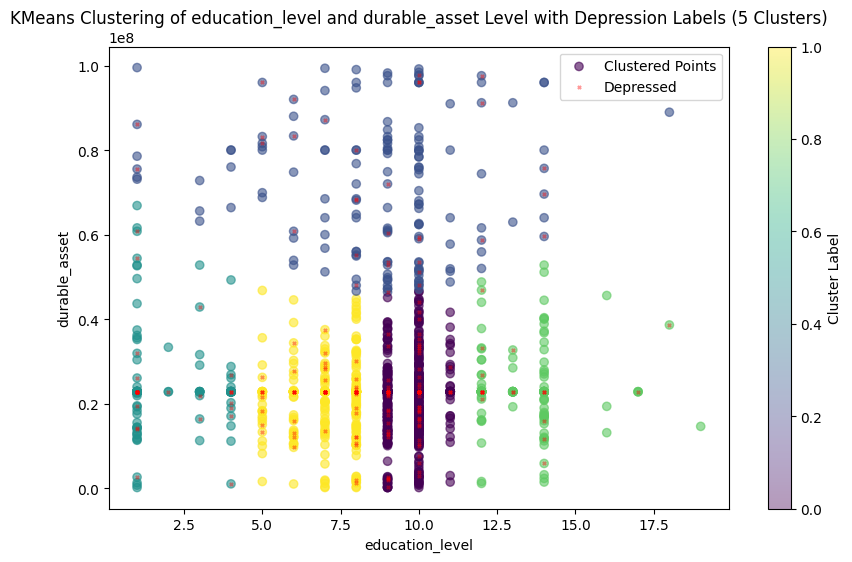

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['education_level', 'durable_asset']])

# Perform clustering using KMeans with 4 clusters (adjusted number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot points colored by predicted cluster
plt.scatter(df['education_level'], df['durable_asset'], c=df['cluster'], alpha=0.6, label='Clustered Points')

# Plot depressed points with reduced alpha and smaller marker size
plt.scatter(df[df['depressed'] == 1]['education_level'], df[df['depressed'] == 1]['durable_asset'],cmap='tab10', marker='x', label='Depressed', c='red', alpha=0.4, s=5)

# Add labels and title
plt.xlabel('education_level')
plt.ylabel('durable_asset')
plt.title('KMeans Clustering of education_level and durable_asset Level with Depression Labels (5 Clusters)')

# Show the legend
plt.legend()

# Show the colorbar to indicate cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster Label')

plt.show()



"Dobrze wykształcone młode osoby"

Analizując zagęszczenie gwiazdek (pomarańczowe romby), dla osób w wieku 20-30 lat, rosnące wraz ze wzrostem wykształcenia możemy dojść do wniosku, że osoby młode są częściej narażone na depresję, gdy posiadają wysokie wykształcenie.

Potwierdza to korelację wykształcenia z depresją, co było zaprezentowane na macierzy korelacji, a także było powodem wyboru tego parametru do utworzenia wykresu 3d oraz przeprowadzenia klasteryzacji.

"Kryzys wieku średniego"

Obserwując gwiazdki (pomarańczowe romby) możemy obserwować zagęszczenie charakterystyczne dla kryzysu wieku średniego wśród osób w wieku 40-50 lat, szczególnie dotyczy to osób dość dobrze wykształconych oraz trochę mniej średnio do słabo wykształconych (ciemno fioletowe romby).

Co ciekawe możemy zaobserwować również późniejszy etap depresji u osób starszych słabo lub niewykształconych - od 60 lat wzwyż.

"Osoby niewykształcone"

Obserwując gwiazdki (ciemno fioletowe romby) możemy zaobserwować charakterystyczny ciąg osobników z depresją występujących od wieku 30 lat, niewykształconych, posiadających oszczędności raczej nie wyższe niż 200-300 tys. $ - dotyczy to wartości gospodarstwa domowego.  

Świadczy to o fakcie że osoby nie posiadające dużego majątku wkraczające w dorosłość bez wykształcenia są znacznie narażone na depresję.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-97-5c5d0297e61d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[df['depressed'] == 1]['total_members'], df[df['depressed'] == 1]['durable_asset'],cmap='tab10', marker='x', label='Depressed', c='red', alpha=0.4, s=5)


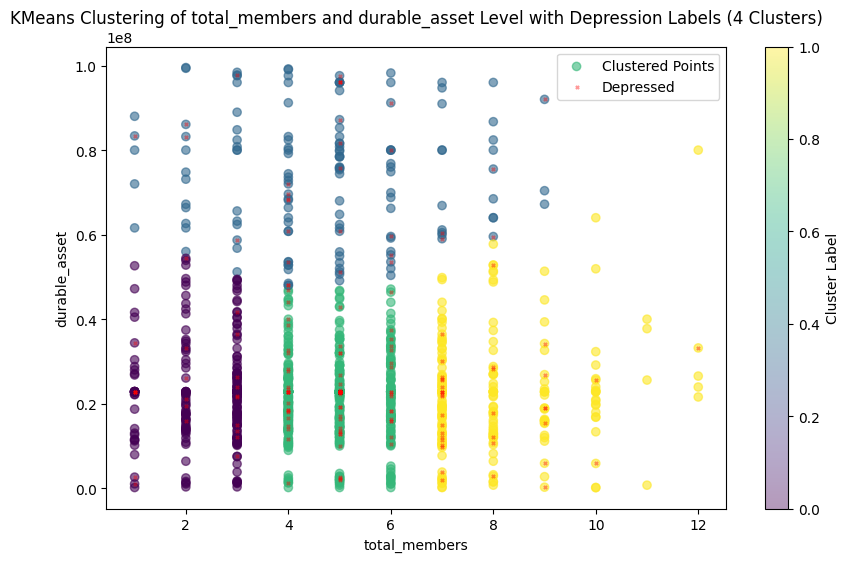

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/b_depressed.csv")

# Select relevant columns
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['total_members', 'durable_asset']])

# Perform clustering using KMeans with 4 clusters (adjusted number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot points colored by predicted cluster
plt.scatter(df['total_members'], df['durable_asset'], c=df['cluster'], alpha=0.6, label='Clustered Points')

# Plot depressed points with reduced alpha and smaller marker size
plt.scatter(df[df['depressed'] == 1]['total_members'], df[df['depressed'] == 1]['durable_asset'],cmap='tab10', marker='x', label='Depressed', c='red', alpha=0.4, s=5)

# Add labels and title
plt.xlabel('total_members')
plt.ylabel('durable_asset')
plt.title('KMeans Clustering of total_members and durable_asset Level with Depression Labels (4 Clusters)')

# Show the legend
plt.legend()

# Show the colorbar to indicate cluster labels
cbar = plt.colorbar()
cbar.set_label('Cluster Label')

plt.show()



### Klasyfikacja

Poniżej przeprowadzono operacje przy użyciu różnych modeli klasyfikacyjnych, a wyniki zostały przeanalizowane pod kątem dokładności, czułości i specyficzności klasyfikatorów. Ponadto, dokonano pewnych manipulacji danych, takich jak równoważenie klas i wybór podzbioru atrybutów, aby zobaczyć, jak wpływają one na wyniki klasyfikacji.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv("/content/b_depressed.csv")
data = df[['Age', 'education_level', 'durable_asset', 'total_members', 'depressed']]
data.head()

Age  education_level  durable_asset  total_members  depressed
0   28               10       22861940              5          0
1   23                8       22861940              5          1
2   22                9       22861940              5          0
3   27               10       19698904              4          0
4   59               10       17352654              6          0

In [ ]:
# KNN

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def printConfusionMatrix(y_train, pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("Classification Report:",)
    print(classification_report(y_test, pred))
    print("Accuracy:", accuracy_score(y_test, pred))

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

~84% dokładności ale bardzo niska czułość

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred1=knn.predict(X_test)
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[292   8]
 [ 55   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       300
           1       0.27      0.05      0.09        58

    accuracy                           0.82       358
   macro avg       0.56      0.51      0.49       358
weighted avg       0.75      0.82      0.77       358

Accuracy: 0.8240223463687151


Interpretacja wyników:

Klasyfikacja za pomocą algorytmu KNN:

- Dokładność ogólna (accuracy) wyniosła 82.40%, co oznacza, że model poprawnie sklasyfikował 82.40% przypadków.
- Obserwujemy niską czułość (recall) dla klasy 1 (depressed), co sugeruje trudności w identyfikacji przypadków tej klasy.
- Wskaźniki precision i recall dla klasy 1 są niskie, co oznacza, że model ma trudności w trafnym sklasyfikowaniu przypadków tej klasy.

<Axes: >

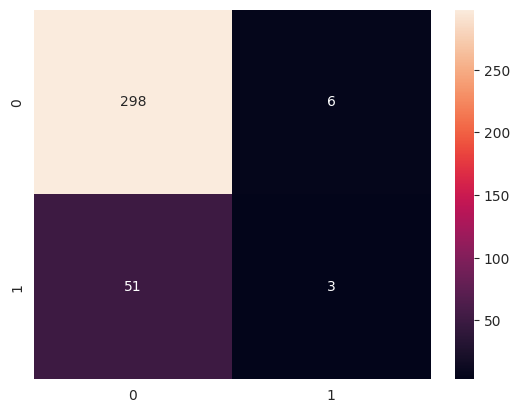

In [ ]:
sns.heatmap([[298,6], [ 51,3]], annot=True, fmt="d")

In [ ]:
print('chorzy:', len(data[data['depressed'] == 1]))
print('zdrowi:', len(data[data['depressed'] == 0]))

chorzy: 238
zdrowi: 1191




```
# Sformatowano jako kod
```

## Równoliczne zbiory: ~55% dokładności

In [ ]:
len(data[data['depressed'] == 1])
X_depressed = data[data['depressed'] == 1]
X_healthy = data[data['depressed'] == 0][:len(data[data['depressed'] == 1])]
X_new = pd.concat([X_depressed,X_healthy])

In [ ]:
X = X_new.iloc[:, :-1].values
y = X_new.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred1=knn.predict(X_test)
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[28 26]
 [21 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        54
           1       0.45      0.50      0.47        42

    accuracy                           0.51        96
   macro avg       0.51      0.51      0.51        96
weighted avg       0.52      0.51      0.51        96

Accuracy: 0.5104166666666666


Interpretacja wyników:

Analiza równolicznych zbiorów:

- Dokładność ogólna wyniosła 51.04%, co jest zbliżone do wyniku przypadkowego.
- Wskaźniki precision, recall i f1-score dla obu klas są na niskim poziomie, co sugeruje, że model nie radzi sobie dobrze z klasyfikacją na równolicznych zbiorach.

<Axes: >

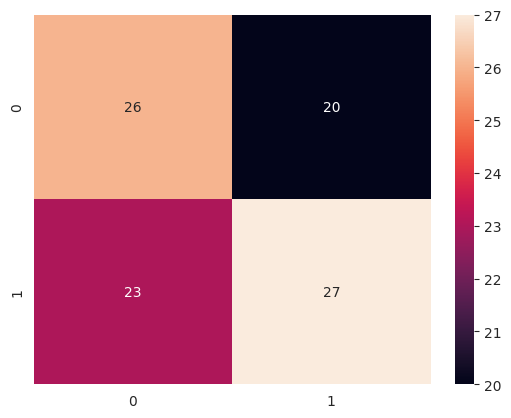

In [ ]:
sns.heatmap([[26 ,20], [ 23 ,27]], annot=True, fmt="d")

## Tylko 2 najbardziej skorelowane atrybuty

In [ ]:
X = data.iloc[:, 0:2].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred1=knn.predict(X_test)
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[233   5]
 [ 45   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       238
           1       0.38      0.06      0.11        48

    accuracy                           0.83       286
   macro avg       0.61      0.52      0.51       286
weighted avg       0.76      0.83      0.77       286

Accuracy: 0.8251748251748252


Użycie tylko dwóch najbardziej skorelowanych atrybutów:

- Dla pełnego zbioru danych: dokładność wyniosła 82.52%, a czułość dla klasy 1 była niska.
- Dla równolicznych zbiorów: dokładność wyniosła 61.76%, a wskaźniki precision, recall i f1-score dla klasy 1 są na umiarkowanym poziomie.

<Axes: >

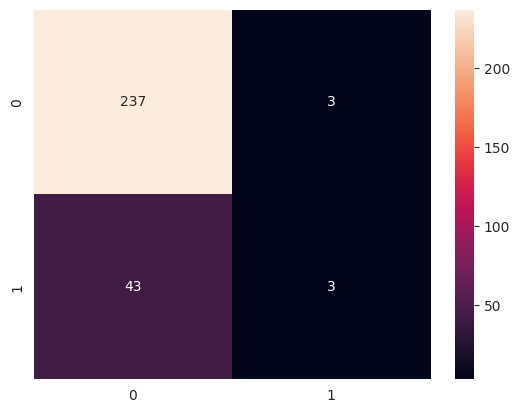

In [ ]:
sns.heatmap([[237    ,3], [ 43 ,3]], annot=True, fmt="d")

In [ ]:
len(data[data['depressed'] == 1])
X_depressed = data[data['depressed'] == 1]
X_healthy = data[data['depressed'] == 0][:len(data[data['depressed'] == 1]) + 200]
X_new = pd.concat([X_depressed,X_healthy])
X = X_new.iloc[:, :-1].values
y = X_new.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred1=knn.predict(X_test)
printConfusionMatrix(y_test, knn_pred1)

Confusion Matrix:
[[69 18]
 [34 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        87
           1       0.45      0.31      0.37        49

    accuracy                           0.62       136
   macro avg       0.56      0.55      0.55       136
weighted avg       0.59      0.62      0.60       136

Accuracy: 0.6176470588235294


<Axes: >

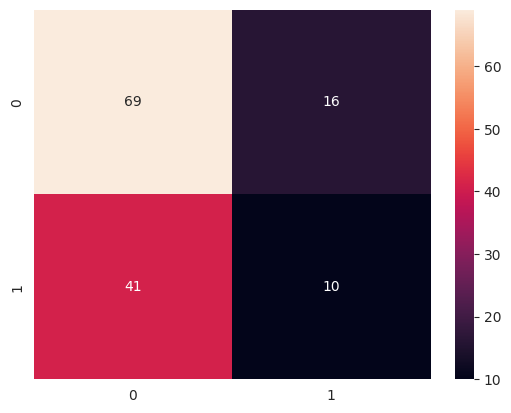

In [ ]:
sns.heatmap([[69     ,16], [ 41  ,10]], annot=True, fmt="d")

In [ ]:
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import math

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtr = DecisionTreeRegressor()
print(dtr)

dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print(score)

ypred = dtr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)

new_y = [math.floor(d + 0.5) for d in ypred]
print(confusion_matrix(y_test, new_y))
print(accuracy_score(y_test, new_y))

DecisionTreeRegressor()
0.882882849156434
MSE:  0.2791426282051282
[[190  47]
 [ 38  11]]
0.7027972027972028


Użycie drzewa decyzyjnego (Decision Tree):

- Model drzewa decyzyjnego osiągnął dokładność ogólną na poziomie 70.28%.
- Wskaźniki precision i recall dla klasy 1 są niższe niż dla klasy 0, co sugeruje trudności w identyfikacji przypadków klasy zdeprymowanej.

Podsumowanie:

- Klasyfikacja na równolicznych zbiorach nie przyniosła satysfakcjonujących wyników, sugerując, że model mógłby być lepiej dostosowany do pierwotnych, niezrównoważonych danych.
- Bardzo duża dysproporcja pomiędzy osobami chorymi i zdrowymi wpłynęła bardzo negatywnie na czułość  wykrywania osób chorych na depresję z całym zbiorze.
- Wynik klasyfikacji dla zbiorów równolicznych poprawił czułość, jednak dokładność jest niewiele lepsza od losowego przydzielania klas. Wniosek: choroba jest trudna do przewidzenia.
- Klasyfikacja na podstawie dwóch najbardziej skorelowanych atrybutów osiągnęła umiarkowane wyniki, jednakże niewielka liczba atrybutów może ograniczać zdolność modelu do dokładnej klasyfikacji.
- Model drzewa decyzyjnego wydaje się osiągnąć lepsze wyniki niż KNN na tych danych, ale nadal istnieje pole do poprawy, szczególnie dla klasy zdeprymowanej. Oceniając model, warto również wziąć pod uwagę inne miary, takie jak precyzja, czułość, a także zrozumienie interpretowalności modelu w danym kontekście.

## Analiza kryzysu wieku średniego

Przeprowadzono analizę danych dotyczących depresji w kontekście wieku i płci.

Co zrobiono:
- Stworzono wykresy dystrybucji wieku dla osób z i bez depresji.
- Podzielono dane ze względu na płeć i stworzono wykresy dystrybucji wieku dla osób z depresją i bez depresji w każdej z grup płci.
- Stworzono wykresy gęstości (KDE) dla całego zbioru danych oraz dla poszczególnych grup płci w zależności od obecności depresji.

Podsumowanie demograficzne:

- Obliczono liczbę osób zdrowych i z depresją dla różnych zakresów wiekowych.
- Obliczono procentowy udział osób z depresją w stosunku do ogólnej liczby osób dla różnych grup demograficznych, takich jak młodzi, średnio-dorośli, starsi, kobiety i mężczyźni.

<ipython-input-5-32e5e683b853>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['depressed'] == 0]["Age"], color='blue')
<ipython-input-5-32e5e683b853>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['depressed'] == 1]["Age"], color='red')
<ipython-input-5-32e5e683b853>:7: UserWarni

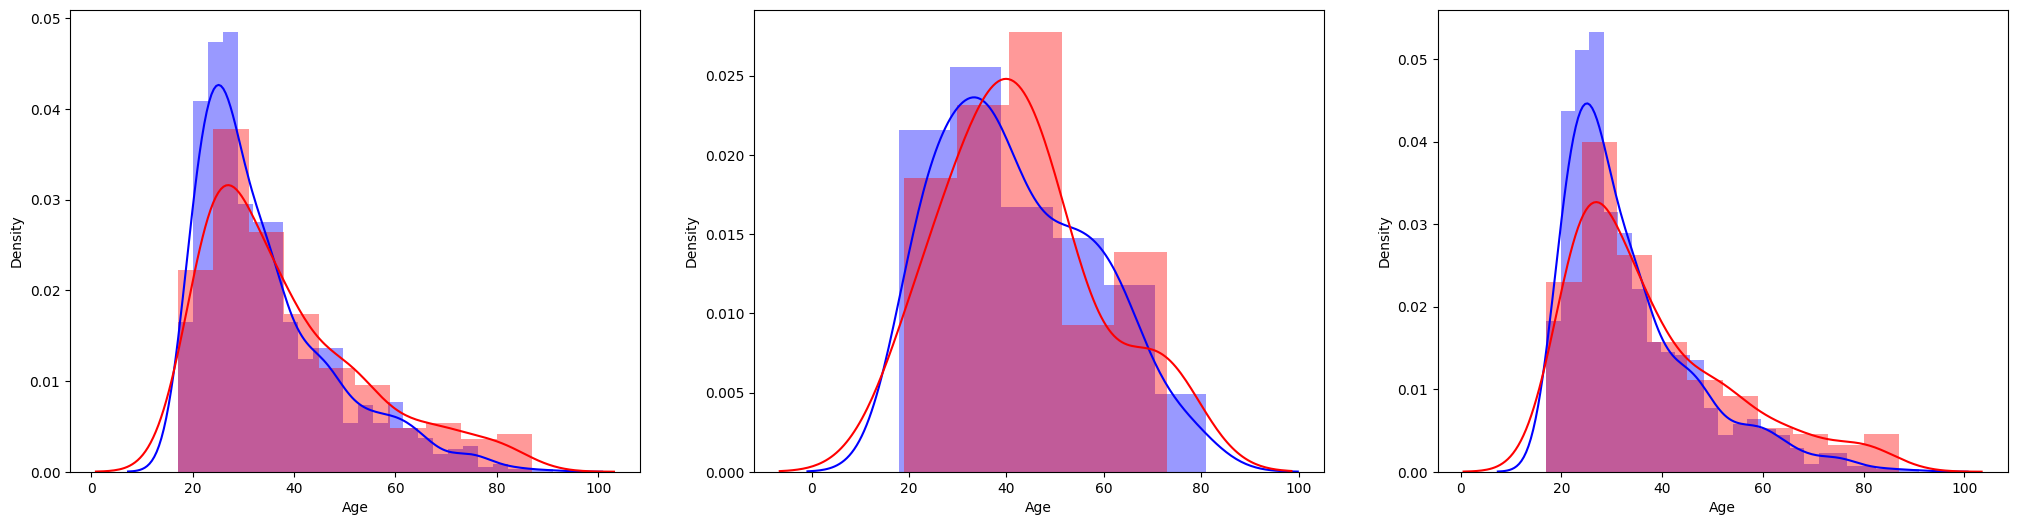

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.distplot(df[df['depressed'] == 0]["Age"], color='blue')
sns.distplot(df[df['depressed'] == 1]["Age"], color='red')

plt.subplot(1, 3, 2)
sns.distplot(df[df['depressed'] == 0][df['sex'] == 0]["Age"], color='blue')
sns.distplot(df[df['depressed'] == 1][df['sex'] == 0]["Age"], color='red')

plt.subplot(1, 3, 3)
sns.distplot(df[df['depressed'] == 0][df['sex'] == 1]["Age"], color='blue')
sns.distplot(df[df['depressed'] == 1][df['sex'] == 1]["Age"], color='red')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


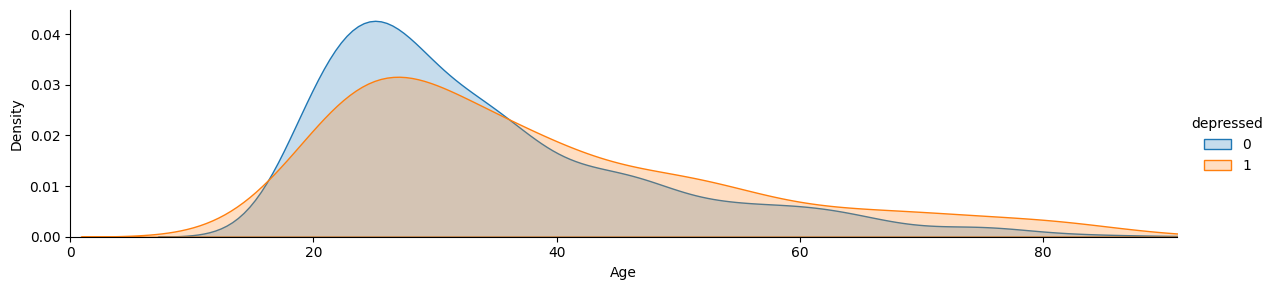

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


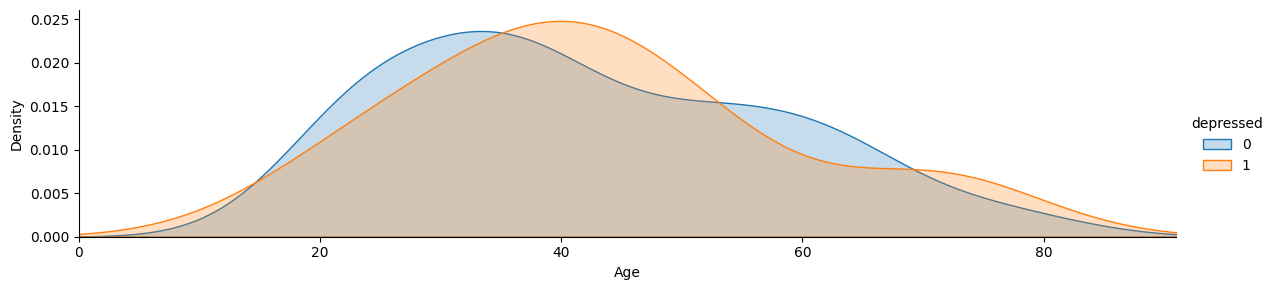

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


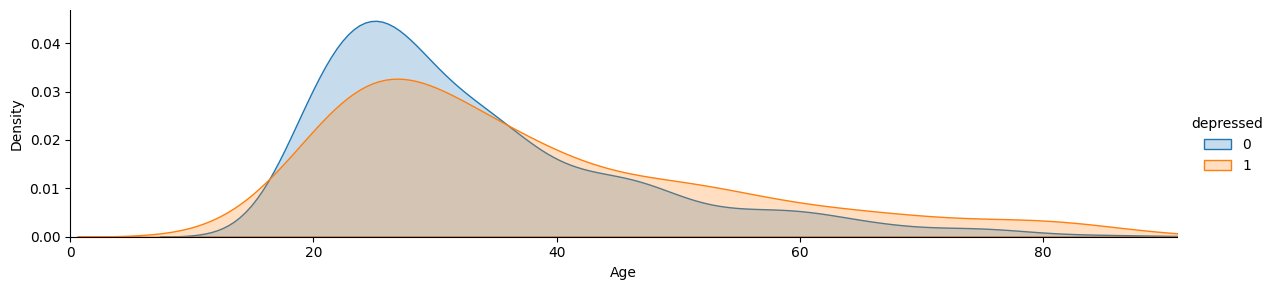

In [ ]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

facet = sns.FacetGrid(df.loc[df['sex'] == 0], hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

facet = sns.FacetGrid(df.loc[df['sex'] == 1], hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

In [ ]:
all_healthy = len(df[df['depressed'] == 0]["Age"])
all_young_healthy = len(df[df['depressed'] == 0][df["Age"]<=18]["Age"])
all_mid_healthy = len(df[df['depressed'] == 0][df["Age"]>18][df["Age"]<=37]["Age"])
all_mature_healthy = len(df[df['depressed'] == 0][df["Age"]>37]["Age"])

all_depressed = len(df[df['depressed'] == 1]["Age"])
all_young_depressed = len(df[df['depressed'] == 1][df["Age"]<=18]["Age"])
all_mid_depressed = len(df[df['depressed'] == 1][df["Age"]>18][df["Age"]<=37]["Age"])
all_mature_depressed = len(df[df['depressed'] == 1][df["Age"]>37]["Age"])

print("Procent z depresja:", all_depressed/(all_depressed+all_healthy))
print("Procent z depresja mlodych:", all_young_depressed/(all_young_depressed+all_young_healthy))
print("Procent z depresja mlodych doroslych:", all_mid_depressed/(all_mid_depressed+all_mid_healthy))
print("Procent z depresja doroslych:", all_mature_depressed/(all_mature_depressed+all_mature_healthy))

woman_healthy = len(df[df['depressed'] == 0][df['sex'] == 0]["Age"])
woman_young_healthy = len(df[df['depressed'] == 0][df['sex'] == 0][df["Age"]<=18]["Age"])
woman_mid_healthy = len(df[df['depressed'] == 0][df['sex'] == 0][df["Age"]>18][df["Age"]<=37]["Age"])
woman_more_mid_healthy = len(df[df['depressed'] == 0][df['sex'] == 0][df["Age"]>38][df["Age"]<=50]["Age"])
woman_mature_healthy = len(df[df['depressed'] == 0][df['sex'] == 0][df["Age"]>50][df["Age"]<=70]["Age"])
woman_more_mature_healthy = len(df[df['depressed'] == 0][df['sex'] == 0][df["Age"]>70]["Age"])

woman_depressed = len(df[df['depressed'] == 1][df['sex'] == 0]["Age"])
woman_young_depressed = len(df[df['depressed'] == 1][df['sex'] == 0][df["Age"]<=18]["Age"])
woman_mid_depressed = len(df[df['depressed'] == 1][df['sex'] == 0][df["Age"]>18][df["Age"]<=37]["Age"])
woman_more_mid_depressed = len(df[df['depressed'] == 1][df['sex'] == 0][df["Age"]>38][df["Age"]<=50]["Age"])
woman_mature_depressed = len(df[df['depressed'] == 1][df['sex'] == 0][df["Age"]>50][df["Age"]<=70]["Age"])
woman_more_mature_depressed = len(df[df['depressed'] == 1][df['sex'] == 0][df["Age"]>70]["Age"])

print()
print("Procent z depresja:", woman_depressed/(woman_depressed+woman_healthy))
print("Procent z depresja mlodych kobiet:", woman_young_depressed/(woman_young_depressed+woman_young_healthy))
print("Procent z depresja mlodych doroslych kobiet:", woman_mid_depressed/(woman_mid_depressed+woman_mid_healthy))
print("Procent z depresja srednio doroslych kobiet:", woman_more_mid_depressed/(woman_more_mid_depressed+woman_more_mid_healthy))
print("Procent z depresja doroslych kobiet:", woman_mature_depressed/(woman_mature_depressed+woman_mature_healthy))
print("Procent z depresja starszych kobiet:", woman_more_mature_depressed/(woman_more_mature_depressed+woman_more_mature_healthy))

man_healthy = len(df[df['depressed'] == 0][df['sex'] == 1]["Age"])
man_young_healthy = len(df[df['depressed'] == 0][df['sex'] == 1][df["Age"]<=18]["Age"])
man_mid_healthy = len(df[df['depressed'] == 0][df['sex'] == 1][df["Age"]>18][df["Age"]<=37]["Age"])
man_mature_healthy = len(df[df['depressed'] == 0][df['sex'] == 1][df["Age"]>37]["Age"])

man_depressed = len(df[df['depressed'] == 1][df['sex'] == 1]["Age"])
man_young_depressed = len(df[df['depressed'] == 1][df['sex'] == 1][df["Age"]<=18]["Age"])
man_mid_depressed = len(df[df['depressed'] == 1][df['sex'] == 1][df["Age"]>18][df["Age"]<=37]["Age"])
man_mature_depressed = len(df[df['depressed'] == 1][df['sex'] == 1][df["Age"]>37]["Age"])

print()
print("Procent z depresja mezczyzn:", man_depressed/(man_depressed+man_healthy))
print("Procent z depresja mlodych mezczyzn:", man_young_depressed/(man_young_depressed+man_young_healthy))
print("Procent z depresja mlodych doroslych mezczyzn:", man_mid_depressed/(man_mid_depressed+man_mid_healthy))
print("Procent z depresja doroslych mezczyzn:", man_mature_depressed/(man_mature_depressed+man_mature_healthy))

Procent z depresja: 0.16655003498950316
Procent z depresja mlodych: 0.14814814814814814
Procent z depresja mlodych doroslych: 0.14659685863874344
Procent z depresja doroslych: 0.21029082774049218

Procent z depresja: 0.17094017094017094
Procent z depresja mlodych kobiet: 0.0
Procent z depresja mlodych doroslych kobiet: 0.1509433962264151
Procent z depresja srednio doroslych kobiet: 0.2608695652173913
Procent z depresja doroslych kobiet: 0.12903225806451613
Procent z depresja starszych kobiet: 0.2857142857142857

Procent z depresja mezczyzn: 0.16615853658536586
Procent z depresja mlodych mezczyzn: 0.15384615384615385
Procent z depresja mlodych doroslych mezczyzn: 0.14634146341463414
Procent z depresja doroslych mezczyzn: 0.21354166666666666


<ipython-input-7-8fc02ca379b1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_young_healthy = len(df[df['depressed'] == 0][df["Age"]<=18]["Age"])
<ipython-input-7-8fc02ca379b1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_mid_healthy = len(df[df['depressed'] == 0][df["Age"]>18][df["Age"]<=37]["Age"])
<ipython-input-7-8fc02ca379b1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_mature_healthy = len(df[df['depressed'] == 0][df["Age"]>37]["Age"])
<ipython-input-7-8fc02ca379b1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_young_depressed = len(df[df['depressed'] == 1][df["Age"]<=18]["Age"])
<ipython-input-7-8fc02ca379b1>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_mid_depressed = len(df[df['depressed'] == 1][df["Age"]>18][df["Age"]<=37]["Age"])
<ipython-input-7-8fc02ca379b1>:9: UserWarning: Boole

Podsumowanie ogólne:

- Ogólny odsetek osób z depresją w badanej populacji wynosi około 16.66%.
- Wartości procentowe różnią się w zależności od grupy wiekowej i płci.

Analiza wieku:

- Procent osób z depresją wśród młodych dorosłych i dorosłych jest wyższy niż wśród młodzieży.
- Osoby dorosłe mają najwyższy odsetek występowania depresji w porównaniu do innych grup wiekowych.

Analiza płci:

- U kobiet obserwujemy różnice w odsetku występowania depresji w zależności od grupy wiekowej:
-- Młode kobiety mają najniższy odsetek.
-- Średnio-dorosłe kobiety mają wyższy odsetek.
--Starsze kobiety mają najwyższy odsetek.
- U mężczyzn również występują różnice w odsetku występowania depresji w zależności od grupy wiekowej:
-- Młodzi mężczyźni mają niższy odsetek.
-- Średnio-dorośli mężczyźni mają zbliżony odsetek do młodych dorosłych.
-- Dorosli mężczyźni mają wyższy odsetek.

Wnioski końcowe:

- Wyniki sugerują, że depresja może być związana z określonymi przedziałami wiekowymi i różnicami płciowymi.
- Wartości procentowe dla depresji w poszczególnych grupach demograficznych dostarczają informacji na temat potencjalnych czynników ryzyka związanych z wiekiem i płcią.
- Dalsza analiza i badania przyczynowe mogą dostarczyć bardziej szczegółowych informacji na temat wpływu wieku i płci na zdrowie psychiczne.

Podsumowanie z całego projektu:

Można wyróżnić kilka szczególnych grup bardziej narażonych na depresję:
-	młodzi z dużym majątkiem i młodzi wysoko wykształceni
-	osoby w średnim wieku i z małym majątkiem oraz w średnim wieku średnio wykształcone
-	osoby w starszym wieku niewykształcone
-	starsze kobiety są bardziej narażone na depresję, ma to najprawdopodobniej związek z krótszym życiem mężczyzn

Biorąc pod uwagę jednak, że żadna z grup nie była wybitnie wyróżniona możemy śmiało stwierdzić, że na depresję może zachorować każdy.
